# Dataset Preparation

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset, concatenate_datasets

ds = load_dataset("derek-thomas/ScienceQA")
ds_val_test = concatenate_datasets([ds['validation'], ds['test']])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

(…)-00000-of-00001-1028f23e353fbe3e.parquet:   0%|          | 0.00/377M [00:00<?, ?B/s]

(…)-00000-of-00001-6c7328ff6c84284c.parquet:   0%|          | 0.00/126M [00:00<?, ?B/s]

(…)-00000-of-00001-f0e719df791966ff.parquet:   0%|          | 0.00/122M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/12726 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4241 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4241 [00:00<?, ? examples/s]

In [ ]:
def find_suitable_test(ds_test):
    processed_ds = []
    for sample in ds_test:
        if sample['image'] != None:
             if sample['grade'] == 'grade8':
                processed_ds.append(sample)
    return processed_ds

selected_samples = find_suitable_test(ds_val_test)
len(selected_samples)

607

# Model Performance

## Qwen-VL


In [ ]:
!pip install tiktoken
!pip install transformers_stream_generator
!pip install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for transformers_stream_generator: filename=transformers_stream_generator-0.0.5-py3-none-any.whl size=12425 sha256=5a9b2767d5802da7f9de9dc08f18a47005473a5b3f905510283b005fe997b0ee
  Stored in directory: /root/.cache/pip/wheels/95/4a/90/140f7b67d125906f6a165f38aad212ecb4a695ad0d87582437
Successfully built transformers_stream_generator
ERROR: You must give at least one requirement to install (see "pip help install")


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers.generation import GenerationConfig
import torch
torch.manual_seed(1234)

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen-VL", trust_remote_code=True)


model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen-VL", device_map="cuda", trust_remote_code=True).eval()

# Specify hyperparameters for generation (No need to do this if you are using transformers>=4.32.0)
# model.generation_config = GenerationConfig.from_pretrained("Qwen/Qwen-VL", trust_remote_code=True)

query = tokenizer.from_list_format([
    {'image': 'https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg'},
    {'text': 'Generate the caption in English'},
])
inputs = tokenizer(query, return_tensors='pt')
inputs = inputs.to(model.device)
pred = model.generate(**inputs)
response = tokenizer.decode(pred.cpu()[0], skip_special_tokens=True)
print(response)

'''This is used to generate the bounding box'''
# # <img>https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg</img>Generate the caption in English with grounding:<ref> Woman</ref><box>(451,379),(731,806)</box> and<ref> her dog</ref><box>(219,424),(576,896)</box> playing on the beach<|endoftext|>
# image = tokenizer.draw_bbox_on_latest_picture(response)
# if image:
#   image.save('2.jpg')
# else:
#   print("no box")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

tokenization_qwen.py:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL:
- tokenization_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


qwen.tiktoken:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

configuration_qwen.py:   0%|          | 0.00/2.09k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL:
- configuration_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_qwen.py:   0%|          | 0.00/44.7k [00:00<?, ?B/s]

visual.py:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL:
- visual.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


qwen_generation_utils.py:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL:
- qwen_generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL:
- modeling_qwen.py
- visual.py
- qwen_generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin.index.json:   0%|          | 0.00/79.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00010.bin:   0%|          | 0.00/1.96G [00:00<?, ?B/s]

pytorch_model-00002-of-00010.bin:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

pytorch_model-00003-of-00010.bin:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

pytorch_model-00004-of-00010.bin:   0%|          | 0.00/1.99G [00:00<?, ?B/s]

pytorch_model-00005-of-00010.bin:   0%|          | 0.00/1.92G [00:00<?, ?B/s]

pytorch_model-00006-of-00010.bin:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

pytorch_model-00007-of-00010.bin:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

pytorch_model-00008-of-00010.bin:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

pytorch_model-00009-of-00010.bin:   0%|          | 0.00/1.99G [00:00<?, ?B/s]

pytorch_model-00010-of-00010.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/10 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/218 [00:00<?, ?B/s]

Picture 1: https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg
Generate the caption in English - A woman sitting on the beach with her dog.


'This is used to generate the bounding box'

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers.generation import GenerationConfig
import torch

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen-VL", trust_remote_code=True)


model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen-VL", device_map="cuda", trust_remote_code=True).eval()


from tqdm import tqdm
responses = []

for idx, sample in enumerate(tqdm(selected_samples)):
    image = sample['image']
    question = sample['question']
    choices = sample['choices']
    hint = sample['hint']

    # Save the PIL image to a temporary file
    image_path = f'temp_image_{idx}.png'
    image.save(image_path)

    choices_formatted = '\n'.join([f"{i}: {choice}" for i, choice in enumerate(choices)])

    query = tokenizer.from_list_format([
        {'image': f'{image_path}'},
        {'text': f"\nQuestion: {question}\nChoices:\n{choices_formatted}\nContext:{hint} Answer: "}
    ])

    inputs = tokenizer(query, return_tensors='pt')
    inputs = inputs.to(model.device)

    # Generate the response
    with torch.no_grad():
        pred = model.generate(**inputs, max_new_tokens=256)
    response = tokenizer.decode(pred.cpu()[0], skip_special_tokens=False)
    # print(response)
    print(response)




/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/10 [00:00<?, ?it/s]

NameError: name 'selected_samples' is not defined

In [ ]:
responses

## Qwen2-VL


In [ ]:
!pip install qwen-vl-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 50.6 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-k0q2p22n
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-k0q2p22n
  Resolved https://github.com/huggingface/transformers to commit 5f0c181f4e8faf88d5c186961eeca0779b6354da
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.45.0.dev0-py3-none-any.whl size=9800554 sha256=7054dc93f2cff4b0e9ed0fb5ec8e4cd1fbfe9252764230ad2be02ea4796382b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-85puwr1l/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
!pip install flash-attn --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.6.3-cp310-cp310-linux_x86_64.whl size=187309225 sha256=237ef9c6157db394e1ddde4ba609a21ebb98382377a27041edc09318801a6f24
  Stored in directory: /root/.cache/pip/wheels/7e/e3/c3/89c7a2f3c4adc07cd1c675f8bb7b9ad4d18f64a72bccdfe826
Successfully built flash-attn


In [ ]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
from PIL import Image
import torch
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
# default: Load the model on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct", torch_dtype="auto", device_map="auto"
)

# We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
# model = Qwen2VLForConditionalGeneration.from_pretrained(
#     "Qwen/Qwen2-VL-7B-Instruct",
#     torch_dtype=torch.float16,
#     attn_implementation="flash_attention_2",
#     device_map="auto")


# default processer
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct")

# The default range for the number of visual tokens per image in the model is 4-16384. You can set min_pixels and max_pixels according to your needs, such as a token count range of 256-1280, to balance speed and memory usage.
# min_pixels = 256*28*28
# max_pixels = 1280*28*28
# processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)

predictions = []
for idx, sample in enumerate(tqdm(selected_samples)):
    image = sample['image']
    question = sample['question']
    choices = sample['choices']
    hint = sample['hint']

    # Save the PIL image to a temporary file
    image_path = f'temp_image_{idx}.png'
    image.save(image_path)

    # Format choices with indices
    choices_formatted = '\n'.join([f"{i}: {choice}" for i, choice in enumerate(choices)])

    messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": f'{image_path}',
            },
            {"type": "text", "text": f"\nQuestion: {question}\nChoices:\n{choices_formatted}\nContext: {hint}\nAnswer: "},
        ],
    }
    ]

# Preparation for inference
    text = processor.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )
    image_inputs, video_inputs = process_vision_info(messages)
    inputs = processor(
        text=[text],
        images=image_inputs,
        videos=video_inputs,
        padding=True,
        return_tensors="pt",
    )
    inputs = inputs.to("cuda")

# Inference: Generation of the output
    generated_ids = model.generate(**inputs, max_new_tokens=128)
    generated_ids_trimmed = [
        out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )
    print(output_text)
    predictions.append(output_text)


config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}


model.safetensors.index.json:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

  0%|          | 2/607 [00:01<07:56,  1.27it/s]

['0']
['1']


  1%|          | 4/607 [00:02<04:11,  2.39it/s]

['3: 3:1']
['1']


  1%|          | 6/607 [00:02<03:02,  3.28it/s]

['0: New Hampshire']
['0']


  1%|          | 7/607 [00:03<04:11,  2.39it/s]

['1: It has a small amount of rain or snow.']


  1%|▏         | 8/607 [00:04<06:16,  1.59it/s]

['1: whether a parachute with a 1 m vent would swing too much at 400 km per hour']


  1%|▏         | 9/607 [00:04<05:23,  1.85it/s]

['3: 3:1']


  2%|▏         | 10/607 [00:05<04:25,  2.25it/s]

['3/4']


  2%|▏         | 11/607 [00:05<03:46,  2.63it/s]

['1: rock']


  2%|▏         | 13/607 [00:05<02:51,  3.47it/s]

['1: Solution B']
['0']


  2%|▏         | 15/607 [00:06<02:17,  4.30it/s]

['1/4']
['0']


  3%|▎         | 16/607 [00:07<05:46,  1.70it/s]

["Does Maria's snowboard slide down a hill in less time when it has a layer of wax or when it does not have a layer of wax?"]


  3%|▎         | 18/607 [00:08<04:10,  2.35it/s]

['2: Palau']
['0']


  3%|▎         | 19/607 [00:08<04:46,  2.05it/s]

['2: if adding the blade guards made the drone fly poorly']


  3%|▎         | 20/607 [00:09<05:31,  1.77it/s]

['1: The magnitude of the magnetic force is the same in both pairs.']


  4%|▎         | 22/607 [00:10<03:48,  2.56it/s]

['2: Solution A']
['0']


  4%|▍         | 24/607 [00:10<02:43,  3.57it/s]

['0']
['1']


  4%|▍         | 26/607 [00:10<02:28,  3.91it/s]

['1: 3:1']
['1']


  4%|▍         | 27/607 [00:11<02:15,  4.29it/s]

['0']


  5%|▍         | 29/607 [00:12<03:17,  2.93it/s]

['2: if the sample fabric would absorb one drop of water in less than one second']
['2']


  5%|▍         | 30/607 [00:12<03:11,  3.01it/s]

['0: the flowers']


  5%|▌         | 31/607 [00:12<03:31,  2.73it/s]

['3: the Dominican Republic']


  5%|▌         | 32/607 [00:13<03:28,  2.76it/s]

['3: 3:1']


  6%|▌         | 34/607 [00:13<02:39,  3.58it/s]

['2: Pennsylvania']
['2']


  6%|▌         | 36/607 [00:13<02:06,  4.50it/s]

['2']
['1']


  6%|▋         | 38/607 [00:14<01:47,  5.27it/s]

['0']
['1']


  7%|▋         | 40/607 [00:14<02:03,  4.60it/s]

['1: a compound']
['0']


  7%|▋         | 41/607 [00:14<02:05,  4.52it/s]

['0: rock']


  7%|▋         | 42/607 [00:15<02:13,  4.22it/s]

['3: Delaware']


  7%|▋         | 43/607 [00:15<02:45,  3.42it/s]

['3: beaver']


  7%|▋         | 44/607 [00:15<02:41,  3.50it/s]

['1: Maryland']


  7%|▋         | 45/607 [00:16<02:52,  3.27it/s]

['2: 3/4']


  8%|▊         | 47/607 [00:16<02:41,  3.46it/s]

['0: Kiribati']
['0']


  8%|▊         | 48/607 [00:17<03:07,  2.98it/s]

['2: the Marshall Islands']


  8%|▊         | 50/607 [00:17<02:37,  3.53it/s]

['0: Ardea cinerea']
['2']


  9%|▊         | 52/607 [00:18<02:53,  3.20it/s]

['0: Saint Kitts and Nevis']
['1']


  9%|▊         | 53/607 [00:18<02:38,  3.50it/s]

['3/4']


  9%|▉         | 55/607 [00:19<03:28,  2.64it/s]

["Covering its eggs with its body increases the chances that the leech's eggs will hatch."]
['0']


  9%|▉         | 56/607 [00:20<03:04,  2.98it/s]

['1: mineral']


  9%|▉         | 57/607 [00:20<02:58,  3.08it/s]

['0: sample B']


 10%|▉         | 59/607 [00:20<02:32,  3.60it/s]

['2: sample B']
['0']


 10%|█         | 61/607 [00:21<02:33,  3.57it/s]

['2: 4:0']
['1']


 10%|█         | 63/607 [00:22<02:54,  3.11it/s]

["Justine can trade her tomatoes for Bridgette's broccoli."]
['0']


 11%|█         | 65/607 [00:22<02:11,  4.13it/s]

['0']
['0']


 11%|█         | 66/607 [00:22<01:55,  4.70it/s]

['0']


 11%|█         | 67/607 [00:23<02:08,  4.19it/s]

['0: sample B']


 11%|█         | 68/607 [00:23<02:16,  3.94it/s]

['0: Solution A']


 12%|█▏        | 70/607 [00:24<02:58,  3.00it/s]

['The word "antebellum" means (3: before the war).']
['0']


 12%|█▏        | 71/607 [00:24<02:32,  3.52it/s]

['1']


 12%|█▏        | 72/607 [00:24<02:30,  3.56it/s]

['2: Australia']


 12%|█▏        | 73/607 [00:25<02:31,  3.53it/s]

['0: sample B']


 12%|█▏        | 74/607 [00:25<02:49,  3.15it/s]

['1: Tuvalu']


 12%|█▏        | 75/607 [00:25<02:53,  3.06it/s]

['2: 4:0']


 13%|█▎        | 76/607 [00:26<03:32,  2.50it/s]

['The amount of bacteria in the water before it was filtered']


 13%|█▎        | 77/607 [00:26<03:11,  2.77it/s]

['1: Connecticut']


 13%|█▎        | 78/607 [00:26<02:56,  2.99it/s]

['1: insect']


 13%|█▎        | 79/607 [00:27<03:19,  2.65it/s]

['1: neither; their concentrations are the same']


 13%|█▎        | 81/607 [00:27<02:25,  3.62it/s]

['3/4']
['1']


 14%|█▎        | 83/607 [00:28<02:05,  4.17it/s]

['1: feather']
['0']


 14%|█▍        | 84/607 [00:28<02:14,  3.89it/s]

['1: convergent']


 14%|█▍        | 86/607 [00:28<02:03,  4.22it/s]

['1: Massachusetts']
['0']


 14%|█▍        | 87/607 [00:29<02:20,  3.71it/s]

['1: 0/4']


 14%|█▍        | 88/607 [00:29<02:30,  3.44it/s]

['1: the anthers']


 15%|█▍        | 89/607 [00:30<02:46,  3.12it/s]

['0: Barbados']


 15%|█▍        | 90/607 [00:30<02:51,  3.01it/s]

['3: the Pacific Ocean']


 15%|█▍        | 91/607 [00:30<02:53,  2.97it/s]

['4: 3:1']


 15%|█▌        | 93/607 [00:31<02:12,  3.88it/s]

['4/4']
['1']


 15%|█▌        | 94/607 [00:31<01:55,  4.43it/s]

['1']


 16%|█▌        | 95/607 [00:31<03:13,  2.65it/s]

['1: The magnitude of the magnetic force is smaller in Pair 1.']


 16%|█▌        | 96/607 [00:32<03:09,  2.69it/s]

['2: 3:1']


 16%|█▌        | 97/607 [00:32<02:45,  3.07it/s]

['0']


 16%|█▌        | 98/607 [00:32<02:49,  3.01it/s]

['3: 3:1']


 16%|█▋        | 99/607 [00:33<03:04,  2.76it/s]

['2: Tuvalu']


 17%|█▋        | 101/607 [00:33<02:28,  3.41it/s]

['1: 3/4']
['0']


 17%|█▋        | 102/607 [00:34<02:35,  3.25it/s]

['0: the male part']


 17%|█▋        | 103/607 [00:34<02:29,  3.37it/s]

['2: Antarctica']


 17%|█▋        | 104/607 [00:34<02:35,  3.23it/s]

['2: 3:1']


 17%|█▋        | 105/607 [00:35<02:42,  3.09it/s]

['2: Australia']


 17%|█▋        | 106/607 [00:35<02:52,  2.91it/s]

['2: Equus grevyi']


 18%|█▊        | 107/607 [00:36<03:15,  2.55it/s]

['1: Crocodylus acutus']


 18%|█▊        | 109/607 [00:36<02:52,  2.88it/s]

['1: neither; their concentrations are the same']
['1']


 18%|█▊        | 110/607 [00:37<02:58,  2.78it/s]

['1: Strix nebulosa']


 18%|█▊        | 112/607 [00:37<02:32,  3.25it/s]

['2: black racer']
['1']


 19%|█▊        | 113/607 [00:38<03:14,  2.54it/s]

["Neil can trade his almonds for Darnel's tomatoes."]


 19%|█▉        | 115/607 [00:39<03:09,  2.59it/s]

['1: The magnitude of the magnetic force is the same in both pairs.']
['1']


 19%|█▉        | 116/607 [00:39<03:04,  2.67it/s]

['2: Jamaica']


 19%|█▉        | 118/607 [00:39<02:28,  3.30it/s]

['2: the Atlantic Ocean']
['0']


 20%|█▉        | 119/607 [00:40<02:53,  2.82it/s]

['2: Trinidad and Tobago']


 20%|█▉        | 120/607 [00:40<03:20,  2.43it/s]

['0: plainfin midshipman']


 20%|██        | 122/607 [00:41<02:33,  3.16it/s]

['0: Solution A']
['0']


 20%|██        | 124/607 [00:41<01:52,  4.30it/s]

['1']
['0']


 21%|██        | 125/607 [00:41<01:42,  4.71it/s]

['1']


 21%|██        | 126/607 [00:42<01:45,  4.57it/s]

['0: rock']


 21%|██        | 127/607 [00:42<02:03,  3.90it/s]

['3: 4:0']


 21%|██▏       | 129/607 [00:42<01:54,  4.17it/s]

['1: New Hampshire']
['0']


 21%|██▏       | 130/607 [00:43<02:26,  3.25it/s]

['2: Haliaeetus pelagicus']


 22%|██▏       | 131/607 [00:43<02:26,  3.26it/s]

['1: palm leaf']


 22%|██▏       | 132/607 [00:44<02:26,  3.25it/s]

['2: South Carolina']


 22%|██▏       | 133/607 [00:44<02:21,  3.35it/s]

['2: Solution A']


 22%|██▏       | 134/607 [00:44<02:28,  3.18it/s]

['4: 4:0']


 22%|██▏       | 135/607 [00:45<02:35,  3.04it/s]

['0: Fiji']


 22%|██▏       | 136/607 [00:45<02:31,  3.12it/s]

['2: sample B']


 23%|██▎       | 138/607 [00:45<02:27,  3.18it/s]

['2: Haliaeetus leucocephalus']
['1']


 23%|██▎       | 140/607 [00:46<01:53,  4.12it/s]

['0']
['0']


 23%|██▎       | 141/607 [00:46<01:40,  4.66it/s]

['0']


 23%|██▎       | 142/607 [00:46<02:15,  3.44it/s]

['3: Trinidad and Tobago']


 24%|██▎       | 143/607 [00:47<02:24,  3.22it/s]

['3: the Pacific Ocean']


 24%|██▎       | 144/607 [00:48<03:19,  2.32it/s]

['2: The magnitude of the magnetic force is the same in both pairs.']


 24%|██▍       | 145/607 [00:48<03:07,  2.46it/s]

['2: 3:1']


 24%|██▍       | 146/607 [00:48<03:14,  2.37it/s]

['1: pathos (emotion)']


 24%|██▍       | 147/607 [00:49<03:21,  2.28it/s]

['0: neither; their concentrations are the same']


 25%|██▍       | 149/607 [00:49<02:24,  3.16it/s]

['3: Antarctica']
['3']


 25%|██▍       | 150/607 [00:50<02:57,  2.58it/s]

['1: Chroicocephalus novaehollandiae']


 25%|██▍       | 151/607 [00:50<03:10,  2.39it/s]

['2: neither; their concentrations are the same']


 25%|██▌       | 152/607 [00:51<03:19,  2.29it/s]

['2: neither; their concentrations are the same']


 25%|██▌       | 153/607 [00:51<03:19,  2.28it/s]

['1: Aequorea victoria']


 25%|██▌       | 154/607 [00:51<02:48,  2.68it/s]

['4/4']


 26%|██▌       | 156/607 [00:52<02:06,  3.55it/s]

['0: rock']
['1']


 26%|██▌       | 157/607 [00:52<02:03,  3.63it/s]

['1: fern']


 26%|██▌       | 159/607 [00:53<02:19,  3.22it/s]

["Diane can trade her tomatoes for Evelyn's broccoli."]
['0']


 26%|██▋       | 160/607 [00:53<01:56,  3.83it/s]

['0']


 27%|██▋       | 161/607 [00:53<01:51,  4.00it/s]

['0: rock']


 27%|██▋       | 162/607 [00:53<01:47,  4.14it/s]

['2/4']


 27%|██▋       | 164/607 [00:54<02:21,  3.13it/s]

['2: The magnitude of the magnetic force is smaller in Pair 1.']
['1']


 27%|██▋       | 166/607 [00:55<02:01,  3.62it/s]

['0: the Pacific Ocean']
['1']


 28%|██▊       | 167/607 [00:55<02:02,  3.58it/s]

['0: sample B']


 28%|██▊       | 168/607 [00:56<02:30,  2.92it/s]

['2: neither; their concentrations are the same']


 28%|██▊       | 170/607 [00:56<02:01,  3.60it/s]

['2: sample B']
['0']


 28%|██▊       | 171/607 [00:56<01:45,  4.14it/s]

['1']


 29%|██▊       | 173/607 [00:57<02:03,  3.51it/s]

["Elise can trade her almonds for Dalton's tomatoes."]
['1']


 29%|██▉       | 175/607 [00:57<01:34,  4.57it/s]

['0']
['0']


 29%|██▉       | 177/607 [00:58<01:28,  4.84it/s]

['0: rock']
['1']


 29%|██▉       | 178/607 [00:58<01:30,  4.73it/s]

['2/4']


 30%|██▉       | 180/607 [00:58<01:41,  4.21it/s]

['2: Tuvalu']
['1']


 30%|██▉       | 182/607 [00:59<01:20,  5.26it/s]

['1']
['0']


 30%|███       | 183/607 [00:59<01:32,  4.57it/s]

['0: sample B']


 30%|███       | 185/607 [01:00<02:09,  3.25it/s]

['1: The magnitude of the magnetic force is the same in both pairs.']
['1']


 31%|███       | 186/607 [01:00<01:51,  3.77it/s]

['0']


 31%|███       | 187/607 [01:00<02:08,  3.27it/s]

['2: New Zealand']


 31%|███       | 188/607 [01:01<02:05,  3.33it/s]

['2: sample A']


 31%|███▏      | 190/607 [01:01<01:45,  3.94it/s]

['0: Solution B']
['0']


 32%|███▏      | 192/607 [01:01<01:23,  4.96it/s]

['1']
['1']


 32%|███▏      | 193/607 [01:02<01:19,  5.23it/s]

['1']


 32%|███▏      | 195/607 [01:02<01:25,  4.81it/s]

['1: an elementary substance']
['1']


 32%|███▏      | 196/607 [01:02<01:42,  4.02it/s]

['4: 1:3']


 32%|███▏      | 197/607 [01:03<01:54,  3.58it/s]

['1: the Arctic Ocean']


 33%|███▎      | 198/607 [01:03<01:47,  3.81it/s]

['0: mineral']


 33%|███▎      | 200/607 [01:03<01:31,  4.43it/s]

['2/4']
['0']


 33%|███▎      | 201/607 [01:04<01:37,  4.18it/s]

['2: Europe']


 33%|███▎      | 202/607 [01:04<01:41,  3.98it/s]

['0: Solution A']


 33%|███▎      | 203/607 [01:04<02:09,  3.12it/s]

['2: neither; their concentrations are the same']


 34%|███▎      | 204/607 [01:05<02:23,  2.81it/s]

['2: the Dominican Republic']


 34%|███▍      | 205/607 [01:05<02:06,  3.17it/s]

['1: rock']


 34%|███▍      | 207/607 [01:06<01:43,  3.85it/s]

['2: sample B']
['0']


 34%|███▍      | 208/607 [01:06<01:29,  4.45it/s]

['0']


 35%|███▍      | 210/607 [01:06<01:27,  4.55it/s]

['1: South Carolina']
['1']


 35%|███▍      | 211/607 [01:07<01:57,  3.37it/s]

['1: each greenhouse . . . the surroundings']


 35%|███▍      | 212/607 [01:07<02:46,  2.37it/s]

['1: The magnitude of the magnetic force is the same in both pairs.']


 35%|███▌      | 213/607 [01:08<02:53,  2.27it/s]

['2: neither; their concentrations are the same']


 35%|███▌      | 214/607 [01:08<02:27,  2.66it/s]

['2/4']


 35%|███▌      | 215/607 [01:08<02:17,  2.85it/s]

['2: sample B']


 36%|███▌      | 216/607 [01:09<02:59,  2.17it/s]

['1: The magnitude of the magnetic force is the same in both pairs.']


 36%|███▌      | 218/607 [01:10<02:50,  2.29it/s]

['The word "antebellum" means (2: before the war).']
['1']


 36%|███▌      | 219/607 [01:11<02:57,  2.19it/s]

['1: pathos (emotion)']


 36%|███▋      | 221/607 [01:11<02:40,  2.40it/s]

['2: The magnitude of the magnetic force is greater in Pair 2.']
['0']


 37%|███▋      | 222/607 [01:12<02:11,  2.93it/s]

['2']


 37%|███▋      | 224/607 [01:12<01:39,  3.86it/s]

['2/4']
['1']


 37%|███▋      | 225/607 [01:12<01:26,  4.42it/s]

['2']


 37%|███▋      | 226/607 [01:13<01:55,  3.29it/s]

['1: to the right than to the left']


 38%|███▊      | 228/607 [01:13<01:59,  3.18it/s]

['which side of the roof got more sun over one day']
['0']


 38%|███▊      | 229/607 [01:14<02:18,  2.74it/s]

['0: neither; their concentrations are the same']


 38%|███▊      | 230/607 [01:14<02:03,  3.04it/s]

['3/4']


 38%|███▊      | 232/607 [01:14<01:38,  3.80it/s]

['2: Africa']
['0']


 38%|███▊      | 233/607 [01:15<01:34,  3.94it/s]

['4/4']


 39%|███▊      | 235/607 [01:15<01:23,  4.44it/s]

['0: Solution A']
['0']


 39%|███▉      | 236/607 [01:15<01:14,  4.98it/s]

['0']


 39%|███▉      | 237/607 [01:16<01:42,  3.61it/s]

['3: the Marshall Islands']


 39%|███▉      | 239/607 [01:16<01:37,  3.77it/s]

['3: Tuvalu']
['0']


 40%|███▉      | 240/607 [01:17<01:46,  3.46it/s]

['3: 0:4']


 40%|███▉      | 241/607 [01:17<01:43,  3.53it/s]

['0: Solution A']


 40%|████      | 243/607 [01:18<01:55,  3.15it/s]

['0: whether an inexpensive filter would become clogged more often']
['1']


 40%|████      | 245/607 [01:18<01:26,  4.20it/s]

['1']
['1']


 41%|████      | 246/607 [01:18<01:38,  3.68it/s]

['1: 1/4']


 41%|████      | 248/607 [01:19<01:25,  4.22it/s]

['3/4']
['1']


 41%|████      | 249/607 [01:19<01:16,  4.70it/s]

['1']


 41%|████      | 250/607 [01:19<01:17,  4.60it/s]

['0: rock']


 41%|████▏     | 251/607 [01:19<01:22,  4.30it/s]

['3: Delaware']


 42%|████▏     | 252/607 [01:20<01:37,  3.64it/s]

['2: 4:0']


 42%|████▏     | 254/607 [01:20<01:29,  3.93it/s]

['1: the Arctic Ocean']
['1']


 42%|████▏     | 255/607 [01:21<01:59,  2.95it/s]

['0: neither; the samples have the same temperature']


 42%|████▏     | 256/607 [01:21<02:00,  2.91it/s]

['3: Fiji']


 42%|████▏     | 257/607 [01:21<02:00,  2.90it/s]

['2: 3/4']


 43%|████▎     | 258/607 [01:22<02:41,  2.16it/s]

['2: It has long, cold winters and short, cool summers.']


 43%|████▎     | 260/607 [01:23<02:40,  2.17it/s]

['2: whether she added enough nutrients to help the bacteria produce 20% more insulin']
['1']


 43%|████▎     | 262/607 [01:24<01:54,  3.02it/s]

['1: Solution B']
['0']


 43%|████▎     | 263/607 [01:24<01:43,  3.34it/s]

['0: rock']


 43%|████▎     | 264/607 [01:24<01:43,  3.31it/s]

['0: New Jersey']


 44%|████▍     | 266/607 [01:25<01:59,  2.84it/s]

['1: The magnitude of the magnetic force is greater in Pair 1.']
['0']


 44%|████▍     | 268/607 [01:26<01:41,  3.36it/s]

['0: the Arctic Ocean']
['2']


 44%|████▍     | 269/607 [01:26<01:33,  3.61it/s]

['3/4']


 44%|████▍     | 270/607 [01:26<01:32,  3.66it/s]

['2: Illinois']


 45%|████▍     | 271/607 [01:26<01:26,  3.87it/s]

['1: mineral']


 45%|████▍     | 273/607 [01:27<01:32,  3.60it/s]

['1: neither; their concentrations are the same']
['0']


 45%|████▌     | 274/607 [01:27<01:23,  3.99it/s]

['1']


 45%|████▌     | 275/607 [01:28<01:33,  3.56it/s]

['2: 3:1']


 45%|████▌     | 276/607 [01:28<01:40,  3.29it/s]

['2: the Indian Ocean']


 46%|████▌     | 277/607 [01:28<01:45,  3.14it/s]

['4: 3:1']


 46%|████▌     | 278/607 [01:29<01:48,  3.04it/s]

['0: the Arctic Ocean']


 46%|████▌     | 279/607 [01:29<02:01,  2.71it/s]

['0: parasol fungus']


 46%|████▋     | 281/607 [01:29<01:32,  3.54it/s]

['1: Solution A']
['0']


 47%|████▋     | 283/607 [01:30<01:46,  3.04it/s]

['2: whether the new turbine could produce 10% more electricity']
['0']


 47%|████▋     | 284/607 [01:31<01:52,  2.88it/s]

['3: 0:4']


 47%|████▋     | 285/607 [01:31<01:52,  2.87it/s]

['0: Ardea alba']


 47%|████▋     | 286/607 [01:31<01:52,  2.86it/s]

['2: 1:3']


 47%|████▋     | 288/607 [01:32<01:31,  3.47it/s]

['3: 4:0']
['0']


 48%|████▊     | 290/607 [01:32<01:10,  4.52it/s]

['1']
['0']


 48%|████▊     | 291/607 [01:33<01:28,  3.58it/s]

['2: Goura cristata']


 48%|████▊     | 293/607 [01:33<01:32,  3.40it/s]

["1: the male's offspring will become adults"]
['1']


 48%|████▊     | 294/607 [01:33<01:20,  3.91it/s]

['1']


 49%|████▉     | 296/607 [01:34<01:13,  4.24it/s]

['2: Solution A']
['1']


 49%|████▉     | 297/607 [01:35<01:52,  2.75it/s]

['3: the Federated States of Micronesia']


 49%|████▉     | 299/607 [01:35<01:28,  3.48it/s]

['2: sample B']
['0']


 49%|████▉     | 300/607 [01:35<01:15,  4.07it/s]

['0']


 50%|████▉     | 301/607 [01:36<01:38,  3.12it/s]

['2: neither; their concentrations are the same']


 50%|████▉     | 303/607 [01:36<01:35,  3.19it/s]

['0: neither; their concentrations are the same']
['0']


 50%|█████     | 304/607 [01:37<01:22,  3.66it/s]

['2']


 50%|█████     | 305/607 [01:37<01:22,  3.66it/s]

['2: Europe']


 50%|█████     | 306/607 [01:38<02:36,  1.93it/s]

['2: whether a parachute with a 1 m vent would swing too much at 400 km per hour']


 51%|█████     | 308/607 [01:38<01:52,  2.66it/s]

['4: 3:1']
['0']


 51%|█████     | 309/607 [01:39<01:33,  3.18it/s]

['1']


 51%|█████     | 311/607 [01:39<01:22,  3.60it/s]

['3: 4:0']
['0']


 51%|█████▏    | 312/607 [01:39<01:29,  3.30it/s]

['0: the Indian Ocean']


 52%|█████▏    | 313/607 [01:40<01:50,  2.66it/s]

['1: It has many different types of organisms.']


 52%|█████▏    | 315/607 [01:41<01:36,  3.02it/s]

['3: Nauru']
['1']


 52%|█████▏    | 316/607 [01:41<01:27,  3.33it/s]

['2/4']


 52%|█████▏    | 317/607 [01:41<01:30,  3.21it/s]

['1: South Carolina']


 52%|█████▏    | 318/607 [01:42<01:30,  3.19it/s]

['2: South America']


 53%|█████▎    | 319/607 [01:42<01:22,  3.48it/s]

['0: rock']


 53%|█████▎    | 320/607 [01:42<01:17,  3.70it/s]

['1: rock']


 53%|█████▎    | 322/607 [01:42<01:08,  4.16it/s]

['1: Solution B']
['0']


 53%|█████▎    | 324/607 [01:43<01:06,  4.28it/s]

['1: Castor fiber']
['0']


 54%|█████▎    | 326/607 [01:43<00:54,  5.14it/s]

['0']
['1']


 54%|█████▍    | 328/607 [01:47<03:45,  1.24it/s]

['4: 3:1\nExplanation:\nIn the Punnett square, there are 3 squares with the genotype Bb and 1 square with the genotype bb. Since Bb results in a normal-sized body and bb results in a dwarf body, the expected ratio of offspring with a normal-sized body to offspring with a dwarf body is 3:1.']
['3']


 54%|█████▍    | 329/607 [01:47<03:03,  1.51it/s]

['2: New York']


 54%|█████▍    | 330/607 [01:47<02:30,  1.84it/s]

['1: Virginia']


 55%|█████▍    | 331/607 [01:48<02:40,  1.72it/s]

['1: if adding the blade guards made the drone fly poorly']


 55%|█████▍    | 333/607 [01:49<02:10,  2.09it/s]

['2: The magnitude of the magnetic force is greater in Pair 1.']
['2']


 55%|█████▌    | 334/607 [01:49<01:43,  2.63it/s]

['1']


 55%|█████▌    | 335/607 [01:49<01:34,  2.89it/s]

['0: Maryland']


 55%|█████▌    | 336/607 [01:49<01:30,  2.99it/s]

['1: New York']


 56%|█████▌    | 338/607 [01:50<01:13,  3.65it/s]

['2: New Hampshire']
['1']


 56%|█████▌    | 339/607 [01:50<01:09,  3.85it/s]

['0: rock']


 56%|█████▌    | 340/607 [01:50<01:16,  3.50it/s]

['1: 3/4']


 56%|█████▋    | 342/607 [01:51<01:23,  3.19it/s]

['0: Saint Vincent and the Grenadines']
['1']


 57%|█████▋    | 343/607 [01:51<01:10,  3.75it/s]

['0']


 57%|█████▋    | 344/607 [01:52<01:17,  3.40it/s]

['2: the Pacific Ocean']


 57%|█████▋    | 346/607 [01:52<01:08,  3.80it/s]

['3: Fiji']
['1']


 57%|█████▋    | 348/607 [01:53<01:18,  3.31it/s]

['2: whether an inexpensive filter would become clogged more often']
['1']


 57%|█████▋    | 349/607 [01:53<01:05,  3.94it/s]

['0']


 58%|█████▊    | 350/607 [01:54<01:15,  3.40it/s]

['1: Python reticulatus']


 58%|█████▊    | 352/607 [01:54<01:16,  3.33it/s]

["Brandon can trade his tomatoes for Derek's broccoli."]
['2']


 58%|█████▊    | 353/607 [01:55<01:36,  2.64it/s]

['0: neither; the samples have the same temperature']


 58%|█████▊    | 355/607 [01:55<01:22,  3.04it/s]

['3: bat star']
['0']


 59%|█████▊    | 356/607 [01:56<01:27,  2.86it/s]

['1: Tuvalu']


 59%|█████▉    | 357/607 [01:56<01:21,  3.07it/s]

['1: Solution A']


 59%|█████▉    | 359/607 [01:57<01:10,  3.53it/s]

['0: Hyla cinerea']
['0']


 59%|█████▉    | 360/607 [01:57<01:10,  3.51it/s]

['0: sample B']


 60%|█████▉    | 362/607 [01:57<01:05,  3.73it/s]

['3: 3:1']
['2']


 60%|█████▉    | 364/607 [01:58<01:07,  3.62it/s]

['2: neither; their concentrations are the same']
['0']


 60%|██████    | 365/607 [01:58<01:06,  3.65it/s]

['3: Antarctica']


 60%|██████    | 366/607 [01:59<01:18,  3.06it/s]

["0: Steller's sea eagle"]


 61%|██████    | 368/607 [01:59<01:03,  3.75it/s]

['2: Asia']
['0']


 61%|██████    | 369/607 [02:00<01:12,  3.29it/s]

['3: Barbados']


 61%|██████    | 371/607 [02:00<01:01,  3.85it/s]

['0: North Carolina']
['0']


 61%|██████▏   | 373/607 [02:00<00:55,  4.25it/s]

['1: New Hampshire']
['1']


 62%|██████▏   | 374/607 [02:01<01:11,  3.26it/s]

['2: neither; their concentrations are the same']


 62%|██████▏   | 375/607 [02:01<01:20,  2.88it/s]

['3: Papua New Guinea']


 62%|██████▏   | 377/607 [02:02<01:04,  3.57it/s]

['1: Connecticut']
['1']


 62%|██████▏   | 378/607 [02:02<01:06,  3.46it/s]

['2: South America']


 62%|██████▏   | 379/607 [02:02<01:07,  3.39it/s]

['1: palm leaf']


 63%|██████▎   | 381/607 [02:03<01:08,  3.32it/s]

['3: Antigua and Barbuda']
['0']


 63%|██████▎   | 382/607 [02:03<01:10,  3.19it/s]

['1: 1/4']


 63%|██████▎   | 384/607 [02:04<01:07,  3.30it/s]

['2: sea urchin']
['1']


 63%|██████▎   | 385/607 [02:05<01:23,  2.65it/s]

["Maya can trade her tomatoes for Hanson's broccoli."]


 64%|██████▍   | 387/607 [02:05<01:13,  2.98it/s]

['1: Spirobranchus giganteus']
['1']


 64%|██████▍   | 388/607 [02:06<01:22,  2.65it/s]

['0: Trinidad and Tobago']


 64%|██████▍   | 389/607 [02:06<01:21,  2.67it/s]

['1: 4:0']


 64%|██████▍   | 391/607 [02:07<01:02,  3.46it/s]

['1: fern']
['1']


 65%|██████▍   | 392/607 [02:07<01:26,  2.49it/s]

['2: the Federated States of Micronesia']


 65%|██████▍   | 394/607 [02:08<01:27,  2.44it/s]

['2: which design would have the greatest distance between the concert area and the road']
['0']


 65%|██████▌   | 396/607 [02:09<01:12,  2.91it/s]

['2: Kiribati']
['0']


 65%|██████▌   | 397/607 [02:09<00:59,  3.53it/s]

['0']


 66%|██████▌   | 399/607 [02:09<00:51,  4.06it/s]

['0: Solution B']
['0']


 66%|██████▌   | 400/607 [02:10<00:49,  4.17it/s]

['2/4']


 66%|██████▌   | 401/607 [02:10<00:48,  4.27it/s]

['2/4']


 66%|██████▌   | 402/607 [02:10<00:52,  3.90it/s]

['2: New York']


 66%|██████▋   | 403/607 [02:11<01:01,  3.34it/s]

['0: Palau']


 67%|██████▋   | 405/607 [02:11<00:58,  3.43it/s]

['2: kelp bass']
['1']


 67%|██████▋   | 407/607 [02:12<01:02,  3.19it/s]

["Terrell can trade his tomatoes for Allie's broccoli."]
['0']


 67%|██████▋   | 409/607 [02:12<00:46,  4.29it/s]

['0']
['0']


 68%|██████▊   | 410/607 [02:12<00:41,  4.70it/s]

['1']


 68%|██████▊   | 411/607 [02:13<00:59,  3.32it/s]

['2: Pelecanus occidentalis']


 68%|██████▊   | 412/607 [02:14<01:36,  2.02it/s]

['2: how long it would take the sample fabric to dry after it absorbed one drop of water']


 68%|██████▊   | 414/607 [02:14<01:09,  2.78it/s]

['1: Alligator sinensis']
['0']


 68%|██████▊   | 415/607 [02:14<00:57,  3.32it/s]

['0']


 69%|██████▊   | 417/607 [02:15<00:47,  3.98it/s]

['1: Solution A']
['0']


 69%|██████▉   | 419/607 [02:15<00:37,  5.07it/s]

['0']
['0']


 69%|██████▉   | 421/607 [02:16<00:32,  5.76it/s]

['0']
['0']


 70%|██████▉   | 422/607 [02:16<00:42,  4.36it/s]

['2: Jamaica']


 70%|██████▉   | 423/607 [02:16<00:44,  4.15it/s]

['1: Pennsylvania']


 70%|██████▉   | 424/607 [02:16<00:46,  3.95it/s]

['1: Solution B']


 70%|███████   | 425/607 [02:17<01:12,  2.51it/s]

['2: The magnitude of the magnetic force is greater in Pair 2.']


 70%|███████   | 427/607 [02:18<01:06,  2.73it/s]

['1: It has soil that is poor in nutrients.']
['0']


 71%|███████   | 428/607 [02:18<00:55,  3.25it/s]

['1']


 71%|███████   | 429/607 [02:19<01:17,  2.30it/s]

['1: The magnitude of the magnetic force is greater in Pair 1.']


 71%|███████   | 431/607 [02:19<00:55,  3.16it/s]

['2: Pennsylvania']
['1']


 71%|███████   | 432/607 [02:20<01:25,  2.05it/s]

['0: whether she added enough nutrients to help the bacteria produce 20% more insulin']


 71%|███████▏  | 434/607 [02:21<01:02,  2.75it/s]

['0: Falco sparverius']
['0']


 72%|███████▏  | 435/607 [02:21<01:02,  2.77it/s]

['2: the Arctic Ocean']


 72%|███████▏  | 437/607 [02:22<00:50,  3.36it/s]

['3: 4:0']
['0']


 72%|███████▏  | 438/607 [02:22<00:43,  3.86it/s]

['0']


 72%|███████▏  | 439/607 [02:22<00:48,  3.47it/s]

['2: 3:1']


 72%|███████▏  | 440/607 [02:22<00:51,  3.26it/s]

['2: 3:1']


 73%|███████▎  | 441/607 [02:24<01:31,  1.81it/s]

['1: whether a parachute with a 1 m vent would swing too much at 400 km per hour']


 73%|███████▎  | 443/607 [02:24<01:18,  2.09it/s]

['0: The magnitude of the magnetic force is the same in both pairs.']
['2']


 73%|███████▎  | 444/607 [02:25<01:01,  2.63it/s]

['0']


 73%|███████▎  | 445/607 [02:25<01:09,  2.34it/s]

['2: Chroicocephalus scopulinus']


 74%|███████▎  | 447/607 [02:26<00:51,  3.11it/s]

['0: New Hampshire']
['0']


 74%|███████▍  | 449/607 [02:26<00:44,  3.57it/s]

['4: 3:1']
['1']


 74%|███████▍  | 450/607 [02:27<00:53,  2.92it/s]

['1: neither; their concentrations are the same']


 74%|███████▍  | 452/607 [02:27<00:56,  2.74it/s]

['2: The magnitude of the magnetic force is smaller in Pair 1.']
['0']


 75%|███████▍  | 453/607 [02:28<00:46,  3.33it/s]

['2']


 75%|███████▍  | 454/607 [02:28<00:48,  3.14it/s]

['3: Fiji']


 75%|███████▍  | 455/607 [02:28<00:46,  3.26it/s]

['2: Africa']


 75%|███████▌  | 457/607 [02:29<00:41,  3.62it/s]

['0: Bufo bufo']
['2']


 75%|███████▌  | 458/607 [02:29<00:35,  4.18it/s]

['0']


 76%|███████▌  | 460/607 [02:30<00:39,  3.73it/s]

['1: the Dominican Republic']
['0']


 76%|███████▌  | 461/607 [02:30<00:48,  3.01it/s]

['2: Diodon nicthemerus']


 76%|███████▋  | 463/607 [02:31<00:41,  3.46it/s]

['0: the Arctic Ocean']
['0']


 76%|███████▋  | 464/607 [02:31<00:38,  3.70it/s]

['1: mineral']


 77%|███████▋  | 466/607 [02:31<00:36,  3.87it/s]

['2: 3:1']
['2']


 77%|███████▋  | 468/607 [02:32<00:29,  4.73it/s]

['1']
['0']


 77%|███████▋  | 469/607 [02:32<00:39,  3.50it/s]

['2: It has mostly small plants.']


 77%|███████▋  | 470/607 [02:32<00:41,  3.27it/s]

['4: 1:3']


 78%|███████▊  | 471/607 [02:33<00:40,  3.38it/s]

['2: Solution B']


 78%|███████▊  | 473/607 [02:33<00:36,  3.67it/s]

['2: Australia']
['1']


 78%|███████▊  | 474/607 [02:34<00:43,  3.06it/s]

['2: the Marshall Islands']


 78%|███████▊  | 476/607 [02:34<00:32,  3.97it/s]

['1: rock']
['0']


 79%|███████▊  | 477/607 [02:34<00:28,  4.54it/s]

['1']


 79%|███████▊  | 478/607 [02:35<00:30,  4.19it/s]

['1: Solution B']


 79%|███████▉  | 479/607 [02:35<00:31,  4.02it/s]

['2: Delaware']


 79%|███████▉  | 480/607 [02:35<00:31,  4.09it/s]

['2/4']


 79%|███████▉  | 482/607 [02:36<00:28,  4.38it/s]

['0: sample B']
['1']


 80%|███████▉  | 484/607 [02:36<00:34,  3.60it/s]

['0: Saint Kitts and Nevis']
['1']


 80%|███████▉  | 485/607 [02:37<00:50,  2.43it/s]

['2: The magnitude of the magnetic force is greater in Pair 1.']


 80%|████████  | 486/607 [02:37<00:48,  2.49it/s]

['0: Felis margarita']


 80%|████████  | 488/607 [02:38<00:46,  2.53it/s]

['0: The magnitude of the magnetic force is the same in both pairs.']
['2']


 81%|████████  | 490/607 [02:39<00:31,  3.68it/s]

['0']
['0']


 81%|████████  | 491/607 [02:39<00:31,  3.66it/s]

['1: Solution B']


 81%|████████  | 492/607 [02:39<00:34,  3.30it/s]

['3: the Atlantic Ocean']


 81%|████████▏ | 494/607 [02:40<00:30,  3.70it/s]

['1: 4/4']
['0']


 82%|████████▏ | 495/607 [02:40<00:27,  4.09it/s]

['0']


 82%|████████▏ | 496/607 [02:40<00:29,  3.81it/s]

['2: convergent']


 82%|████████▏ | 497/607 [02:41<00:40,  2.74it/s]

['3: Saint Vincent and the Grenadines']


 82%|████████▏ | 498/607 [02:41<00:41,  2.64it/s]

['2: Lynx canadensis']


 82%|████████▏ | 499/607 [02:41<00:37,  2.87it/s]

['0: Massachusetts']


 83%|████████▎ | 501/607 [02:42<00:29,  3.56it/s]

['2: Maryland']
['0']


 83%|████████▎ | 503/607 [02:42<00:23,  4.46it/s]

['1']
['0']


 83%|████████▎ | 505/607 [02:43<00:23,  4.34it/s]

['2: Cuba']
['0']


 84%|████████▎ | 507/607 [02:43<00:19,  5.08it/s]

['0']
['1']


 84%|████████▍ | 509/607 [02:44<00:27,  3.54it/s]

['2: the Federated States of Micronesia']
['1']


 84%|████████▍ | 510/607 [02:44<00:25,  3.80it/s]

['2/4']


 84%|████████▍ | 512/607 [02:45<00:24,  3.95it/s]

['4: 3:1']
['1']


 85%|████████▍ | 513/607 [02:45<00:27,  3.37it/s]

['3: Tuvalu']


 85%|████████▍ | 514/607 [02:45<00:29,  3.11it/s]

['0: Lynx canadensis']


 85%|████████▌ | 516/607 [02:46<00:27,  3.30it/s]

['1: brown-throated sloth']
['0']


 85%|████████▌ | 518/607 [02:47<00:23,  3.72it/s]

['3: 0:4']
['0']


 86%|████████▌ | 519/607 [02:47<00:22,  3.90it/s]

['3/4']


 86%|████████▌ | 520/607 [02:47<00:26,  3.34it/s]

['0: Tuvalu']


 86%|████████▌ | 521/607 [02:48<00:26,  3.19it/s]

['2: Ardea cocoi']


 86%|████████▌ | 522/607 [02:48<00:30,  2.76it/s]

['1: each pizza . . . the surroundings']


 86%|████████▌ | 523/607 [02:48<00:28,  2.96it/s]

['1: a compound']


 86%|████████▋ | 524/607 [02:48<00:25,  3.29it/s]

['2/4']


 86%|████████▋ | 525/607 [02:49<00:28,  2.85it/s]

['3: Nauru']


 87%|████████▋ | 527/607 [02:49<00:22,  3.63it/s]

['1: convergent']
['0']


 87%|████████▋ | 528/607 [02:50<00:23,  3.34it/s]

['2: the Arctic Ocean']


 87%|████████▋ | 530/607 [02:50<00:23,  3.23it/s]

['3: phytoplankton']
['1']


 88%|████████▊ | 532/607 [02:51<00:17,  4.30it/s]

['0']
['0']


 88%|████████▊ | 534/607 [02:51<00:14,  5.14it/s]

['1']
['0']


 88%|████████▊ | 535/607 [02:51<00:15,  4.58it/s]

['3: Africa']


 88%|████████▊ | 536/607 [02:52<00:15,  4.55it/s]

['3/4']


 89%|████████▊ | 538/607 [02:52<00:15,  4.33it/s]

['0: Fiji']
['0']


 89%|████████▉ | 540/607 [02:52<00:12,  5.19it/s]

['0']
['1']


 89%|████████▉ | 542/607 [02:53<00:12,  5.07it/s]

['1: insect']
['0']


 90%|████████▉ | 544/607 [02:53<00:14,  4.41it/s]

['1: ginkgo leaf']
['0']


 90%|████████▉ | 545/607 [02:54<00:14,  4.30it/s]

['2/4']


 90%|████████▉ | 546/607 [02:54<00:16,  3.71it/s]

['0: the Atlantic Ocean']


 90%|█████████ | 547/607 [02:54<00:19,  3.13it/s]

['0: the Dominican Republic']


 90%|█████████ | 548/607 [02:55<00:24,  2.40it/s]

['2: if adding the blade guards made the drone fly poorly']


 90%|█████████ | 549/607 [02:55<00:20,  2.77it/s]

['New Jersey']


 91%|█████████ | 551/607 [02:56<00:22,  2.50it/s]

['The word "antebellum" means (1) before the war.']
['0']


 91%|█████████ | 552/607 [02:57<00:27,  2.01it/s]

['2: The magnitude of the magnetic force is the same in both pairs.']


 91%|█████████▏| 554/607 [02:58<00:19,  2.68it/s]

['0: the Atlantic Ocean']
['0']


 92%|█████████▏| 556/607 [02:58<00:13,  3.80it/s]

['0']
['0']


 92%|█████████▏| 558/607 [02:58<00:10,  4.53it/s]

['0']
['1']


 92%|█████████▏| 559/607 [02:59<00:11,  4.05it/s]

['2: New Jersey']


 92%|█████████▏| 560/607 [02:59<00:12,  3.89it/s]

['1: feather']


 92%|█████████▏| 561/607 [02:59<00:12,  3.67it/s]

['1: male cells']


 93%|█████████▎| 562/607 [02:59<00:13,  3.37it/s]

['1: 2/4']


 93%|█████████▎| 563/607 [03:00<00:12,  3.41it/s]

['1: Virginia']


 93%|█████████▎| 564/607 [03:00<00:13,  3.24it/s]

['1: 3/4']


 93%|█████████▎| 565/607 [03:01<00:18,  2.32it/s]

['2: The magnitude of the magnetic force is greater in Pair 1.']


 93%|█████████▎| 566/607 [03:01<00:17,  2.30it/s]

['3: Nauru']


 93%|█████████▎| 567/607 [03:02<00:15,  2.52it/s]

['2: South America']


 94%|█████████▎| 568/607 [03:02<00:19,  2.03it/s]

['2: The magnitude of the magnetic force is the same in both pairs.']


 94%|█████████▍| 570/607 [03:03<00:13,  2.74it/s]

['3: 3:1']
['0']


 94%|█████████▍| 571/607 [03:03<00:10,  3.36it/s]

['0']


 94%|█████████▍| 573/607 [03:03<00:08,  3.93it/s]

['1: seeds']
['0']


 95%|█████████▍| 574/607 [03:04<00:08,  4.05it/s]

['1: mineral']


 95%|█████████▍| 575/607 [03:04<00:10,  2.92it/s]

["Oliver can trade his almonds for Pedro's tomatoes."]


 95%|█████████▌| 577/607 [03:05<00:08,  3.62it/s]

['1: Solution B']
['0']


 95%|█████████▌| 579/607 [03:05<00:07,  3.89it/s]

['1: 1/4']
['0']


 96%|█████████▌| 580/607 [03:05<00:06,  4.28it/s]

['1']


 96%|█████████▌| 581/607 [03:06<00:09,  2.70it/s]

["Bella can trade her tomatoes for Darnell's broccoli."]


 96%|█████████▌| 582/607 [03:06<00:08,  2.83it/s]

['2: Rhode Island']


 96%|█████████▌| 583/607 [03:07<00:09,  2.54it/s]

['1: neither; their concentrations are the same']


 96%|█████████▌| 584/607 [03:07<00:07,  2.91it/s]

['1: mineral']


 96%|█████████▋| 585/607 [03:07<00:07,  2.89it/s]

['1: 3:1']


 97%|█████████▋| 587/607 [03:08<00:05,  3.68it/s]

['1: Pennsylvania']
['1']


 97%|█████████▋| 588/607 [03:08<00:05,  3.53it/s]

['2: Rhode Island']


 97%|█████████▋| 589/607 [03:09<00:09,  1.91it/s]

['2: whether a parachute with a 1 m vent would swing too much at 400 km per hour']


 97%|█████████▋| 591/607 [03:10<00:06,  2.33it/s]

['2: It has cold winters and cool summers.']
['1']


 98%|█████████▊| 592/607 [03:10<00:05,  2.69it/s]

['0: mineral']


 98%|█████████▊| 593/607 [03:11<00:06,  2.12it/s]

['1: whether the new turbine could produce 10% more electricity']


 98%|█████████▊| 594/607 [03:11<00:06,  2.08it/s]

['1: the surroundings . . . each vial']


 98%|█████████▊| 596/607 [03:12<00:04,  2.48it/s]

['whether an inexpensive filter would become clogged more often']
['0']


 99%|█████████▊| 598/607 [03:13<00:02,  3.13it/s]

['3: 0:4']
['0']


 99%|█████████▊| 599/607 [03:13<00:02,  3.43it/s]

['2/4']


 99%|█████████▉| 600/607 [03:14<00:02,  2.36it/s]

['2: The magnitude of the magnetic force is greater in Pair 1.']


 99%|█████████▉| 601/607 [03:14<00:02,  2.26it/s]

['1: each refrigerator . . . the surroundings']


 99%|█████████▉| 602/607 [03:14<00:02,  2.42it/s]

['2: 0/4']


100%|█████████▉| 604/607 [03:15<00:00,  3.24it/s]

['0: sample B']
['1']


100%|█████████▉| 606/607 [03:15<00:00,  3.64it/s]

['1: 4:0']
['0']


100%|██████████| 607/607 [03:16<00:00,  3.09it/s]

['0: Virginia']


### Grade-8 Mis-Classified Samples (**Accuracy 0.66%**)

In [ ]:
right_number = 0
wrong_dict_Qwen = {}
for i, sample in enumerate(selected_samples):
    answer = sample['answer']
    pred = predictions[i][0][0]
    try:
        if answer == int(pred):
            right_number += 1
        else:
            wrong_dict_Qwen[i] = (predictions[i][0], answer)
    except:
        right_number += 1

print(f"\n Accuracy: {right_number/len(selected_samples):.2f}")


 Accuracy: 0.66


## LLaVA-1.5

In [ ]:
from PIL import Image
import requests
from transformers import AutoProcessor, LlavaForConditionalGeneration

model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf")
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")

predictions = []
for idx, sample in enumerate(tqdm(selected_samples)):
    image_path = f'temp_image_{idx}.png'
    question = sample['question']
    choices = sample['choices']
    hint = sample['hint']

    # Format choices with indices
    choices_formatted = '\n'.join([f"{i}: {choice}" for i, choice in enumerate(choices)])
    prompt = f"USER: <image>\nQuestion: {question}\nChoices:\n{choices_formatted}\nContext: {hint}\nASSISTANT:"
    image = Image.open(image_path)
    inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)
    generate_ids = model.generate(**inputs, max_new_tokens=15)
    generated_text = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
    predictions.append(generated_text)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:00<00:15,  1.24it/s]

USER:  
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Choices:
0: The magnitude of the magnetic force is smaller in Pair 1.
1: The magnitude of the magnetic force is smaller in Pair 2.
2: The magnitude of the magnetic force is the same in both pairs.
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different shapes.
ASSISTANT: 2: The magnitude of the magnetic force is the same in both pairs


 15%|█▌        | 3/20 [00:01<00:09,  1.88it/s]

USER:  
Question: Identify the question that Maya's experiment can best answer.
Choices:
0: Do radish plants grown under bright light have more leaves than radish plants grown under dim light?
1: Do radishes grown under bright light get bigger than radishes grown under dim light?
Context: The passage below describes an experiment. Read the passage and then follow the instructions below.

Maya planted 20 radish plants in a greenhouse, putting each plant in its own pot. She placed ten of the pots under bright light and the other ten pots under dim light. Maya watered all the plants twice a day. After two months, she pulled the radish plants from the ground, threw away the leafy green tops, and measured the sizes of the radishes. She compared the sizes of the radishes grown under bright light to the sizes of the radishes grown under dim light.
Figure: a radish plant in soil.
ASSISTANT: 1: Do radishes grown under bright light get bigger than radishes
USER:  
Question: Which solution has a 

 20%|██        | 4/20 [00:02<00:09,  1.63it/s]

USER:  
Question: During this time, thermal energy was transferred from () to ().
Choices:
0: each greenhouse . . . the surroundings
1: the surroundings . . . each greenhouse
Context: Two identical greenhouses were next to each other. There were solar panels on the roof of one greenhouse but not on the roof of the other greenhouse. This table shows how the temperature of each greenhouse changed over 2hours.
ASSISTANT: 1: the surroundings . . . each greenhouse


 30%|███       | 6/20 [00:03<00:06,  2.27it/s]

USER:  
Question: Which is the main persuasive appeal used in this ad?
Choices:
0: ethos (character)
1: logos (reason)
2: pathos (emotion)
Context: 
ASSISTANT: 1: logos (reason)
USER:  
Question: Which country is highlighted?
Choices:
0: The Bahamas
1: Cuba
2: Jamaica
3: Haiti
Context: 
ASSISTANT: 1


 35%|███▌      | 7/20 [00:03<00:06,  1.99it/s]

USER:  
Question: Which solution has a higher concentration of pink particles?
Choices:
0: Solution B
1: Solution A
2: neither; their concentrations are the same
Context: The diagram below is a model of two solutions. Each pink ball represents one particle of solute.
ASSISTANT: Solution A has a higher concentration of pink particles.


 40%|████      | 8/20 [00:04<00:05,  2.13it/s]

USER:  
Question: What instrument does Yo-Yo play?
Choices:
0: the violin
1: the cello
Context: Read the passage about Yo-Yo Ma.
Yo-Yo Ma is a famous cello player. He makes beautiful music. Yo-Yo's name comes from the Chinese word yo, which means "friendly." Yo-Yo's parents were from China. His mother was a singer, and his father was a music teacher.
Yo-Yo began playing the cello when he was only four years old. His father was his first teacher. Yo-Yo's father hoped that Yo-Yo would become a great cello player someday. Today, Yo-Yo is one of the best cello players in the world.
ASSISTANT: 1: the cello


 45%|████▌     | 9/20 [00:04<00:04,  2.42it/s]

USER:  
Question: What is the name of the colony shown?
Choices:
0: Delaware
1: Georgia
2: Indiana
3: Maryland
Context: 
ASSISTANT: 3: Maryland


 50%|█████     | 10/20 [00:04<00:03,  2.67it/s]

USER:  
Question: Which of the following fossils is older? Select the more likely answer.
Choices:
0: insect
1: ginkgo leaf
Context: This diagram shows fossils in an undisturbed sedimentary rock sequence.
ASSISTANT: 0: insect


 55%|█████▌    | 11/20 [00:05<00:03,  2.60it/s]

USER:  
Question: What is the capital of California?
Choices:
0: Olympia
1: San Francisco
2: Los Angeles
3: Sacramento
Context: 
ASSISTANT: 3: Sacramento


 60%|██████    | 12/20 [00:05<00:03,  2.23it/s]

USER:  
Question: Which solution has a higher concentration of green particles?
Choices:
0: Solution A
1: Solution B
2: neither; their concentrations are the same
Context: The diagram below is a model of two solutions. Each green ball represents one particle of solute.
ASSISTANT: Solution A has a higher concentration of green particles.


 65%|██████▌   | 13/20 [00:06<00:03,  1.82it/s]

USER:  
Question: Compare the average kinetic energies of the particles in each sample. Which sample has the higher temperature?
Choices:
0: neither; the samples have the same temperature
1: sample A
2: sample B
Context: The diagrams below show two pure samples of gas in identical closed, rigid containers. Each colored ball represents one gas particle. Both samples have the same number of particles.
ASSISTANT: To compare the average kinetic energies of the particles in each sample,


 70%|███████   | 14/20 [00:07<00:03,  1.70it/s]

USER:  
Question: Which statement is true about seeds?
Choices:
0: A plant's flowers make seeds.
1: A plant's fruit makes seeds.
Context: An adult orange tree can grow seeds.
ASSISTANT: 1: A plant's fruit makes seeds.


 75%|███████▌  | 15/20 [00:07<00:02,  2.01it/s]

USER:  
Question: What is the name of the colony shown?
Choices:
0: South Carolina
1: Massachusetts
2: New Jersey
3: Georgia
Context: 
ASSISTANT: 1: Massachusetts


 80%|████████  | 16/20 [00:08<00:02,  1.72it/s]

USER:  
Question: Which rhetorical appeal is primarily used in this ad?
Choices:
0: logos (reason)
1: ethos (character)
2: pathos (emotion)
Context: 
ASSISTANT: The primary rhetorical appeal used in this ad is pathos,


 85%|████████▌ | 17/20 [00:08<00:01,  1.81it/s]

USER:  
Question: Which is the main persuasive appeal used in this ad?
Choices:
0: pathos (emotion)
1: ethos (character)
2: logos (reason)
Context: 
ASSISTANT: 2: logos (reason)


 90%|█████████ | 18/20 [00:09<00:01,  1.79it/s]

USER:  
Question: Which solution has a higher concentration of yellow particles?
Choices:
0: Solution A
1: neither; their concentrations are the same
2: Solution B
Context: The diagram below is a model of two solutions. Each yellow ball represents one particle of solute.
ASSISTANT: Solution A has a higher concentration of yellow particles.


 95%|█████████▌| 19/20 [00:09<00:00,  2.08it/s]

USER:  
Question: What is the capital of Washington?
Choices:
0: Santa Fe
1: Lansing
2: Olympia
3: Seattle
Context: 
ASSISTANT: 3: Seattle


100%|██████████| 20/20 [00:10<00:00,  1.95it/s]

USER:  
Question: Which property do these three objects have in common?
Choices:
0: bouncy
1: blue
2: fragile
Context: Select the best answer.
ASSISTANT: 0: bouncy


## LLaVA-Next(1.6)


In [ ]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
from tqdm import tqdm

processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")

model = LlavaNextForConditionalGeneration.from_pretrained(
    "llava-hf/llava-v1.6-mistral-7b-hf",
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True
)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

responses = []


for idx, sample in enumerate(tqdm(selected_samples)):
    image = sample['image']
    image_path = f'temp_image_{idx}.png'
    image.save(image_path)
    image = Image.open(image_path)

    question = sample['question']
    choices = sample['choices']
    hint = sample['hint']

    # Format choices with indices
    choices_formatted = '\n'.join([f"{i}: {choice}" for i, choice in enumerate(choices)])

    # Prepare the conversation
    conversation = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": f"\nQuestion: {question}\nChoices:\n{choices_formatted}\nContext: {hint}\nAnswer:"},
            ],
        },
    ]

    # Apply the chat template
    prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
    inputs = processor(prompt, image, return_tensors="pt").to(device)

    # Generate the response
    output = model.generate(**inputs, max_new_tokens=100)
    generated_text = processor.decode(output[0], skip_special_tokens=True)

    responses.append(generated_text)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

preprocessor_config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

  0%|          | 0/13 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
100%|██████████| 13/13 [01:03<00:00,  4.90s/it]


## InstructBLIP


In [ ]:
from transformers import InstructBlipProcessor, InstructBlipForConditionalGeneration
import torch
from PIL import Image
from tqdm import tqdm

model = InstructBlipForConditionalGeneration.from_pretrained("Salesforce/instructblip-vicuna-7b")
processor = InstructBlipProcessor.from_pretrained("Salesforce/instructblip-vicuna-7b")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

responses = []

for idx, sample in enumerate(tqdm(selected_samples)):
    image = sample['image']
    question = sample['question']
    choices = sample['choices']
    hint = sample['hint']

    # Format choices with indices
    choices_formatted = '\n'.join([f"{i}: {choice}" for i, choice in enumerate(choices)])

    # Prepare the prompt
    prompt = f"{hint}\n\nQuestion: {question}\nChoices:\n{choices_formatted}\nAnswer:"

    # Prepare the inputs
    inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)

    # Generate the response
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            do_sample=False,
            num_beams=5,
            max_length=256,
            top_p=0.9,
            repetition_penalty=1.5,
            length_penalty=1.0,
            temperature=1.0,
        )

    generated_text = processor.batch_decode(outputs, skip_special_tokens=True)[0].strip()
    print(generated_text)

    sample['response'] = generated_text
    responses.append(sample)


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:01<00:29,  1.55s/it]

2: The magnitude of the magnetic force is the same in both pairs.


 10%|█         | 2/20 [00:04<00:38,  2.17s/it]

1: Do radishes grown under bright light get bigger than radishes grown under dim light?


 15%|█▌        | 3/20 [00:04<00:25,  1.51s/it]

Solution B


 20%|██        | 4/20 [00:06<00:22,  1.42s/it]

1: the surroundings . . . each greenhouse


 25%|██▌       | 5/20 [00:07<00:18,  1.23s/it]

2: pathos (emotion)


 30%|███       | 6/20 [00:07<00:13,  1.00it/s]

2


 35%|███▌      | 7/20 [00:08<00:12,  1.08it/s]

1: Solution A


 40%|████      | 8/20 [00:10<00:14,  1.20s/it]

1: the cello


 45%|████▌     | 9/20 [00:10<00:11,  1.02s/it]

south carolina


 50%|█████     | 10/20 [00:11<00:09,  1.09it/s]

insect


 55%|█████▌    | 11/20 [00:12<00:07,  1.22it/s]

3


 60%|██████    | 12/20 [00:12<00:06,  1.25it/s]

1: Solution B


 65%|██████▌   | 13/20 [00:13<00:05,  1.23it/s]

2: sample B


 70%|███████   | 14/20 [00:14<00:05,  1.15it/s]

1


 75%|███████▌  | 15/20 [00:15<00:03,  1.29it/s]

3


 80%|████████  | 16/20 [00:16<00:03,  1.24it/s]

2: pathos (emotion)


 85%|████████▌ | 17/20 [00:16<00:02,  1.22it/s]

2: logos (reason)


 90%|█████████ | 18/20 [00:17<00:01,  1.31it/s]

Solution B


 95%|█████████▌| 19/20 [00:18<00:00,  1.39it/s]

3


100%|██████████| 20/20 [00:18<00:00,  1.06it/s]

bouncy


In [ ]:
responses

[{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=622x171>,
  'question': 'Think about the magnetic force between the magnets in each pair. Which of the following statements is true?',
  'choices': ['The magnitude of the magnetic force is smaller in Pair 1.',
   'The magnitude of the magnetic force is smaller in Pair 2.',
   'The magnitude of the magnetic force is the same in both pairs.'],
  'answer': 2,
  'hint': 'The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different shapes.',
  'task': 'closed choice',
  'grade': 'grade7',
  'subject': 'natural science',
  'topic': 'physics',
  'category': 'Velocity, acceleration, and forces',
  'skill': 'Compare magnitudes of magnetic forces',
  'lecture': 'Magnets can pull or push on each other without touching. When magnets attract, they pull together. When magnets repel, they push apart. These pulls and

## BLip-3

In [ ]:
!pip install open_clip_torch==2.24.0
!pip install einops
!pip install einops-exts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForVision2Seq, AutoTokenizer, AutoImageProcessor, StoppingCriteria
import torch
import requests
from PIL import Image

# define the prompt template
def apply_prompt_template(prompt):
    s = (
            '<|system|>\nA chat between a curious user and an artificial intelligence assistant. '
            "The assistant gives helpful, detailed, and polite answers to the user's questions.<|end|>\n"
            f'<|user|>\n<image>\n{prompt}<|end|>\n<|assistant|>\n'
        )
    return s
class EosListStoppingCriteria(StoppingCriteria):
    def __init__(self, eos_sequence = [32007]):
        self.eos_sequence = eos_sequence

    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        last_ids = input_ids[:,-len(self.eos_sequence):].tolist()
        return self.eos_sequence in last_ids

# load models
model_name_or_path = "Salesforce/xgen-mm-phi3-mini-instruct-r-v1"
model = AutoModelForVision2Seq.from_pretrained(model_name_or_path, trust_remote_code=True)
model.to(device)

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, trust_remote_code=True, use_fast=False, legacy=False)
image_processor = AutoImageProcessor.from_pretrained(model_name_or_path, trust_remote_code=True)
tokenizer = model.update_special_tokens(tokenizer)

response = []

for idx, sample in enumerate(tqdm(selected_samples)):
    image_path = f'temp_image_{idx}.png'
    question = sample['question']
    choices = sample['choices']
    hint = sample['hint']

    # Format choices with indices
    choices_formatted = '\n'.join([f"{i}: {choice}" for i, choice in enumerate(choices)])
    raw_image = Image.open(image_path)
    query = f"Question: {question}\nChoices:\n{choices_formatted}\nContext: {hint}\nAnswer:  "
    # query = f"What is this?"
    model = model.cuda()
    inputs = image_processor([raw_image], return_tensors="pt", image_aspect_ratio='anyres')
    prompt = apply_prompt_template(query)
    language_inputs = tokenizer([prompt], return_tensors="pt")
    inputs.update(language_inputs)
    inputs = {name: tensor.cuda() for name, tensor in inputs.items()}
    generated_text = model.generate(**inputs, image_size=[raw_image.size],
                            pad_token_id=tokenizer.pad_token_id,
                            do_sample=False, max_new_tokens=768, top_p=None, num_beams=1,
                            stopping_criteria = [EosListStoppingCriteria()],
                            )

    prediction = tokenizer.decode(generated_text[0], skip_special_tokens=False).split("<|end|>")[0]
    print("==> prediction: ", prediction)
    response.append(prediction)


config.json:   0%|          | 0.00/692 [00:00<?, ?B/s]

configuration_xgenmm.py:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Salesforce/xgen-mm-phi3-mini-instruct-r-v1:
- configuration_xgenmm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_xgenmm.py:   0%|          | 0.00/4.86k [00:00<?, ?B/s]

utils.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Salesforce/xgen-mm-phi3-mini-instruct-r-v1:
- utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vlm.py:   0%|          | 0.00/68.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Salesforce/xgen-mm-phi3-mini-instruct-r-v1:
- vlm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/Salesforce/xgen-mm-phi3-mini-instruct-r-v1:
- modeling_xgenmm.py
- utils.py
- vlm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/66.0k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.41G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/140 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.31k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/311 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/561 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.85M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

image_processing_blip_3.py:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Salesforce/xgen-mm-phi3-mini-instruct-r-v1:
- image_processing_blip_3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
  0%|          | 1/607 [00:00<08:39,  1.17it/s]

==> prediction:  Answer: 0 


  0%|          | 2/607 [00:02<13:35,  1.35s/it]

==> prediction:  1: Do ping pong balls travel farther when launched from a 30° angle compared to a 45° angle? 


  0%|          | 3/607 [00:03<10:44,  1.07s/it]

==> prediction:  Answer: 3:1 


  1%|          | 4/607 [00:04<09:25,  1.07it/s]

==> prediction:  Answer: 1 


  1%|          | 5/607 [00:04<09:12,  1.09it/s]

==> prediction:  Answer: 3 


  1%|          | 6/607 [00:06<09:55,  1.01it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


  1%|          | 7/607 [00:06<09:06,  1.10it/s]

==> prediction:  Answer: 1 


  1%|▏         | 8/607 [00:07<08:18,  1.20it/s]

==> prediction:  1 


  1%|▏         | 9/607 [00:08<07:59,  1.25it/s]

==> prediction:  Answer: 3:1 


  2%|▏         | 10/607 [00:08<07:34,  1.31it/s]

==> prediction:  Answer: 1 


  2%|▏         | 11/607 [00:09<07:11,  1.38it/s]

==> prediction:  Answer: 1 


  2%|▏         | 12/607 [00:10<06:53,  1.44it/s]

==> prediction:  Answer: 1 


  2%|▏         | 13/607 [00:10<06:45,  1.47it/s]

==> prediction:  Answer: 0 


  2%|▏         | 14/607 [00:11<06:53,  1.44it/s]

==> prediction:  1: 1/4 


  2%|▏         | 15/607 [00:12<06:41,  1.48it/s]

==> prediction:  Answer: 0 


  3%|▎         | 16/607 [00:14<10:23,  1.06s/it]

==> prediction:  1: Does Maria's snowboard slide down a hill in less time when it has a layer of wax or when it does not have a layer of wax? 


  3%|▎         | 17/607 [00:14<09:51,  1.00s/it]

==> prediction:  Answer: 1 


  3%|▎         | 18/607 [00:16<10:18,  1.05s/it]

==> prediction:  Martin can trade his broccoli for Lacey's oranges. 


  3%|▎         | 19/607 [00:16<09:02,  1.08it/s]

==> prediction:  2 


  3%|▎         | 20/607 [00:17<08:14,  1.19it/s]

==> prediction:  Answer: 1 


  3%|▎         | 21/607 [00:18<07:36,  1.28it/s]

==> prediction:  Answer: 2 


  4%|▎         | 22/607 [00:18<07:04,  1.38it/s]

==> prediction:  0 


  4%|▍         | 23/607 [00:19<07:46,  1.25it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


  4%|▍         | 24/607 [00:20<07:16,  1.34it/s]

==> prediction:  Answer: 1 


  4%|▍         | 25/607 [00:20<06:55,  1.40it/s]

==> prediction:  1:3 


  4%|▍         | 26/607 [00:21<06:39,  1.45it/s]

==> prediction:  Answer: 0 


  4%|▍         | 27/607 [00:22<06:28,  1.49it/s]

==> prediction:  Answer: 1 


  5%|▍         | 28/607 [00:22<06:19,  1.52it/s]

==> prediction:  1 


  5%|▍         | 29/607 [00:23<07:03,  1.37it/s]

==> prediction:  Answer: 2 


  5%|▍         | 30/607 [00:24<07:26,  1.29it/s]

==> prediction:  Answer: 1 


  5%|▌         | 31/607 [00:25<07:44,  1.24it/s]

==> prediction:  Answer: 3 


  5%|▌         | 32/607 [00:26<07:31,  1.27it/s]

==> prediction:  Answer: 3:1 


  5%|▌         | 33/607 [00:27<07:46,  1.23it/s]

==> prediction:  Answer: 0 


  6%|▌         | 34/607 [00:28<08:31,  1.12it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


  6%|▌         | 35/607 [00:29<08:34,  1.11it/s]

==> prediction:  Answer: 1 


  6%|▌         | 36/607 [00:29<07:43,  1.23it/s]

==> prediction:  1 


  6%|▌         | 37/607 [00:30<08:08,  1.17it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


  6%|▋         | 38/607 [00:31<07:24,  1.28it/s]

==> prediction:  0 


  6%|▋         | 39/607 [00:32<07:40,  1.23it/s]

==> prediction:  Answer: 1 


  7%|▋         | 40/607 [00:33<09:33,  1.01s/it]

==> prediction:  1: Can pennies hold more drops of water mixed with hand soap or water mixed with hand soap? 


  7%|▋         | 41/607 [00:34<08:29,  1.11it/s]

==> prediction:  Answer: 0 


  7%|▋         | 42/607 [00:35<08:23,  1.12it/s]

==> prediction:  Answer: 0 


  7%|▋         | 43/607 [00:35<08:29,  1.11it/s]

==> prediction:  Answer: 3 


  7%|▋         | 44/607 [00:36<08:28,  1.11it/s]

==> prediction:  Answer: 0 


  7%|▋         | 45/607 [00:37<08:19,  1.13it/s]

==> prediction:  Answer: 0: 1/4 


  8%|▊         | 46/607 [00:38<08:17,  1.13it/s]

==> prediction:  Answer: 0 


  8%|▊         | 47/607 [00:39<07:33,  1.23it/s]

==> prediction:  Answer: 0 


  8%|▊         | 48/607 [00:40<07:46,  1.20it/s]

==> prediction:  Answer: 3 


  8%|▊         | 49/607 [00:40<07:12,  1.29it/s]

==> prediction:  Answer: 0 


  8%|▊         | 50/607 [00:41<07:29,  1.24it/s]

==> prediction:  Sandwich oranges tomatoes water 


  8%|▊         | 51/607 [00:42<07:41,  1.20it/s]

==> prediction:  Answer: 1 


  9%|▊         | 52/607 [00:43<07:11,  1.29it/s]

==> prediction:  Answer: 1 


  9%|▊         | 53/607 [00:43<07:04,  1.31it/s]

==> prediction:  Answer: 1/4 


  9%|▉         | 54/607 [00:45<09:02,  1.02it/s]

==> prediction:  Covering its eggs with its body increases the chances that the leech's eggs will hatch. 


  9%|▉         | 55/607 [00:46<08:03,  1.14it/s]

==> prediction:  Answer: 0 


  9%|▉         | 56/607 [00:46<07:23,  1.24it/s]

==> prediction:  Answer: 1 


  9%|▉         | 57/607 [00:47<07:40,  1.19it/s]

==> prediction:  Answer: 2 


 10%|▉         | 58/607 [00:48<07:53,  1.16it/s]

==> prediction:  Answer: 2 


 10%|▉         | 59/607 [00:49<08:48,  1.04it/s]

==> prediction:  0: Do slugs eat more from tomato leaves or broccoli leaves? 


 10%|▉         | 60/607 [00:50<08:09,  1.12it/s]

==> prediction:  Answer: 1:3 


 10%|█         | 61/607 [00:51<07:27,  1.22it/s]

==> prediction:  Answer: 0 


 10%|█         | 62/607 [00:52<07:56,  1.14it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 10%|█         | 63/607 [00:53<09:16,  1.02s/it]

==> prediction:  1: Can pennies hold more drops of pure water or water mixed with hand soap? 


 11%|█         | 64/607 [00:54<08:58,  1.01it/s]

==> prediction:  Answer: 2 


 11%|█         | 65/607 [00:55<08:45,  1.03it/s]

==> prediction:  Answer: 1 


 11%|█         | 66/607 [00:55<07:53,  1.14it/s]

==> prediction:  Answer: 0 


 11%|█         | 67/607 [00:56<07:59,  1.13it/s]

==> prediction:  Answer: 1 


 11%|█         | 68/607 [00:57<07:16,  1.23it/s]

==> prediction:  Answer: 1 


 11%|█▏        | 69/607 [00:58<06:32,  1.37it/s]

==> prediction:  3 


 12%|█▏        | 70/607 [00:58<06:05,  1.47it/s]

==> prediction:  1 


 12%|█▏        | 71/607 [00:59<06:03,  1.47it/s]

==> prediction:  Answer: 1 


 12%|█▏        | 72/607 [00:59<05:55,  1.50it/s]

==> prediction:  Answer: 2 


 12%|█▏        | 73/607 [01:00<06:35,  1.35it/s]

==> prediction:  Answer: 1 


 12%|█▏        | 74/607 [01:01<06:58,  1.27it/s]

==> prediction:  Answer: 1 


 12%|█▏        | 75/607 [01:02<07:01,  1.26it/s]

==> prediction:  1: 3:1 


 13%|█▎        | 76/607 [01:03<06:30,  1.36it/s]

==> prediction:  1 


 13%|█▎        | 77/607 [01:04<06:53,  1.28it/s]

==> prediction:  Answer: 2 


 13%|█▎        | 78/607 [01:04<06:29,  1.36it/s]

==> prediction:  Answer: 1 


 13%|█▎        | 79/607 [01:05<06:11,  1.42it/s]

==> prediction:  Answer: 1 


 13%|█▎        | 80/607 [01:05<06:03,  1.45it/s]

==> prediction:  3/4 


 13%|█▎        | 81/607 [01:06<05:53,  1.49it/s]

==> prediction:  Answer: 1 


 14%|█▎        | 82/607 [01:07<05:46,  1.52it/s]

==> prediction:  Answer: 1 


 14%|█▎        | 83/607 [01:08<08:25,  1.04it/s]

==> prediction:  0: Do muffins made with white flour have larger volumes than muffins made with whole wheat flour? 


 14%|█▍        | 84/607 [01:09<08:21,  1.04it/s]

==> prediction:  The Japan Trench formed at a convergent boundary. 


 14%|█▍        | 85/607 [01:10<08:07,  1.07it/s]

==> prediction:  Answer: 0 


 14%|█▍        | 86/607 [01:11<07:19,  1.19it/s]

==> prediction:  Answer: 1 


 14%|█▍        | 87/607 [01:12<07:03,  1.23it/s]

==> prediction:  Answer: 3/4 


 14%|█▍        | 88/607 [01:13<07:18,  1.18it/s]

==> prediction:  Answer: 1 


 15%|█▍        | 89/607 [01:13<07:24,  1.17it/s]

==> prediction:  Answer: 1 


 15%|█▍        | 90/607 [01:14<06:48,  1.27it/s]

==> prediction:  Answer: 3 


 15%|█▍        | 91/607 [01:15<06:52,  1.25it/s]

==> prediction:  Answer: 1:4:1 


 15%|█▌        | 92/607 [01:15<06:21,  1.35it/s]

==> prediction:  4 


 15%|█▌        | 93/607 [01:16<05:46,  1.48it/s]

==> prediction:  1 


 15%|█▌        | 94/607 [01:17<05:39,  1.51it/s]

==> prediction:  Answer: 1 


 16%|█▌        | 95/607 [01:17<05:38,  1.51it/s]

==> prediction:  Answer: 0 


 16%|█▌        | 96/607 [01:18<05:49,  1.46it/s]

==> prediction:  Answer: 2:1 


 16%|█▌        | 97/607 [01:19<06:18,  1.35it/s]

==> prediction:  Answer: 0 


 16%|█▌        | 98/607 [01:20<06:08,  1.38it/s]

==> prediction:  2:2 


 16%|█▋        | 99/607 [01:20<06:31,  1.30it/s]

==> prediction:  Answer: 2 


 16%|█▋        | 100/607 [01:21<06:12,  1.36it/s]

==> prediction:  Answer: 1 


 17%|█▋        | 101/607 [01:22<06:48,  1.24it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 17%|█▋        | 102/607 [01:23<06:57,  1.21it/s]

==> prediction:  Answer: 0 


 17%|█▋        | 103/607 [01:24<06:26,  1.30it/s]

==> prediction:  Answer: 2 


 17%|█▋        | 104/607 [01:24<06:26,  1.30it/s]

==> prediction:  Answer: 2:2 


 17%|█▋        | 105/607 [01:25<06:43,  1.24it/s]

==> prediction:  Answer: 2 


 17%|█▋        | 106/607 [01:26<06:17,  1.33it/s]

==> prediction:  Answer: 2 


 18%|█▊        | 107/607 [01:27<06:00,  1.39it/s]

==> prediction:  Answer: 1 


 18%|█▊        | 108/607 [01:27<05:46,  1.44it/s]

==> prediction:  Answer: 1 


 18%|█▊        | 109/607 [01:28<05:36,  1.48it/s]

==> prediction:  Answer: 1 


 18%|█▊        | 110/607 [01:28<05:29,  1.51it/s]

==> prediction:  Answer: 1 


 18%|█▊        | 111/607 [01:29<06:09,  1.34it/s]

==> prediction:  Answer: 1 


 18%|█▊        | 112/607 [01:30<05:52,  1.40it/s]

==> prediction:  Answer: 1 


 19%|█▊        | 113/607 [01:31<06:29,  1.27it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 19%|█▉        | 114/607 [01:32<06:08,  1.34it/s]

==> prediction:  Answer: 1 


 19%|█▉        | 115/607 [01:32<05:51,  1.40it/s]

==> prediction:  Answer: 0 


 19%|█▉        | 116/607 [01:33<06:14,  1.31it/s]

==> prediction:  Answer: 2 


 19%|█▉        | 117/607 [01:34<05:54,  1.38it/s]

==> prediction:  Answer: 2 


 19%|█▉        | 118/607 [01:34<05:42,  1.43it/s]

==> prediction:  Answer: 0 


 20%|█▉        | 119/607 [01:35<06:08,  1.33it/s]

==> prediction:  Answer: 2 


 20%|█▉        | 120/607 [01:36<06:33,  1.24it/s]

==> prediction:  Answer: 1 


 20%|█▉        | 121/607 [01:37<06:06,  1.33it/s]

==> prediction:  Answer: 1 


 20%|██        | 122/607 [01:37<05:48,  1.39it/s]

==> prediction:  Answer: 0 


 20%|██        | 123/607 [01:38<05:31,  1.46it/s]

==> prediction:  1 


 20%|██        | 124/607 [01:39<06:16,  1.28it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 21%|██        | 125/607 [01:40<06:35,  1.22it/s]

==> prediction:  Answer: 1 


 21%|██        | 126/607 [01:41<06:07,  1.31it/s]

==> prediction:  Answer: 0 


 21%|██        | 127/607 [01:41<06:15,  1.28it/s]

==> prediction:  Answer: 1:2:1 


 21%|██        | 128/607 [01:42<06:27,  1.23it/s]

==> prediction:  Answer: 0 


 21%|██▏       | 129/607 [01:43<06:41,  1.19it/s]

==> prediction:  Answer: 1 


 21%|██▏       | 130/607 [01:44<06:11,  1.28it/s]

==> prediction:  Answer: 2 


 22%|██▏       | 131/607 [01:44<05:49,  1.36it/s]

==> prediction:  Answer: 1 


 22%|██▏       | 132/607 [01:45<06:10,  1.28it/s]

==> prediction:  Answer: 2 


 22%|██▏       | 133/607 [01:46<05:48,  1.36it/s]

==> prediction:  Answer: 1 


 22%|██▏       | 134/607 [01:47<05:47,  1.36it/s]

==> prediction:  Answer: 2:2 


 22%|██▏       | 135/607 [01:48<06:07,  1.28it/s]

==> prediction:  Answer: 1 


 22%|██▏       | 136/607 [01:49<06:25,  1.22it/s]

==> prediction:  Answer: 2 


 23%|██▎       | 137/607 [01:49<05:58,  1.31it/s]

==> prediction:  Answer: 2 


 23%|██▎       | 138/607 [01:50<05:38,  1.38it/s]

==> prediction:  1 


 23%|██▎       | 139/607 [01:51<06:36,  1.18it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 23%|██▎       | 140/607 [01:52<06:57,  1.12it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 23%|██▎       | 141/607 [01:53<07:06,  1.09it/s]

==> prediction:  Sandwich oranges tomatoes broccoli water 


 23%|██▎       | 142/607 [01:54<07:00,  1.11it/s]

==> prediction:  Answer: 2 


 24%|██▎       | 143/607 [01:54<06:21,  1.22it/s]

==> prediction:  Answer: 3 


 24%|██▎       | 144/607 [01:55<05:57,  1.30it/s]

==> prediction:  Answer: 1 


 24%|██▍       | 145/607 [01:56<05:40,  1.36it/s]

==> prediction:  3:1 


 24%|██▍       | 146/607 [01:57<05:59,  1.28it/s]

==> prediction:  Answer: 1 


 24%|██▍       | 147/607 [01:57<05:38,  1.36it/s]

==> prediction:  Answer: 1 


 24%|██▍       | 148/607 [01:58<05:23,  1.42it/s]

==> prediction:  Answer: 3 


 25%|██▍       | 149/607 [01:59<05:58,  1.28it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 25%|██▍       | 150/607 [01:59<05:37,  1.35it/s]

==> prediction:  Answer: 1 


 25%|██▍       | 151/607 [02:00<05:22,  1.42it/s]

==> prediction:  Answer: 1 


 25%|██▌       | 152/607 [02:01<05:10,  1.46it/s]

==> prediction:  Answer: 1 


 25%|██▌       | 153/607 [02:01<05:03,  1.49it/s]

==> prediction:  Answer: 1 


 25%|██▌       | 154/607 [02:02<05:29,  1.37it/s]

==> prediction:  Answer: 0: 3/4 


 26%|██▌       | 155/607 [02:03<05:16,  1.43it/s]

==> prediction:  Answer: 1 


 26%|██▌       | 156/607 [02:04<05:45,  1.30it/s]

==> prediction:  Answer: 1 


 26%|██▌       | 157/607 [02:04<05:26,  1.38it/s]

==> prediction:  Answer: 0 


 26%|██▌       | 158/607 [02:05<06:04,  1.23it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 26%|██▌       | 159/607 [02:06<05:37,  1.33it/s]

==> prediction:  1 


 26%|██▋       | 160/607 [02:07<06:20,  1.17it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 27%|██▋       | 161/607 [02:08<05:50,  1.27it/s]

==> prediction:  Answer: 0 


 27%|██▋       | 162/607 [02:09<05:53,  1.26it/s]

==> prediction:  1: 2/4 


 27%|██▋       | 163/607 [02:09<05:33,  1.33it/s]

==> prediction:  Answer: 1 


 27%|██▋       | 164/607 [02:10<05:31,  1.34it/s]

==> prediction:  Answer: 1 


 27%|██▋       | 165/607 [02:11<05:14,  1.40it/s]

==> prediction:  Answer: 3 


 27%|██▋       | 166/607 [02:11<05:03,  1.45it/s]

==> prediction:  Answer: 1 


 28%|██▊       | 167/607 [02:12<05:35,  1.31it/s]

==> prediction:  Answer: 1 


 28%|██▊       | 168/607 [02:13<05:17,  1.38it/s]

==> prediction:  Answer: 1 


 28%|██▊       | 169/607 [02:14<05:44,  1.27it/s]

==> prediction:  Answer: 2 


 28%|██▊       | 170/607 [02:14<05:23,  1.35it/s]

==> prediction:  Answer: 1 


 28%|██▊       | 171/607 [02:15<05:00,  1.45it/s]

==> prediction:  0 


 28%|██▊       | 172/607 [02:16<05:20,  1.36it/s]

==> prediction:  Sandwich oranges tomatoes water 


 29%|██▊       | 173/607 [02:17<05:43,  1.27it/s]

==> prediction:  Answer: 1 


 29%|██▊       | 174/607 [02:17<05:19,  1.36it/s]

==> prediction:  0 


 29%|██▉       | 175/607 [02:19<06:39,  1.08it/s]

==> prediction:  1: Can pennies hold more drops of pure water or water mixed with hand soap? 


 29%|██▉       | 176/607 [02:19<06:01,  1.19it/s]

==> prediction:  Answer: 0 


 29%|██▉       | 177/607 [02:20<06:00,  1.19it/s]

==> prediction:  1 


 29%|██▉       | 178/607 [02:21<05:25,  1.32it/s]

==> prediction:  4 


 29%|██▉       | 179/607 [02:22<05:40,  1.26it/s]

==> prediction:  Answer: 2 


 30%|██▉       | 180/607 [02:23<05:55,  1.20it/s]

==> prediction:  Answer: 1 


 30%|██▉       | 181/607 [02:23<05:32,  1.28it/s]

==> prediction:  Answer: 1 


 30%|██▉       | 182/607 [02:24<05:12,  1.36it/s]

==> prediction:  Answer: 0 


 30%|███       | 183/607 [02:25<05:35,  1.26it/s]

==> prediction:  Answer: 1 


 30%|███       | 184/607 [02:25<05:17,  1.33it/s]

==> prediction:  Answer: 1 


 30%|███       | 185/607 [02:26<05:00,  1.40it/s]

==> prediction:  1 


 31%|███       | 186/607 [02:27<05:25,  1.29it/s]

==> prediction:  Answer: 1 


 31%|███       | 187/607 [02:28<05:37,  1.24it/s]

==> prediction:  Answer: 2 


 31%|███       | 188/607 [02:29<05:51,  1.19it/s]

==> prediction:  Answer: 2 


 31%|███       | 189/607 [02:29<05:25,  1.28it/s]

==> prediction:  Answer: 1 


 31%|███▏      | 190/607 [02:30<05:05,  1.37it/s]

==> prediction:  1 


 31%|███▏      | 191/607 [02:31<04:52,  1.42it/s]

==> prediction:  Answer: 1 


 32%|███▏      | 192/607 [02:31<04:34,  1.51it/s]

==> prediction:  1 


 32%|███▏      | 193/607 [02:32<05:05,  1.35it/s]

==> prediction:  Answer: 1 


 32%|███▏      | 194/607 [02:33<04:52,  1.41it/s]

==> prediction:  Answer: 1 


 32%|███▏      | 195/607 [02:33<04:44,  1.45it/s]

==> prediction:  Answer: 1 


 32%|███▏      | 196/607 [02:34<04:36,  1.49it/s]

==> prediction:  3:1 


 32%|███▏      | 197/607 [02:35<04:30,  1.52it/s]

==> prediction:  Answer: 1 


 33%|███▎      | 198/607 [02:35<04:26,  1.53it/s]

==> prediction:  Answer: 1 


 33%|███▎      | 199/607 [02:36<04:25,  1.54it/s]

==> prediction:  2/4 


 33%|███▎      | 200/607 [02:37<04:30,  1.50it/s]

==> prediction:  0: convergent 


 33%|███▎      | 201/607 [02:37<04:26,  1.53it/s]

==> prediction:  Answer: 2 


 33%|███▎      | 202/607 [02:38<04:22,  1.54it/s]

==> prediction:  Answer: 1 


 33%|███▎      | 203/607 [02:39<04:19,  1.56it/s]

==> prediction:  Answer: 1 


 34%|███▎      | 204/607 [02:39<04:47,  1.40it/s]

==> prediction:  Answer: 3 


 34%|███▍      | 205/607 [02:40<04:37,  1.45it/s]

==> prediction:  Answer: 1 


 34%|███▍      | 206/607 [02:41<05:04,  1.32it/s]

==> prediction:  Answer: 2 


 34%|███▍      | 207/607 [02:42<05:46,  1.15it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 34%|███▍      | 208/607 [02:43<05:18,  1.25it/s]

==> prediction:  Answer: 0 


 34%|███▍      | 209/607 [02:44<05:26,  1.22it/s]

==> prediction:  Answer: 0 


 35%|███▍      | 210/607 [02:45<07:04,  1.07s/it]

==> prediction:  1: Do ping pong balls travel farther when launched from a 30° angle compared to a 45° angle? 


 35%|███▍      | 211/607 [02:46<06:14,  1.06it/s]

==> prediction:  Answer: 1 


 35%|███▍      | 212/607 [02:47<05:39,  1.16it/s]

==> prediction:  Answer: 1 


 35%|███▌      | 213/607 [02:47<05:12,  1.26it/s]

==> prediction:  Answer: 1 


 35%|███▌      | 214/607 [02:48<05:07,  1.28it/s]

==> prediction:  Answer: 2/4 


 35%|███▌      | 215/607 [02:49<05:22,  1.22it/s]

==> prediction:  Answer: 2 


 36%|███▌      | 216/607 [02:50<05:02,  1.29it/s]

==> prediction:  Answer: 1 


 36%|███▌      | 217/607 [02:50<04:34,  1.42it/s]

==> prediction:  2 


 36%|███▌      | 218/607 [02:51<04:24,  1.47it/s]

==> prediction:  0 


 36%|███▌      | 219/607 [02:52<04:48,  1.35it/s]

==> prediction:  Answer: 1 


 36%|███▌      | 220/607 [02:52<04:37,  1.40it/s]

==> prediction:  Answer: 2 


 36%|███▋      | 221/607 [02:53<05:05,  1.27it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 37%|███▋      | 222/607 [02:54<04:49,  1.33it/s]

==> prediction:  1 


 37%|███▋      | 223/607 [02:55<04:46,  1.34it/s]

==> prediction:  Answer: 3/4 


 37%|███▋      | 224/607 [02:55<04:45,  1.34it/s]

==> prediction:  Answer: 1/4 


 37%|███▋      | 225/607 [02:56<05:23,  1.18it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 37%|███▋      | 226/607 [02:57<05:05,  1.25it/s]

==> prediction:  Answer: 1 


 37%|███▋      | 227/607 [02:58<04:44,  1.33it/s]

==> prediction:  2 


 38%|███▊      | 228/607 [02:58<04:30,  1.40it/s]

==> prediction:  Answer: 0 


 38%|███▊      | 229/607 [02:59<04:20,  1.45it/s]

==> prediction:  Answer: 2 


 38%|███▊      | 230/607 [03:00<04:28,  1.41it/s]

==> prediction:  Answer: 3/4 


 38%|███▊      | 231/607 [03:00<04:19,  1.45it/s]

==> prediction:  Answer: 2 


 38%|███▊      | 232/607 [03:01<04:12,  1.49it/s]

==> prediction:  Answer: 0 


 38%|███▊      | 233/607 [03:02<04:09,  1.50it/s]

==> prediction:  Answer: 1 


 39%|███▊      | 234/607 [03:02<04:06,  1.51it/s]

==> prediction:  Answer: 1 


 39%|███▊      | 235/607 [03:03<04:02,  1.53it/s]

==> prediction:  Answer: 0 


 39%|███▉      | 236/607 [03:04<04:00,  1.54it/s]

==> prediction:  Answer: 2 


 39%|███▉      | 237/607 [03:04<04:25,  1.39it/s]

==> prediction:  Answer: 1 


 39%|███▉      | 238/607 [03:05<04:43,  1.30it/s]

==> prediction:  Answer: 3 


 39%|███▉      | 239/607 [03:06<04:24,  1.39it/s]

==> prediction:  0 


 40%|███▉      | 240/607 [03:07<04:25,  1.38it/s]

==> prediction:  1: 2:2 


 40%|███▉      | 241/607 [03:07<04:15,  1.43it/s]

==> prediction:  Answer: 1 


 40%|███▉      | 242/607 [03:08<04:04,  1.49it/s]

==> prediction:  1 


 40%|████      | 243/607 [03:09<04:02,  1.50it/s]

==> prediction:  Answer: 1 


 40%|████      | 244/607 [03:09<03:59,  1.52it/s]

==> prediction:  Answer: 0 


 40%|████      | 245/607 [03:10<04:26,  1.36it/s]

==> prediction:  Answer: 1 


 41%|████      | 246/607 [03:11<04:26,  1.36it/s]

==> prediction:  Answer: 1/4 


 41%|████      | 247/607 [03:12<04:19,  1.39it/s]

==> prediction:  3/4 


 41%|████      | 248/607 [03:12<04:10,  1.43it/s]

==> prediction:  Answer: 1 


 41%|████      | 249/607 [03:13<03:59,  1.49it/s]

==> prediction:  0 


 41%|████      | 250/607 [03:13<03:55,  1.51it/s]

==> prediction:  Answer: 1 


 41%|████▏     | 251/607 [03:14<04:18,  1.38it/s]

==> prediction:  Answer: 0 


 42%|████▏     | 252/607 [03:15<04:27,  1.33it/s]

==> prediction:  1: 1:3 


 42%|████▏     | 253/607 [03:16<04:14,  1.39it/s]

==> prediction:  Answer: 1 


 42%|████▏     | 254/607 [03:16<04:04,  1.44it/s]

==> prediction:  Answer: 1 


 42%|████▏     | 255/607 [03:17<04:27,  1.31it/s]

==> prediction:  Answer: 2 


 42%|████▏     | 256/607 [03:18<04:40,  1.25it/s]

==> prediction:  Answer: 1 


 42%|████▏     | 257/607 [03:19<04:45,  1.23it/s]

==> prediction:  Answer: 0: 1/4 


 43%|████▎     | 258/607 [03:20<04:28,  1.30it/s]

==> prediction:  Answer: 2 


 43%|████▎     | 259/607 [03:21<05:48,  1.00s/it]

==> prediction:  2: whether she added enough nutrients to help the bacteria produce 20% more insulin 


 43%|████▎     | 260/607 [03:22<05:39,  1.02it/s]

==> prediction:  Answer: 2 


 43%|████▎     | 261/607 [03:23<05:02,  1.14it/s]

==> prediction:  Answer: 1 


 43%|████▎     | 262/607 [03:24<05:07,  1.12it/s]

==> prediction:  Answer: 1 


 43%|████▎     | 263/607 [03:24<04:40,  1.23it/s]

==> prediction:  Answer: 0 


 43%|████▎     | 264/607 [03:25<04:46,  1.20it/s]

==> prediction:  Answer: 0 


 44%|████▎     | 265/607 [03:26<04:26,  1.28it/s]

==> prediction:  Answer: 2 


 44%|████▍     | 266/607 [03:27<04:13,  1.35it/s]

==> prediction:  Answer: 0 


 44%|████▍     | 267/607 [03:27<04:02,  1.40it/s]

==> prediction:  Answer: 0 


 44%|████▍     | 268/607 [03:28<03:47,  1.49it/s]

==> prediction:  2 


 44%|████▍     | 269/607 [03:29<03:53,  1.45it/s]

==> prediction:  Answer: 3/4 


 44%|████▍     | 270/607 [03:29<04:11,  1.34it/s]

==> prediction:  Answer: 0 


 45%|████▍     | 271/607 [03:30<03:59,  1.40it/s]

==> prediction:  Answer: 1 


 45%|████▍     | 272/607 [03:31<03:50,  1.45it/s]

==> prediction:  Answer: 1 


 45%|████▍     | 273/607 [03:32<04:17,  1.30it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 45%|████▌     | 274/607 [03:32<04:03,  1.37it/s]

==> prediction:  Answer: 1 


 45%|████▌     | 275/607 [03:33<03:57,  1.40it/s]

==> prediction:  2:2 


 45%|████▌     | 276/607 [03:34<03:49,  1.44it/s]

==> prediction:  Answer: 2 


 46%|████▌     | 277/607 [03:34<04:01,  1.37it/s]

==> prediction:  Answer: 1:2:1 


 46%|████▌     | 278/607 [03:35<03:50,  1.43it/s]

==> prediction:  Answer: 0 


 46%|████▌     | 279/607 [03:36<04:12,  1.30it/s]

==> prediction:  Answer: 2 


 46%|████▌     | 280/607 [03:37<03:58,  1.37it/s]

==> prediction:  Answer: 1 


 46%|████▋     | 281/607 [03:38<04:32,  1.20it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 46%|████▋     | 282/607 [03:38<04:10,  1.30it/s]

==> prediction:  2 


 47%|████▋     | 283/607 [03:39<03:58,  1.36it/s]

==> prediction:  Answer: 0 


 47%|████▋     | 284/607 [03:40<03:54,  1.38it/s]

==> prediction:  2:1 


 47%|████▋     | 285/607 [03:40<03:45,  1.43it/s]

==> prediction:  Answer: 0 


 47%|████▋     | 286/607 [03:41<03:48,  1.40it/s]

==> prediction:  Answer: 2:2 


 47%|████▋     | 287/607 [03:42<03:39,  1.46it/s]

==> prediction:  2:2 


 47%|████▋     | 288/607 [03:42<03:36,  1.47it/s]

==> prediction:  Answer: 1 


 48%|████▊     | 289/607 [03:43<03:31,  1.51it/s]

==> prediction:  Answer: 1 


 48%|████▊     | 290/607 [03:44<03:33,  1.48it/s]

==> prediction:  Answer: 0 


 48%|████▊     | 291/607 [03:44<03:29,  1.51it/s]

==> prediction:  Answer: 2 


 48%|████▊     | 292/607 [03:45<03:25,  1.53it/s]

==> prediction:  1 


 48%|████▊     | 293/607 [03:46<03:49,  1.37it/s]

==> prediction:  Answer: 1 


 48%|████▊     | 294/607 [03:47<04:06,  1.27it/s]

==> prediction:  Answer: 1 


 49%|████▊     | 295/607 [03:47<03:51,  1.35it/s]

==> prediction:  Answer: 1 


 49%|████▉     | 296/607 [03:48<04:04,  1.27it/s]

==> prediction:  Answer: 1 


 49%|████▉     | 297/607 [03:49<04:12,  1.23it/s]

==> prediction:  Answer: 3 


 49%|████▉     | 298/607 [03:50<04:21,  1.18it/s]

==> prediction:  Answer: 2 


 49%|████▉     | 299/607 [03:51<03:49,  1.34it/s]

==> prediction:  1 


 49%|████▉     | 300/607 [03:51<03:40,  1.39it/s]

==> prediction:  Answer: 2 


 50%|████▉     | 301/607 [03:52<03:31,  1.45it/s]

==> prediction:  Answer: 1 


 50%|████▉     | 302/607 [03:53<03:25,  1.48it/s]

==> prediction:  Answer: 2 


 50%|████▉     | 303/607 [03:55<05:25,  1.07s/it]

==> prediction:  Sasha's lunch Franco's lunch

Sasha's lunch Franco's lunch

Sasha's lunch Franco's lunch 


 50%|█████     | 304/607 [03:55<05:10,  1.03s/it]

==> prediction:  Answer: 2 


 50%|█████     | 305/607 [03:56<04:34,  1.10it/s]

==> prediction:  Answer: 2 


 50%|█████     | 306/607 [03:57<04:08,  1.21it/s]

==> prediction:  1 


 51%|█████     | 307/607 [03:57<03:55,  1.27it/s]

==> prediction:  2:2 


 51%|█████     | 308/607 [03:58<03:43,  1.34it/s]

==> prediction:  Answer: 0 


 51%|█████     | 309/607 [04:00<05:14,  1.06s/it]

==> prediction:  0: Do cardinals eat more seeds per visit from feeders containing sunflower seeds compared to feeders containing flax seeds? 


 51%|█████     | 310/607 [04:01<04:52,  1.02it/s]

==> prediction:  Answer: 1:2:1 


 51%|█████     | 311/607 [04:01<04:19,  1.14it/s]

==> prediction:  1 


 51%|█████▏    | 312/607 [04:02<03:56,  1.25it/s]

==> prediction:  Answer: 0 


 52%|█████▏    | 313/607 [04:03<03:42,  1.32it/s]

==> prediction:  Answer: 1 


 52%|█████▏    | 314/607 [04:03<03:52,  1.26it/s]

==> prediction:  Answer: 3 


 52%|█████▏    | 315/607 [04:05<05:02,  1.03s/it]

==> prediction:  1: Does linen fabric turn darker than cotton fabric when soaked in a mixture of black dye and water? 


 52%|█████▏    | 316/607 [04:06<04:28,  1.08it/s]

==> prediction:  Answer: 1 


 52%|█████▏    | 317/607 [04:07<04:23,  1.10it/s]

==> prediction:  Answer: 1 


 52%|█████▏    | 318/607 [04:07<03:58,  1.21it/s]

==> prediction:  Answer: 2 


 53%|█████▎    | 319/607 [04:08<03:41,  1.30it/s]

==> prediction:  Answer: 1 


 53%|█████▎    | 320/607 [04:09<03:28,  1.37it/s]

==> prediction:  Answer: 1 


 53%|█████▎    | 321/607 [04:09<03:19,  1.43it/s]

==> prediction:  Answer: 1 


 53%|█████▎    | 322/607 [04:10<03:53,  1.22it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 53%|█████▎    | 323/607 [04:11<03:36,  1.31it/s]

==> prediction:  Answer: 1 


 53%|█████▎    | 324/607 [04:11<03:22,  1.40it/s]

==> prediction:  0 


 54%|█████▎    | 325/607 [04:13<04:14,  1.11it/s]

==> prediction:  0: Do steel nails take fewer days to rust in water compared to vinegar? 


 54%|█████▎    | 326/607 [04:13<03:40,  1.28it/s]

==> prediction:  1 


 54%|█████▍    | 327/607 [04:14<03:38,  1.28it/s]

==> prediction:  Answer: 3:3 


 54%|█████▍    | 328/607 [04:15<03:53,  1.20it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 54%|█████▍    | 329/607 [04:16<03:55,  1.18it/s]

==> prediction:  Answer: 0 


 54%|█████▍    | 330/607 [04:17<03:56,  1.17it/s]

==> prediction:  Answer: 2 


 55%|█████▍    | 331/607 [04:17<03:36,  1.27it/s]

==> prediction:  1 


 55%|█████▍    | 332/607 [04:18<03:25,  1.34it/s]

==> prediction:  Answer: 1 


 55%|█████▍    | 333/607 [04:19<03:52,  1.18it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 55%|█████▌    | 334/607 [04:21<04:39,  1.02s/it]

==> prediction:  1: Can light bulbs stay lit longer when circuits include copper or when circuits include iron? 


 55%|█████▌    | 335/607 [04:21<04:26,  1.02it/s]

==> prediction:  Answer: 0 


 55%|█████▌    | 336/607 [04:22<04:17,  1.05it/s]

==> prediction:  Answer: 2 


 56%|█████▌    | 337/607 [04:23<04:11,  1.07it/s]

==> prediction:  Answer: 3 


 56%|█████▌    | 338/607 [04:24<03:45,  1.19it/s]

==> prediction:  Answer: 1 


 56%|█████▌    | 339/607 [04:25<03:28,  1.29it/s]

==> prediction:  Answer: 0 


 56%|█████▌    | 340/607 [04:25<03:17,  1.35it/s]

==> prediction:  Answer: 1 


 56%|█████▌    | 341/607 [04:26<03:28,  1.28it/s]

==> prediction:  Answer: 1 


 56%|█████▋    | 342/607 [04:27<03:14,  1.36it/s]

==> prediction:  1 


 57%|█████▋    | 343/607 [04:28<04:12,  1.04it/s]

==> prediction:  1: Can pennies hold more drops of water mixed with hand soap or water mixed with hand soap? 


 57%|█████▋    | 344/607 [04:29<03:46,  1.16it/s]

==> prediction:  Answer: 1 


 57%|█████▋    | 345/607 [04:30<03:46,  1.15it/s]

==> prediction:  Answer: 0 


 57%|█████▋    | 346/607 [04:30<03:27,  1.26it/s]

==> prediction:  Answer: 1 


 57%|█████▋    | 347/607 [04:31<03:12,  1.35it/s]

==> prediction:  1 


 57%|█████▋    | 348/607 [04:31<02:58,  1.45it/s]

==> prediction:  1 


 57%|█████▋    | 349/607 [04:32<02:54,  1.48it/s]

==> prediction:  Answer: 1 


 58%|█████▊    | 350/607 [04:33<02:50,  1.50it/s]

==> prediction:  Answer: 1 


 58%|█████▊    | 351/607 [04:34<03:21,  1.27it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 58%|█████▊    | 352/607 [04:35<03:43,  1.14it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 58%|█████▊    | 353/607 [04:36<03:45,  1.12it/s]

==> prediction:  Answer: 2 


 58%|█████▊    | 354/607 [04:37<03:48,  1.11it/s]

==> prediction:  Answer: 3 


 58%|█████▊    | 355/607 [04:37<03:26,  1.22it/s]

==> prediction:  Answer: 0 


 59%|█████▊    | 356/607 [04:38<03:30,  1.19it/s]

==> prediction:  Answer: 1 


 59%|█████▉    | 357/607 [04:39<03:14,  1.29it/s]

==> prediction:  Answer: 1 


 59%|█████▉    | 358/607 [04:40<03:02,  1.36it/s]

==> prediction:  Answer: 0 


 59%|█████▉    | 359/607 [04:40<02:53,  1.43it/s]

==> prediction:  0 


 59%|█████▉    | 360/607 [04:41<03:09,  1.31it/s]

==> prediction:  Answer: 1 


 59%|█████▉    | 361/607 [04:42<03:05,  1.32it/s]

==> prediction:  Answer: 1:1 


 60%|█████▉    | 362/607 [04:42<02:56,  1.39it/s]

==> prediction:  Answer: 2 


 60%|█████▉    | 363/607 [04:43<02:48,  1.44it/s]

==> prediction:  Answer: 1 


 60%|█████▉    | 364/607 [04:44<02:45,  1.47it/s]

==> prediction:  Answer: 0 


 60%|██████    | 365/607 [04:44<02:41,  1.50it/s]

==> prediction:  Answer: 3 


 60%|██████    | 366/607 [04:45<02:38,  1.52it/s]

==> prediction:  Answer: 0 


 60%|██████    | 367/607 [04:46<02:36,  1.54it/s]

==> prediction:  Answer: 2 


 61%|██████    | 368/607 [04:46<02:32,  1.57it/s]

==> prediction:  0 


 61%|██████    | 369/607 [04:47<02:49,  1.40it/s]

==> prediction:  Answer: 1 


 61%|██████    | 370/607 [04:48<03:00,  1.31it/s]

==> prediction:  Answer: 3 


 61%|██████    | 371/607 [04:49<03:14,  1.22it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 61%|██████▏   | 372/607 [04:50<03:17,  1.19it/s]

==> prediction:  Answer: 2 


 61%|██████▏   | 373/607 [04:51<03:11,  1.22it/s]

==> prediction:  1: homologous structure 


 62%|██████▏   | 374/607 [04:51<02:57,  1.31it/s]

==> prediction:  Answer: 1 


 62%|██████▏   | 375/607 [04:52<03:05,  1.25it/s]

==> prediction:  Answer: 3 


 62%|██████▏   | 376/607 [04:53<03:09,  1.22it/s]

==> prediction:  Answer: 3 


 62%|██████▏   | 377/607 [04:54<02:51,  1.34it/s]

==> prediction:  1 


 62%|██████▏   | 378/607 [04:54<02:43,  1.40it/s]

==> prediction:  Answer: 2 


 62%|██████▏   | 379/607 [04:55<02:37,  1.45it/s]

==> prediction:  Answer: 0 


 63%|██████▎   | 380/607 [04:56<02:49,  1.34it/s]

==> prediction:  Answer: 1 


 63%|██████▎   | 381/607 [04:56<02:42,  1.39it/s]

==> prediction:  Answer: 0 


 63%|██████▎   | 382/607 [04:57<02:45,  1.36it/s]

==> prediction:  Answer: 1/4 


 63%|██████▎   | 383/607 [04:58<02:58,  1.26it/s]

==> prediction:  Answer: 1 


 63%|██████▎   | 384/607 [04:59<02:38,  1.41it/s]

==> prediction:  1 


 63%|██████▎   | 385/607 [05:00<03:01,  1.22it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 64%|██████▎   | 386/607 [05:00<02:49,  1.31it/s]

==> prediction:  Answer: 1 


 64%|██████▍   | 387/607 [05:01<02:39,  1.38it/s]

==> prediction:  1 


 64%|██████▍   | 388/607 [05:02<02:48,  1.30it/s]

==> prediction:  Answer: 2 


 64%|██████▍   | 389/607 [05:03<02:46,  1.31it/s]

==> prediction:  Answer: 0:4 


 64%|██████▍   | 390/607 [05:03<02:36,  1.38it/s]

==> prediction:  Answer: 0 


 64%|██████▍   | 391/607 [05:04<02:28,  1.45it/s]

==> prediction:  1 


 65%|██████▍   | 392/607 [05:05<02:40,  1.34it/s]

==> prediction:  Answer: 2 


 65%|██████▍   | 393/607 [05:05<02:31,  1.41it/s]

==> prediction:  1 


 65%|██████▍   | 394/607 [05:06<02:30,  1.42it/s]

==> prediction:  Answer: 1 


 65%|██████▌   | 395/607 [05:07<02:40,  1.32it/s]

==> prediction:  Answer: 1 


 65%|██████▌   | 396/607 [05:08<02:55,  1.20it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 65%|██████▌   | 397/607 [05:09<02:42,  1.29it/s]

==> prediction:  Answer: 0 


 66%|██████▌   | 398/607 [05:09<02:32,  1.37it/s]

==> prediction:  Answer: 1 


 66%|██████▌   | 399/607 [05:10<02:24,  1.44it/s]

==> prediction:  1 


 66%|██████▌   | 400/607 [05:11<02:33,  1.35it/s]

==> prediction:  Answer: 0: 3/4 


 66%|██████▌   | 401/607 [05:11<02:32,  1.35it/s]

==> prediction:  Answer: 4/4 


 66%|██████▌   | 402/607 [05:12<02:40,  1.28it/s]

==> prediction:  Answer: 1 


 66%|██████▋   | 403/607 [05:13<02:46,  1.23it/s]

==> prediction:  Answer: 3 


 67%|██████▋   | 404/607 [05:14<02:52,  1.18it/s]

==> prediction:  Answer: 0 


 67%|██████▋   | 405/607 [05:15<02:38,  1.27it/s]

==> prediction:  Answer: 0 


 67%|██████▋   | 406/607 [05:16<02:49,  1.19it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 67%|██████▋   | 407/607 [05:16<02:37,  1.27it/s]

==> prediction:  Answer: 0 


 67%|██████▋   | 408/607 [05:17<02:31,  1.32it/s]

==> prediction:  Answer: 1 


 67%|██████▋   | 409/607 [05:18<02:24,  1.37it/s]

==> prediction:  Answer: 2 


 68%|██████▊   | 410/607 [05:19<02:34,  1.27it/s]

==> prediction:  Answer: 2 


 68%|██████▊   | 411/607 [05:19<02:24,  1.35it/s]

==> prediction:  Answer: 2 


 68%|██████▊   | 412/607 [05:20<02:17,  1.42it/s]

==> prediction:  2 


 68%|██████▊   | 413/607 [05:21<02:12,  1.46it/s]

==> prediction:  Answer: 1 


 68%|██████▊   | 414/607 [05:22<02:30,  1.29it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 68%|██████▊   | 415/607 [05:22<02:22,  1.35it/s]

==> prediction:  Answer: 1 


 69%|██████▊   | 416/607 [05:23<02:15,  1.41it/s]

==> prediction:  Answer: 2 


 69%|██████▊   | 417/607 [05:23<02:11,  1.44it/s]

==> prediction:  Answer: 2 


 69%|██████▉   | 418/607 [05:24<02:07,  1.48it/s]

==> prediction:  Answer: 0 


 69%|██████▉   | 419/607 [05:25<02:32,  1.24it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 69%|██████▉   | 420/607 [05:26<02:21,  1.32it/s]

==> prediction:  Answer: 0 


 69%|██████▉   | 421/607 [05:27<02:19,  1.33it/s]

==> prediction:  Answer: 1 


 70%|██████▉   | 422/607 [05:27<02:26,  1.26it/s]

==> prediction:  Answer: 0 


 70%|██████▉   | 423/607 [05:28<02:30,  1.22it/s]

==> prediction:  Answer: 1 


 70%|██████▉   | 424/607 [05:29<02:19,  1.31it/s]

==> prediction:  Answer: 1 


 70%|███████   | 425/607 [05:30<02:12,  1.37it/s]

==> prediction:  Answer: 1 


 70%|███████   | 426/607 [05:30<02:07,  1.42it/s]

==> prediction:  Answer: 1 


 70%|███████   | 427/607 [05:31<02:03,  1.46it/s]

==> prediction:  Answer: 0 


 71%|███████   | 428/607 [05:32<02:14,  1.33it/s]

==> prediction:  Answer: 1 


 71%|███████   | 429/607 [05:32<02:09,  1.38it/s]

==> prediction:  Answer: 2 


 71%|███████   | 430/607 [05:33<02:16,  1.30it/s]

==> prediction:  Answer: 2 


 71%|███████   | 431/607 [05:34<02:09,  1.36it/s]

==> prediction:  Answer: 1 


 71%|███████   | 432/607 [05:36<02:51,  1.02it/s]

==> prediction:  0: whether she added enough nutrients to help the bacteria produce 20% more insulin 


 71%|███████▏  | 433/607 [05:36<02:32,  1.14it/s]

==> prediction:  Answer: 0 


 71%|███████▏  | 434/607 [05:37<02:18,  1.24it/s]

==> prediction:  Answer: 0 


 72%|███████▏  | 435/607 [05:37<02:09,  1.33it/s]

==> prediction:  Answer: 0 


 72%|███████▏  | 436/607 [05:38<02:12,  1.29it/s]

==> prediction:  Answer: 1:2:1 


 72%|███████▏  | 437/607 [05:39<02:04,  1.37it/s]

==> prediction:  Answer: 0 


 72%|███████▏  | 438/607 [05:41<02:57,  1.05s/it]

==> prediction:  1: Does fabric turn darker when soaked in a mixture of black dye and water for 15 minutes compared to 30 minutes? 


 72%|███████▏  | 439/607 [05:41<02:42,  1.03it/s]

==> prediction:  Answer: 2:3 


 72%|███████▏  | 440/607 [05:42<02:23,  1.16it/s]

==> prediction:  3:1 


 73%|███████▎  | 441/607 [05:43<02:13,  1.25it/s]

==> prediction:  1 


 73%|███████▎  | 442/607 [05:43<02:05,  1.31it/s]

==> prediction:  Answer: 2 


 73%|███████▎  | 443/607 [05:44<01:58,  1.38it/s]

==> prediction:  Answer: 2 


 73%|███████▎  | 444/607 [05:45<01:48,  1.51it/s]

==> prediction:  1 


 73%|███████▎  | 445/607 [05:45<01:47,  1.51it/s]

==> prediction:  Answer: 2 


 73%|███████▎  | 446/607 [05:46<01:57,  1.37it/s]

==> prediction:  Answer: 0 


 74%|███████▎  | 447/607 [05:47<02:13,  1.20it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 74%|███████▍  | 448/607 [05:48<02:11,  1.21it/s]

==> prediction:  Answer: 1:2:1 


 74%|███████▍  | 449/607 [05:49<02:01,  1.30it/s]

==> prediction:  Answer: 0 


 74%|███████▍  | 450/607 [05:49<01:54,  1.37it/s]

==> prediction:  Answer: 1 


 74%|███████▍  | 451/607 [05:50<01:50,  1.42it/s]

==> prediction:  Answer: 1 


 74%|███████▍  | 452/607 [05:51<01:46,  1.45it/s]

==> prediction:  Answer: 0 


 75%|███████▍  | 453/607 [05:52<02:04,  1.24it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 75%|███████▍  | 454/607 [05:53<02:06,  1.21it/s]

==> prediction:  Answer: 1 


 75%|███████▍  | 455/607 [05:53<01:57,  1.29it/s]

==> prediction:  Answer: 2 


 75%|███████▌  | 456/607 [05:54<01:50,  1.36it/s]

==> prediction:  Answer: 0 


 75%|███████▌  | 457/607 [05:55<02:00,  1.25it/s]

==> prediction:  Sandwich oranges tomatoes broccoli water 


 75%|███████▌  | 458/607 [05:56<02:06,  1.18it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 76%|███████▌  | 459/607 [05:57<02:07,  1.16it/s]

==> prediction:  Answer: 0 


 76%|███████▌  | 460/607 [05:57<01:56,  1.26it/s]

==> prediction:  Answer: 0 


 76%|███████▌  | 461/607 [05:58<01:49,  1.34it/s]

==> prediction:  Answer: 2 


 76%|███████▌  | 462/607 [05:59<01:43,  1.40it/s]

==> prediction:  Answer: 0 


 76%|███████▋  | 463/607 [06:00<01:58,  1.21it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 76%|███████▋  | 464/607 [06:00<01:49,  1.30it/s]

==> prediction:  Answer: 1 


 77%|███████▋  | 465/607 [06:01<01:46,  1.34it/s]

==> prediction:  2:2 


 77%|███████▋  | 466/607 [06:02<01:52,  1.25it/s]

==> prediction:  Answer: 2 


 77%|███████▋  | 467/607 [06:03<01:44,  1.34it/s]

==> prediction:  1 


 77%|███████▋  | 468/607 [06:04<02:16,  1.02it/s]

==> prediction:  1: Can pennies hold more drops of water mixed with hand soap or water mixed with dish soap? 


 77%|███████▋  | 469/607 [06:05<02:01,  1.13it/s]

==> prediction:  Answer: 2 


 77%|███████▋  | 470/607 [06:05<01:52,  1.21it/s]

==> prediction:  2:2 


 78%|███████▊  | 471/607 [06:06<01:44,  1.30it/s]

==> prediction:  Answer: 2 


 78%|███████▊  | 472/607 [06:07<01:48,  1.25it/s]

==> prediction:  Answer: 2 


 78%|███████▊  | 473/607 [06:08<01:41,  1.31it/s]

==> prediction:  Answer: 1 


 78%|███████▊  | 474/607 [06:08<01:46,  1.25it/s]

==> prediction:  Answer: 2 


 78%|███████▊  | 475/607 [06:09<01:38,  1.34it/s]

==> prediction:  Answer: 1 


 78%|███████▊  | 476/607 [06:10<01:33,  1.40it/s]

==> prediction:  Answer: 0 


 79%|███████▊  | 477/607 [06:10<01:28,  1.47it/s]

==> prediction:  1 


 79%|███████▊  | 478/607 [06:11<01:25,  1.50it/s]

==> prediction:  Answer: 1 


 79%|███████▉  | 479/607 [06:12<01:33,  1.37it/s]

==> prediction:  Answer: 2 


 79%|███████▉  | 480/607 [06:12<01:29,  1.41it/s]

==> prediction:  3/4 


 79%|███████▉  | 481/607 [06:13<01:37,  1.30it/s]

==> prediction:  Answer: 1 


 79%|███████▉  | 482/607 [06:14<01:26,  1.45it/s]

==> prediction:  1 


 80%|███████▉  | 483/607 [06:15<01:33,  1.33it/s]

==> prediction:  Answer: 3 


 80%|███████▉  | 484/607 [06:15<01:27,  1.41it/s]

==> prediction:  1 


 80%|███████▉  | 485/607 [06:16<01:24,  1.44it/s]

==> prediction:  Answer: 1 


 80%|████████  | 486/607 [06:17<01:21,  1.48it/s]

==> prediction:  Answer: 0 


 80%|████████  | 487/607 [06:17<01:20,  1.49it/s]

==> prediction:  Answer: 1 


 80%|████████  | 488/607 [06:18<01:35,  1.25it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 81%|████████  | 489/607 [06:19<01:29,  1.32it/s]

==> prediction:  Answer: 1 


 81%|████████  | 490/607 [06:20<01:36,  1.22it/s]

==> prediction:  Sandwich oranges tomatoes broccoli water 


 81%|████████  | 491/607 [06:21<01:28,  1.31it/s]

==> prediction:  Answer: 1 


 81%|████████  | 492/607 [06:21<01:23,  1.38it/s]

==> prediction:  Answer: 2 


 81%|████████  | 493/607 [06:22<01:23,  1.37it/s]

==> prediction:  Answer: 3/4 


 81%|████████▏ | 494/607 [06:23<01:18,  1.45it/s]

==> prediction:  0 


 82%|████████▏ | 495/607 [06:23<01:13,  1.52it/s]

==> prediction:  1 


 82%|████████▏ | 496/607 [06:24<01:23,  1.33it/s]

==> prediction:  The Cascade Range formed at a convergent boundary. 


 82%|████████▏ | 497/607 [06:25<01:26,  1.27it/s]

==> prediction:  Answer: 2 


 82%|████████▏ | 498/607 [06:26<01:21,  1.34it/s]

==> prediction:  Answer: 2 


 82%|████████▏ | 499/607 [06:27<01:24,  1.28it/s]

==> prediction:  Answer: 0 


 82%|████████▏ | 500/607 [06:28<01:26,  1.23it/s]

==> prediction:  Answer: 0 


 83%|████████▎ | 501/607 [06:28<01:18,  1.35it/s]

==> prediction:  0 


 83%|████████▎ | 502/607 [06:29<01:14,  1.42it/s]

==> prediction:  Answer: 0 


 83%|████████▎ | 503/607 [06:29<01:09,  1.50it/s]

==> prediction:  1 


 83%|████████▎ | 504/607 [06:30<01:15,  1.36it/s]

==> prediction:  Answer: 1 


 83%|████████▎ | 505/607 [06:31<01:26,  1.19it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 83%|████████▎ | 506/607 [06:32<01:18,  1.28it/s]

==> prediction:  Answer: 1 


 84%|████████▎ | 507/607 [06:32<01:11,  1.40it/s]

==> prediction:  1 


 84%|████████▎ | 508/607 [06:33<01:15,  1.31it/s]

==> prediction:  Answer: 2 


 84%|████████▍ | 509/607 [06:34<01:19,  1.23it/s]

==> prediction:  Answer: 2 


 84%|████████▍ | 510/607 [06:35<01:16,  1.27it/s]

==> prediction:  Answer: 3/4 


 84%|████████▍ | 511/607 [06:36<01:16,  1.26it/s]

==> prediction:  Answer: 1:0:4 


 84%|████████▍ | 512/607 [06:36<01:09,  1.37it/s]

==> prediction:  1 


 85%|████████▍ | 513/607 [06:37<01:12,  1.29it/s]

==> prediction:  Answer: 3 


 85%|████████▍ | 514/607 [06:38<01:08,  1.37it/s]

==> prediction:  Answer: 0 


 85%|████████▍ | 515/607 [06:39<01:04,  1.42it/s]

==> prediction:  Answer: 0 


 85%|████████▌ | 516/607 [06:39<01:01,  1.47it/s]

==> prediction:  1 


 85%|████████▌ | 517/607 [06:40<01:01,  1.47it/s]

==> prediction:  1:3 


 85%|████████▌ | 518/607 [06:40<00:58,  1.52it/s]

==> prediction:  1 


 86%|████████▌ | 519/607 [06:41<00:56,  1.55it/s]

==> prediction:  3/4 


 86%|████████▌ | 520/607 [06:42<01:02,  1.39it/s]

==> prediction:  Answer: 0 


 86%|████████▌ | 521/607 [06:43<00:59,  1.44it/s]

==> prediction:  Answer: 2 


 86%|████████▌ | 522/607 [06:43<00:58,  1.46it/s]

==> prediction:  Answer: 1 


 86%|████████▌ | 523/607 [06:44<00:56,  1.49it/s]

==> prediction:  Answer: 1 


 86%|████████▋ | 524/607 [06:45<00:57,  1.45it/s]

==> prediction:  Answer: 3/4 


 86%|████████▋ | 525/607 [06:46<01:01,  1.34it/s]

==> prediction:  Answer: 3 


 87%|████████▋ | 526/607 [06:46<00:55,  1.46it/s]

==> prediction:  1 


 87%|████████▋ | 527/607 [06:47<00:54,  1.48it/s]

==> prediction:  Answer: 1 


 87%|████████▋ | 528/607 [06:47<00:52,  1.50it/s]

==> prediction:  Answer: 2 


 87%|████████▋ | 529/607 [06:48<00:58,  1.33it/s]

==> prediction:  Answer: 2 


 87%|████████▋ | 530/607 [06:49<00:55,  1.40it/s]

==> prediction:  Answer: 1 


 87%|████████▋ | 531/607 [06:50<01:02,  1.22it/s]

==> prediction:  Sandwich oranges tomatoes broccoli almonds water 


 88%|████████▊ | 532/607 [06:52<01:23,  1.11s/it]

==> prediction:  1: Do ping pong balls stop rolling along the ground sooner after being launched from a 30° angle or a 45° angle? 


 88%|████████▊ | 533/607 [06:53<01:18,  1.06s/it]

==> prediction:  Answer: 1 


 88%|████████▊ | 534/607 [06:53<01:08,  1.06it/s]

==> prediction:  A hot dog 


 88%|████████▊ | 535/607 [06:54<01:01,  1.17it/s]

==> prediction:  Answer: 3 


 88%|████████▊ | 536/607 [06:55<00:57,  1.23it/s]

==> prediction:  Answer: 3/4 


 88%|████████▊ | 537/607 [06:56<00:58,  1.20it/s]

==> prediction:  Answer: 1 


 89%|████████▊ | 538/607 [06:56<00:53,  1.28it/s]

==> prediction:  Answer: 0 


 89%|████████▉ | 539/607 [06:57<00:57,  1.19it/s]

==> prediction:  Sandwich oranges tomatoes broccoli water 


 89%|████████▉ | 540/607 [06:58<00:51,  1.29it/s]

==> prediction:  1 


 89%|████████▉ | 541/607 [06:59<00:48,  1.37it/s]

==> prediction:  Answer: 1 


 89%|████████▉ | 542/607 [07:00<00:52,  1.24it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 89%|████████▉ | 543/607 [07:00<00:48,  1.32it/s]

==> prediction:  Answer: 1 


 90%|████████▉ | 544/607 [07:01<00:45,  1.38it/s]

==> prediction:  Answer: 0 


 90%|████████▉ | 545/607 [07:01<00:43,  1.42it/s]

==> prediction:  Answer: 0 


 90%|████████▉ | 546/607 [07:02<00:41,  1.46it/s]

==> prediction:  Answer: 1 


 90%|█████████ | 547/607 [07:03<00:44,  1.35it/s]

==> prediction:  Answer: 3 


 90%|█████████ | 548/607 [07:04<00:41,  1.41it/s]

==> prediction:  2 


 90%|█████████ | 549/607 [07:05<00:43,  1.32it/s]

==> prediction:  Answer: 3 


 91%|█████████ | 550/607 [07:05<00:39,  1.44it/s]

==> prediction:  1 


 91%|█████████ | 551/607 [07:06<00:47,  1.19it/s]

==> prediction:  The Thingvellir Rift Valley formed at a divergent boundary. 


 91%|█████████ | 552/607 [07:07<00:43,  1.26it/s]

==> prediction:  Answer: 0 


 91%|█████████ | 553/607 [07:08<00:40,  1.34it/s]

==> prediction:  Answer: 3 


 91%|█████████▏| 554/607 [07:08<00:37,  1.41it/s]

==> prediction:  Answer: 0 


 91%|█████████▏| 555/607 [07:09<00:35,  1.45it/s]

==> prediction:  Answer: 0 


 92%|█████████▏| 556/607 [07:10<00:38,  1.32it/s]

==> prediction:  Answer: 2 


 92%|█████████▏| 557/607 [07:10<00:35,  1.39it/s]

==> prediction:  Answer: 0 


 92%|█████████▏| 558/607 [07:11<00:38,  1.28it/s]

==> prediction:  Answer: 1 


 92%|█████████▏| 559/607 [07:12<00:38,  1.24it/s]

==> prediction:  Answer: 2 


 92%|█████████▏| 560/607 [07:13<00:35,  1.32it/s]

==> prediction:  Answer: 1 


 92%|█████████▏| 561/607 [07:14<00:36,  1.26it/s]

==> prediction:  Answer: 1 


 93%|█████████▎| 562/607 [07:14<00:33,  1.33it/s]

==> prediction:  Answer: 1 


 93%|█████████▎| 563/607 [07:15<00:34,  1.27it/s]

==> prediction:  Answer: 0 


 93%|█████████▎| 564/607 [07:16<00:31,  1.38it/s]

==> prediction:  4 


 93%|█████████▎| 565/607 [07:16<00:29,  1.41it/s]

==> prediction:  Answer: 1 


 93%|█████████▎| 566/607 [07:17<00:31,  1.32it/s]

==> prediction:  Answer: 2 


 93%|█████████▎| 567/607 [07:18<00:28,  1.39it/s]

==> prediction:  Answer: 2 


 94%|█████████▎| 568/607 [07:19<00:27,  1.43it/s]

==> prediction:  Answer: 2 


 94%|█████████▎| 569/607 [07:19<00:26,  1.43it/s]

==> prediction:  3:1 


 94%|█████████▍| 570/607 [07:20<00:25,  1.46it/s]

==> prediction:  Answer: 1 


 94%|█████████▍| 571/607 [07:21<00:24,  1.48it/s]

==> prediction:  Answer: 1 


 94%|█████████▍| 572/607 [07:21<00:25,  1.36it/s]

==> prediction:  Answer: 1 


 94%|█████████▍| 573/607 [07:22<00:23,  1.42it/s]

==> prediction:  Answer: 1 


 95%|█████████▍| 574/607 [07:23<00:22,  1.46it/s]

==> prediction:  Answer: 1 


 95%|█████████▍| 575/607 [07:24<00:27,  1.18it/s]

==> prediction:  Sandwiches
Orange
Broccoli
Almonds
Water 


 95%|█████████▍| 576/607 [07:25<00:24,  1.27it/s]

==> prediction:  Answer: 1 


 95%|█████████▌| 577/607 [07:25<00:22,  1.34it/s]

==> prediction:  Answer: 0 


 95%|█████████▌| 578/607 [07:26<00:20,  1.39it/s]

==> prediction:  Answer: 1 


 95%|█████████▌| 579/607 [07:27<00:19,  1.45it/s]

==> prediction:  Answer: 0 


 96%|█████████▌| 580/607 [07:27<00:18,  1.48it/s]

==> prediction:  Answer: 1 


 96%|█████████▌| 581/607 [07:28<00:20,  1.30it/s]

==> prediction:  Sandwich oranges tomatoes almonds water 


 96%|█████████▌| 582/607 [07:29<00:20,  1.25it/s]

==> prediction:  Answer: 3 


 96%|█████████▌| 583/607 [07:30<00:18,  1.33it/s]

==> prediction:  Answer: 1 


 96%|█████████▌| 584/607 [07:30<00:16,  1.40it/s]

==> prediction:  Answer: 1 


 96%|█████████▋| 585/607 [07:31<00:15,  1.46it/s]

==> prediction:  3:1 


 97%|█████████▋| 586/607 [07:32<00:15,  1.35it/s]

==> prediction:  Answer: 1 


 97%|█████████▋| 587/607 [07:32<00:14,  1.42it/s]

==> prediction:  Answer: 0 


 97%|█████████▋| 588/607 [07:33<00:14,  1.32it/s]

==> prediction:  Answer: 2 


 97%|█████████▋| 589/607 [07:34<00:13,  1.37it/s]

==> prediction:  1 


 97%|█████████▋| 590/607 [07:35<00:12,  1.41it/s]

==> prediction:  Answer: 2 


 97%|█████████▋| 591/607 [07:35<00:10,  1.46it/s]

==> prediction:  Answer: 1 


 98%|█████████▊| 592/607 [07:36<00:10,  1.49it/s]

==> prediction:  Answer: 0 


 98%|█████████▊| 593/607 [07:37<00:11,  1.20it/s]

==> prediction:  1: whether the new turbine could produce 10% more electricity 


 98%|█████████▊| 594/607 [07:38<00:09,  1.35it/s]

==> prediction:  1 


 98%|█████████▊| 595/607 [07:38<00:08,  1.42it/s]

==> prediction:  1 


 98%|█████████▊| 596/607 [07:39<00:07,  1.47it/s]

==> prediction:  Answer: 1 


 98%|█████████▊| 597/607 [07:40<00:06,  1.51it/s]

==> prediction:  2:2 


 99%|█████████▊| 598/607 [07:40<00:05,  1.51it/s]

==> prediction:  Answer: 0 


 99%|█████████▊| 599/607 [07:41<00:05,  1.46it/s]

==> prediction:  Answer: 1/4 


 99%|█████████▉| 600/607 [07:42<00:04,  1.48it/s]

==> prediction:  Answer: 1 


 99%|█████████▉| 601/607 [07:42<00:04,  1.49it/s]

==> prediction:  Answer: 1 


 99%|█████████▉| 602/607 [07:43<00:03,  1.53it/s]

==> prediction:  3/4 


 99%|█████████▉| 603/607 [07:44<00:02,  1.37it/s]

==> prediction:  Answer: 1 


100%|█████████▉| 604/607 [07:45<00:02,  1.06it/s]

==> prediction:  1: Can light bulbs stay lit longer when circuits include copper or when circuits include iron? 


100%|█████████▉| 605/607 [07:46<00:01,  1.16it/s]

==> prediction:  2:2 


100%|█████████▉| 606/607 [07:47<00:00,  1.03it/s]

==> prediction:  1: Do slugs eat more from tomato leaves or broccoli leaves? 


100%|██████████| 607/607 [07:48<00:00,  1.30it/s]

==> prediction:  Answer: 0 


### Grade-8 Misclassified Samples (Accuracy 58%)

In [ ]:
updated_response = ['Answer: ' + item if not item.startswith('Answer:') else item for item in response]
updated_response[0]

'Answer: 0 '

In [ ]:
right_number = 0
wrong_dict_BLIP = {}
for i, sample in enumerate(selected_samples):
    answer = sample['answer']
    pred = updated_response[i].split("Answer:")[1].strip()[0]
    try:
        if answer == int(pred):
            right_number += 1
        else:
            wrong_dict_BLIP[i] = (updated_response[i], answer)
    except:
        right_number += 1

print(f"\n Accuracy: {right_number/len(selected_samples):.2f}")


 Accuracy: 0.58


# Places where both models are wrong

In [ ]:
wrong_dict_all = {}
for ele in wrong_dict_BLIP:
    if ele in wrong_dict_Qwen:
        wrong_dict_all[ele] = [f"Answer: {wrong_dict_Qwen[ele][1]}", f"Qwen: {wrong_dict_Qwen[ele][0]}", f"BLIP: {wrong_dict_BLIP[ele][0]}"]

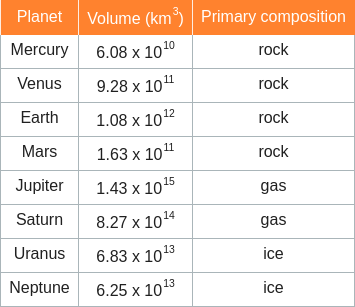

No.0
Question: Is the following statement about our solar system true or false?
Jupiter's volume is more than 10,000 times as large as the volume of Mars.
Context: Use the data to answer the question below.
Choices: ['true', 'false']
Answer: 1
Qwen: 0
BLIP: Answer: 0 



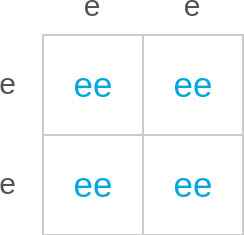

No.2
Question: What is the expected ratio of offspring with black eyes to offspring with red eyes? Choose the most likely ratio.
Context: In a group of koi fish, some individuals have red eyes and others have black eyes. In this group, the gene for the eye color trait has two alleles. The allele for red eyes (E) is dominant over the allele for black eyes (e).
This Punnett square shows a cross between two koi fish.
Choices: ['1:3', '2:2', '4:0', '3:1', '0:4']
Answer: 2
Qwen: 3: 3:1
BLIP: Answer: 3:1 



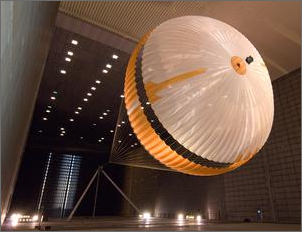

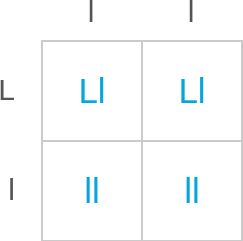

No.7
Question: Which of the following could Kenneth's test show?
Context: People can use the engineering-design process to develop solutions to problems. One step in the process is testing if a potential solution meets the requirements of the design.
The passage below describes how the engineering-design process was used to test a solution to a problem. Read the passage. Then answer the question below.

Kenneth was an aerospace engineer who was developing a parachute for a spacecraft that would land on Mars. He needed to add a vent at the center of the parachute so the spacecraft would land smoothly. However, the spacecraft would have to travel at a high speed before landing. If the vent was too big or too small, the parachute might swing wildly at this speed. The movement could damage the spacecraft.
So, to help decide how big the vent should be, Kenneth put a parachute with a 1 m vent in a wind tunnel. The wind tunnel made it seem like the parachute was moving at 200 km per hour. He 

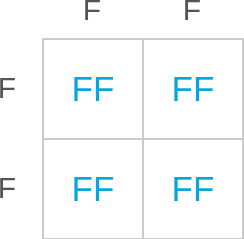

No.9
Question: What is the probability that a rabbit produced by this cross will have black fur?
Context: In a group of rabbits, some individuals have black fur and others have brown fur. In this group, the gene for the fur color trait has two alleles. The allele for brown fur (f) is recessive to the allele for black fur (F).
This Punnett square shows a cross between two rabbits.
Choices: ['4/4', '1/4', '3/4', '0/4', '2/4']
Answer: 0
Qwen: 3/4
BLIP: Answer: 1 



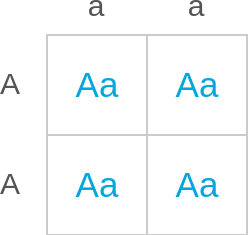

No.13
Question: What is the probability that a cow produced by this cross will be homozygous dominant for the coat pattern gene?
Context: In a group of cows, some individuals have solid coloring and others have white spots. In this group, the gene for the coat pattern trait has two alleles. The allele for white spots (a) is recessive to the allele for solid coloring (A).
This Punnett square shows a cross between two cows.
Choices: ['0/4', '1/4', '4/4', '2/4', '3/4']
Answer: 0
Qwen: 1/4
BLIP: Answer: 1: 1/4 



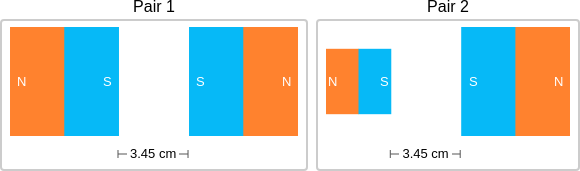

No.19
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes.
Choices: ['The magnitude of the magnetic force is smaller in Pair 1.', 'The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is smaller in Pair 2.']
Answer: 2
Qwen: 1: The magnitude of the magnetic force is the same in both pairs.
BLIP: Answer: 1 



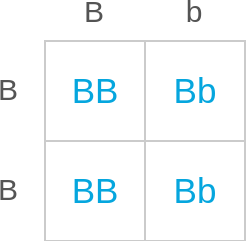

No.24
Question: What is the expected ratio of offspring with a white body to offspring with a brown body? Choose the most likely ratio.
Context: In a group of Channel catfish, some individuals have a brown body and others have a white body. In this group, the gene for the body color trait has two alleles. The allele for a white body (b) is recessive to the allele for a brown body (B).
This Punnett square shows a cross between two Channel catfish.
Choices: ['4:0', '3:1', '0:4', '2:2', '1:3']
Answer: 2
Qwen: 1: 3:1
BLIP: Answer: 1:3 



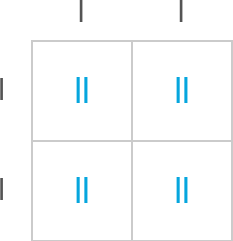

No.31
Question: What is the expected ratio of offspring with black wool to offspring with white wool? Choose the most likely ratio.
Context: In a group of sheep, some individuals have white wool and others have black wool. In this group, the gene for the wool color trait has two alleles. The allele for white wool (L) is dominant over the allele for black wool (l).
This Punnett square shows a cross between two sheep.
Choices: ['2:2', '1:3', '4:0', '3:1', '0:4']
Answer: 2
Qwen: 3: 3:1
BLIP: Answer: 3:1 



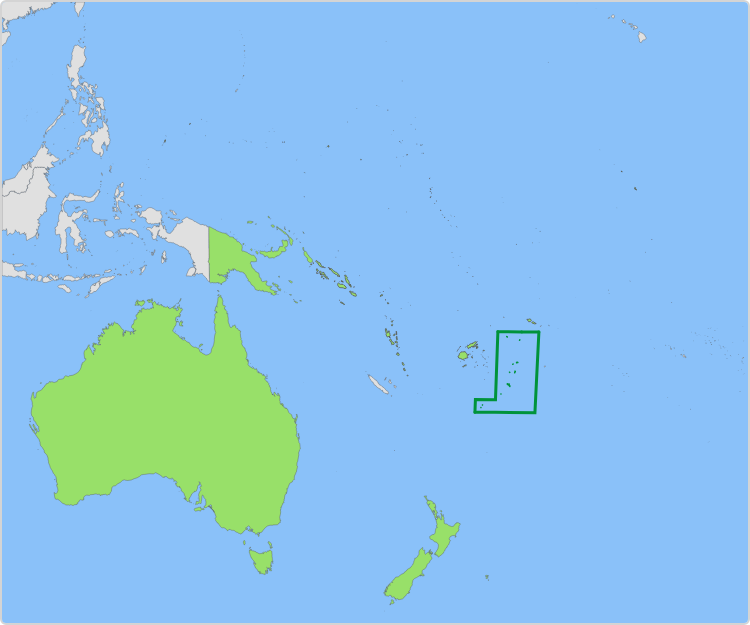

No.45
Question: Which country is highlighted?
Context: 
Choices: ['Kiribati', 'Samoa', 'Tonga', 'Fiji']
Answer: 2
Qwen: 0: Kiribati
BLIP: Answer: 0 



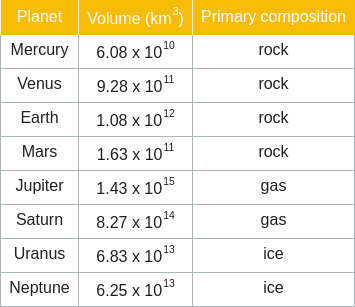

No.46
Question: Is the following statement about our solar system true or false?
Jupiter's volume is more than 10,000 times as large as the volume of Mars.
Context: Use the data to answer the question below.
Choices: ['true', 'false']
Answer: 1
Qwen: 0
BLIP: Answer: 0 



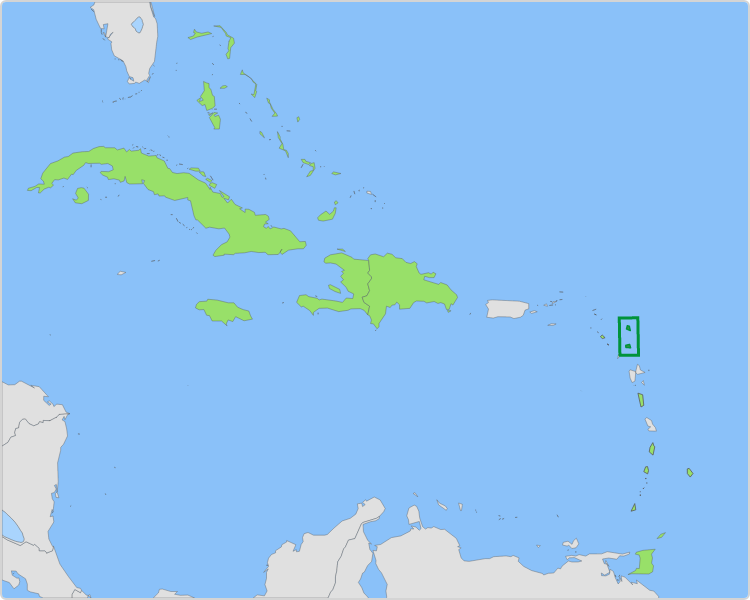

No.50
Question: Which country is highlighted?
Context: 
Choices: ['Saint Kitts and Nevis', 'Cuba', 'Antigua and Barbuda', 'Barbados']
Answer: 2
Qwen: 0: Saint Kitts and Nevis
BLIP: Answer: 1 



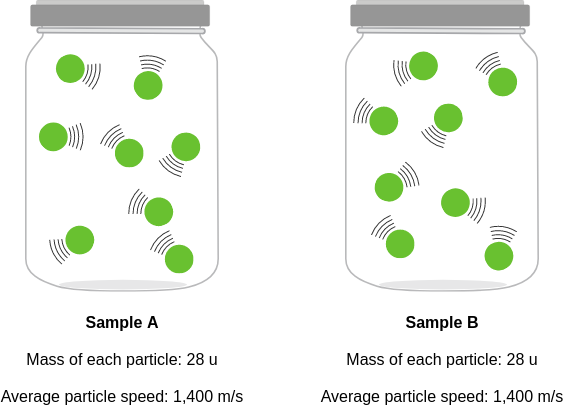

No.63
Question: Compare the average kinetic energies of the particles in each sample. Which sample has the higher temperature?
Context: The diagrams below show two pure samples of gas in identical closed, rigid containers. Each colored ball represents one gas particle. Both samples have the same number of particles.
Choices: ['sample A', 'neither; the samples have the same temperature', 'sample B']
Answer: 1
Qwen: 0
BLIP: Answer: 2 



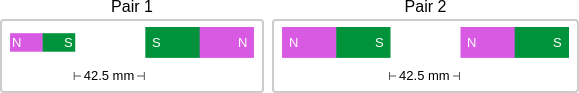

No.65
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes.
Choices: ['The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is smaller in Pair 1.', 'The magnitude of the magnetic force is smaller in Pair 2.']
Answer: 1
Qwen: 0
BLIP: Answer: 0 



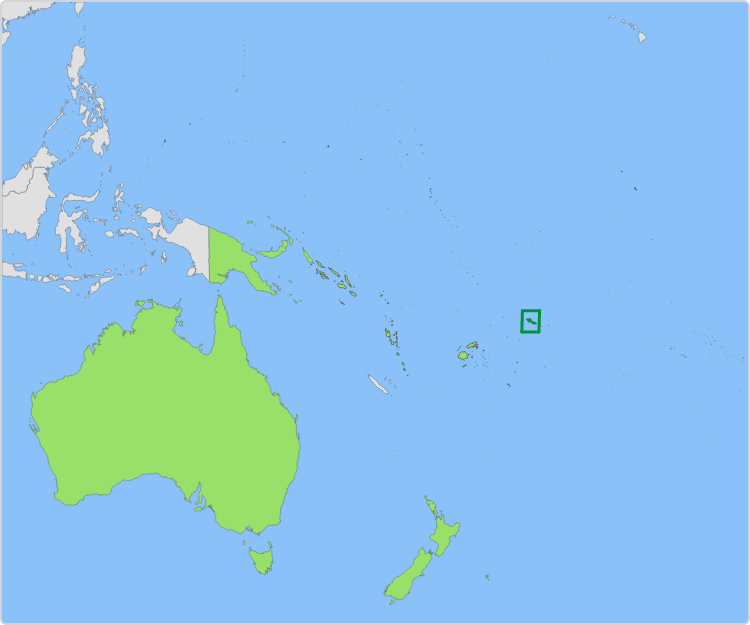

No.73
Question: Which country is highlighted?
Context: 
Choices: ['New Zealand', 'Tuvalu', 'Tonga', 'Samoa']
Answer: 3
Qwen: 1: Tuvalu
BLIP: Answer: 1 



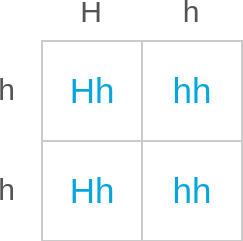

No.74
Question: What is the expected ratio of offspring that do not have Huntington's disease to offspring that have Huntington's disease? Choose the most likely ratio.
Context: This passage describes the Huntington's disease trait in humans:
Huntington's disease is a condition that causes the death of brain cells over time. This loss of cells interferes with brain function and may lead to uncontrolled movements, difficulty thinking, and changes in behavior.
In a group of humans, some individuals have Huntington's disease and others do not. In this group, the gene for the Huntington's disease trait has two alleles. The allele for not having Huntington's disease (h) is recessive to the allele for having Huntington's disease (H).
This Punnett square shows a cross between two humans.
Choices: ['2:2', '3:1', '4:0', '0:4', '1:3']
Answer: 0
Qwen: 2: 4:0
BLIP: Answer: 1: 3:1 



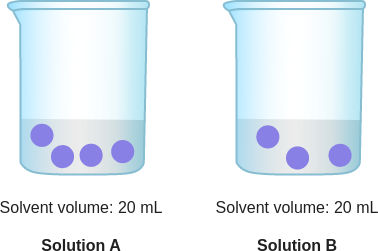

No.78
Question: Which solution has a higher concentration of purple particles?
Context: The diagram below is a model of two solutions. Each purple ball represents one particle of solute.
Choices: ['Solution A', 'neither; their concentrations are the same', 'Solution B']
Answer: 0
Qwen: 1: neither; their concentrations are the same
BLIP: Answer: 1 



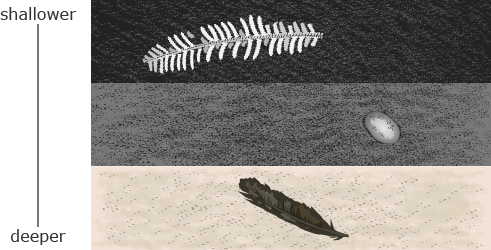

No.81
Question: Which of the following fossils is younger? Select the more likely answer.
Context: This diagram shows fossils in an undisturbed sedimentary rock sequence.
Choices: ['fern', 'feather']
Answer: 0
Qwen: 1: feather
BLIP: Answer: 1 



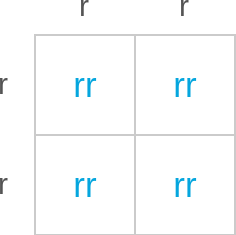

No.90
Question: What is the expected ratio of offspring that have thorns to offspring that do not have thorns? Choose the most likely ratio.
Context: In a group of rose plants, some individuals have thorns and others do not. In this group, the gene for the thorns trait has two alleles. The allele for having thorns (R) is dominant over the allele for not having thorns (r).
This Punnett square shows a cross between two rose plants.
Choices: ['2:2', '4:0', '0:4', '1:3', '3:1']
Answer: 2
Qwen: 4: 3:1
BLIP: Answer: 1:4:1 



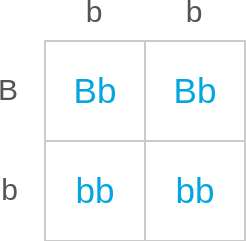

No.91
Question: What is the probability that a Cepaea snail produced by this cross will be homozygous recessive for the shell banding gene?
Context: This passage describes the shell banding trait in Cepaea snails:
Cepaea snails live on land in many parts of Europe. The shells of Cepaea snails can have different colors and patterns. Banded shells have dark bands, or stripes, that spiral around their surfaces. Unbanded shells do not have bands.
In a group of Cepaea snails, some individuals have a banded shell and others have an unbanded shell. In this group, the gene for the shell banding trait has two alleles. The allele for an unbanded shell (b) is recessive to the allele for a banded shell (B).
This Punnett square shows a cross between two Cepaea snails.
Choices: ['2/4', '4/4', '0/4', '3/4', '1/4']
Answer: 0
Qwen: 4/4
BLIP: Answer: 4 



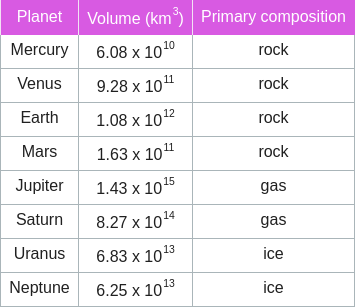

No.92
Question: Is the following statement about our solar system true or false?
The volume of Uranus is less than ten times the volume of Neptune.
Context: Use the data to answer the question below.
Choices: ['true', 'false']
Answer: 0
Qwen: 1
BLIP: Answer: 1 



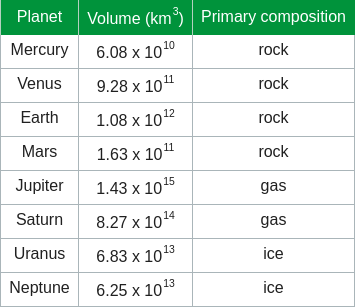

No.93
Question: Is the following statement about our solar system true or false?
Jupiter's volume is more than ten times as large as Saturn's volume.
Context: Use the data to answer the question below.
Choices: ['false', 'true']
Answer: 0
Qwen: 1
BLIP: Answer: 1 



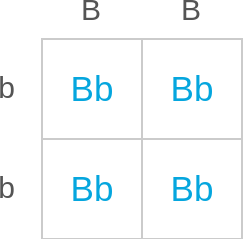

No.95
Question: What is the expected ratio of offspring with a gray body to offspring with a black body? Choose the most likely ratio.
Context: In a group of fruit flies, some individuals have a gray body and others have a black body. In this group, the gene for the body color trait has two alleles. The allele for a gray body (B) is dominant over the allele for a black body (b).
This Punnett square shows a cross between two fruit flies.
Choices: ['4:0', '1:3', '3:1', '2:2', '0:4']
Answer: 0
Qwen: 2: 3:1
BLIP: Answer: 2:1 



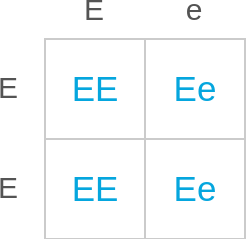

No.99
Question: What is the probability that an American curl cat produced by this cross will have curled ears?
Context: In a group of American curl cats, some individuals have curled ears and others have straight ears. In this group, the gene for the ear type trait has two alleles. The allele for curled ears (E) is dominant over the allele for straight ears (e).
This Punnett square shows a cross between two American curl cats.
Choices: ['4/4', '3/4', '2/4', '0/4', '1/4']
Answer: 0
Qwen: 1: 3/4
BLIP: Answer: 1 



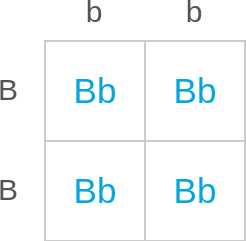

No.103
Question: What is the expected ratio of offspring with a dwarf body to offspring with a normal-sized body? Choose the most likely ratio.
Context: In a group of rats, some individuals have a normal-sized body and others have a dwarf body. In this group, the gene for the body size trait has two alleles. The allele for a normal-sized body (B) is dominant over the allele for a dwarf body (b).
This Punnett square shows a cross between two rats.
Choices: ['2:2', '4:0', '3:1', '0:4', '1:3']
Answer: 3
Qwen: 2: 3:1
BLIP: Answer: 2:2 



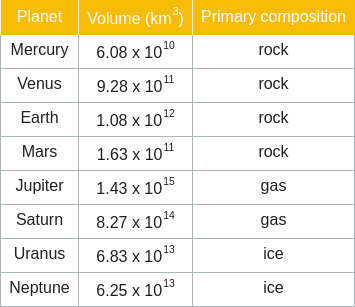

No.111
Question: Is the following statement about our solar system true or false?
The volume of Uranus is less than ten times the volume of Neptune.
Context: Use the data to answer the question below.
Choices: ['true', 'false']
Answer: 0
Qwen: 1
BLIP: Answer: 1 



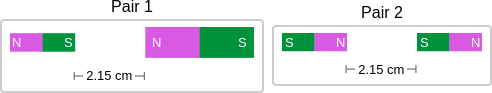

No.113
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes.
Choices: ['The magnitude of the magnetic force is greater in Pair 1.', 'The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is greater in Pair 2.']
Answer: 0
Qwen: 1: The magnitude of the magnetic force is the same in both pairs.
BLIP: Answer: 1 



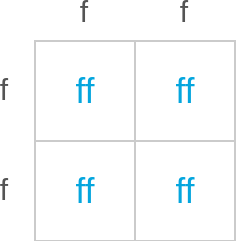

No.126
Question: What is the expected ratio of offspring with bumpy fruit to offspring with smooth fruit? Choose the most likely ratio.
Context: In a group of cucumber plants, some individuals have bumpy fruit and others have smooth fruit. In this group, the gene for the fruit texture trait has two alleles. The allele for bumpy fruit (F) is dominant over the allele for smooth fruit (f).
This Punnett square shows a cross between two cucumber plants.
Choices: ['3:1', '2:2', '1:3', '4:0', '0:4']
Answer: 4
Qwen: 3: 4:0
BLIP: Answer: 1:2:1 



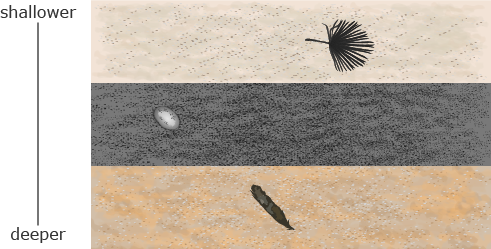

No.130
Question: Which of the following fossils is older? Select the more likely answer.
Context: This diagram shows fossils in an undisturbed sedimentary rock sequence.
Choices: ['crocodile egg', 'palm leaf']
Answer: 0
Qwen: 1: palm leaf
BLIP: Answer: 1 



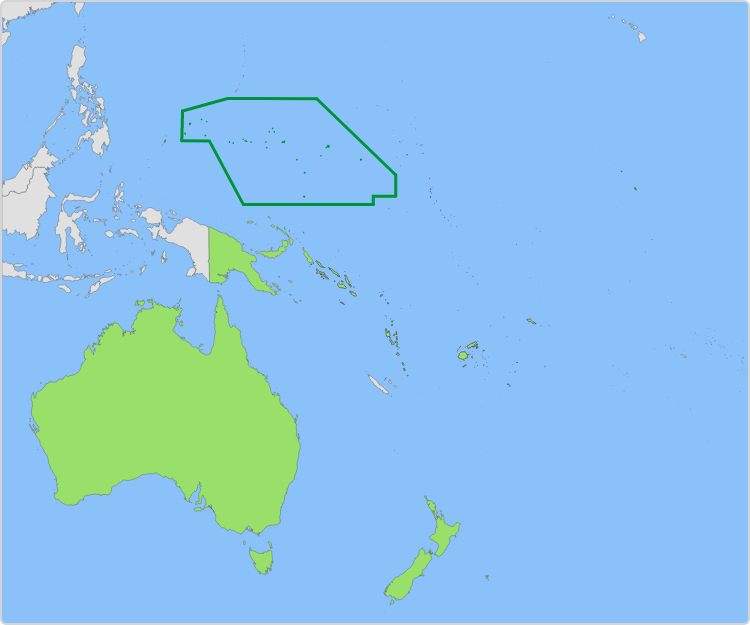

No.134
Question: Which country is highlighted?
Context: 
Choices: ['Fiji', 'Papua New Guinea', 'Palau', 'the Federated States of Micronesia']
Answer: 3
Qwen: 0: Fiji
BLIP: Answer: 1 



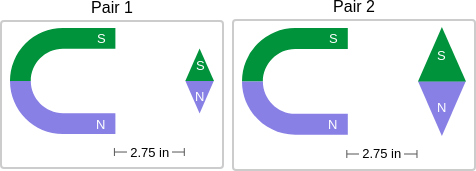

No.143
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes and shapes.
Choices: ['The magnitude of the magnetic force is greater in Pair 2.', 'The magnitude of the magnetic force is greater in Pair 1.', 'The magnitude of the magnetic force is the same in both pairs.']
Answer: 0
Qwen: 2: The magnitude of the magnetic force is the same in both pairs.
BLIP: Answer: 1 



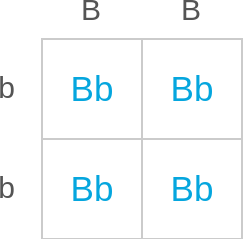

No.144
Question: What is the expected ratio of offspring with blue body feathers to offspring with green body feathers? Choose the most likely ratio.
Context: In a group of budgerigar parakeets, some individuals have green body feathers and others have blue body feathers. In this group, the gene for the body feather color trait has two alleles. The allele for green body feathers (B) is dominant over the allele for blue body feathers (b).
This Punnett square shows a cross between two budgerigar parakeets.
Choices: ['4:0', '0:4', '3:1', '2:2', '1:3']
Answer: 1
Qwen: 2: 3:1
BLIP: Answer: 3:1 



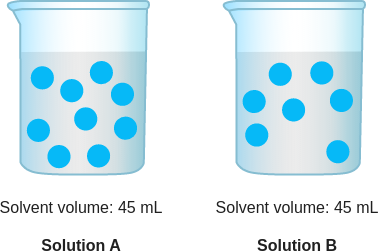

No.151
Question: Which solution has a higher concentration of blue particles?
Context: The diagram below is a model of two solutions. Each blue ball represents one particle of solute.
Choices: ['Solution A', 'Solution B', 'neither; their concentrations are the same']
Answer: 0
Qwen: 2: neither; their concentrations are the same
BLIP: Answer: 1 



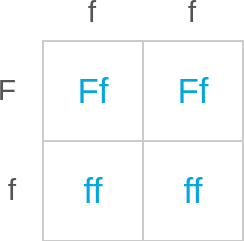

No.153
Question: What is the probability that a rose plant produced by this cross will have dark yellow flowers?
Context: In a group of rose plants, some individuals have light yellow flowers and others have dark yellow flowers. In this group, the gene for the flower color trait has two alleles. The allele for light yellow flowers (F) is dominant over the allele for dark yellow flowers (f).
This Punnett square shows a cross between two rose plants.
Choices: ['3/4', '0/4', '4/4', '2/4', '1/4']
Answer: 3
Qwen: 4/4
BLIP: Answer: 0: 3/4 



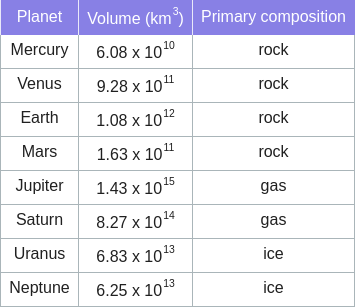

No.165
Question: Is the following statement about our solar system true or false?
Jupiter's volume is more than 10,000 times as large as the volume of Mars.
Context: Use the data to answer the question below.
Choices: ['false', 'true']
Answer: 0
Qwen: 1
BLIP: Answer: 1 



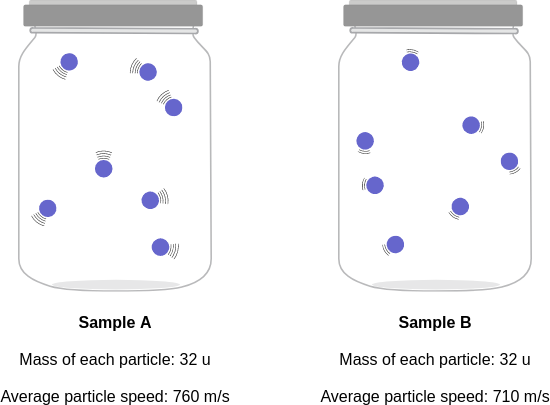

No.168
Question: Compare the average kinetic energies of the particles in each sample. Which sample has the higher temperature?
Context: The diagrams below show two pure samples of gas in identical closed, rigid containers. Each colored ball represents one gas particle. Both samples have the same number of particles.
Choices: ['sample A', 'neither; the samples have the same temperature', 'sample B']
Answer: 0
Qwen: 2: sample B
BLIP: Answer: 2 



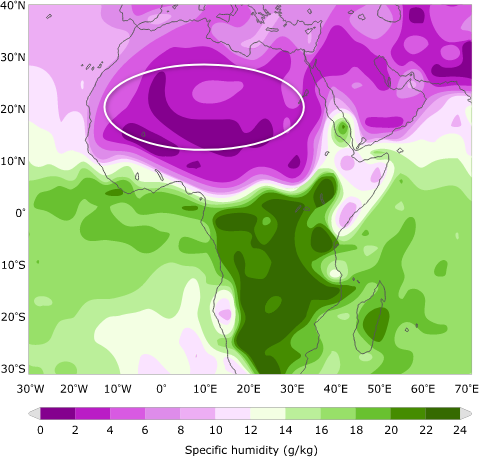

No.176
Question: Which specific humidity level was measured within the outlined area shown?
Context: The map below shows humidity in the lower atmosphere on February 21, 2017. The map shows specific humidity, a measurement of the amount of water vapor in the air. The outlined area shows an air mass that influenced weather in Africa on that day.
Look at the map. Then, answer the question below.
Data source: United States National Oceanic and Atmospheric Administration/Earth System Research Laboratory, Physical Sciences Division
Choices: ['11 grams of water vapor per kilogram of air', '13 grams of water vapor per kilogram of air', '3 grams of water vapor per kilogram of air']
Answer: 2
Qwen: 1
BLIP: Answer: 1 



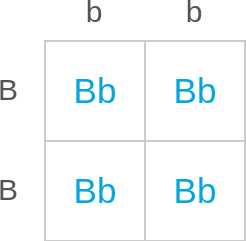

No.177
Question: What is the probability that a rainbow trout produced by this cross will have a greenish-brown body?
Context: In a group of rainbow trout, some individuals have a greenish-brown body and others have a blue body. In this group, the gene for the body color trait has two alleles. The allele for a blue body (b) is recessive to the allele for a greenish-brown body (B).
This Punnett square shows a cross between two rainbow trout.
Choices: ['3/4', '4/4', '0/4', '2/4', '1/4']
Answer: 1
Qwen: 2/4
BLIP: Answer: 4 



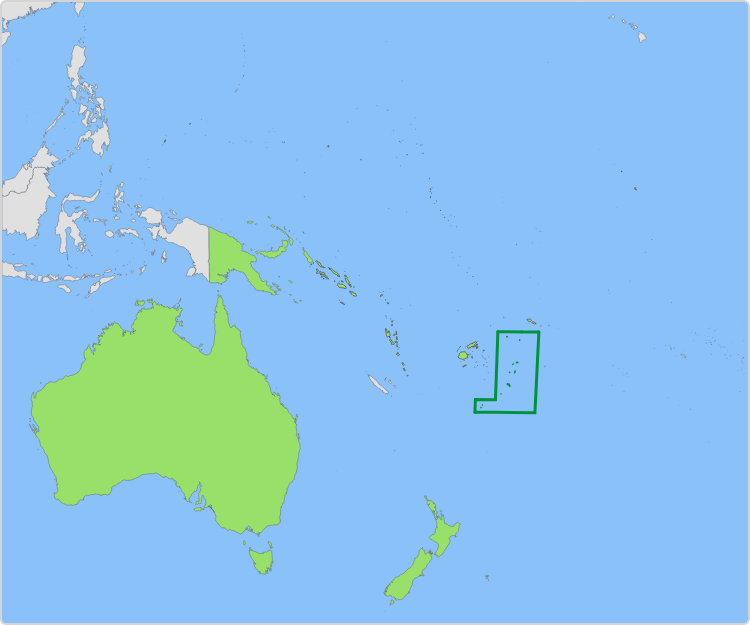

No.178
Question: Which country is highlighted?
Context: 
Choices: ['Samoa', 'Fiji', 'Tuvalu', 'Tonga']
Answer: 3
Qwen: 2: Tuvalu
BLIP: Answer: 2 



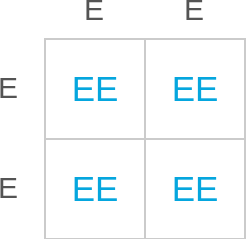

No.180
Question: What is the probability that a fruit fly produced by this cross will have brown eyes?
Context: In a group of fruit flies, some individuals have red eyes and others have brown eyes. In this group, the gene for the eye color trait has two alleles. The allele for brown eyes (e) is recessive to the allele for red eyes (E).
This Punnett square shows a cross between two fruit flies.
Choices: ['3/4', '1/4', '2/4', '4/4', '0/4']
Answer: 4
Qwen: 1
BLIP: Answer: 1 



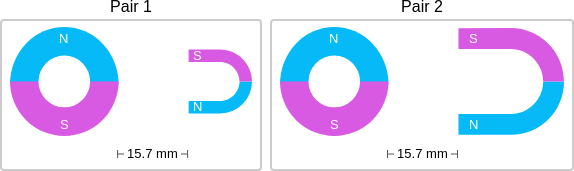

No.183
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes and shapes.
Choices: ['The magnitude of the magnetic force is smaller in Pair 1.', 'The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is smaller in Pair 2.']
Answer: 0
Qwen: 1: The magnitude of the magnetic force is the same in both pairs.
BLIP: Answer: 1 



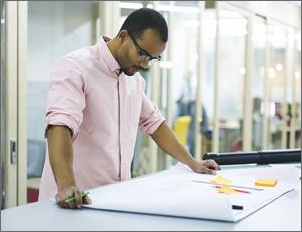

No.189
Question: Which of the following could Trent's test show?
Context: People can use the engineering-design process to develop solutions to problems. One step in the process is testing if a potential solution meets the requirements of the design.
The passage below describes how the engineering-design process was used to test a solution to a problem. Read the passage. Then answer the question below.

Trent was a landscape architect who was hired to design a new city park. The city council wanted the park to have space for outdoor concerts and to have at least 20% of the park shaded by trees. Trent thought the concert area should be at least 150 meters from the road so traffic noise didn't interrupt the music. He developed three possible designs for the park with the concert area in a different location in each design. Then, he tested each design by measuring the distance between the road and the concert area.
Figure: studying an architect's design.
Choices: ['if at least 20% of the 

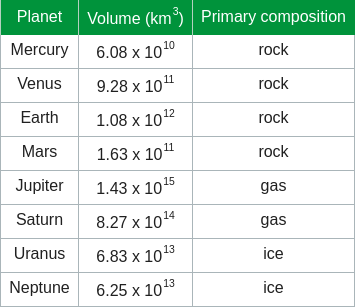

No.190
Question: Is the following statement about our solar system true or false?
The volume of Mars is more than ten times as large as Mercury's.
Context: Use the data to answer the question below.
Choices: ['false', 'true']
Answer: 0
Qwen: 1
BLIP: Answer: 1 



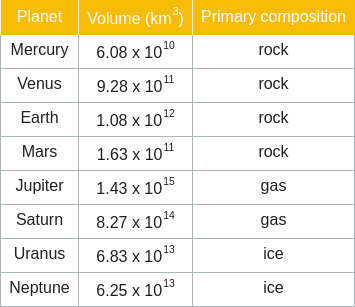

No.194
Question: Is the following statement about our solar system true or false?
Saturn's volume is more than 10,000 times as large as Mercury's.
Context: Use the data to answer the question below.
Choices: ['true', 'false']
Answer: 0
Qwen: 1
BLIP: Answer: 1 



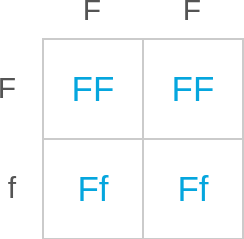

No.195
Question: What is the expected ratio of offspring with sour fruit to offspring with sweet fruit? Choose the most likely ratio.
Context: In a group of muskmelon plants, some individuals have sour fruit and others have sweet fruit. In this group, the gene for the fruit taste trait has two alleles. The allele for sour fruit (F) is dominant over the allele for sweet fruit (f).
This Punnett square shows a cross between two muskmelon plants.
Choices: ['3:1', '4:0', '0:4', '2:2', '1:3']
Answer: 1
Qwen: 4: 1:3
BLIP: Answer: 3:1 



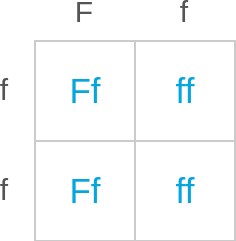

No.198
Question: What is the probability that a rose plant produced by this cross will have single flowers?
Context: This passage describes the flower form trait in rose plants:
Roses may grow single flowers or double flowers. Double flowers have more petals than single flowers and are highly prized by gardeners. However, these extra petals may block or replace parts of the flower needed for reproduction. This makes double-flowered plants difficult to breed.
In a group of rose plants, some individuals have double flowers and others have single flowers. In this group, the gene for the flower form trait has two alleles. The allele for single flowers (f) is recessive to the allele for double flowers (F).
This Punnett square shows a cross between two rose plants.
Choices: ['3/4', '2/4', '1/4', '0/4', '4/4']
Answer: 1
Qwen: 2/4
BLIP: Answer: 2/4 



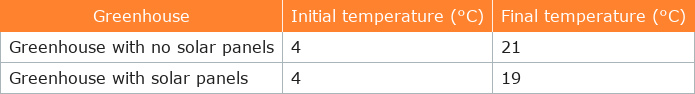

No.210
Question: During this time, thermal energy was transferred from () to ().
Context: Two identical greenhouses were next to each other. There were solar panels on the roof of one greenhouse but not on the roof of the other greenhouse. This table shows how the temperature of each greenhouse changed over 2hours.
Choices: ['the surroundings . . . each greenhouse', 'each greenhouse . . . the surroundings']
Answer: 0
Qwen: 1: each greenhouse . . . the surroundings
BLIP: Answer: 1 



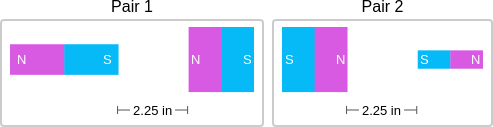

No.211
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes and shapes.
Choices: ['The magnitude of the magnetic force is greater in Pair 2.', 'The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is greater in Pair 1.']
Answer: 2
Qwen: 1: The magnitude of the magnetic force is the same in both pairs.
BLIP: Answer: 1 



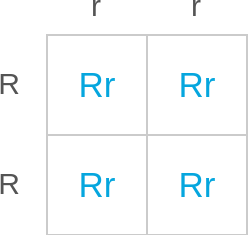

No.213
Question: What is the probability that a rose plant produced by this cross will not have thorns?
Context: In a group of rose plants, some individuals have thorns and others do not. In this group, the gene for the thorns trait has two alleles. The allele for not having thorns (r) is recessive to the allele for having thorns (R).
This Punnett square shows a cross between two rose plants.
Choices: ['4/4', '2/4', '3/4', '0/4', '1/4']
Answer: 3
Qwen: 2/4
BLIP: Answer: 2/4 



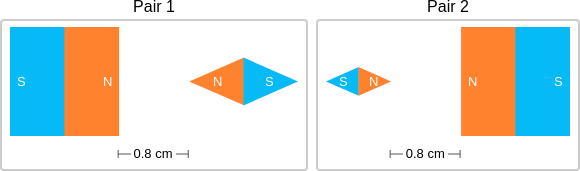

No.215
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes and shapes.
Choices: ['The magnitude of the magnetic force is smaller in Pair 1.', 'The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is smaller in Pair 2.']
Answer: 2
Qwen: 1: The magnitude of the magnetic force is the same in both pairs.
BLIP: Answer: 1 



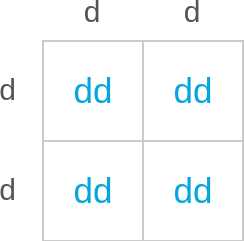

No.222
Question: What is the probability that a pea plant produced by this cross will have green pods?
Context: In a group of pea plants, some individuals have green pods and others have yellow pods. In this group, the gene for the pod color trait has two alleles. The allele for yellow pods (d) is recessive to the allele for green pods (D).
This Punnett square shows a cross between two pea plants.
Choices: ['2/4', '4/4', '1/4', '3/4', '0/4']
Answer: 4
Qwen: 2/4
BLIP: Answer: 3/4 



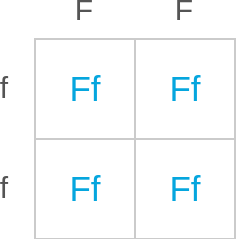

No.223
Question: What is the probability that a rose plant produced by this cross will have light yellow flowers?
Context: In a group of rose plants, some individuals have light yellow flowers and others have dark yellow flowers. In this group, the gene for the flower color trait has two alleles. The allele for dark yellow flowers (f) is recessive to the allele for light yellow flowers (F).
This Punnett square shows a cross between two rose plants.
Choices: ['1/4', '2/4', '4/4', '0/4', '3/4']
Answer: 2
Qwen: 1
BLIP: Answer: 1/4 



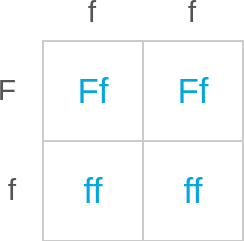

No.232
Question: What is the probability that a rock pocket mouse produced by this cross will be homozygous dominant for the fur color gene?
Context: In a group of rock pocket mice, some individuals have dark fur and others have light fur. In this group, the gene for the fur color trait has two alleles. The allele for dark fur (F) is dominant over the allele for light fur (f).
This Punnett square shows a cross between two rock pocket mice.
Choices: ['4/4', '2/4', '0/4', '3/4', '1/4']
Answer: 2
Qwen: 4/4
BLIP: Answer: 1 



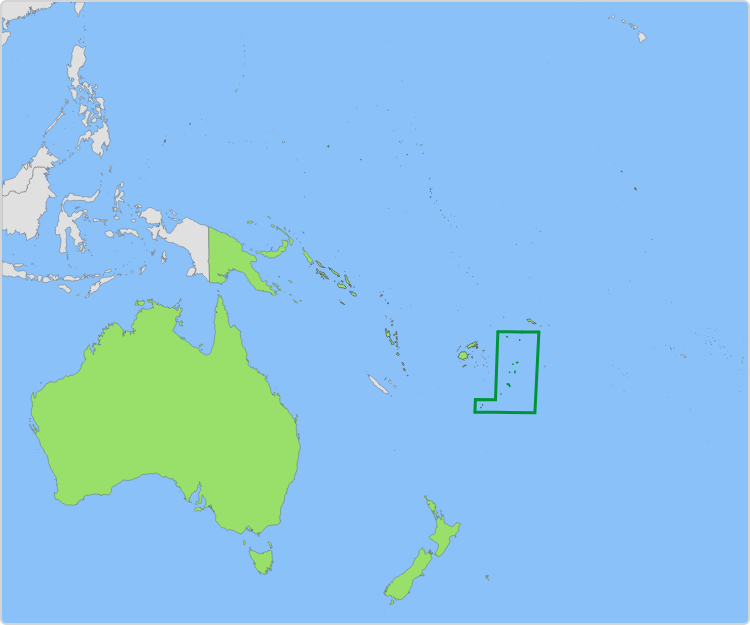

No.237
Question: Which country is highlighted?
Context: 
Choices: ['Solomon Islands', 'Tonga', 'Kiribati', 'Tuvalu']
Answer: 1
Qwen: 3: Tuvalu
BLIP: Answer: 3 



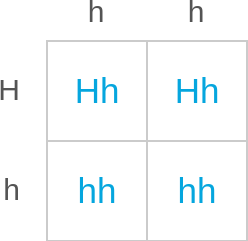

No.245
Question: What is the probability that a pea plant produced by this cross will be homozygous recessive for the stem height gene?
Context: In a group of pea plants, some individuals have a tall stem and others have a short stem. In this group, the gene for the stem height trait has two alleles. The allele for a tall stem (H) is dominant over the allele for a short stem (h).
This Punnett square shows a cross between two pea plants.
Choices: ['3/4', '1/4', '0/4', '2/4', '4/4']
Answer: 3
Qwen: 1: 1/4
BLIP: Answer: 1/4 



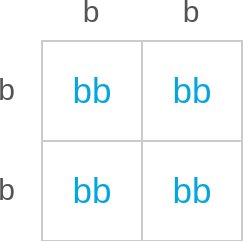

No.246
Question: What is the probability that a Cepaea snail produced by this cross will be homozygous recessive for the shell banding gene?
Context: This passage describes the shell banding trait in Cepaea snails:
Cepaea snails live on land in many parts of Europe. The shells of Cepaea snails can have different colors and patterns. Banded shells have dark bands, or stripes, that spiral around their surfaces. Unbanded shells do not have bands.
In a group of Cepaea snails, some individuals have a banded shell and others have an unbanded shell. In this group, the gene for the shell banding trait has two alleles. The allele for an unbanded shell (b) is recessive to the allele for a banded shell (B).
This Punnett square shows a cross between two Cepaea snails.
Choices: ['2/4', '0/4', '3/4', '1/4', '4/4']
Answer: 4
Qwen: 3/4
BLIP: Answer: 3/4 



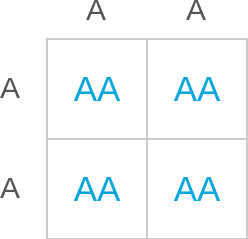

No.251
Question: What is the expected ratio of offspring with a king coat to offspring with a spotted coat? Choose the most likely ratio.
Context: This passage describes the coat pattern trait in cheetahs:
A cheetah with a spotted coat has many small black spots on its body. A cheetah with a king coat has large black splotches on its body and stripes on its back. King cheetahs are rarely seen in the wild. They were once thought to be a different species.
In a group of cheetahs, some individuals have a spotted coat and others have a king coat. In this group, the gene for the coat pattern trait has two alleles. The allele for a king coat (a) is recessive to the allele for a spotted coat (A).
This Punnett square shows a cross between two cheetahs.
Choices: ['2:2', '1:3', '4:0', '0:4', '3:1']
Answer: 3
Qwen: 2: 4:0
BLIP: Answer: 1: 1:3 



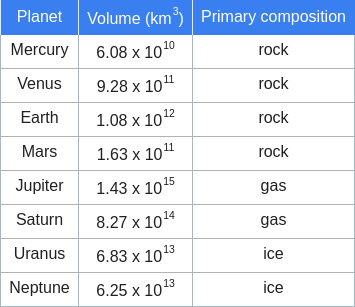

No.253
Question: Is the following statement about our solar system true or false?
Jupiter's volume is more than ten times as large as Saturn's volume.
Context: Use the data to answer the question below.
Choices: ['false', 'true']
Answer: 0
Qwen: 1
BLIP: Answer: 1 



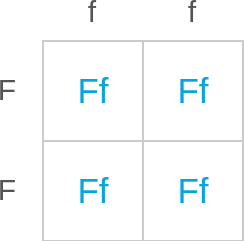

No.256
Question: What is the probability that a dachshund dog produced by this cross will have rough fur?
Context: In a group of dachshund dogs, some individuals have rough fur and others have soft fur. In this group, the gene for the fur texture trait has two alleles. The allele for soft fur (f) is recessive to the allele for rough fur (F).
This Punnett square shows a cross between two dachshund dogs.
Choices: ['1/4', '4/4', '3/4', '2/4', '0/4']
Answer: 1
Qwen: 2: 3/4
BLIP: Answer: 0: 1/4 



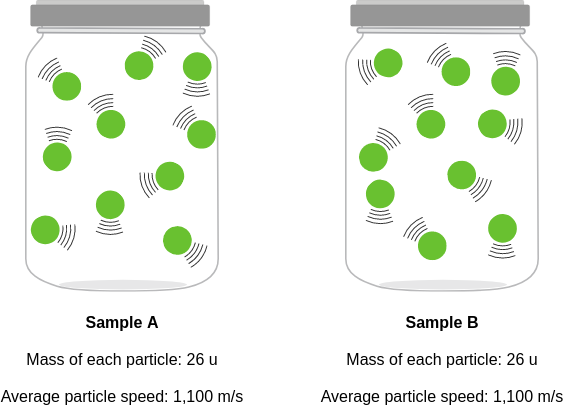

No.261
Question: Compare the average kinetic energies of the particles in each sample. Which sample has the higher temperature?
Context: The diagrams below show two pure samples of gas in identical closed, rigid containers. Each colored ball represents one gas particle. Both samples have the same number of particles.
Choices: ['sample A', 'sample B', 'neither; the samples have the same temperature']
Answer: 2
Qwen: 0
BLIP: Answer: 1 



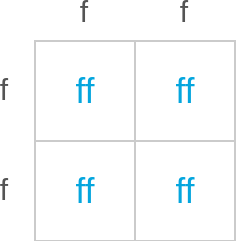

No.268
Question: What is the probability that a rose plant produced by this cross will be homozygous recessive for the flower color gene?
Context: In a group of rose plants, some individuals have light yellow flowers and others have dark yellow flowers. In this group, the gene for the flower color trait has two alleles. The allele for light yellow flowers (F) is dominant over the allele for dark yellow flowers (f).
This Punnett square shows a cross between two rose plants.
Choices: ['4/4', '2/4', '0/4', '1/4', '3/4']
Answer: 0
Qwen: 3/4
BLIP: Answer: 3/4 



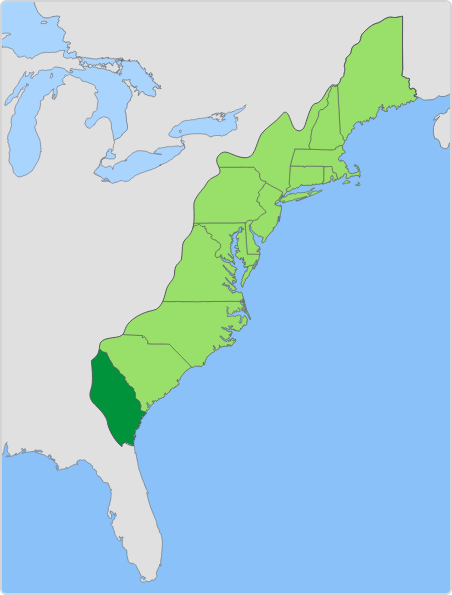

No.269
Question: What is the name of the colony shown?
Context: 
Choices: ['South Carolina', 'Georgia', 'Illinois', 'Virginia']
Answer: 1
Qwen: 2: Illinois
BLIP: Answer: 0 



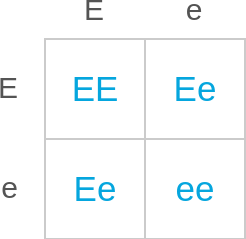

No.274
Question: What is the expected ratio of offspring with dumbo ears to offspring with normal ears? Choose the most likely ratio.
Context: This passage describes the ear type trait in rats:
Some rats have dumbo ears, which are larger and rounder than normal ears. Dumbo ears are also set on the sides of the rat's head instead of on the top. The word dumbo comes from the name of a cartoon elephant whose ears had a similar appearance.
In a group of rats, some individuals have normal ears and others have dumbo ears. In this group, the gene for the ear type trait has two alleles. The allele for dumbo ears (e) is recessive to the allele for normal ears (E).
This Punnett square shows a cross between two rats.
Choices: ['0:4', '1:3', '3:1', '2:2', '4:0']
Answer: 1
Qwen: 2: 3:1
BLIP: Answer: 2:2 



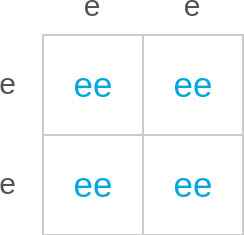

No.276
Question: What is the expected ratio of offspring with red eyes to offspring with brown eyes? Choose the most likely ratio.
Context: In a group of guinea pigs, some individuals have brown eyes and others have red eyes. In this group, the gene for the eye color trait has two alleles. The allele for red eyes (e) is recessive to the allele for brown eyes (E).
This Punnett square shows a cross between two guinea pigs.
Choices: ['1:3', '2:2', '4:0', '0:4', '3:1']
Answer: 2
Qwen: 4: 3:1
BLIP: Answer: 1:2:1 



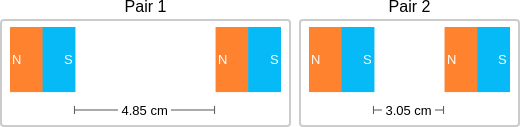

No.282
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material.
Choices: ['The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is smaller in Pair 2.', 'The magnitude of the magnetic force is smaller in Pair 1.']
Answer: 2
Qwen: 0
BLIP: Answer: 0 



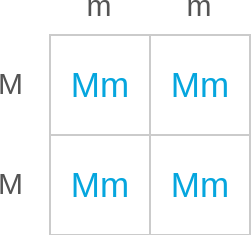

No.283
Question: What is the expected ratio of offspring that have myotonia congenita to offspring that do not have myotonia congenita? Choose the most likely ratio.
Context: This passage describes the myotonia congenita trait in goats:
Myotonia congenita is a condition that causes temporary muscle stiffness. When goats with myotonia congenita attempt to run from a resting position, their leg muscles often stiffen, causing them to fall over. Because of this behavior, these goats are referred to as fainting goats. Myotonia congenita is also found in other mammals, including horses, cats, and humans.
In a group of goats, some individuals have myotonia congenita and others do not. In this group, the gene for the myotonia congenita trait has two alleles. The allele for not having myotonia congenita (m) is recessive to the allele for having myotonia congenita (M).
This Punnett square shows a cross between two goats.
Choices: ['1:3', '2:2', '3:1', '0:4', '4:0']
Answer: 4
Qwen: 3: 0:4
BLIP: A

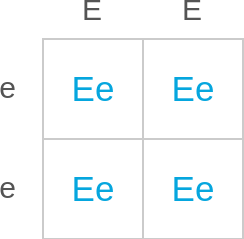

No.285
Question: What is the expected ratio of offspring with straight ears to offspring with curled ears? Choose the most likely ratio.
Context: In a group of American curl cats, some individuals have curled ears and others have straight ears. In this group, the gene for the ear type trait has two alleles. The allele for curled ears (E) is dominant over the allele for straight ears (e).
This Punnett square shows a cross between two American curl cats.
Choices: ['3:1', '0:4', '1:3', '4:0', '2:2']
Answer: 1
Qwen: 2: 1:3
BLIP: Answer: 2:2 



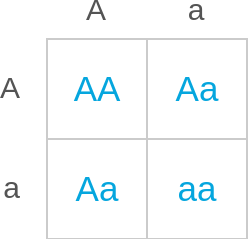

No.286
Question: What is the expected ratio of offspring with a black coat to offspring with a spotted coat? Choose the most likely ratio.
Context: In a group of leopards, some individuals have a spotted coat and others have a black coat. In this group, the gene for the coat pattern trait has two alleles. The allele for a spotted coat (A) is dominant over the allele for a black coat (a).
This Punnett square shows a cross between two leopards.
Choices: ['0:4', '1:3', '3:1', '4:0', '2:2']
Answer: 1
Qwen: 3: 4:0
BLIP: Answer: 2:2 



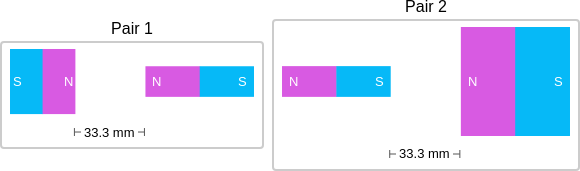

No.287
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes and shapes.
Choices: ['The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is smaller in Pair 2.', 'The magnitude of the magnetic force is smaller in Pair 1.']
Answer: 2
Qwen: 0
BLIP: Answer: 1 



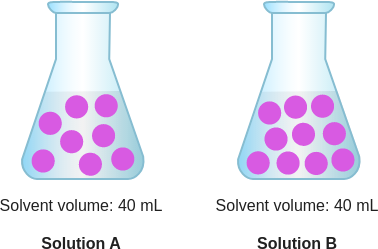

No.288
Question: Which solution has a higher concentration of pink particles?
Context: The diagram below is a model of two solutions. Each pink ball represents one particle of solute.
Choices: ['neither; their concentrations are the same', 'Solution A', 'Solution B']
Answer: 2
Qwen: 1
BLIP: Answer: 1 



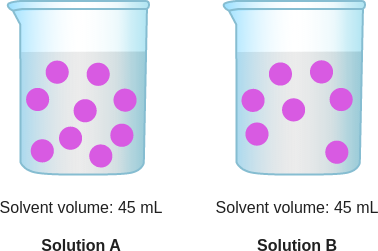

No.300
Question: Which solution has a higher concentration of pink particles?
Context: The diagram below is a model of two solutions. Each pink ball represents one particle of solute.
Choices: ['Solution A', 'Solution B', 'neither; their concentrations are the same']
Answer: 0
Qwen: 2: neither; their concentrations are the same
BLIP: Answer: 1 



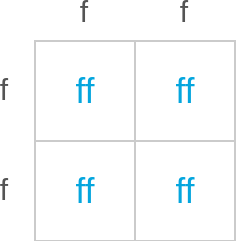

No.306
Question: What is the expected ratio of offspring with a woolly fleece to offspring with a hairy fleece? Choose the most likely ratio.
Context: This passage describes the fleece type trait in sheep:
The fleece, or outer coat, of a sheep is often cut off and used to make yarn for fabrics and other textiles. Woolly fleeces, which have shorter hairs, are usually used for clothing and blankets. Hairy fleeces, which have longer hairs, are usually used for carpets.
In a group of sheep, some individuals have a hairy fleece and others have a woolly fleece. In this group, the gene for the fleece type trait has two alleles. The allele for a hairy fleece (F) is dominant over the allele for a woolly fleece (f).
This Punnett square shows a cross between two sheep.
Choices: ['0:4', '4:0', '2:2', '1:3', '3:1']
Answer: 1
Qwen: 4: 3:1
BLIP: Answer: 2:2 



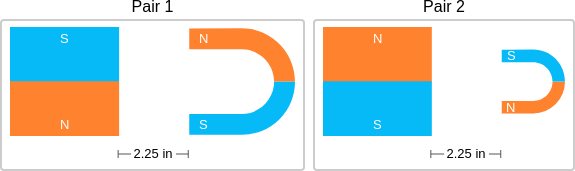

No.307
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes and shapes.
Choices: ['The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is smaller in Pair 1.', 'The magnitude of the magnetic force is smaller in Pair 2.']
Answer: 2
Qwen: 0
BLIP: Answer: 0 



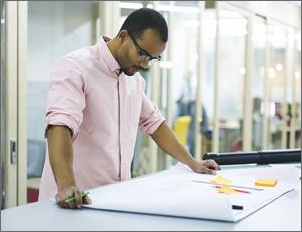

No.310
Question: Which of the following could Cooper's test show?
Context: People can use the engineering-design process to develop solutions to problems. One step in the process is testing if a potential solution meets the requirements of the design.
The passage below describes how the engineering-design process was used to test a solution to a problem. Read the passage. Then answer the question below.

Cooper was a landscape architect who was hired to design a new city park. The city council wanted the park to have space for outdoor concerts and to have at least 20% of the park shaded by trees. Cooper thought the concert area should be at least 150 meters from the road so traffic noise didn't interrupt the music. He developed three possible designs for the park with the concert area in a different location in each design. Then, he tested each design by measuring the distance between the road and the concert area.
Figure: studying an architect's design.
Choices: ['if at least 20% of t

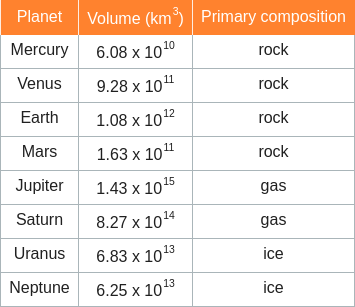

No.325
Question: Is the following statement about our solar system true or false?
Of the four smallest planets, two are made mainly of gas.
Context: Use the data to answer the question below.
Choices: ['false', 'true']
Answer: 0
Qwen: 1
BLIP: Answer: 1 



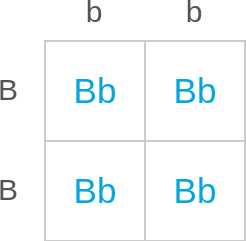

No.326
Question: What is the expected ratio of offspring with a normal-sized body to offspring with a dwarf body? Choose the most likely ratio.
Context: In a group of rats, some individuals have a normal-sized body and others have a dwarf body. In this group, the gene for the body size trait has two alleles. The allele for a dwarf body (b) is recessive to the allele for a normal-sized body (B).
This Punnett square shows a cross between two rats.
Choices: ['1:3', '4:0', '0:4', '2:2', '3:1']
Answer: 1
Qwen: 4: 3:1
Explanation:
In the Punnett square, there are 3 squares with the genotype Bb and 1 square with the genotype bb. Since Bb results in a normal-sized body and bb results in a dwarf body, the expected ratio of offspring with a normal-sized body to offspring with a dwarf body is 3:1.
BLIP: Answer: 3:3 



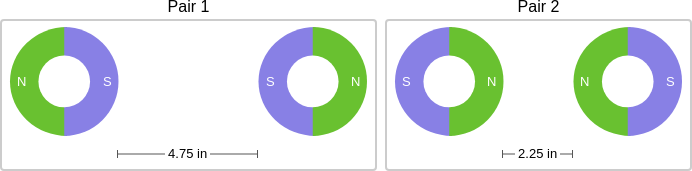

No.331
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material.
Choices: ['The magnitude of the magnetic force is greater in Pair 2.', 'The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is greater in Pair 1.']
Answer: 0
Qwen: 2: The magnitude of the magnetic force is greater in Pair 1.
BLIP: Answer: 1 



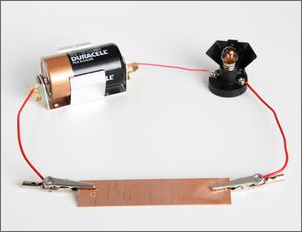

No.333
Question: Identify the question that Jeanette's experiment can best answer.
Context: The passage below describes an experiment. Read the passage and then follow the instructions below.

Jeanette built an electric circuit: she used wires to connect a battery to a light bulb, the light bulb to a small piece of copper, and the copper back to the battery. When the circuit was complete, the light turned on. Jeanette observed the brightness of the light for five seconds. She then replaced the copper with a piece of iron of equal size and noted whether the light became brighter or dimmer. Jeanette built three more of the same type of circuit. She repeated the tests with each circuit. Jeanette recorded whether the circuits produced brighter light when the circuit included copper or when the circuit included iron.
Figure: a circuit with a battery, a light bulb, and a piece of copper.
Choices: ['Do circuits that include iron produce dimmer light than circuits that include copper?', 'Can l

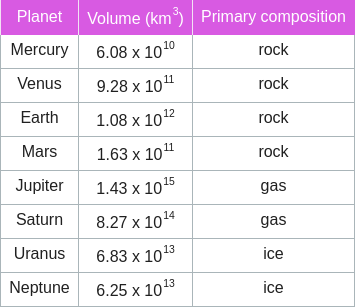

No.337
Question: Is the following statement about our solar system true or false?
Three-quarters of the planets are larger than Earth.
Context: Use the data to answer the question below.
Choices: ['false', 'true']
Answer: 0
Qwen: 1
BLIP: Answer: 1 



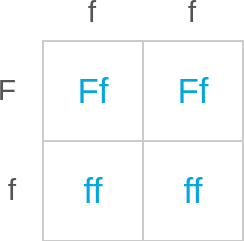

No.339
Question: What is the probability that a Syrian hamster produced by this cross will have long fur?
Context: In a group of Syrian hamsters, some individuals have short fur and others have long fur. In this group, the gene for the fur length trait has two alleles. The allele for short fur (F) is dominant over the allele for long fur (f).
This Punnett square shows a cross between two Syrian hamsters.
Choices: ['2/4', '3/4', '4/4', '1/4', '0/4']
Answer: 0
Qwen: 1: 3/4
BLIP: Answer: 1 



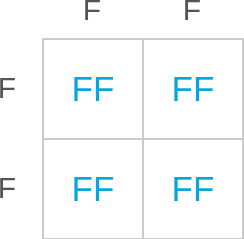

No.381
Question: What is the probability that a muskmelon plant produced by this cross will be homozygous recessive for the fruit taste gene?
Context: In a group of muskmelon plants, some individuals have sour fruit and others have sweet fruit. In this group, the gene for the fruit taste trait has two alleles. The allele for sweet fruit (f) is recessive to the allele for sour fruit (F).
This Punnett square shows a cross between two muskmelon plants.
Choices: ['2/4', '1/4', '0/4', '3/4', '4/4']
Answer: 2
Qwen: 1: 1/4
BLIP: Answer: 1/4 



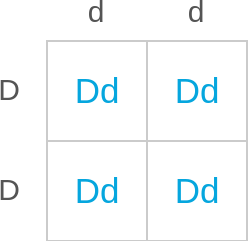

No.388
Question: What is the expected ratio of offspring with yellow pods to offspring with green pods? Choose the most likely ratio.
Context: In a group of pea plants, some individuals have green pods and others have yellow pods. In this group, the gene for the pod color trait has two alleles. The allele for yellow pods (d) is recessive to the allele for green pods (D).
This Punnett square shows a cross between two pea plants.
Choices: ['3:1', '4:0', '0:4', '1:3', '2:2']
Answer: 2
Qwen: 1: 4:0
BLIP: Answer: 0:4 



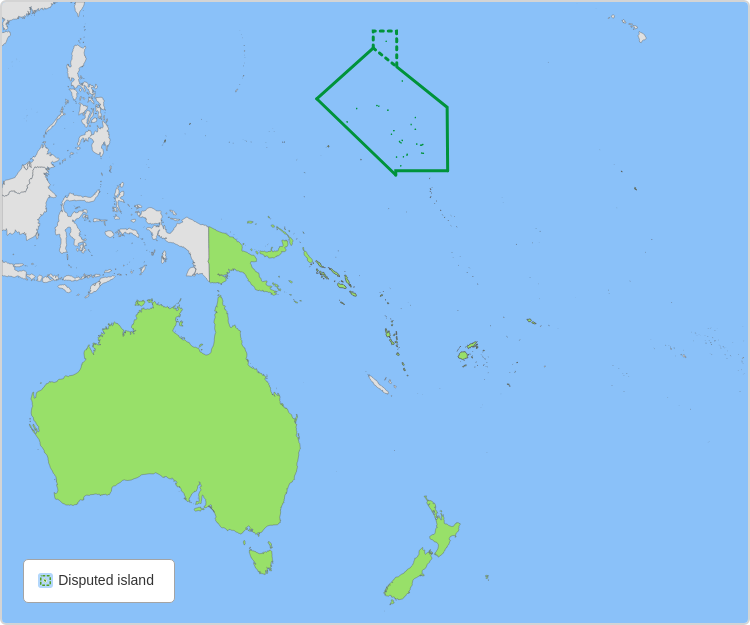

No.394
Question: Which country is highlighted?
Context: 
Choices: ['Solomon Islands', 'New Zealand', 'Kiribati', 'the Marshall Islands']
Answer: 3
Qwen: 2: Kiribati
BLIP: Answer: 1 



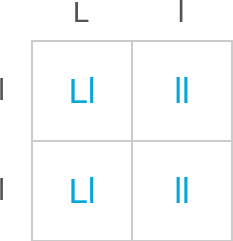

No.399
Question: What is the probability that a horse produced by this cross will have a reddish-brown coat?
Context: In a group of horses, some individuals have a black coat and others have a reddish-brown coat. In this group, the gene for the coat color trait has two alleles. The allele for a black coat (L) is dominant over the allele for a reddish-brown coat (l).
This Punnett square shows a cross between two horses.
Choices: ['3/4', '4/4', '0/4', '2/4', '1/4']
Answer: 3
Qwen: 2/4
BLIP: Answer: 0: 3/4 



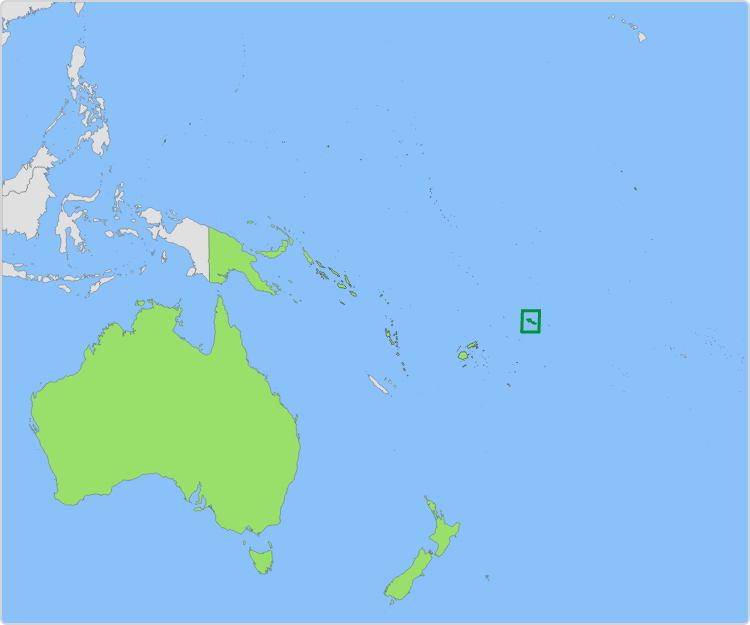

No.402
Question: Which country is highlighted?
Context: 
Choices: ['Palau', 'Tonga', 'Samoa', 'Papua New Guinea']
Answer: 2
Qwen: 0: Palau
BLIP: Answer: 3 



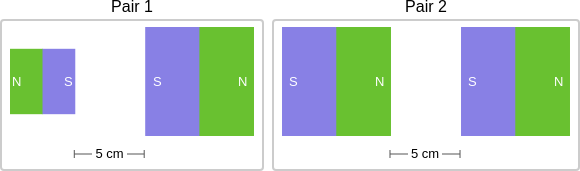

No.406
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes.
Choices: ['The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is smaller in Pair 2.', 'The magnitude of the magnetic force is smaller in Pair 1.']
Answer: 2
Qwen: 0
BLIP: Answer: 0 



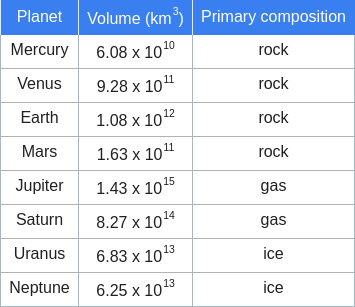

No.426
Question: Is the following statement about our solar system true or false?
Jupiter's volume is more than 10,000 times as large as the volume of Mars.
Context: Use the data to answer the question below.
Choices: ['true', 'false']
Answer: 1
Qwen: 0
BLIP: Answer: 0 



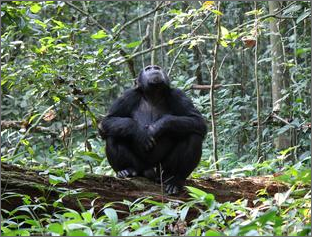

No.430
Question: Which statement describes the Kibale National Forest ecosystem?
Context: Figure: Kibale National Forest.
Kibale National Forest is a tropical rain forest ecosystem in Uganda, a country in eastern Africa. This rain forest is home to many African primates, including chimpanzees.
Choices: ['It has soil that is poor in nutrients.', 'It has soil that is rich in nutrients.']
Answer: 0
Qwen: 1
BLIP: Answer: 1 



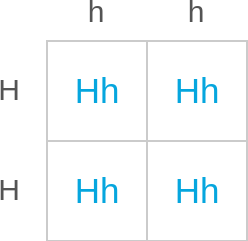

No.435
Question: What is the expected ratio of offspring that have horns to offspring that do not have horns? Choose the most likely ratio.
Context: In a group of cows, some individuals have horns and others do not. In this group, the gene for the horns trait has two alleles. The allele for having horns (h) is recessive to the allele for not having horns (H).
This Punnett square shows a cross between two cows.
Choices: ['3:1', '2:2', '1:3', '4:0', '0:4']
Answer: 4
Qwen: 3: 4:0
BLIP: Answer: 1:2:1 



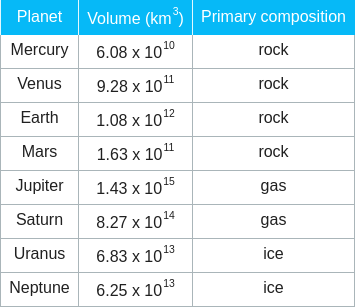

No.436
Question: Is the following statement about our solar system true or false?
The volume of Uranus is less than ten times the volume of Neptune.
Context: Use the data to answer the question below.
Choices: ['false', 'true']
Answer: 1
Qwen: 0
BLIP: Answer: 0 



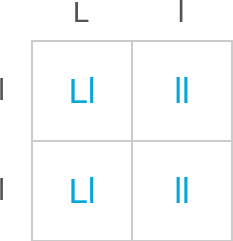

No.438
Question: What is the expected ratio of offspring with a reddish-brown coat to offspring with a black coat? Choose the most likely ratio.
Context: In a group of horses, some individuals have a black coat and others have a reddish-brown coat. In this group, the gene for the coat color trait has two alleles. The allele for a black coat (L) is dominant over the allele for a reddish-brown coat (l).
This Punnett square shows a cross between two horses.
Choices: ['1:3', '4:0', '3:1', '0:4', '2:2']
Answer: 4
Qwen: 2: 3:1
BLIP: Answer: 2:3 



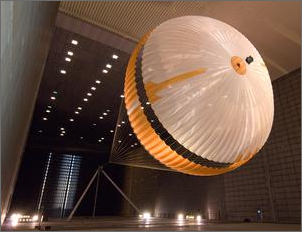

No.440
Question: Which of the following could Sebastian's test show?
Context: People can use the engineering-design process to develop solutions to problems. One step in the process is testing if a potential solution meets the requirements of the design.
The passage below describes how the engineering-design process was used to test a solution to a problem. Read the passage. Then answer the question below.

Sebastian was an aerospace engineer who was developing a parachute for a spacecraft that would land on Mars. He needed to add a vent at the center of the parachute so the spacecraft would land smoothly. However, the spacecraft would have to travel at a high speed before landing. If the vent was too big or too small, the parachute might swing wildly at this speed. The movement could damage the spacecraft.
So, to help decide how big the vent should be, Sebastian put a parachute with a 1 m vent in a wind tunnel. The wind tunnel made it seem like the parachute was moving at 200 km per h

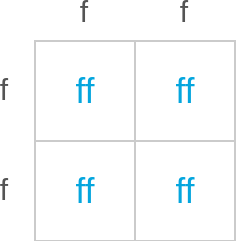

No.447
Question: What is the expected ratio of offspring with yellow fruit to offspring with red fruit? Choose the most likely ratio.
Context: In a group of tomato plants, some individuals have red fruit and others have yellow fruit. In this group, the gene for the fruit color trait has two alleles. The allele for red fruit (F) is dominant over the allele for yellow fruit (f).
This Punnett square shows a cross between two tomato plants.
Choices: ['0:4', '2:2', '1:3', '4:0', '3:1']
Answer: 3
Qwen: 4: 3:1
BLIP: Answer: 1:2:1 



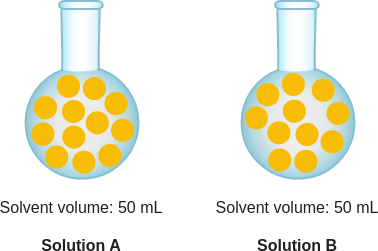

No.449
Question: Which solution has a higher concentration of yellow particles?
Context: The diagram below is a model of two solutions. Each yellow ball represents one particle of solute.
Choices: ['Solution A', 'neither; their concentrations are the same', 'Solution B']
Answer: 0
Qwen: 1: neither; their concentrations are the same
BLIP: Answer: 1 



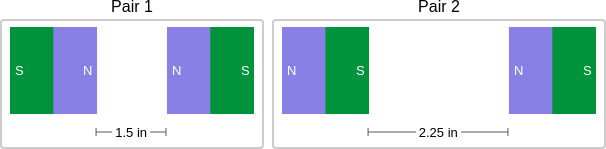

No.450
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material.
Choices: ['The magnitude of the magnetic force is smaller in Pair 2.', 'The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is smaller in Pair 1.']
Answer: 0
Qwen: 2: The magnitude of the magnetic force is smaller in Pair 1.
BLIP: Answer: 1 



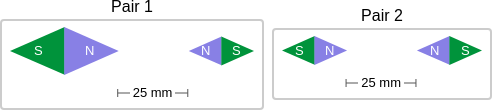

No.451
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes.
Choices: ['The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is smaller in Pair 1.', 'The magnitude of the magnetic force is smaller in Pair 2.']
Answer: 2
Qwen: 0
BLIP: Answer: 0 



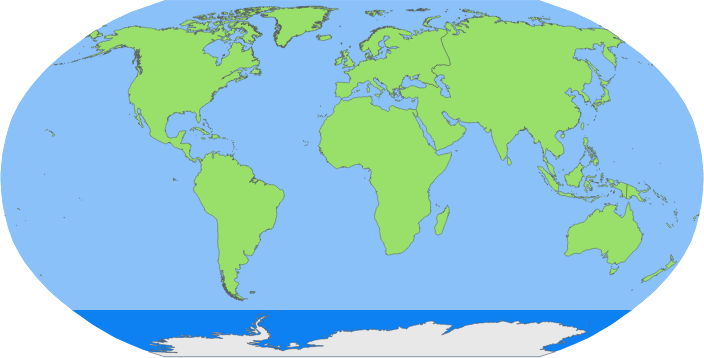

No.461
Question: Which ocean is highlighted?
Context: 
Choices: ['the Arctic Ocean', 'the Atlantic Ocean', 'the Indian Ocean', 'the Southern Ocean']
Answer: 3
Qwen: 0: the Arctic Ocean
BLIP: Answer: 0 



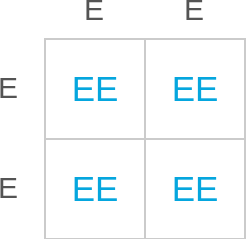

No.469
Question: What is the expected ratio of offspring with dumbo ears to offspring with normal ears? Choose the most likely ratio.
Context: This passage describes the ear type trait in rats:
Some rats have dumbo ears, which are larger and rounder than normal ears. Dumbo ears are also set on the sides of the rat's head instead of on the top. The word dumbo comes from the name of a cartoon elephant whose ears had a similar appearance.
In a group of rats, some individuals have normal ears and others have dumbo ears. In this group, the gene for the ear type trait has two alleles. The allele for normal ears (E) is dominant over the allele for dumbo ears (e).
This Punnett square shows a cross between two rats.
Choices: ['3:1', '0:4', '2:2', '4:0', '1:3']
Answer: 1
Qwen: 4: 1:3
BLIP: Answer: 2:2 



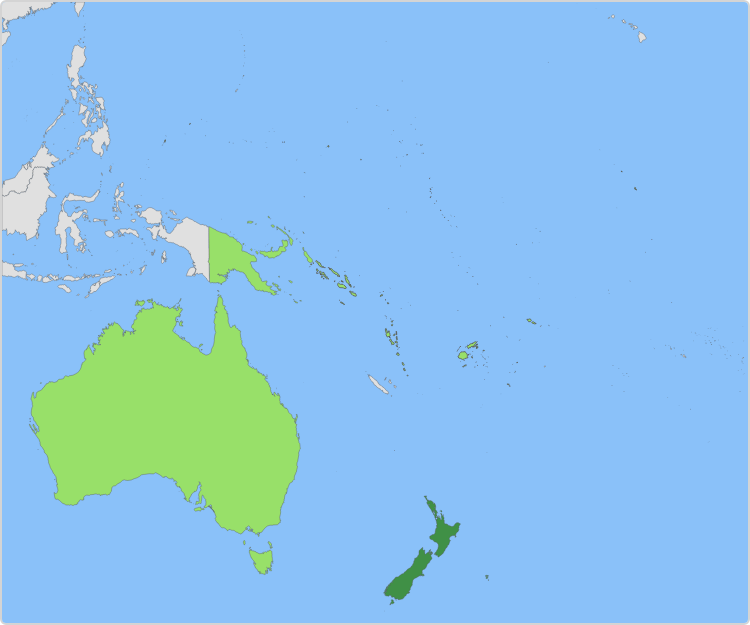

No.471
Question: Which country is highlighted?
Context: 
Choices: ['Papua New Guinea', 'New Zealand', 'Australia', 'Nauru']
Answer: 1
Qwen: 2: Australia
BLIP: Answer: 2 



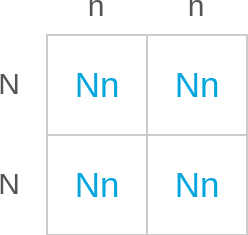

No.476
Question: What is the probability that a fruit fly produced by this cross will have normal wings?
Context: This passage describes the wing type trait in fruit flies:
Some scientists breed fruit flies to learn how traits are inherited. These scientists often use flies with vestigial wings, which are shorter and stubbier than normal wings. Fruit flies with vestigial wings cannot fly, so they are easier for scientists to handle and study.
In a group of fruit flies, some individuals have normal wings and others have vestigial wings. In this group, the gene for the wing type trait has two alleles. The allele for vestigial wings (n) is recessive to the allele for normal wings (N).
This Punnett square shows a cross between two fruit flies.
Choices: ['1/4', '3/4', '2/4', '0/4', '4/4']
Answer: 4
Qwen: 1
BLIP: Answer: 1 



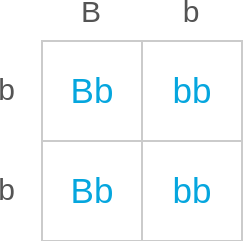

No.479
Question: What is the probability that a budgerigar parakeet produced by this cross will be heterozygous for the body feather color gene?
Context: In a group of budgerigar parakeets, some individuals have green body feathers and others have blue body feathers. In this group, the gene for the body feather color trait has two alleles. The allele for green body feathers (B) is dominant over the allele for blue body feathers (b).
This Punnett square shows a cross between two budgerigar parakeets.
Choices: ['4/4', '2/4', '3/4', '1/4', '0/4']
Answer: 1
Qwen: 2/4
BLIP: Answer: 3/4 



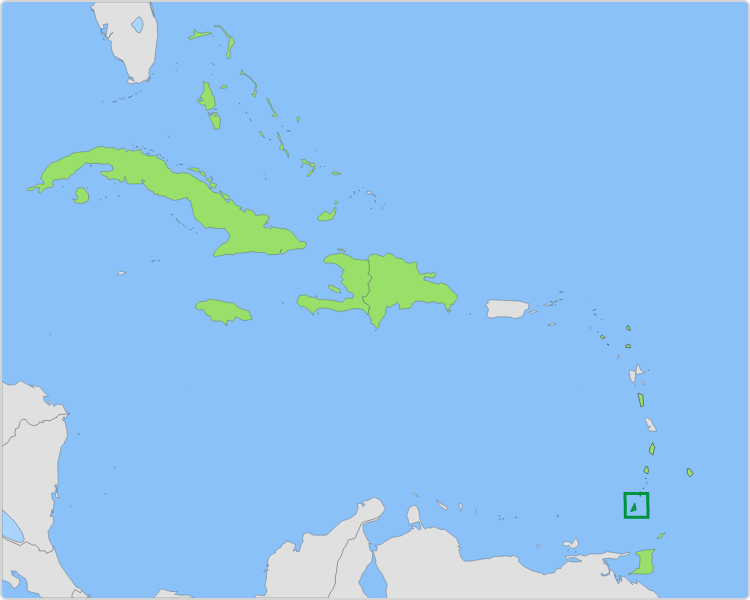

No.496
Question: Which country is highlighted?
Context: 
Choices: ['Grenada', 'Trinidad and Tobago', 'Saint Lucia', 'Saint Vincent and the Grenadines']
Answer: 0
Qwen: 3: Saint Vincent and the Grenadines
BLIP: Answer: 2 



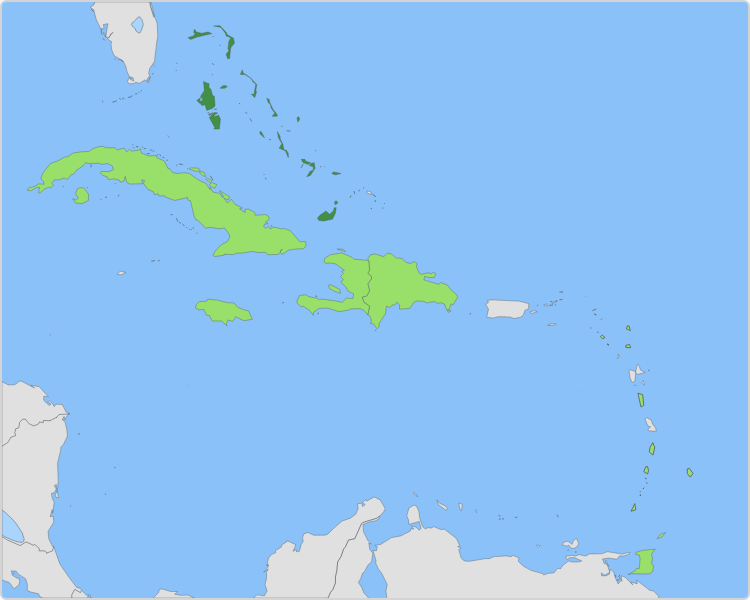

No.503
Question: Which country is highlighted?
Context: 
Choices: ['The Bahamas', 'Haiti', 'Cuba', 'Antigua and Barbuda']
Answer: 0
Qwen: 2: Cuba
BLIP: Answer: 1 



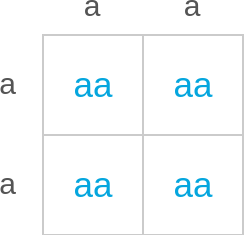

No.509
Question: What is the probability that a cow produced by this cross will have solid coloring?
Context: In a group of cows, some individuals have solid coloring and others have white spots. In this group, the gene for the coat pattern trait has two alleles. The allele for white spots (a) is recessive to the allele for solid coloring (A).
This Punnett square shows a cross between two cows.
Choices: ['4/4', '0/4', '3/4', '1/4', '2/4']
Answer: 1
Qwen: 2/4
BLIP: Answer: 3/4 



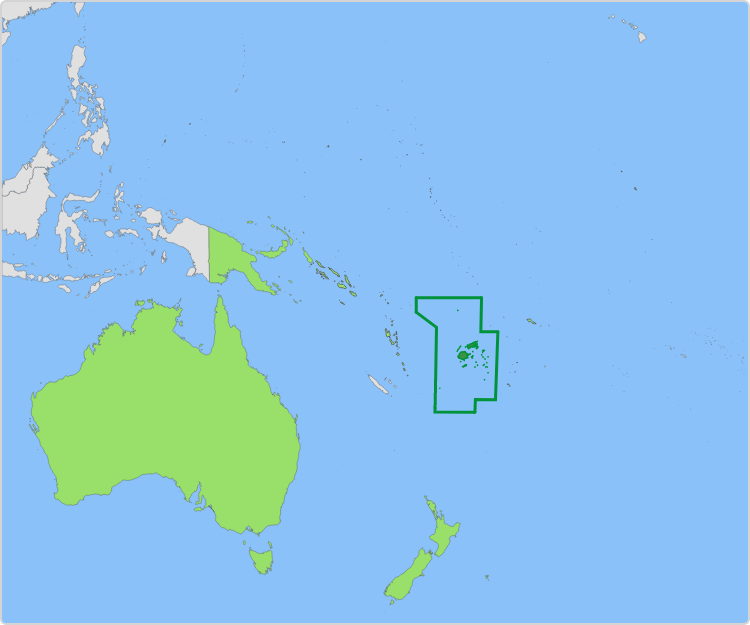

No.512
Question: Which country is highlighted?
Context: 
Choices: ['Fiji', 'Solomon Islands', 'Vanuatu', 'Tuvalu']
Answer: 0
Qwen: 3: Tuvalu
BLIP: Answer: 3 



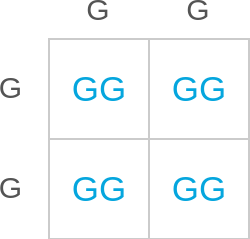

No.516
Question: What is the expected ratio of offspring with a yellow ground spot to offspring with a white ground spot? Choose the most likely ratio.
Context: This passage describes the ground spot color trait in watermelon plants:
Watermelon plants grow with their fruit resting on the ground. Over time, the bottom of each fruit develops a white or yellow spot called a ground spot. In some types of watermelon plants, the color of the ground spot is an inherited trait.
In a group of watermelon plants, some individuals have a yellow ground spot and others have a white ground spot. In this group, the gene for the ground spot color trait has two alleles. The allele for a white ground spot (g) is recessive to the allele for a yellow ground spot (G).
This Punnett square shows a cross between two watermelon plants.
Choices: ['4:0', '3:1', '1:3', '0:4', '2:2']
Answer: 0
Qwen: 3: 0:4
BLIP: Answer: 1:3 



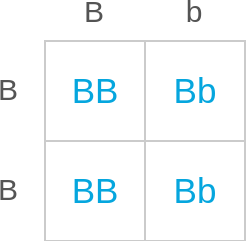

No.518
Question: What is the probability that a rat produced by this cross will have a dwarf body?
Context: In a group of rats, some individuals have a normal-sized body and others have a dwarf body. In this group, the gene for the body size trait has two alleles. The allele for a dwarf body (b) is recessive to the allele for a normal-sized body (B).
This Punnett square shows a cross between two rats.
Choices: ['3/4', '0/4', '2/4', '1/4', '4/4']
Answer: 1
Qwen: 3/4
BLIP: Answer: 3/4 



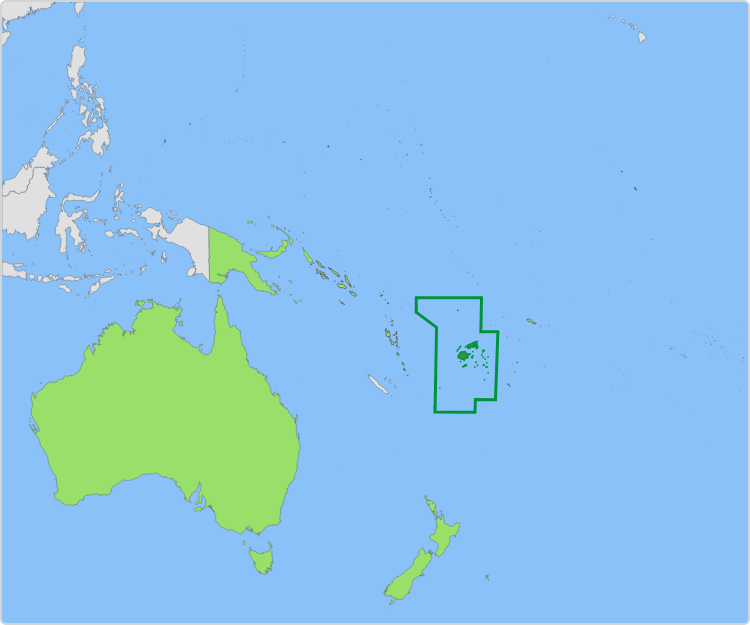

No.519
Question: Which country is highlighted?
Context: 
Choices: ['Tuvalu', 'Solomon Islands', 'Fiji', 'Vanuatu']
Answer: 2
Qwen: 0: Tuvalu
BLIP: Answer: 0 



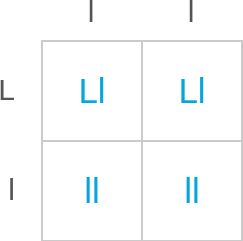

No.523
Question: What is the probability that a chicken produced by this cross will be heterozygous for the leg color gene?
Context: In a group of chickens, some individuals have white legs and others have yellow legs. In this group, the gene for the leg color trait has two alleles. The allele for yellow legs (l) is recessive to the allele for white legs (L).
This Punnett square shows a cross between two chickens.
Choices: ['2/4', '0/4', '4/4', '3/4', '1/4']
Answer: 0
Qwen: 2/4
BLIP: Answer: 3/4 



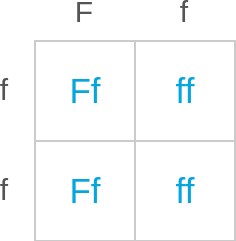

No.535
Question: What is the probability that a scarlet rosemallow plant produced by this cross will have white flowers?
Context: In a group of scarlet rosemallow plants, some individuals have red flowers and others have white flowers. In this group, the gene for the flower color trait has two alleles. The allele for white flowers (f) is recessive to the allele for red flowers (F).
This Punnett square shows a cross between two scarlet rosemallow plants.
Choices: ['4/4', '0/4', '3/4', '1/4', '2/4']
Answer: 4
Qwen: 3/4
BLIP: Answer: 3/4 



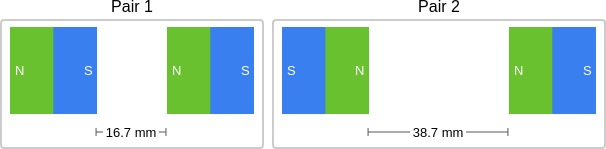

No.537
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material.
Choices: ['The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is smaller in Pair 2.', 'The magnitude of the magnetic force is smaller in Pair 1.']
Answer: 1
Qwen: 0
BLIP: Answer: 0 



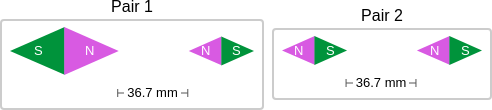

No.543
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes.
Choices: ['The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is greater in Pair 1.', 'The magnitude of the magnetic force is greater in Pair 2.']
Answer: 1
Qwen: 0
BLIP: Answer: 0 



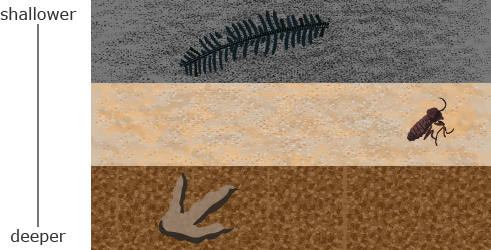

No.553
Question: Which of the following fossils is older? Select the more likely answer.
Context: This diagram shows fossils in an undisturbed sedimentary rock sequence.
Choices: ['fern', 'insect']
Answer: 1
Qwen: 0
BLIP: Answer: 0 



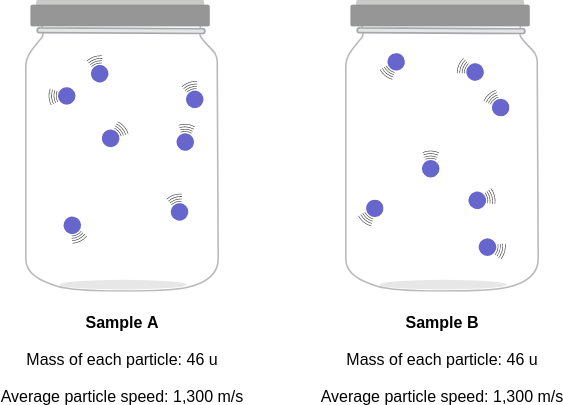

No.555
Question: Compare the average kinetic energies of the particles in each sample. Which sample has the higher temperature?
Context: The diagrams below show two pure samples of gas in identical closed, rigid containers. Each colored ball represents one gas particle. Both samples have the same number of particles.
Choices: ['sample A', 'neither; the samples have the same temperature', 'sample B']
Answer: 1
Qwen: 0
BLIP: Answer: 2 



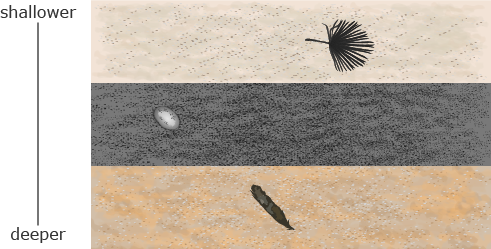

No.559
Question: Which of the following fossils is younger? Select the more likely answer.
Context: This diagram shows fossils in an undisturbed sedimentary rock sequence.
Choices: ['palm leaf', 'feather']
Answer: 0
Qwen: 1: feather
BLIP: Answer: 1 



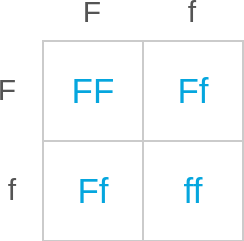

No.561
Question: What is the probability that a Syrian hamster produced by this cross will have wavy fur?
Context: In a group of Syrian hamsters, some individuals have straight fur and others have wavy fur. In this group, the gene for the fur texture trait has two alleles. The allele for straight fur (F) is dominant over the allele for wavy fur (f).
This Punnett square shows a cross between two Syrian hamsters.
Choices: ['3/4', '2/4', '4/4', '0/4', '1/4']
Answer: 4
Qwen: 1: 2/4
BLIP: Answer: 1 



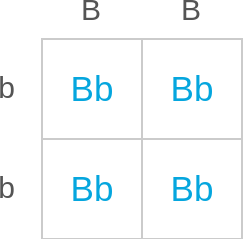

No.563
Question: What is the probability that a koi fish produced by this cross will have Bekko patterning?
Context: This passage describes the Bekko patterning trait in koi fish:
The Bekko pattern is a pattern of colors found on the bodies of some koi fish. A koi fish with Bekko patterning has black patches all over its body. A koi fish without Bekko patterning does not have these patches.
In a group of koi fish, some individuals have Bekko patterning and others do not. In this group, the gene for the Bekko patterning trait has two alleles. The allele for having Bekko patterning (B) is dominant over the allele for not having Bekko patterning (b).
This Punnett square shows a cross between two koi fish.
Choices: ['4/4', '3/4', '2/4', '0/4', '1/4']
Answer: 0
Qwen: 1: 3/4
BLIP: Answer: 4 



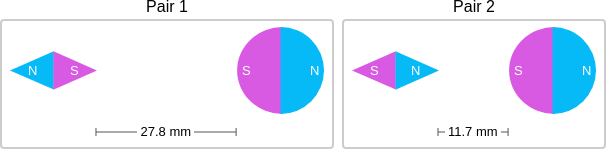

No.564
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different shapes.
Choices: ['The magnitude of the magnetic force is greater in Pair 2.', 'The magnitude of the magnetic force is the same in both pairs.', 'The magnitude of the magnetic force is greater in Pair 1.']
Answer: 0
Qwen: 2: The magnitude of the magnetic force is greater in Pair 1.
BLIP: Answer: 1 



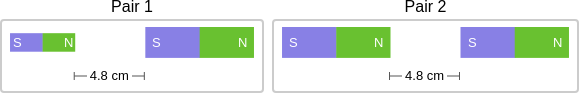

No.567
Question: Think about the magnetic force between the magnets in each pair. Which of the following statements is true?
Context: The images below show two pairs of magnets. The magnets in different pairs do not affect each other. All the magnets shown are made of the same material, but some of them are different sizes.
Choices: ['The magnitude of the magnetic force is smaller in Pair 2.', 'The magnitude of the magnetic force is smaller in Pair 1.', 'The magnitude of the magnetic force is the same in both pairs.']
Answer: 1
Qwen: 2: The magnitude of the magnetic force is the same in both pairs.
BLIP: Answer: 2 



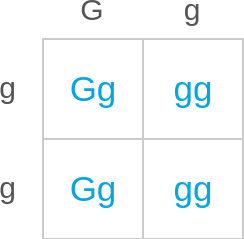

No.568
Question: What is the expected ratio of offspring with climbing growth to offspring with bush growth? Choose the most likely ratio.
Context: This passage describes the growth pattern trait in rose plants:
Climbing growth and bush growth are different growth patterns in rose plants. Rose plants with climbing growth have long, bendable stems that act like vines. These plants may grow upward to cover fences or walls. Rose plants with bush growth stay near the ground. These plants form low bushes or shrubs.
In a group of rose plants, some individuals have climbing growth and others have bush growth. In this group, the gene for the growth pattern trait has two alleles. The allele for bush growth (g) is recessive to the allele for climbing growth (G).
This Punnett square shows a cross between two rose plants.
Choices: ['2:2', '0:4', '1:3', '3:1', '4:0']
Answer: 0
Qwen: 3: 3:1
BLIP: Answer: 3:1 



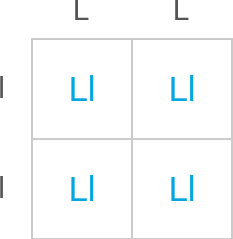

No.577
Question: What is the probability that a sheep produced by this cross will be homozygous dominant for the wool color gene?
Context: In a group of sheep, some individuals have white wool and others have black wool. In this group, the gene for the wool color trait has two alleles. The allele for white wool (L) is dominant over the allele for black wool (l).
This Punnett square shows a cross between two sheep.
Choices: ['2/4', '1/4', '0/4', '3/4', '4/4']
Answer: 2
Qwen: 1: 1/4
BLIP: Answer: 1 



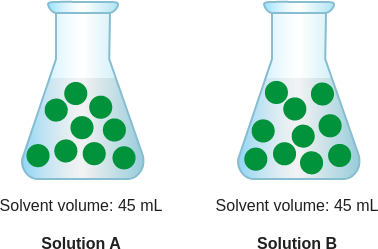

No.582
Question: Which solution has a higher concentration of green particles?
Context: The diagram below is a model of two solutions. Each green ball represents one particle of solute.
Choices: ['Solution B', 'neither; their concentrations are the same', 'Solution A']
Answer: 0
Qwen: 1: neither; their concentrations are the same
BLIP: Answer: 1 



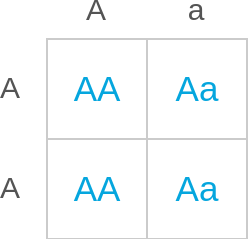

No.584
Question: What is the expected ratio of offspring with white spots to offspring with solid coloring? Choose the most likely ratio.
Context: In a group of cows, some individuals have solid coloring and others have white spots. In this group, the gene for the coat pattern trait has two alleles. The allele for white spots (a) is recessive to the allele for solid coloring (A).
This Punnett square shows a cross between two cows.
Choices: ['4:0', '3:1', '1:3', '2:2', '0:4']
Answer: 4
Qwen: 1: 3:1
BLIP: Answer: 3:1 



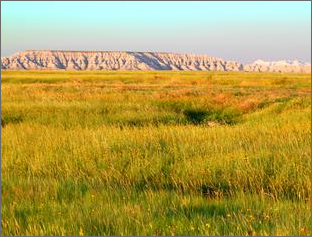

No.589
Question: Which statement describes the Buffalo Gap National Grassland ecosystem?
Context: Figure: Buffalo Gap National Grassland.
Buffalo Gap National Grassland is a prairie grassland ecosystem in southwestern South Dakota. It is home to the endangered black-footed ferret. This is the only kind of ferret that is native to North America.
Choices: ['It has heavy rain.', 'It has a medium amount of rain.', 'It has cold winters and cool summers.']
Answer: 1
Qwen: 2: It has cold winters and cool summers.
BLIP: Answer: 2 



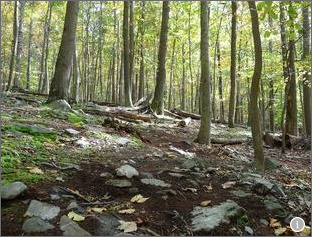

No.597
Question: Which statement describes the Catoctin Mountain Park ecosystem?
Context: Figure: Catoctin Mountain Park.
Catoctin Mountain Park is a temperate deciduous forest ecosystem in Maryland. Most of this forest was cut down for its wood in the early 1900s. But since the 1940s, conservation efforts have allowed the forest to return to much of this park.
Choices: ['It has many different types of trees.', 'It has soil that is rich in nutrients.']
Answer: 1
Qwen: 0
BLIP: Answer: 0 



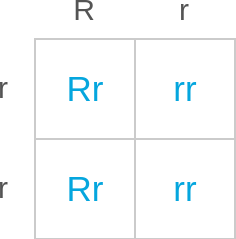

No.598
Question: What is the probability that a cockatiel produced by this cross will have bright orange cheeks?
Context: In a group of cockatiels, some individuals have bright orange cheeks and others have pale orange cheeks. In this group, the gene for the cheek color trait has two alleles. The allele for bright orange cheeks (R) is dominant over the allele for pale orange cheeks (r).
This Punnett square shows a cross between two cockatiels.
Choices: ['2/4', '1/4', '4/4', '0/4', '3/4']
Answer: 0
Qwen: 2/4
BLIP: Answer: 1/4 



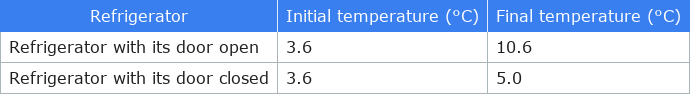

No.600
Question: During this time, thermal energy was transferred from () to ().
Context: Two identical refrigerators in a restaurant kitchen lost power. The door of one fridge was slightly open, and the door of the other fridge was closed. This table shows how the temperature of each refrigerator changed over 10minutes.
Choices: ['the surroundings . . . each refrigerator', 'each refrigerator . . . the surroundings']
Answer: 0
Qwen: 1: each refrigerator . . . the surroundings
BLIP: Answer: 1 



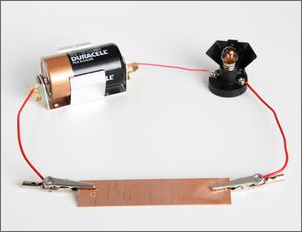

No.603
Question: Identify the question that Ashley's experiment can best answer.
Context: The passage below describes an experiment. Read the passage and then follow the instructions below.

Ashley built an electric circuit: she used wires to connect a battery to a light bulb, the light bulb to a small piece of copper, and the copper back to the battery. When the circuit was complete, the light turned on. Ashley observed the brightness of the light for five seconds. She then replaced the copper with a piece of iron of equal size and noted whether the light became brighter or dimmer. Ashley built three more of the same type of circuit. She repeated the tests with each circuit. Ashley recorded whether the circuits produced brighter light when the circuit included copper or when the circuit included iron.
Figure: a circuit with a battery, a light bulb, and a piece of copper.
Choices: ['Do circuits that include iron produce dimmer light than circuits that include copper?', 'Can light bulbs

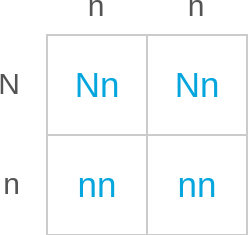

No.604
Question: What is the expected ratio of offspring with vestigial wings to offspring with normal wings? Choose the most likely ratio.
Context: This passage describes the wing type trait in fruit flies:
Some scientists breed fruit flies to learn how traits are inherited. These scientists often use flies with vestigial wings, which are shorter and stubbier than normal wings. Fruit flies with vestigial wings cannot fly, so they are easier for scientists to handle and study.
In a group of fruit flies, some individuals have normal wings and others have vestigial wings. In this group, the gene for the wing type trait has two alleles. The allele for vestigial wings (n) is recessive to the allele for normal wings (N).
This Punnett square shows a cross between two fruit flies.
Choices: ['1:3', '4:0', '3:1', '2:2', '0:4']
Answer: 3
Qwen: 1: 4:0
BLIP: Answer: 2:2 



In [ ]:
from IPython.display import display

for key, value in wrong_dict_all.items():
    sample = selected_samples[key]
    display(sample['image'])
    print(f"No.{key}")
    print(f"Question: {sample['question']}")
    print(f"Context: {sample['hint']}")
    print(f"Choices: {sample['choices']}")
    print(f"Answer: {sample['answer']}")
    print(f"{value[1]}")
    print(f"{value[2]}\n")


# Overall Qqalitatitive Results Comparision (Has not finished testing GPT-4o yet)

In [ ]:
from tqdm import tqdm
for idx, sample in enumerate(tqdm(selected_samples)):
    image = sample['image']
    question = sample['question']
    choices = sample['choices']
    hint = sample['hint']

    # Save the PIL image to a temporary file
    image_path = f'temp_image_{idx}.png'
    image.save(image_path)

100%|██████████| 607/607 [00:08<00:00, 71.83it/s]


In [ ]:
!pip install openai

In [ ]:
import base64
import requests


OPENAI_API_KEY = ""

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

gpt_results = []
for idx, sample in enumerate(tqdm(selected_samples)):
    image_path = f'temp_image_{idx}.png'
    question = sample['question']
    choices = sample['choices']
    hint = sample['hint']

    # Format choices with indices
    choices_formatted = '\n'.join([f"{i}: {choice}" for i, choice in enumerate(choices)])

    base64_image = encode_image(image_path)

    headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
    }

    payload = {
    "model": "gpt-4o",
    "messages": [
        {
        "role": "user",
        "content": [
            {
            "type": "text",
            "text": f"Question: {question}\nChoices:\n{choices_formatted}\nContext: {hint}\nAnswer:"
            },
            {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
            }
            }
        ]
        }
    ],
    "max_tokens": 100
    }
    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    res = response.json()['choices'][0]['message']['content']
    print(res)
    gpt_results.append(res)


# for idx, sample in enumerate(tqdm(selected_samples)):
#     image_path = f'temp_image_{idx}.png'
#     question = sample['question']
#     choices = sample['choices']
#     hint = sample['hint']

#     # Format choices with indices
#     choices_formatted = '\n'.join([f"{i}: {choice}" for i, choice in enumerate(choices)])
#     raw_image = Image.open(image_path)
#     query = f"Question: {question}\nChoices:\n{choices_formatted}\nContext: {hint}\nAnswer:  "
#     # query = f"What is this?"
#     model = model.cuda()
#     inputs = image_processor([raw_image], return_tensors="pt", image_aspect_ratio='anyres')
#     prompt = apply_prompt_template(query)
#     language_inputs = tokenizer([prompt], return_tensors="pt")
#     inputs.update(language_inputs)
#     inputs = {name: tensor.cuda() for name, tensor in inputs.items()}
#     generated_text = model.generate(**inputs, image_size=[raw_image.size],
#                             pad_token_id=tokenizer.pad_token_id,
#                             do_sample=False, max_new_tokens=768, top_p=None, num_beams=1,
#                             stopping_criteria = [EosListStoppingCriteria()],
#                             )

#     prediction = tokenizer.decode(generated_text[0], skip_special_tokens=False).split("<|end|>")[0]
#     print("==> prediction: ", prediction)
#     response.append(prediction)

  0%|          | 1/607 [00:02<23:02,  2.28s/it]

Jupiter's volume is \(1.43 \times 10^{15}\) km³.
Mars's volume is \(1.63 \times 10^{11}\) km³.

To determine if Jupiter's volume is more than 10,000 times the volume of Mars, we can calculate the ratio of their volumes:

\[ \frac{1.43 \times 10^{15}}{1.63 \times 10^{11}} = \frac{1.43}{


  0%|          | 2/607 [00:03<19:29,  1.93s/it]

Answer: 1: Do ping pong balls travel farther when launched from a 30° angle compared to a 45° angle?

The experiment described in the passage focuses on measuring and comparing the distances that ping pong balls travel when launched from two different angles, namely 30° and 45°. Therefore, the experiment can best answer the question of which angle results in a farther travel distance for the ping pong balls.


  0%|          | 3/607 [00:06<19:57,  1.98s/it]

The Punnett square shown indicates a cross between two koi fish that both have the genotype "ee" for eye color. Since "ee" produces black eyes and "E" is dominant over "e," all offspring from this cross will have the genotype "ee" and thus have black eyes.

There are no offspring with the genotype "E" (red eyes) in this cross. Therefore, the expected ratio of offspring with black eyes to offspring with red eyes is:

2: 4:0


  1%|          | 4/607 [00:07<17:37,  1.75s/it]

1: axial skeleton

The highlighted (blue) part in the picture includes the skull, vertebral column, and rib cage, which are components of the axial skeleton.


  1%|          | 5/607 [00:09<17:04,  1.70s/it]

0: New Hampshire


  1%|          | 6/607 [00:16<36:03,  3.60s/it]

Given the items Rebecca and Damon want from the table:

- Rebecca wants: a sandwich, oranges, broccoli, water
- Damon wants: a hot dog, tomatoes, almonds, water

To determine what Rebecca and Damon can trade to each get what they want, we need to identify an overlap between what one has and the other wants.

But since there are no details about what is currently in each of their lunch boxes, it's impossible to determine exactly what each one has to trade.

However, based


  1%|          | 7/607 [00:17<29:32,  2.95s/it]

1: It has a small amount of rain or snow.

The Gobi Desert is recognized for its cold desert climate, characterized by limited precipitation, including low amounts of rain or snow.


  1%|▏         | 8/607 [00:19<25:47,  2.58s/it]

Based on the provided context, Kenneth's test specifically involved putting a parachute with a 1 m vent in a wind tunnel, simulating a speed of 200 km per hour, to observe how much the parachute swung. Thus, the relevant findings of Kenneth's test would be:

**Choice 0: How steady a parachute with a 1 m vent was at 200 km per hour.**

The other choices do not apply because:
- Choice 1 involves a different speed (


  1%|▏         | 9/607 [00:21<23:44,  2.38s/it]

To determine the expected ratio of offspring with fuzzy leaves to offspring with smooth leaves, we need to analyze the Punnett square provided.

In the Punnett square:
- One parent contributes the alleles (L and l).
- The other parent contributes the alleles (L and l).

From the Punnett square:
- The top left cell contains LL (fuzzy leaves).
- The top right cell contains Ll (fuzzy leaves).
- The bottom left cell contains Ll (fuzzy leaves).
-


  2%|▏         | 10/607 [00:36<1:03:09,  6.35s/it]

To determine the probability that a rabbit produced by this cross will have black fur, we need to analyze the Punnett square provided.

The alleles for fur color are:
- \( F \): Dominant allele for black fur
- \( f \): Recessive allele for brown fur

The Punnett square shows a cross where both parents have the genotype \( FF \) (homozygous dominant for black fur). 

The Punnett square is as follows:

\[
\begin{


  2%|▏         | 11/607 [00:37<46:45,  4.71s/it]  

1: rock


  2%|▏         | 12/607 [00:39<38:50,  3.92s/it]

Solution B has a higher concentration of yellow particles.

Answer: 1: Solution B


  2%|▏         | 13/607 [00:41<31:53,  3.22s/it]

The organism in the same species as the black-headed gull (Chroicocephalus ridibundus) is:

Choice 0: Chroicocephalus ridibundus


  2%|▏         | 14/607 [00:43<28:21,  2.87s/it]

The Punnett square given shows the cross between two heterozygous cows (Aa).

The possible genetic combinations for the offspring are:
- Aa
- Aa
- Aa
- Aa

The probability that an offspring will be homozygous dominant (AA) is 0, as there are no AA combinations present in the Punnett square.

Therefore, the correct answer is:
0: 0/4


  2%|▏         | 15/607 [00:44<23:12,  2.35s/it]

0: Ambystoma mexicanum


  3%|▎         | 16/607 [00:46<22:11,  2.25s/it]

1: Does Maria's snowboard slide down a hill in less time when it has a layer of wax or when it does not have a layer of wax?


  3%|▎         | 17/607 [00:48<19:39,  2.00s/it]

The highlighted country is the Federated States of Micronesia.

Answer: 1: the Federated States of Micronesia


  3%|▎         | 18/607 [00:51<24:26,  2.49s/it]

To determine the best trade between Lacey and Martin, we need to identify the items they have to trade and the items they each want. According to the wants list, Lacey wants oranges, and Martin wants tomatoes. 

By considering the choices given:
1. Martin can trade his almonds for Lacey's tomatoes.
2. Lacey can trade her tomatoes for Martin's carrots.
3. Lacey can trade her tomatoes for Martin's broccoli.

The choice that aligns with both parties' wants is


  3%|▎         | 19/607 [00:54<23:19,  2.38s/it]

Answer: 2: if adding the blade guards made the drone fly poorly

Explanation: The passage describes how Dakota tested the impact of the blade guards on the drone's flight by adding lightweight metal guards to one drone and observing its flight performance. This directly corresponds to choice 2, as she was testing if the guards made the drone fly poorly. The test doesn't involve determining the weight of the drone with guards (choice 1) or checking the strength of the blade guards in a crash (choice


  3%|▎         | 20/607 [00:55<21:20,  2.18s/it]

The magnitude of the magnetic force depends on the distance between magnets and the strength of their magnetic fields, which is influenced by the size of the magnets. The images show that the distance between the magnets in both pairs is the same (3.45 cm), but the size of the magnets in Pair 1 is larger compared to Pair 2. Larger magnets typically have stronger magnetic fields.

Thus, the statement that is true is:

2: The magnitude of the magnetic force is smaller in Pair 2


  3%|▎         | 21/607 [01:10<57:37,  5.90s/it]

The correct answer is:

2: Solution A

Solution A has 5 blue particles, whereas Solution B has 3 blue particles, both in the same volume of solvent (25 mL). Therefore, Solution A has a higher concentration of blue particles.


  4%|▎         | 22/607 [01:11<44:10,  4.53s/it]

The question that Juan's experiment can best answer is:

0: Do more bacteria grow in liquid with cinnamon than in liquid without cinnamon?

The experiment specifically compares the amount of bacteria in the liquid with cinnamon to the amount of bacteria in the liquid without cinnamon.


  4%|▍         | 23/607 [01:16<43:56,  4.52s/it]

Based on the items Harper and Adriana want, Harper can trade her tomatoes for Adriana's broccoli.

So the correct choice is:
0: Harper can trade her tomatoes for Adriana's broccoli.


  4%|▍         | 24/607 [01:17<34:47,  3.58s/it]

0: ginkgo leaf

In an undisturbed sedimentary rock sequence, the older layers are found deeper in the sequence. Therefore, the ginkgo leaf, which is located in the shallower layer, is younger than the wood, which is located in the deeper layer.


  4%|▍         | 25/607 [01:21<34:33,  3.56s/it]

The given Punnett square shows a cross between two Channel catfish with genotypes BB and Bb. From the Punnett square, we can see that there are four possible genotypes for the offspring: BB, BB, Bb, and Bb.

- BB (Brown body): 2 
- Bb (Brown body, because the allele for brown body (B) is dominant): 2

Thus, all offspring will have the Brown body (100%).

Therefore, the expected ratio of offspring with a


  4%|▍         | 26/607 [01:23<30:23,  3.14s/it]

To determine if the volume of Earth is more than ten times the volume of Mercury, we need to compare their volumes.

Volume of Earth: \(1.08 \times 10^{12}\) km\(^3\)
Volume of Mercury: \(6.08 \times 10^{10}\) km\(^3\)

To find if Earth's volume is more than ten times the volume of Mercury, we multiply Mercury's volume by 10 and compare it to Earth's volume:

\(10


  4%|▍         | 27/607 [01:41<1:13:37,  7.62s/it]

Based on the diagram, the mammal tooth is found in the shallowest layer, whereas the wood is found in the middle layer. Sedimentary rock layers follow the principle of superposition, where the top layers are the youngest and the bottom layers are the oldest.

Therefore, the mammal tooth (found in the top layer) is younger than the wood (found in the middle layer).

Answer: 1: mammal tooth


  5%|▍         | 28/607 [01:42<56:28,  5.85s/it]  

Based on Omar's test, the relevant choice is:

1: how long it would take the sample fabric to dry after it absorbed one drop of water

Omar's test focuses on timing how long it takes for the fabric to dry completely after it has absorbed a drop of water. The provided image of the fabric with water droplets is not directly relevant to the choices but could indicate the water absorption properties of the fabric.


  5%|▍         | 29/607 [01:45<46:47,  4.86s/it]

To compare the average kinetic energies of the particles in each sample and determine which sample has the higher temperature, we can use the formula for kinetic energy per particle:

\[ KE = \frac{1}{2}mv^2 \]

Where:
- \( m \) is the mass of a particle
- \( v \) is the speed of a particle

Given information:
- Sample A has particles with mass \( 44 \, u \) and speed \( 1400 \, \


  5%|▍         | 30/607 [01:46<36:57,  3.84s/it]

The correct choice is 1: the fruit.

In the diagram, it is shown that the seeds are found within the fruit of the apple tree.


  5%|▌         | 31/607 [01:52<41:43,  4.35s/it]

The country highlighted in the image is the Dominican Republic.

Answer: 3: the Dominican Republic


  5%|▌         | 32/607 [01:56<41:02,  4.28s/it]

Answer: 4: 0:4

In the given Punnett square, all the offspring shown are homozygous recessive (ll). Since l is the allele for black wool and there are no dominant alleles (L) present, all offspring will have black wool. Therefore, the ratio of offspring with black wool to offspring with white wool is 4:0 (4 offspring with black wool and 0 offspring with white wool).


  5%|▌         | 33/607 [01:57<31:19,  3.27s/it]

3: Massachusetts


  6%|▌         | 34/607 [02:06<47:53,  5.01s/it]

Based on the information provided:

- Greg wants a sandwich, oranges, broccoli, and water.
- Ben wants a hot dog, tomatoes, almonds, and water.

From the choices provided:
- Greg wants broccoli, and Ben has broccoli.
- Ben wants tomatoes, and Greg has tomatoes.

So, the best trade that will allow Greg and Ben to get what they want would be:
1: Greg can trade his tomatoes for Ben's broccoli.

Therefore, the answer is:
1: Greg can trade


  6%|▌         | 35/607 [02:09<40:16,  4.22s/it]

Temperature is related to the average kinetic energy of particles in a gas. The average kinetic energy (K.E.) of a particle can be calculated using the formula:

\[ \text{K.E.} = \frac{1}{2} m v^2 \]

where \(m\) is the mass of the particle and \(v\) is the speed of the particle.

Given:
- For Sample A: 
  - Mass of each particle (\(m_A\)) is 28


  6%|▌         | 36/607 [02:10<32:35,  3.43s/it]

The question that Eric's experiment can best answer is:

1: Do more bacteria grow in liquid with cinnamon than in liquid without cinnamon?

Eric's experiment involves comparing the growth of bacteria in a nutrient-rich liquid with and without cinnamon under the same temperature conditions.


  6%|▌         | 37/607 [02:12<28:19,  2.98s/it]

Based on the wants of Marshall and Nick, the best trade would be:

2: Marshall can trade his tomatoes for Nick's broccoli.

Marshall wants broccoli and Nick wants tomatoes. This trade would allow both to get what they want.


  6%|▋         | 38/607 [02:14<24:29,  2.58s/it]

Based on the experiment described in the passage, the question that Irma's experiment can best answer is:

1: Are eggs more likely to float in fresh water or salty water?


  6%|▋         | 39/607 [02:18<29:20,  3.10s/it]

Lithium bromide is (1) a compound.


  7%|▋         | 40/607 [02:28<47:49,  5.06s/it]

Based on the experiment described in the passage, Sandeep tested the number of drops of pure water versus water mixed with hand soap that a penny could hold before the water spilled over. Thus, the question that Sandeep's experiment can best answer is:

1: Can pennies hold more drops of pure water or water mixed with hand soap?


  7%|▋         | 41/607 [02:29<37:59,  4.03s/it]

Answer: 0: rock


  7%|▋         | 42/607 [02:31<31:03,  3.30s/it]

The colony shown in the image is Delaware.

Correct answer: 3: Delaware


  7%|▋         | 43/607 [02:33<28:56,  3.08s/it]

Looking at the food web, the pine vole is the organism whose matter eventually moves to the parasol fungus. The pine vole is an organism that transfers matter directly to the parasol fungus.

None of the listed organisms (gray fox, bobcat, black racer, or beaver) directly move matter to the parasol fungus.

So, the correct answer is:
None of the provided choices (gray fox, bobcat, black racer, beaver) are correct. The organism that directs matter to


  7%|▋         | 44/607 [02:35<23:27,  2.50s/it]

The colony shown in dark green is Maryland. 

Answer: 1: Maryland


  7%|▋         | 45/607 [02:44<42:51,  4.58s/it]

To determine the probability that a cat produced by this cross will have long fur, we first need to look at the genotypes in the Punnett square.

The Punnett square shows the following genotypes:
- FF (short fur)
- Ff (short fur)
- Ff (short fur)
- ff (long fur)

Since long fur is a recessive trait (f), only the genotype ff results in long fur.

Out of the four possible combinations:
- 1 combination is ff


  8%|▊         | 46/607 [02:46<36:24,  3.89s/it]

The country highlighted in the map is Fiji.

Correct answer: 3: Fiji


  8%|▊         | 47/607 [03:06<1:20:10,  8.59s/it]

To determine if Jupiter's volume is more than 10,000 times the volume of Mars, we need to compare their volumes provided in the table.

Volume of Jupiter: \(1.43 \times 10^{15} \) km³
Volume of Mars: \(1.63 \times 10^{11} \) km³

Now, let's calculate the ratio of Jupiter's volume to Mars' volume:
\[
\text{Ratio} = \frac{1.43 \


  8%|▊         | 48/607 [03:07<1:00:12,  6.46s/it]

The country highlighted in the image is:
2: the Marshall Islands


  8%|▊         | 49/607 [03:09<45:41,  4.91s/it]  

The organism in the same species as the gray heron is:

0: Ardea cinerea


  8%|▊         | 50/607 [03:11<39:35,  4.26s/it]

Based on the items Gabe and Maddie want, the most suitable trade can be chosen from the given options. Gabe wants broccoli, which Maddie has, and Maddie wants tomatoes, which Gabe has. So:

The answer is:
3: Gabe can trade his tomatoes for Maddie's broccoli.


  8%|▊         | 51/607 [03:13<32:25,  3.50s/it]

The country highlighted in the image is Antigua and Barbuda.

Answer: 2: Antigua and Barbuda


  9%|▊         | 52/607 [03:15<26:57,  2.91s/it]

The Aden Ridge formed at a (1) divergent boundary.

Context: The passage states that the Somalian Plate and the Arabian Plate are moving away from each other, which is characteristic of a divergent boundary.


  9%|▊         | 53/607 [03:30<1:01:57,  6.71s/it]

The Punnett square shows the potential genotypes for the offspring from a cross between two pea plants, with alleles H (tall) and h (short). The possible genotypes shown in the Punnett square are:

- HH: Homozygous tall
- Hh: Heterozygous tall

From the Punnett square:
- HH: 2 squares
- Hh: 2 squares

So, there are a total of 4 squares, and 2 of


  9%|▉         | 54/607 [03:43<1:19:12,  8.59s/it]

Covering its eggs with its body increases the chances that the leech's eggs will hatch.

This is supported by the passage which states that water snails, which are predators of leech eggs, can easily eat eggs that are not covered by an adult leech but find it difficult to get to eggs that are covered by a leech. Thus, this protective behavior increases the survival rate of the eggs, thereby increasing the chances that they will hatch.


  9%|▉         | 55/607 [03:44<57:45,  6.28s/it]  

Choice 0: Felis nigripes


  9%|▉         | 56/607 [03:46<45:10,  4.92s/it]

The answer is:
1: mineral


  9%|▉         | 57/607 [03:49<40:04,  4.37s/it]

To determine which gas sample has the higher temperature, we need to compare the average kinetic energies of the particles in each sample. The average kinetic energy (\( KE \)) of a particle is given by the equation:

\[ KE = \frac{1}{2}mv^2 \]

where \( m \) is the mass of the particle and \( v \) is its average speed.

For sample A:
- Mass of each particle (\( m_A \)): 16 u
- Average


 10%|▉         | 58/607 [04:02<1:04:39,  7.07s/it]

The average kinetic energy of a gas particle is given by the equation:
\[ KE = \frac{1}{2} mv^2 \]
where \( m \) is the mass of the particle and \( v \) is the average speed of the particle.

For Sample A:
- Mass of each particle (\( m \)) = 46 u
- Average particle speed (\( v \)) = 620 m/s

For Sample B:
- Mass of each particle (\( m \


 10%|▉         | 59/607 [04:05<51:57,  5.69s/it]  

The question that Sandra's experiment can best answer is:

0: Do slugs eat more from tomato leaves or broccoli leaves?

Sandra's experiment involves measuring the amount of each leaf square that had been eaten by the slugs, which directly addresses the question of which type of leaf slugs prefer to eat more from.


 10%|▉         | 60/607 [04:09<47:29,  5.21s/it]

The Punnett square shows a cross between two cows, both of which are homozygous dominant (HH) for the horns trait. Since both cows have the genotype HH, all offspring will inherit one H allele from each parent, resulting in the genotype HH.

Because the allele for not having horns (H) is dominant over the allele for having horns (h), all offspring will have the genotype HH and will therefore not have horns. There will be no offspring with the genotype hh or Hh that


 10%|█         | 61/607 [04:13<43:48,  4.81s/it]

The ginkgo leaf fossil is younger. 

In an undisturbed sedimentary rock sequence, the layers at the top are younger than the layers below them. Since the ginkgo leaf is located in the uppermost layer, it is younger than the mammal tooth fossil, which is located in a deeper layer. Therefore, the correct choice is:

0: ginkgo leaf




 10%|█         | 62/607 [04:15<36:38,  4.03s/it]

To determine a fair trade between Justine and Bridgette that will allow them to get what they want, we need to identify any overlapping items they have and want:

- Justine's wanted items: a sandwich, oranges, broccoli, water.
- Bridgette's wanted items: a hot dog, tomatoes, almonds, water.

For the possible trades:
- Option 0: Justine can trade her tomatoes for Bridgette's carrots. But the items Justine wants and what Bridgette has do


 10%|█         | 63/607 [04:21<41:27,  4.57s/it]

The question that Manuel's experiment can best answer is:

1: Can pennies hold more drops of pure water or water mixed with hand soap?


 11%|█         | 64/607 [04:44<1:31:00, 10.06s/it]

1: neither; the samples have the same temperature

Explanation: Both samples A and B have gas particles with the same mass (28 u) and the same average particle speed (1,400 m/s). The average kinetic energy of the particles in a gas is directly related to their mass and speed. Since both samples have identical average particle speeds and particle masses, their average kinetic energies are the same, which means both have the same temperature.


 11%|█         | 65/607 [04:49<1:17:41,  8.60s/it]

To compare the average kinetic energies of the particles in each sample, we use the formula for kinetic energy:

\[ KE = \frac{1}{2}mv^2 \]

where \( m \) is the mass of the particle and \( v \) is the average particle speed. Let's calculate the average kinetic energy for each sample.

**Sample A:**
- Mass of each particle \( m_A = 46 \) u (atomic mass units)
- Average particle speed \( v_A =


 11%|█         | 66/607 [04:51<59:40,  6.62s/it]  

Answer: 2: The magnitude of the magnetic force is smaller in Pair 2.

Explanation: The magnetic force between two magnets is influenced by the size and shape of the magnets, as well as the distance between them. In this case, the pairs of magnets are placed the same distance apart (42.5 mm), but the sizes of the magnets are different. Pair 1 has smaller magnets compared to Pair 2, which means the magnetic force between the smaller magnets in Pair 1 would


 11%|█         | 67/607 [04:53<48:38,  5.40s/it]

To compare the average kinetic energies of the gas particles in the two samples, we need to use the formula for the kinetic energy of a particle in a gas:

\[ KE = \frac{1}{2} m v^2 \]

where \( m \) is the mass of the particle and \( v \) is its velocity.

For Sample A:
- Mass of each particle, \( m_A = 44 \, u \)
- Average particle speed, \( v_A = 840


 11%|█         | 68/607 [04:55<39:20,  4.38s/it]

Solution A has a higher concentration of blue particles compared to Solution B, as it contains more blue particles in the same volume of solvent.

Answer: 0: Solution A


 11%|█▏        | 69/607 [04:57<30:54,  3.45s/it]

The word "antebellum" means (3) before the war.


 12%|█▏        | 70/607 [04:58<24:53,  2.78s/it]

0: tendons


 12%|█▏        | 71/607 [05:02<28:22,  3.18s/it]

Answer: 1: It has soil that is frozen year-round.


 12%|█▏        | 72/607 [05:03<22:45,  2.55s/it]

The continent highlighted in the map is:

2: Australia


 12%|█▏        | 73/607 [06:01<2:50:47, 19.19s/it]

To compare the average kinetic energies of the particles in each sample, we can use the formula for the kinetic energy of a single particle:

\[ KE = \frac{1}{2}mv^2 \]

where \( m \) is the mass of the particle and \( v \) is its speed. Let's compute the kinetic energy for the particles in both samples:

For Sample A:
- Mass (\( m_A \)) = 17 u
- Speed (\( v_A \)) =


 12%|█▏        | 74/607 [06:03<2:05:32, 14.13s/it]

0: New Zealand
1: Tuvalu
2: Tonga
3: Samoa

Answer: 1: Tuvalu


 12%|█▏        | 75/607 [06:05<1:33:11, 10.51s/it]

The provided Punnett square shows a cross between two heterozygous individuals (Hh) for the Huntington's disease trait. When these individuals reproduce, their offspring can have the following genotypes:

- HH (1 out of 4)
- Hh (2 out of 4)
- hh (1 out of 4)

Since Huntington's disease is caused by the dominant allele (H), individuals with either HH or Hh genotype will have the disease, while individuals with the hh genotype


 13%|█▎        | 76/607 [06:07<1:08:59,  7.79s/it]

Based on the context provided and the description of Caleb's test of measuring how quickly water moves through the filter, the choice that best fits is:

0: whether the filter was clogged


 13%|█▎        | 77/607 [06:09<52:52,  5.99s/it]  

0: Massachusetts


 13%|█▎        | 78/607 [06:11<41:53,  4.75s/it]

1: insect

The diagram shows that the insect fossil is in a shallower layer of rock compared to the dinosaur footprint, indicating that the insect fossil is younger.


 13%|█▎        | 79/607 [06:12<32:59,  3.75s/it]

The correct answer is: 0: Solution A

Solution A has four purple particles in 20 mL of solvent, whereas Solution B has three purple particles in 20 mL of solvent. Therefore, Solution A has a higher concentration of purple particles.


 13%|█▎        | 80/607 [06:17<37:34,  4.28s/it]

The Punnett square shown suggests the cross between two cucumber plants with genotypes Ff and Ff. 

Let's analyze the Punnett square:

- The top rows have gametes F and f from one parent.
- The side columns have gametes F and f from the other parent.

Combining these, we get the following results in the four squares:
1. FF
2. Ff
3. Ff
4. ff

The homozygous dominant genotype (FF) for


 13%|█▎        | 81/607 [06:25<45:01,  5.14s/it]

To determine whether Jupiter's volume is more than 1,000 times that of Earth, we can compare their volumes based on the data provided:

- Volume of Earth: \(1.08 \times 10^{12} \text{ km}^3\)
- Volume of Jupiter: \(1.43 \times 10^{15} \text{ km}^3\)

Calculate \(1,000\) times the volume of Earth:
\[1,000 \times 1


 14%|█▎        | 82/607 [06:26<36:06,  4.13s/it]

The fossil that is younger is the fern.

In an undisturbed sedimentary rock sequence, the layers that are closer to the surface (shallow) are younger than those that are deeper. In the diagram, the fern is located in the shallowest layer of sediment, while the feather is in the deepest layer. Therefore, the fern is younger. 

The correct answer is:
0: fern


 14%|█▎        | 83/607 [06:28<28:17,  3.24s/it]

The question that Damon's experiment can best answer is:

0: Do muffins made with white flour have larger volumes than muffins made with whole wheat flour?


 14%|█▍        | 84/607 [06:29<24:08,  2.77s/it]

The Japan Trench formed at a (1: convergent) boundary.


 14%|█▍        | 85/607 [06:30<20:01,  2.30s/it]

The colony shown in dark green on the map is Massachusetts.

Answer: 1: Massachusetts


 14%|█▍        | 86/607 [06:33<19:33,  2.25s/it]

Based on the principle of superposition, in an undisturbed sedimentary rock sequence, the fossils that are found in the shallower layers are generally younger than those found in the deeper layers.

In the given diagram, the fossil in the shallower layer (topmost layer) is a feather, and the fossil found in the deeper layer is a crocodile egg.

Answer: 1 (feather)


 14%|█▍        | 87/607 [06:34<18:02,  2.08s/it]

In the Punnett square provided, each parent rat has the genotype Bb, where B represents the dominant normal-sized body allele, and b represents the recessive dwarf body allele.

The cross between two Bb rats produces the following possible genotypes for their offspring:

- 1 BB (normal-sized body)
- 2 Bb (normal-sized body, as B is dominant)
- 1 bb (dwarf body, as b is recessive)

Out of the 4 possible genotypes in the Pun


 14%|█▍        | 88/607 [06:36<16:55,  1.96s/it]

The pollinator picks up pollen from the anthers.

Answer: 1: the anthers


 15%|█▍        | 89/607 [06:40<22:25,  2.60s/it]

The highlighted country is Saint Vincent and the Grenadines.

Answer: 1: Saint Vincent and the Grenadines


 15%|█▍        | 90/607 [06:42<21:19,  2.47s/it]

The highlighted ocean is the Atlantic Ocean.

Answer: 2: the Atlantic Ocean


 15%|█▍        | 91/607 [06:45<20:58,  2.44s/it]

The Punnett square provided shows a cross between two rose plants that both have the genotype "rr," which means they both are homozygous recessive for the trait of having no thorns. 

All the offspring resulting from this cross will have the genotype "rr."

Since "rr" corresponds to the absence of thorns and is recessive, none of the offspring will have thorns.

Therefore, the expected ratio of offspring with thorns to offspring without thorns is 0:4.




 15%|█▌        | 92/607 [07:00<54:29,  6.35s/it]

To determine the probability that a Cepaea snail produced by this cross will be homozygous recessive (bb) for the shell banding gene, we need to analyze the Punnett square provided.

The Punnett square for the cross is as follows:

|    | b  | b  |
|----|----|----|
| B  | Bb | Bb |
| b  | bb | bb |

Each box in the Punnett square represents a possible genotype for the offspring. From the


 15%|█▌        | 93/607 [07:02<42:21,  4.94s/it]

To determine if the volume of Uranus is less than ten times the volume of Neptune, we can compare their volumes based on the given data.

Volume of Uranus: \( 6.83 \times 10^{13} \, \text{km}^3 \)
Volume of Neptune: \( 6.25 \times 10^{13} \, \text{km}^3 \)

Now, calculate ten times the volume of Neptune:
\[ 10 \times (


 15%|█▌        | 94/607 [07:04<34:52,  4.08s/it]

To determine if the statement "Jupiter's volume is more than ten times as large as Saturn's volume" is true or false, we will compare their volumes using the data provided.

Jupiter's volume: \(1.43 \times 10^{15}\) km³
Saturn's volume: \(8.27 \times 10^{14}\) km³

To see if Jupiter's volume is more than ten times Saturn's, we can calculate:
\[ \frac{1


 16%|█▌        | 95/607 [07:05<28:46,  3.37s/it]

The magnetic force between two magnets depends on the distance between them; the force increases as the distance decreases.

In Pair 1, the distance between the magnets is 21.1 mm.
In Pair 2, the distance between the magnets is 9.3 mm.

Since the distance between the magnets in Pair 2 is smaller than in Pair 1, the magnitude of the magnetic force is greater in Pair 2.

Therefore, the correct statement is:
2: The magnitude of the magnetic


 16%|█▌        | 96/607 [07:07<24:49,  2.92s/it]

From the Punnett square provided:

Each parent has the genotype Bb. The possible offspring genotypes are:

- BB: 0 
- Bb: 4
- bb: 0

Given this, all (4 out of 4) offspring will have the genotype Bb.

Since the gray body (B) is dominant over the black body (b), all Bb offspring will have a gray body.

Thus, the expected ratio of offspring with a gray body (Bb) to offspring with a


 16%|█▌        | 97/607 [07:09<22:37,  2.66s/it]

Potassium chloride is (0: a compound).


 16%|█▌        | 98/607 [07:16<33:24,  3.94s/it]

To determine the ratio of offspring with climbing growth to those with bush growth using the given Punnett square, we need to observe the genetic makeup of the offspring.

The Punnett square shows the following combinations of alleles:

- Gg (climbing growth)
- Gg (climbing growth)
- gg (bush growth)
- gg (bush growth)

Since the allele for climbing growth (G) is dominant over the allele for bush growth (g), any plant with at least one


 16%|█▋        | 99/607 [07:18<26:59,  3.19s/it]

The country highlighted in the image is Tuvalu.

Correct answer: 2: Tuvalu


 16%|█▋        | 100/607 [07:21<26:56,  3.19s/it]

To determine the probability that an American curl cat produced by this cross will have curled ears, we look at the Punnett square provided.

From the Punnett square, the possible genotypes of the offspring are:
- EE
- EE
- Ee
- Ee

Both EE and Ee genotypes will result in curled ears because the allele for curled ears (E) is dominant over the allele for straight ears (e).

Out of 4 possible genotypes (EE, EE, Ee, Ee


 17%|█▋        | 101/607 [07:22<22:05,  2.62s/it]

Given that Kiara wants oranges and Bernie wants tomatoes, the correct trade that would satisfy both of their desires is:

Choice 1: Kiara can trade her tomatoes for Bernie's broccoli.


 17%|█▋        | 102/607 [07:25<21:37,  2.57s/it]

The part of a flower that makes pollen is the male part.

So the correct choice is:
0: the male part


 17%|█▋        | 103/607 [07:26<19:30,  2.32s/it]

The highlighted continent is Antarctica.
Answer: 2


 17%|█▋        | 104/607 [07:40<47:27,  5.66s/it]

The Punnett square shows a cross between two rats, both of which have the genotype Bb (heterozygous for the body size trait). Based on the Punnett square, the potential genotypes of the offspring are:

- BB: 1 square
- Bb: 2 squares
- Bb: 1 square
- bb: 0 squares

Therefore, all offspring have at least one dominant allele (B), resulting in a normal-sized body. None of the offspring have the recess


 17%|█▋        | 105/607 [07:41<36:22,  4.35s/it]

The country highlighted is Papua New Guinea.

Correct Choice: 1: Papua New Guinea


 17%|█▋        | 106/607 [07:42<27:28,  3.29s/it]

Choice 2: Equus grevyi


 18%|█▊        | 107/607 [07:44<23:19,  2.80s/it]

1: Crocodylus acutus


 18%|█▊        | 108/607 [07:44<18:10,  2.19s/it]

2: Solution B


 18%|█▊        | 109/607 [07:45<15:24,  1.86s/it]

The highlighted continent is:

1: Africa


 18%|█▊        | 110/607 [07:46<13:13,  1.60s/it]

The correct choice is:

1: Strix nebulosa


 18%|█▊        | 111/607 [07:49<14:38,  1.77s/it]

Answer: The organism that contains matter that eventually moves to the parasol fungus is the pine vole.

Choice:
The correct choice is:
3: gray fox


 18%|█▊        | 112/607 [07:51<15:38,  1.90s/it]

The volume of Uranus is \(6.83 \times 10^{13}\) km³ and the volume of Neptune is \(6.25 \times 10^{13}\) km³.

To determine if the volume of Uranus is less than ten times the volume of Neptune, we can compare:

Uranus volume < 10 \times Neptune volume
\(6.83 \times 10^{13}\) < 10 \times \(6.25 \times 10


 19%|█▊        | 113/607 [07:53<15:05,  1.83s/it]

Based on their wants, Neil can trade his almonds for Darnel's oranges. 

- Darnel wants almonds.
- Neil wants oranges.

This aligns with choice 0. So the correct answer is:

0: Neil can trade his almonds for Darnel's oranges.


 19%|█▉        | 114/607 [07:55<16:51,  2.05s/it]

The magnitude of the magnetic force between two magnets depends on the material and their size, among other factors. Given that the material is the same for all magnets, the key factor here would be the size of the magnets.

In Pair 1, the magnets are larger compared to the magnets in Pair 2. Larger magnets generally have stronger magnetic fields, leading to a greater magnetic force between them.

Therefore, the correct statement is:
0: The magnitude of the magnetic force is greater in Pair 1


 19%|█▉        | 115/607 [07:59<22:22,  2.73s/it]

0: true

Based on the data provided in the table, Earth has the largest volume among the planets with a primary composition of rock.


 19%|█▉        | 116/607 [08:01<19:11,  2.35s/it]

The highlighted country is Jamaica.

Answer: 2: Jamaica


 19%|█▉        | 117/607 [08:02<15:38,  1.91s/it]

2: the Atlantic Ocean


 19%|█▉        | 118/607 [08:03<13:04,  1.60s/it]

Chloroform is (0: a compound).


 20%|█▉        | 119/607 [08:04<11:44,  1.44s/it]

The country highlighted is:

2: Trinidad and Tobago


 20%|█▉        | 120/607 [08:06<13:38,  1.68s/it]

The plainfin midshipman in this food web is the omnivore. The reason is that it is connected to both phytoplankton (a producer) and zooplankton (a consumer) via arrows, indicating that it consumes both plant matter and other organisms. 

So the answer is:
0: plainfin midshipman


 20%|█▉        | 121/607 [08:07<13:14,  1.64s/it]

Solution A has a higher concentration of green particles.

Solution A contains 4 green particles in 25 mL of solvent, while Solution B contains 3 green particles in 25 mL of solvent.


 20%|██        | 122/607 [08:09<11:54,  1.47s/it]

The highlighted continent is Europe (Choice 0).


 20%|██        | 123/607 [08:10<12:04,  1.50s/it]

Based on Gavin's experiment as described in the passage, the question that his experiment can best answer is:

1: Do steel nails take fewer days to rust in water compared to vinegar?


 20%|██        | 124/607 [08:11<11:12,  1.39s/it]

Based on the items that each wants, Madelyn wants broccoli, and Kylie wants tomatoes. Therefore, the best option for trade between them is:

0: Madelyn can trade her tomatoes for Kylie's broccoli.


 21%|██        | 125/607 [08:14<13:11,  1.64s/it]

The average kinetic energy of a gas particle is given by the equation:

\[ KE = \frac{1}{2}mv^2 \]

where \( m \) is the mass of the particle and \( v \) is the velocity of the particle.

For Sample A:
- Mass of each particle (\( m \)) = 32 u
- Velocity (\( v \)) = 670 m/s

\[ KE_A = \frac{1}{2} \times 32 \


 21%|██        | 126/607 [08:15<12:27,  1.55s/it]

The answer is:
0: rock


 21%|██        | 127/607 [08:17<13:31,  1.69s/it]

The Punnett square shows a cross between two cucumber plants with the genotype "ff" for both. This genotype represents plants with the smooth fruit phenotype because both alleles are recessive (f).

Since all possible offspring combinations are "ff", all the offspring will have smooth fruit.

So, the ratio of offspring with bumpy fruit to offspring with smooth fruit is 0:4.

Answer: 4: 0:4


 21%|██        | 128/607 [08:18<11:50,  1.48s/it]

The name of the colony shown is New Hampshire.

Answer: 1


 21%|██▏       | 129/607 [08:20<13:36,  1.71s/it]

To determine the sample with the higher average kinetic energy and thus the higher temperature, we need to compare the kinetic energy of the particles in both samples. The average kinetic energy \( K \) of the particles in a gas is given by 

\[ K = \frac{1}{2} m v^2 \]

where \( m \) is the mass of a particle and \( v \) is the average speed of the particles.

Given:
- Sample A: mass \( m_A = 


 21%|██▏       | 130/607 [08:21<12:46,  1.61s/it]

The organism in the same genus as the bald eagle (Haliaeetus leucocephalus) is:

2: Haliaeetus pelagicus


 22%|██▏       | 131/607 [08:23<13:41,  1.73s/it]

The palm leaf fossil is found in a shallower layer, whereas the crocodile egg fossil is found in a deeper layer. Since, in an undisturbed sedimentary rock sequence, deeper layers contain older fossils than shallower layers, the crocodile egg fossil is likely older.

Therefore, the more likely answer is:
0: crocodile egg


 22%|██▏       | 132/607 [08:25<12:48,  1.62s/it]

The name of the colony shown in dark green on the map is:
2: South Carolina


 22%|██▏       | 133/607 [08:26<12:04,  1.53s/it]

2: Solution A


 22%|██▏       | 134/607 [08:40<40:29,  5.14s/it]

Given the context of the problem, we can see that the gene for straight fur (F) is dominant over the gene for curly fur (f). The Punnett square provided shows a cross between two cats with the genotypes FF and Ff.

Let's analyze the Punnett square:

```
       F    f
   ------------
F |  FF   Ff
F |  FF   Ff
```

The possible genotypes for the offspring are:
- FF: 2 possibilities


 22%|██▏       | 135/607 [08:44<38:07,  4.85s/it]

The country highlighted in the map is:
3: the Federated States of Micronesia


 22%|██▏       | 136/607 [08:46<31:42,  4.04s/it]

To determine which sample has the higher temperature, we need to compare the average kinetic energies of the gas particles in the two samples. The average kinetic energy (\( \text{KE} \)) of a gas particle is given by the formula:

\[ \text{KE} = \frac{1}{2} m v^2 \]

where \( m \) is the mass of a particle and \( v \) is the average speed of the particles.

For Sample A:
- Mass of


 23%|██▎       | 137/607 [08:51<34:44,  4.43s/it]

The organism that is in the same species as the bald eagle, whose scientific name is Haliaeetus leucocephalus, is:

2: Haliaeetus leucocephalus


 23%|██▎       | 138/607 [08:59<42:11,  5.40s/it]

The correct answer is:

1: how long it would take the sample fabric to dry after it absorbed one drop of water

In the context provided, Manuel timed how long it took the fabric to dry after the water was absorbed. This directly corresponds to the requirement that the fabric should dry completely in less than five minutes.


 23%|██▎       | 139/607 [09:01<33:44,  4.32s/it]

Based on the information provided:
- Dustin wants a sandwich, oranges, broccoli, and water.
- Evelyn wants a hot dog, tomatoes, almonds, and water.

Since Evelyn wants tomatoes and Dustin has tomatoes, they can trade the tomatoes for one of the items Evelyn has that Dustin wants.

The correct answer according to the options is:
1: Evelyn can trade her almonds for Dustin's tomatoes.


 23%|██▎       | 140/607 [09:04<30:13,  3.88s/it]

To determine the best trade, we need to match the items that Colleen and Natalie want with those they might have to offer. Based on the table, Natalie wants tomatoes, and Colleen wants broccoli. 

Given this information, the best trade option for them would be:

2: Colleen can trade her tomatoes for Natalie's broccoli.

This way, each person gets the item they want.


 23%|██▎       | 141/607 [09:05<24:36,  3.17s/it]

The correct choice is:

2: Kurt can trade his tomatoes for Franco's broccoli.

This is because Kurt wants broccoli, which Franco has, and Franco wants tomatoes, which Kurt has. Trading these items will ensure that both Kurt and Franco get what they want.


 23%|██▎       | 142/607 [09:08<22:54,  2.96s/it]

The country highlighted in the image is Trinidad and Tobago.
So, the answer is:

3: Trinidad and Tobago


 24%|██▎       | 143/607 [09:09<20:11,  2.61s/it]

3: the Pacific Ocean


 24%|██▎       | 144/607 [09:12<19:02,  2.47s/it]

The magnitude of the magnetic force between magnets depends on the strength of the magnets, the distance between them, and the area of the interacting magnetic poles.

Considering the image provided:
- Pair 1 consists of a large horseshoe magnet and a smaller cone-shaped magnet.
- Pair 2 consists of a large horseshoe magnet and a larger cone-shaped magnet.
- The distance between the same pole types is the same in both pairs (2.75 inches). 

Since both pairs have the same distance between


 24%|██▍       | 145/607 [09:14<19:22,  2.52s/it]

To solve this question, we need to analyze the Punnett square provided.

The Punnett square shows a cross between two heterozygous budgerigars (Bb x Bb), where 'B' is the allele for green body feathers (dominant) and 'b' is the allele for blue body feathers (recessive).

The Punnett square reveals the following genotypes for the offspring:
- Bb (dominant allele "B" for green feathers)
- Bb
- Bb



 24%|██▍       | 146/607 [09:15<15:35,  2.03s/it]

1: pathos (emotion)


 24%|██▍       | 147/607 [09:20<21:17,  2.78s/it]

The concentration of a solution is determined by the number of solute particles per unit volume of the solvent. In the diagram provided:

- Solution A has 4 blue particles of solute in a solvent volume of 35 mL.
- Solution B has 6 blue particles of solute in a solvent volume of 35 mL.

Since Solution B has more solute particles in the same volume of solvent compared to Solution A, Solution B has a higher concentration of blue particles.

Answer: 


 24%|██▍       | 148/607 [09:21<17:57,  2.35s/it]

The highlighted continent is:
3: Antarctica


 25%|██▍       | 149/607 [09:30<33:36,  4.40s/it]

Maria wants broccoli and Jason wants tomatoes. 

Therefore, the best trade would be:
3: Maria can trade her tomatoes for Jason's broccoli.


 25%|██▍       | 150/607 [09:32<26:53,  3.53s/it]

1: Chroicocephalus novaehollandiae


 25%|██▍       | 151/607 [09:33<22:35,  2.97s/it]

Based on the diagram, Solution A has 5 green particles, while Solution B has 6 green particles. Since both solutions have the same solvent volume of 30 mL, Solution B contains a higher concentration of green particles.

Answer: 1: Solution B


 25%|██▌       | 152/607 [09:35<19:06,  2.52s/it]

Solution A has a higher concentration of blue particles because it contains 8 blue particles while Solution B contains 6 blue particles, and both solutions have the same solvent volume of 45 mL.

So the answer is:
0: Solution A


 25%|██▌       | 153/607 [09:36<16:34,  2.19s/it]

The scientific name of the organism shown is **Aequorea victoria**.
So the answer is: 
1: Aequorea victoria


 25%|██▌       | 154/607 [09:38<15:36,  2.07s/it]

To determine the probability that a rose plant produced by this cross will have dark yellow flowers, we need to analyze the Punnett square.

Let's break down the possibilities:
- The allele for dark yellow flowers is recessive (f) and the allele for light yellow flowers is dominant (F).
- A plant will have dark yellow flowers only if it has two recessive alleles (ff).

The Punnett square shows four possible outcomes:
- Ff (light yellow)
- Ff (light yellow


 26%|██▌       | 155/607 [09:39<13:29,  1.79s/it]

The answer is:

0: rock


 26%|██▌       | 156/607 [09:41<14:15,  1.90s/it]

The average kinetic energy of particles in a gas is given by the equation:

\[ KE_{avg} = \frac{1}{2}mv^2 \]

where \(m\) is the mass of each particle and \(v\) is the average speed of the particles.

For Sample A:
- Mass of each particle (\(m\)) = 30 u
- Average particle speed (\(v\)) = 1,400 m/s

For Sample B:
- Mass of


 26%|██▌       | 157/607 [09:43<13:46,  1.84s/it]

The fern fossil is younger because it is located in the shallower layer of the sedimentary rock sequence compared to the dinosaur footprint, which is in a deeper layer. Therefore, the correct answer is:

1: fern


 26%|██▌       | 158/607 [09:45<14:48,  1.98s/it]

To determine a trade where both Diane and Evelyn each get what they want, let's list the items they possess and want in a more structured way.

From the information provided:

**Diane's Lunch Wants:**
- a sandwich (not relevant for trade)
- oranges (relevant for trade)
- broccoli (relevant for trade)
- water (relevant for trade)

**Evelyn's Lunch Wants:**
- a hot dog (not relevant for trade)
- tomatoes (relevant for


 26%|██▌       | 159/607 [09:47<13:47,  1.85s/it]

Given the context provided, the suitable choice would be:

0: which design would have the greatest distance between the concert area and the road

Brandon tested each design by measuring the distance between the road and the concert area, which directly relates to determining which design has the greatest distance between the concert area and the road.


 26%|██▋       | 160/607 [09:49<14:15,  1.91s/it]

Lexi wants oranges, and Hugo wants tomatoes. 

Therefore, the correct trade would be for Hugo to trade his almonds for Lexi's tomatoes.

Answer: 2: Hugo can trade his almonds for Lexi's tomatoes.


 27%|██▋       | 161/607 [09:50<12:08,  1.63s/it]

The answer is:

0: rock


 27%|██▋       | 162/607 [09:53<15:04,  2.03s/it]

To determine the probability that the offspring will be heterozygous (Ee) for the xeroderma pigmentosum gene, we can look at the possible genotypes in the Punnett square.

The Punnett square provided shows the following genotypes:
- Ee
- Ee
- ee
- ee

In total, there are 4 possible outcomes from this cross. Out of these 4 outcomes, 2 are heterozygous (Ee).

The probability that an offspring will be


 27%|██▋       | 163/607 [09:54<13:54,  1.88s/it]

The magnitude of the magnetic force between two magnets depends on the distance between them. Specifically, the force is stronger when the magnets are closer together and weaker when they are farther apart.

In the given images:
- Pair 1 has a distance of 0.55 cm between the magnets.
- Pair 2 has a distance of 0.25 cm between the magnets.

Since the distance between the magnets in Pair 2 is smaller than in Pair 1, the magnetic force will be stronger in


 27%|██▋       | 164/607 [09:56<13:18,  1.80s/it]

The term that matches the picture is:

1: diffusion

The image illustrates the process of diffusion, where dye molecules spread from an area of high concentration (the initial drop of dye) to areas of lower concentration, resulting in an even distribution of color throughout the liquid.


 27%|██▋       | 165/607 [09:57<11:36,  1.58s/it]

0: the Pacific Ocean


 27%|██▋       | 166/607 [09:59<11:36,  1.58s/it]

To verify the statement, we need to compare the volumes of Jupiter and Mars.

Volume of Mars = \( 1.63 \times 10^{11} \) km\(^3\)
Volume of Jupiter = \( 1.43 \times 10^{15} \) km\(^3\)

We need to check if Jupiter's volume is more than 10,000 times the volume of Mars.

First, calculate 10,000 times the volume of Mars:
\( 


 28%|██▊       | 167/607 [10:01<12:22,  1.69s/it]

The average kinetic energy of particles in a gas is directly related to the temperature of the gas. Since both samples have the same number of particles of equal mass (44 u), we can compare their average kinetic energies by looking at the average particle speed.

- For Sample A, the average particle speed is 560 m/s.
- For Sample B, the average particle speed is 580 m/s.

Since Sample B has a higher average particle speed, the particles in Sample B have higher average kinetic energy


 28%|██▊       | 168/607 [10:03<13:25,  1.83s/it]

The concentration of particles in a solution is determined by the number of solute particles divided by the volume of the solvent. 

Solution A has 9 pink particles and a solvent volume of 40 mL.
Solution B has 12 pink particles and a solvent volume of 40 mL.

To find the concentration:

- Solution A: 9 particles / 40 mL = 0.225 particles/mL
- Solution B: 12 particles / 40 mL = 0


 28%|██▊       | 169/607 [10:05<14:26,  1.98s/it]

The temperature of a gas is directly related to the average kinetic energy of its particles. For a given mass \(m\) of particles, the kinetic energy \(E_k\) can be calculated using the formula:

\[ E_k = \frac{1}{2} m v^2 \]

where:
- \(m\) is the mass of the particle
- \(v\) is the average speed of the particles

Given:
- Mass of each particle in Sample A = 32


 28%|██▊       | 170/607 [10:13<26:24,  3.63s/it]

0: false

Based on the table, the largest planet in our solar system by volume is Jupiter, and its primary composition is gas, not ice.


 28%|██▊       | 171/607 [10:14<21:25,  2.95s/it]

The question that Denise's experiment can best answer is:

1: Are eggs more likely to float in fresh water or salty water?


 28%|██▊       | 172/607 [10:27<42:42,  5.89s/it]

To answer the question based on the wants of Dalton and Elise, let's analyze the table:

Dalton's lunch wants:
- A sandwich
- Oranges
- Broccoli
- Water

Elise's lunch wants:
- A hot dog
- Tomatoes
- Almonds
- Water

Dalton wants broccoli, which Elise has, and Elise wants tomatoes, which Dalton has. Therefore, they can each trade what they have for what they want.

Here are the choices again for reference:



 29%|██▊       | 173/607 [10:29<34:08,  4.72s/it]

To compare the average kinetic energies of the particles in each sample and determine which sample has the higher temperature, we can use the formula for kinetic energy:

\[ \text{Kinetic energy} = \frac{1}{2}mv^2 \]

where \( m \) is the mass of the particle and \( v \) is the speed of the particle.

Given:
- Sample A: mass of each particle \( m_A = 46 \, \text{u} \), average


 29%|██▊       | 174/607 [10:30<27:31,  3.81s/it]

The question that Edmond's experiment can best answer is:

0: Do steel nails take fewer days to rust in water compared to vinegar?

In the described experiment, Edmond tested whether steel nails rust faster in water or vinegar by observing the time it took for the nails to become completely covered in rust in each liquid.


 29%|██▉       | 175/607 [10:33<24:32,  3.41s/it]

The question that Dan's experiment can best answer is:

1: Can pennies hold more drops of pure water or water mixed with hand soap?

Dan's experiment directly compares the number of pure water drops to the number of water drops mixed with hand soap that can be added to a penny before spilling over.


 29%|██▉       | 176/607 [10:38<27:40,  3.85s/it]

The correct choice is:

0: rock

Siltstone is a type of sedimentary rock composed primarily of fine sediment grains. It does not have a fixed crystal structure and is not a pure substance, distinguishing it from a mineral.


 29%|██▉       | 177/607 [10:39<22:50,  3.19s/it]

The specific humidity level measured within the outlined area shown is 3 grams of water vapor per kilogram of air. The map indicates this level using the color corresponding to the value on the scale provided.


 29%|██▉       | 178/607 [10:41<19:34,  2.74s/it]

To determine the probability that a rainbow trout produced by this cross will have a greenish-brown body, let's analyze the Punnett square. 

The Punnett square in the image shows a cross between two parents who both have the genotype Bb for body color, where B (greenish-brown body) is dominant, and b (blue body) is recessive.

From the Punnett square, the possible genotypes of the offspring are:
- Bb (heterozygous) - Greenish


 29%|██▉       | 179/607 [10:43<16:54,  2.37s/it]

The country highlighted in the image is Fiji.

So, the correct answer is:

1: Fiji


 30%|██▉       | 180/607 [10:44<15:31,  2.18s/it]

To compare the average kinetic energies of the particles in each sample, we use the equation for the kinetic energy of a single particle, given by:

\[ KE = \frac{1}{2} m v^2 \]

where \( KE \) is the kinetic energy, \( m \) is the mass of the particle, and \( v \) is the velocity of the particle.

For Sample A:
- Mass of each particle (\( m_A \)) = 30 u
- Average


 30%|██▉       | 181/607 [10:49<20:10,  2.84s/it]

In the given Punnett square, both parents have the genotype EE. As a result, all their offspring will also have the genotype EE.

Since the allele for brown eyes (e) is recessive and does not appear in any of the offspring in the Punnett square, none of the offspring will have the e allele.

Thus, all the offspring will have red eyes (dominant E allele).

Probability of a fruit fly produced by this cross having brown eyes:
0%

So, the correct answer


 30%|██▉       | 182/607 [10:50<16:05,  2.27s/it]

The organism in the same genus as the green tree frog is:
0: Hyla japonica


 30%|███       | 183/607 [10:52<16:49,  2.38s/it]

To compare the average kinetic energies of the particles in each sample, we use the formula for the kinetic energy of a gas particle:

\[ \text{Kinetic Energy} = \frac{1}{2}mv^2 \]

where \( m \) is the mass of the particle and \( v \) is the speed of the particle.

Let's calculate the kinetic energy for each sample:

For Sample A:
- Mass (\( m_A \)) = 36 u
- Speed (\(


 30%|███       | 184/607 [10:54<15:23,  2.18s/it]

The correct answer is:
0: The magnitude of the magnetic force is smaller in Pair 1. 

In both pairs, the distance between the magnets is the same (15.7 mm), and they are made of the same material. However, in Pair 2, the magnets have larger areas in contact with each other's magnetic fields, which generally leads to a stronger magnetic force. Therefore, the magnetic force between the magnets is smaller in Pair 1 compared to Pair 2.


 30%|███       | 185/607 [10:56<14:55,  2.12s/it]

Choice 1: which side of the roof got more sun over one day

This is consistent with Eli's approach as he measured the amount of sunlight each side of the roof received over a single sunny day, which indicates the side that received the most sunlight over that period.


 31%|███       | 186/607 [10:58<14:32,  2.07s/it]

To compare the average kinetic energies and determine which sample has the higher temperature, we can use the formula for the average kinetic energy of a particle in a gas, which is given by:

\[ E_{\text{kinetic}} = \frac{1}{2} m v^2 \]

Where:
- \( m \) is the mass of a particle.
- \( v \) is the average speed of the particles.

Let's calculate the average kinetic energy for each sample.

For Sample A:



 31%|███       | 187/607 [10:59<13:08,  1.88s/it]

The highlighted country is New Zealand.

Answer: 2: New Zealand.


 31%|███       | 188/607 [11:05<21:25,  3.07s/it]

The average kinetic energy of gas particles is given by the formula:

\[ KE = \frac{1}{2}mv^2 \]

where \(m\) is the mass of a particle and \(v\) is the speed of the particle.

Given:
- Sample A: Mass of each particle = 44 u, Average particle speed = 1500 m/s
- Sample B: Mass of each particle = 30 u, Average particle speed = 1500 m/s

Let's


 31%|███       | 189/607 [11:07<18:12,  2.61s/it]

Solution B has a higher concentration of purple particles. The purple particles are more numerous in Solution B compared to Solution A, and since the solvent volumes are the same (35 mL), Solution B is more concentrated.

Answer: 0: Solution B


 31%|███▏      | 190/607 [11:09<17:42,  2.55s/it]

Based on the passage, Trent's test involved measuring the distance between the road and the concert area for each design. Therefore, his test could show:

2: which design would have the greatest distance between the concert area and the road

The other choices (if at least 20% of the park would be shaded by trees in each design, and which design would have the least traffic noise in the concert area) are not aspects that Trent tested based on the information provided.


 31%|███▏      | 191/607 [11:11<15:43,  2.27s/it]

The volume of Mars is \(1.63 \times 10^{11} \, \text{km}^3\) and the volume of Mercury is \(6.08 \times 10^{10} \, \text{km}^3\).

To determine if the volume of Mars is more than ten times the volume of Mercury, we can divide the volume of Mars by the volume of Mercury:

\[
\frac{1.63 \times 10^{11}}


 32%|███▏      | 192/607 [11:17<23:19,  3.37s/it]

The question that Greta's experiment can best answer is:

1. Do the insides of white boxes get hotter than the insides of black boxes when the boxes are left in the sun?


 32%|███▏      | 193/607 [11:19<20:08,  2.92s/it]

To compare the average kinetic energies of the particles in each sample, we can use the formula for the kinetic energy of a gas particle:

\[ KE_{\text{avg}} = \frac{1}{2} m v^2, \]

where \( m \) is the mass of the particle and \( v \) is the average particle speed.

Let's calculate the average kinetic energies for each sample:

For Sample A:
- Mass of each particle \( m_A = 46 \, \text


 32%|███▏      | 194/607 [11:20<17:33,  2.55s/it]

Titanium is (1: an elementary substance).


 32%|███▏      | 195/607 [11:22<15:42,  2.29s/it]

Based on the data provided:

- Volume of Mercury: \(6.08 \times 10^{10} \, \text{km}^3\)
- Volume of Saturn: \(8.27 \times 10^{14} \, \text{km}^3\)

To determine if Saturn's volume is more than 10,000 times as large as Mercury's volume, we calculate:

\[
10,000 \times 6.08 \times 10^{


 32%|███▏      | 196/607 [11:24<15:09,  2.21s/it]

To determine the expected ratio of offspring with sour fruit to offspring with sweet fruit from the given Punnett square, we will evaluate the combinations of alleles and their phenotypes.

1. FF - Sour fruit (homozygous dominant)
2. Ff - Sour fruit (heterozygous)
3. ff - Sweet fruit (homozygous recessive)

The Punnett square shows the following combinations for the offspring:
- 1 FF
- 2 Ff
- 


 32%|███▏      | 197/607 [11:25<13:06,  1.92s/it]

1: the Arctic Ocean


 33%|███▎      | 198/607 [11:27<12:19,  1.81s/it]

Answer: 0: mineral


 33%|███▎      | 199/607 [11:40<35:48,  5.27s/it]

To determine the probability that a rose plant produced by this cross will have single flowers, we can analyze the provided Punnett square.

The Punnett square shows the cross between two parents who are both heterozygous for the flower form trait (Ff). The possible genotypes for their offspring according to the Punnett square are:

- Ff
- Ff
- ff
- ff

There are 4 squares in the Punnett square, representing the 4 possible genotypes of


 33%|███▎      | 200/607 [11:41<27:16,  4.02s/it]

The Peru-Chile Trench formed at a (0: convergent) boundary.


 33%|███▎      | 201/607 [11:43<22:14,  3.29s/it]

The highlighted continent is Europe.

Answer: 2: Europe


 33%|███▎      | 202/607 [11:45<20:24,  3.02s/it]

Solution A has a higher concentration of purple particles, as it contains more purple particles in an equal volume of solvent compared to Solution B.

So the answer is:
0: Solution A


 33%|███▎      | 203/607 [11:47<17:05,  2.54s/it]

Solution B has a higher concentration of purple particles because it has more purple particles in the same solvent volume (35 mL) compared to Solution A. 

Answer: 1: Solution B


 34%|███▎      | 204/607 [11:48<14:56,  2.23s/it]

The country highlighted is the Dominican Republic.

Correct choice: 2: the Dominican Republic


 34%|███▍      | 205/607 [11:49<12:11,  1.82s/it]

Answer: 1: rock


 34%|███▍      | 206/607 [11:51<13:21,  2.00s/it]

To determine which sample has the higher temperature, we need to compare the average kinetic energies of the particles in each sample. The average kinetic energy (\(KE_{avg}\)) of a particle in a gas is given by the equation:

\[ KE_{avg} = \frac{1}{2} m v^2 \]

Where:
- \( m \) is the mass of the particle
- \( v \) is the average speed of the particle

Given in the diagrams:
- For


 34%|███▍      | 207/607 [11:53<12:52,  1.93s/it]

Based on the items that Bridgette and Maggie each want, we can determine an appropriate trade. 

- Bridgette wants oranges.
- Maggie wants tomatoes.

From the choices:
1. Bridgette can trade her tomatoes for Maggie's carrots.
2. Maggie can trade her almonds for Bridgette's tomatoes.
3. Maggie can trade her broccoli for Bridgette's oranges.

The correct answer is:
0: Bridgette can trade her tomatoes for Maggie's broccoli.
This way, Bridgette gets broccoli (


 34%|███▍      | 208/607 [11:54<11:02,  1.66s/it]

Answer: 0: Felis nigripes


 34%|███▍      | 209/607 [11:55<10:05,  1.52s/it]

The name of the colony shown is South Carolina.

Correct answer: 1: South Carolina


 35%|███▍      | 210/607 [11:57<10:25,  1.58s/it]

Answer: 1: Do ping pong balls travel farther when launched from a 30° angle compared to a 45° angle?

Based on the described experiment, Edwin and Porter measured the distances the ping pong balls traveled when launched from two different angles (30° and 45°). This is directly related to choice 1.


 35%|███▍      | 211/607 [12:10<32:19,  4.90s/it]

With the given context and temperature changes, the thermal energy dynamics can be summarized as follows:

The greenhouse with no solar panels experienced a larger temperature increase (from 4°C to 21°C). The absence of solar panels allowed it to absorb more solar energy, resulting in a higher final temperature.

The greenhouse with solar panels had a smaller temperature increase (from 4°C to 19°C). The solar panels likely captured some of the solar energy, preventing it from entering the greenhouse and thus resulting in


 35%|███▍      | 212/607 [12:14<31:01,  4.71s/it]

The statement that is true is:

2: The magnitude of the magnetic force is greater in Pair 1.

This is because the magnets in Pair 1 are larger than the magnets in Pair 2, and larger magnets generally have a stronger magnetic force due to the larger amount of magnetic material.


 35%|███▌      | 213/607 [12:16<25:05,  3.82s/it]

The concentration of a solution is determined by the number of solute particles per unit volume of solvent. 

In Solution A, there are 10 purple particles in 40 mL of solvent.
In Solution B, there are 8 purple particles in 40 mL of solvent.

To find the concentration, we can calculate the number of particles per mL:

Solution A: 10 particles / 40 mL = 0.25 particles/mL
Solution B: 8 particles /


 35%|███▌      | 214/607 [12:31<46:56,  7.17s/it]

The Punnett square shows the genetic cross between two Rr plants, where R is the dominant allele for having thorns and r is the recessive allele for not having thorns. 

The possible genotypes of the offspring are as follows:
- Rr (with thorns)
- Rr (with thorns)
- Rr (with thorns)
- Rr (with thorns)

Since all the offspring have at least one R allele, they will all display the dominant trait,


 35%|███▌      | 215/607 [12:36<43:46,  6.70s/it]

To determine which sample has the higher temperature, we can compare the average kinetic energies of the gas particles in each sample. The average kinetic energy (\( KE \)) of a particle is given by the formula:

\[ KE = \frac{1}{2} m v^2 \]

where \( m \) is the mass of the particle and \( v \) is the average speed of the particles.

For Sample A:
- Mass of each particle: \( m_A = 32 \,


 36%|███▌      | 216/607 [12:39<36:19,  5.58s/it]

The images show two pairs of magnets with a separation of 0.8 cm in each pair.

For this context, the magnitude of the magnetic force is determined by factors such as the strength of the magnets, the distance between them, and their size. Even though the separation distance is the same in both pairs (0.8 cm), the sizes and shapes of the magnets differ.

In Pair 1, the magnets are larger in size compared to those in Pair 2. Larger magnets generally have


 36%|███▌      | 217/607 [12:41<28:14,  4.34s/it]

The word "antebellum" means (2) before the war.


 36%|███▌      | 218/607 [12:44<25:07,  3.88s/it]

Given the context and the passage provided, Albert's test could show:

1: how steady a parachute with a 1 m vent was at 200 km per hour

Albert used a wind tunnel to simulate the parachute's behavior at 200 km per hour and observed how much it swung, which directly relates to the steadiness of the parachute at that speed. The other choices involve conditions that were not part of Albert's specific test setup.


 36%|███▌      | 219/607 [12:45<21:03,  3.26s/it]

The main persuasive appeal used in this ad is:

1: pathos (emotion)


 36%|███▌      | 220/607 [12:47<18:52,  2.93s/it]

Based on the images and the information provided, all the magnets are made of the same material, but some are different sizes. Pair 1 consists of two magnets of the same size, while Pair 2 consists of one larger magnet and one smaller magnet, both of which have a diameter of 2.3 cm.

The magnetic force between two magnets depends significantly on the strength of the magnets, which is influenced by factors such as size and material. Given that the material is the same for all magnets


 36%|███▋      | 221/607 [12:50<17:34,  2.73s/it]

Based on the items that Jeffrey and David each want, a suitable trade would align with the items available that each one needs. 

Jeffrey wants:
- a sandwich
- oranges
- broccoli
- water

David wants:
- a hot dog
- tomatoes
- almonds
- water

Among the choices provided, option 2 looks the most suitable:

2: Jeffrey can trade his tomatoes for David's broccoli.

This suggests that Jeffrey has tomatoes, which David wants, and David has broccoli


 37%|███▋      | 222/607 [12:52<16:32,  2.58s/it]

Given the context, the test Raymond conducted could show the following:

Choice 1: how steady a parachute with a 1 m vent was at 200 km per hour

Raymond's test was specifically designed to observe how the parachute behaved, particularly how much it swung, when exposed to wind conditions simulating a speed of 200 km per hour. This directly relates to assessing the stability of the parachute at that speed.


 37%|███▋      | 223/607 [12:55<17:34,  2.75s/it]

In the provided Punnett square, all possible offspring are "dd," which means they are homozygous recessive for the pod color trait. Given that the allele for yellow pods (d) is recessive to the allele for green pods (D), plants with the genotype "dd" will have yellow pods.

- Therefore, the probability that a pea plant produced by this cross will have green pods is 0/4 or 0%.

The correct answer is:
4: 0/4


 37%|███▋      | 224/607 [13:08<37:25,  5.86s/it]

In this Punnett square:

- F represents the allele for light yellow flowers.
- f represents the allele for dark yellow flowers.
- Light yellow flowers (F) are dominant over dark yellow flowers (f).

The cross in the Punnett square is Ff (light yellow) x Ff (light yellow).

The possible genotypes of the offspring are:
- FF: Light yellow flowers (quarter 1, top left)
- Ff: Light yellow flowers (quarter 2, top right


 37%|███▋      | 225/607 [13:14<37:06,  5.83s/it]

To determine what Quinn and Ling can trade to each get what they want, we need to see which items they want and what they might have to trade. According to the list:

Quinn wants:
- a sandwich
- oranges
- broccoli
- water

Ling wants:
- a hot dog
- tomatoes
- almonds
- water

So, for Quinn to get what he wants (broccoli), and Ling to get what she wants (tomatoes), they can trade these items with


 37%|███▋      | 226/607 [13:15<28:09,  4.43s/it]

Solute particles moved in both directions across the permeable membrane. But more solute particles moved across the membrane (1: to the right than to the left). When there was an equal concentration on both sides, the particles reached equilibrium.


 37%|███▋      | 227/607 [13:17<22:26,  3.54s/it]

The correct answer is:

1: which side of the roof got more sun over one day

David measured the amount of sunlight the sensors recorded on each side of the roof over one sunny summer day, which allows him to determine which side got more sun over that day.


 38%|███▊      | 228/607 [13:20<22:24,  3.55s/it]

Based on the given table, the smallest planet in terms of volume is Mercury with a volume of \(6.08 \times 10^{10}\) km\(^3\), and its primary composition is rock.

Therefore, the statement "The smallest planet is made mainly of rock" is true.

So, the correct choice is:
0: true


 38%|███▊      | 229/607 [13:33<39:23,  6.25s/it]

The concentration of pink particles is determined by the number of particles per volume of solvent. Each solution has 35 mL of solvent.

- Solution A has 7 pink particles in 35 mL.
- Solution B has 5 pink particles in 35 mL.

Since Solution A has more pink particles in the same volume of solvent compared to Solution B, Solution A has a higher concentration of pink particles.

Answer: 2: Solution A


 38%|███▊      | 230/607 [13:36<32:45,  5.21s/it]

The given Punnett square shows the cross between two tomato plants, each having the genotype Ll (heterozygous for regular leaves). The genotype combinations in the offspring are:

- LL
- Ll
- Ll
- ll

Regular leaves (L) are dominant to potato leaves (l). Therefore, for a tomato plant to have regular leaves, it must have at least one dominant allele (L). 

From the Punnett square, the genotypes are:
- 1 LL (regular


 38%|███▊      | 231/607 [13:37<25:13,  4.02s/it]

The highlighted continent is 2: Africa.


 38%|███▊      | 232/607 [13:38<19:44,  3.16s/it]

0: true

According to the data, the four largest planets by volume are Jupiter, Saturn, Uranus, and Neptune, which are composed mainly of gas or ice.


 38%|███▊      | 233/607 [13:45<26:19,  4.22s/it]

The Punnett square provided shows the genotypes that result from crossing two heterozygous (Ff) rock pocket mice. The genotypes are as follows:

- Ff
- Ff
- ff
- ff

To be homozygous dominant, an offspring must have the genotype FF. According to the Punnett square, there are no FF genotypes present among the offspring.

Thus, the probability that a rock pocket mouse produced by this cross will be homozygous dominant (


 39%|███▊      | 234/607 [13:46<21:31,  3.46s/it]

The solution with the higher concentration of green particles is Solution A.

Solution A has 5 green particles in a solvent volume of 30 mL, while Solution B has 4 green particles in the same solvent volume of 30 mL. Therefore, Solution A has a higher concentration of green particles.

Answer: 0: Solution A


 39%|███▊      | 235/607 [13:49<19:24,  3.13s/it]

Choice 0: Lissotriton vulgaris


 39%|███▉      | 236/607 [13:50<15:42,  2.54s/it]

The correct choice is:

0: Premnas biaculeatus


 39%|███▉      | 237/607 [13:51<13:41,  2.22s/it]

The country highlighted in the image is the Marshall Islands.

Correct choice: 3: the Marshall Islands


 39%|███▉      | 238/607 [13:53<12:28,  2.03s/it]

The country highlighted on the map is Tonga.

Answer: 1: Tonga


 39%|███▉      | 239/607 [13:54<10:50,  1.77s/it]

The question that Zane's experiment can best answer is:

0: Do steel nails take fewer days to rust in water compared to vinegar?


 40%|███▉      | 240/607 [13:56<11:57,  1.95s/it]

The Punnett square in the question shows a cross between two heterozygous rose plants (Ff) for the flower color trait, where F is the allele for light yellow (dominant) and f is the allele for dark yellow (recessive).

Here's the breakdown of the Punnett square:

- FF: Light yellow flowers
- Ff: Light yellow flowers
- Ff: Light yellow flowers
- ff: Dark yellow flowers

Out of the four possible outcomes:
-


 40%|███▉      | 241/607 [13:58<10:59,  1.80s/it]

Solution A has a higher concentration of pink particles because it contains more pink particles in the same volume of solvent compared to Solution B. Thus, the answer is:

0: Solution A


 40%|███▉      | 242/607 [14:02<14:22,  2.36s/it]

The most appropriate choice based on the provided context is:

1: whether the filter was clogged

The passage explains that Brandon checked the filter by measuring how quickly water moved through it in order to decide when the filter was too clogged and needed to be replaced. This measurement directly indicates whether the filter is clogged.


 40%|████      | 243/607 [14:03<12:15,  2.02s/it]

Answer: 1: analog device


 40%|████      | 244/607 [14:16<31:56,  5.28s/it]

To determine if Saturn's volume is more than 10,000 times as large as Mercury's volume, we need to compare their volumes.

Mercury's volume: \( 6.08 \times 10^{10} \) km³
Saturn's volume: \( 8.27 \times 10^{14} \) km³

First, calculate \( 10,000 \) times Mercury's volume:

\[ 10,000 \times 6.08 \times


 40%|████      | 245/607 [14:18<26:31,  4.40s/it]

To determine which sample has the higher temperature, we need to compare the average kinetic energies of the particles in each sample. The kinetic energy (\(KE\)) of a single particle can be given by the equation:

\[ KE = \frac{1}{2}mv^2 \]

where:
- \(m\) is the mass of a particle,
- \(v\) is the average speed of the particles.

Given the data:
- Both Sample A and Sample B have particles with the


 41%|████      | 246/607 [14:22<26:02,  4.33s/it]

The given Punnett square shows a cross between two pea plants, both with the genotype Hh for the stem height gene. 

The possible genotypes for their offspring are as follows:
- Hh (tall stem)
- Hh (tall stem)
- hh (short stem)
- hh (short stem)

There are four possible outcomes, where two of them (hh) are homozygous recessive for the stem height gene.

Therefore, the probability that a pea plant produced by


 41%|████      | 247/607 [14:25<22:48,  3.80s/it]

The Punnett square provided shows a cross between two snails, both of which have the genotype "bb", indicating that they are both homozygous recessive for the unbanded shell trait.

From the Punnett square:
- All possible offspring (bb) will also be homozygous recessive for the unbanded shell trait.

Therefore, the probability that a Cepaea snail produced by this cross will be homozygous recessive for the shell banding gene is 4 out of


 41%|████      | 248/607 [14:26<18:13,  3.04s/it]

The highlighted continent is 1: South America.


 41%|████      | 249/607 [14:30<20:05,  3.37s/it]

The question that Abigail's experiment can best answer is:

1: Are eggs more likely to float in fresh water or salty water?


 41%|████      | 250/607 [14:31<15:42,  2.64s/it]

0: rock


 41%|████▏     | 251/607 [14:33<14:54,  2.51s/it]

Based on the map, the colony highlighted in blue is Delaware. 

So, the correct answer is:
3: Delaware


 42%|████▏     | 252/607 [14:36<14:28,  2.45s/it]

To determine the expected ratio of cheetahs with a king coat (aa) to cheetahs with a spotted coat (AA or Aa), let's examine the Punnett square provided in the context:

```
       A      A
     ----------------
A |  AA   |  AA  |
A |  AA   |  AA  |
```

In the given Punnett square, both parents are homozygous dominant (AA) for the spotted coat trait. Therefore, all offspring will


 42%|████▏     | 253/607 [14:37<11:52,  2.01s/it]

1: the Arctic Ocean


 42%|████▏     | 254/607 [14:49<29:59,  5.10s/it]

The statement is true.

To determine if Jupiter's volume is more than ten times as large as Saturn's volume, we can compare their given volumes from the table.

Jupiter's volume: \(1.43 \times 10^{15}\) km\(^3\)
Saturn's volume: \(8.27 \times 10^{14}\) km\(^3\)

Now we compute the ratio:
\[
\frac{\text{Jupiter's volume}}{\text{


 42%|████▏     | 255/607 [14:51<23:58,  4.09s/it]

0: neither; the samples have the same temperature

Since both samples have the same average particle speed (1,500 m/s) and the same mass of each particle (46 u), their average kinetic energies are the same. Therefore, both samples have the same temperature.


 42%|████▏     | 256/607 [14:53<20:47,  3.55s/it]

The highlighted country is Fiji.

Correct answer: 3: Fiji


 42%|████▏     | 257/607 [14:55<18:51,  3.23s/it]

To determine the probability that a dachshund dog produced by this cross will have rough fur, we can examine the given Punnett square. 

In the Punnett square:
- Ff represents a heterozygous genotype, which exhibits rough fur because the allele for rough fur (F) is dominant.
- ff represents a homozygous genotype, which exhibits soft fur because it carries two recessive alleles.

The Punnett square in the question shows all possible outcomes of the cross:

\


 43%|████▎     | 258/607 [14:57<15:16,  2.63s/it]

The correct statement that describes the Eastern Siberian Taiga ecosystem is:

2: It has long, cold winters and short, cool summers.


 43%|████▎     | 259/607 [14:58<13:30,  2.33s/it]

Based on the passage and Helen's experiment, the correct choice is:

2: whether she added enough nutrients to help the bacteria produce 20% more insulin

Helen's test involved giving extra nutrients to some bacteria and then measuring the amount of insulin they produced compared to bacteria that did not receive extra nutrients. This would allow her to determine whether adding those nutrients resulted in a 20% increase in insulin production.


 43%|████▎     | 260/607 [15:00<13:05,  2.26s/it]

Answer: Sample A

The temperature of a gas is directly related to the average kinetic energy of its particles. The kinetic energy (\( KE \)) of a particle can be calculated using the formula:

\[ KE = \frac{1}{2} mv^2 \]

where \( m \) is the mass of the particle and \( v \) is its velocity.

Given:
- Sample A: 
  - Mass of each particle: 46 u
  - Average particle speed: 


 43%|████▎     | 261/607 [15:01<10:56,  1.90s/it]

Solution B has a higher concentration of green particles.


 43%|████▎     | 262/607 [15:09<21:12,  3.69s/it]

2: neither; the samples have the same temperature

Explanation: Since both samples have particles with the same mass (26 u) and the same average particle speed (1,100 m/s), the average kinetic energy of the particles in each sample will be the same. Therefore, the temperatures of the two samples are identical.


 43%|████▎     | 263/607 [15:10<16:12,  2.83s/it]

0: rock


 43%|████▎     | 264/607 [15:11<13:07,  2.30s/it]

The name of the colony shown in dark green on the map is New Jersey.

So the correct choice is:
0: New Jersey


 44%|████▎     | 265/607 [15:13<11:25,  2.00s/it]

The magnitude of the magnetic force between two magnets is inversely proportional to the square of the distance between them. Since Pair 2 is closer together than Pair 1, the force between Pair 2 will be greater.

Answer: 2: The magnitude of the magnetic force is greater in Pair 2.


 44%|████▍     | 266/607 [15:14<10:53,  1.92s/it]

The correct answer is:

0: It has many different types of organisms.


 44%|████▍     | 267/607 [15:16<11:21,  2.00s/it]

0: the Arctic Ocean


 44%|████▍     | 268/607 [15:18<10:57,  1.94s/it]

The rift valley along the Knipovich Ridge formed at a (2: divergent) boundary.


 44%|████▍     | 269/607 [15:21<11:55,  2.12s/it]

The Punnett square shows a cross between two rose plants, both of which are homozygous recessive for the allele for flower color (f/f). Since both parents have the genotype ff and ff (homozygous recessive), all their offspring will also have the genotype ff.

According to the Punnett square, all four squares (offspring) resulting from this cross have the genotype ff.

Therefore, the probability that a rose plant produced by this cross will be homozygous recessive


 44%|████▍     | 270/607 [15:22<11:09,  1.99s/it]

The name of the colony shown is:
0: South Carolina


 45%|████▍     | 271/607 [15:24<09:44,  1.74s/it]

The correct answer is:

1: mineral


 45%|████▍     | 272/607 [15:25<09:39,  1.73s/it]

2: Solution A

Solution A has more green particles (8) compared to Solution B (6) in the same solvent volume (40 mL), indicating a higher concentration of green particles in Solution A.


 45%|████▍     | 273/607 [15:28<10:45,  1.93s/it]

Based on the list of wanted items for both Roger and Sebastian, the best trade to satisfy their preferences would be:

1: Sebastian can trade his broccoli for Roger's oranges.

However, upon closer inspection, the correct option from the given choices is:

2: Roger can trade his tomatoes for Sebastian's broccoli.

This way, Roger gets the broccoli he wants, and Sebastian gets the tomatoes he wants.


 45%|████▌     | 274/607 [15:29<09:49,  1.77s/it]

The continent highlighted is 1: Australia.


 45%|████▌     | 275/607 [15:42<28:07,  5.08s/it]

The Punnett square provided shows the cross between two rats that are heterozygous for the ear trait (Ee).

The possible genotypes from this cross are:
- EE (Normal ears)
- Ee (Normal ears)
- Ee (Normal ears)
- ee (Dumbo ears)

This results in the following ratio of offspring:
- 1 EE : 2 Ee : 1 ee

The phenotypic ratio (physical appearance) would be:
- 3 Normal ears : 1


 45%|████▌     | 276/607 [15:43<21:09,  3.84s/it]

The highlighted ocean is the Indian Ocean.

Answer: 2: the Indian Ocean


 46%|████▌     | 277/607 [15:50<26:00,  4.73s/it]

Based on the given Punnett square, both parent guinea pigs have the genotype "ee," which means they both have red eyes, as the allele for red eyes (e) is recessive. 

When both parents are "ee" (homozygous recessive), all offspring will also be "ee," resulting in red eyes. Therefore, the ratio of offspring with red eyes to offspring with brown eyes is 4:0.

Thus, the most likely ratio is:
2: 4


 46%|████▌     | 278/607 [15:51<20:53,  3.81s/it]

The ocean highlighted is the Southern Ocean.

Answer: 2: the Southern Ocean


 46%|████▌     | 279/607 [15:53<18:02,  3.30s/it]

The organism that contains matter that was once part of the persimmon tree is the black bear (shown by the arrows from the persimmon tree to the black bear).

However, if the question asks for the matter that once was part of the persimmon tree but is now in the beaver, based on the shown food web, the other organisms to give evidence would be the black racer which gets matter from the black racer or the pine vole/parasol fungus passage.

Answer: 2


 46%|████▌     | 280/607 [15:55<14:37,  2.68s/it]

The concentrations of green particles in both solutions are the same, as both Solution A and Solution B each have 3 green particles in a solvent volume of 25 mL.

Answer: 2: neither; their concentrations are the same


 46%|████▋     | 281/607 [15:56<12:57,  2.38s/it]

Based on the items Jayden and Dave want, Jayden can trade his tomatoes for Dave's broccoli. 

So the correct choice is:
0: Jayden can trade his tomatoes for Dave's broccoli.


 46%|████▋     | 282/607 [15:58<12:12,  2.25s/it]

Based on the passage, Mabel's test was aimed at determining how much more electricity the new turbine, made from lightweight material, could produce compared to older turbines. Therefore, the correct choice is:

2: whether the new turbine could produce 10% more electricity


 47%|████▋     | 283/607 [16:00<11:20,  2.10s/it]

The magnitude of the magnetic force between two magnets is inversely proportional to the square of the distance between them. This means that when the distance between the magnets increases, the magnetic force decreases.

In Pair 1, the distance between the magnets is 4.85 cm.
In Pair 2, the distance between the magnets is 3.05 cm.

Since the distance between the magnets is smaller in Pair 2, the magnitude of the magnetic force is greater in Pair 2 compared to Pair


 47%|████▋     | 284/607 [16:02<11:29,  2.13s/it]

In the provided Punnett square, both parent goats have the genotype "Mm" which means they are both heterozygous for myotonia congenita.

From the Punnett square:

- MM (both alleles for myotonia congenita)
- Mm (one allele for myotonia congenita, one allele for not having it)
- mM (one allele for myotonia congenita, one allele for not having it)
- mm (both alleles for not having my


 47%|████▋     | 285/607 [16:03<09:54,  1.85s/it]

The organism in the same species as the great egret is:
0: Ardea alba


 47%|████▋     | 286/607 [16:06<10:55,  2.04s/it]

In the provided Punnett square, both parents are heterozygous (Ee) for the ear type trait. Each combination within the Punnett square results in the following genotypes for the offspring: 

- Ee (curled ears)
- Ee (curled ears)
- Ee (curled ears)
- Ee (curled ears)

Since the dominant allele (E) results in curled ears and all offspring are heterozygous (Ee) for curled ears, all offspring will have curled


 47%|████▋     | 287/607 [16:08<10:57,  2.06s/it]

To determine the expected ratio of offspring with a black coat to offspring with a spotted coat, we need to analyze the genotypes produced by the cross shown in the Punnett square.

The genotypes of the possible offspring are:
- AA
- Aa
- Aa
- aa

Here, the alleles for the spotted coat (A) are dominant, while the alleles for the black coat (a) are recessive. Therefore:
- AA and Aa will result in a spotted coat (


 47%|████▋     | 288/607 [16:10<11:00,  2.07s/it]

The magnitude of the magnetic force between magnets depends on the strength of the magnetic poles and the distance between them. Since the materials are the same and the distance (33.3 mm) between the magnetic poles is the same for both pairs, the key factor becomes the size and shape of the magnets.

In Pair 1, the magnets are small and in closer contact with each other, whereas in Pair 2, the magnets are larger which generally results in stronger magnetic forces because larger magnets typically have stronger


 48%|████▊     | 289/607 [16:12<09:56,  1.88s/it]

Solution B has a higher concentration of pink particles. This is because Solution B contains more pink particles (10 particles) compared to Solution A (8 particles) while both solutions have the same solvent volume of 40 mL.

So, the answer is:
2: Solution B


 48%|████▊     | 290/607 [16:13<09:19,  1.76s/it]

The term that matches the picture is:

0: heterotroph

Polar bears, like all animals, are consumers and cannot produce energy on their own. They obtain energy by consuming other organisms.


 48%|████▊     | 291/607 [16:15<09:12,  1.75s/it]

The correct answer is:
2: Goura cristata


 48%|████▊     | 292/607 [16:23<19:48,  3.77s/it]

Fanning eggs increases the chances that **1: the male's offspring will become adults**. 

By fanning his nest, a male stickleback helps bring fresh water and nutrients to the eggs, which enhances the hatching success rate. The more eggs that hatch, the greater the likelihood that more offspring will survive and become adults, thereby boosting the male's reproductive success.


 48%|████▊     | 293/607 [16:25<16:50,  3.22s/it]

To compare the average kinetic energies of the particles in each sample, we use the following kinetic energy formula:

\[ KE = \frac{1}{2} m v^2 \]

where \( m \) is the mass of the particle and \( v \) is the velocity.

Given:
- Sample A particles have a mass of 28 u and an average speed of 620 m/s.
- Sample B particles have a mass of 44 u and an average speed of 620 m/s


 48%|████▊     | 294/607 [16:27<14:28,  2.78s/it]

To determine which sample has a higher temperature, we should compare the average kinetic energies of the gas particles in each sample. The average kinetic energy (\( KE \)) of a gas particle is given by:

\[ KE = \frac{1}{2}mv^2 \]

where \( m \) is the mass of a particle and \( v \) is the average speed of the particles.

Given:

- Sample A:
  - Mass of each particle (\( m \)) = 28


 49%|████▊     | 295/607 [16:28<12:04,  2.32s/it]

The answer is:
2: Solution A

Solution A has more yellow particles (6 yellow particles) compared to Solution B (4 yellow particles), both in the same solvent volume of 30 mL. Therefore, Solution A has a higher concentration of yellow particles.


 49%|████▉     | 296/607 [16:31<13:14,  2.55s/it]

The answer is:
1: by dropping pollen on the pistil


 49%|████▉     | 297/607 [16:36<16:16,  3.15s/it]

The country highlighted in the map is the Marshall Islands.

Answer: 1: the Marshall Islands.


 49%|████▉     | 298/607 [16:40<17:23,  3.38s/it]

To compare the average kinetic energies of the particles in each sample and determine which sample has the higher temperature, we can use the formula for the average kinetic energy of a gas particle:

\[ \text{Average kinetic energy} = \frac{1}{2} m v^2 \]

where:
- \( m \) is the mass of each particle
- \( v \) is the average speed of the particles

Given:
- Mass of each particle in both samples \( = 32 \


 49%|████▉     | 299/607 [16:41<13:39,  2.66s/it]

0: false

The largest planet in our solar system according to the table is Jupiter, which has a primary composition of gas, not ice.


 49%|████▉     | 300/607 [17:00<38:24,  7.51s/it]

The magnitude of the magnetic force between two magnets depends on the strength of the magnets and the distance between them. Given that all the magnets are made of the same material (with presumably similar magnetic properties) and the distance between the magnets in both pairs is the same (3.5 inches), the size of the magnets will be the determining factor.

Pair 1 consists of larger magnets compared to the magnets in Pair 2. Larger magnets generally have a stronger magnetic field because they contain more magnetic material.




 50%|████▉     | 301/607 [17:01<28:44,  5.64s/it]

0: Solution A

Solution A has a higher concentration of pink particles. Both solutions have the same solvent volume (45 mL), but Solution A contains more pink particles (solute) than Solution B.


 50%|████▉     | 302/607 [17:03<22:49,  4.49s/it]

The solution that has a higher concentration of pink particles can be determined by comparing the number of pink particles (solute) in each solution to the volume of the solvent.

In the image:
- Solution A has 6 pink particles in 40 mL of solvent.
- Solution B has 5 pink particles in 40 mL of solvent.

Since Solution A has more pink particles for the same volume of solvent, Solution A has a higher concentration of pink particles.

Answer: 2: Solution A


 50%|████▉     | 303/607 [17:05<19:09,  3.78s/it]

The correct choice is:

0: Sasha can trade her tomatoes for Franco's broccoli.

Sasha wants broccoli, and Franco wants tomatoes, so trading these items will make both of them happy.


 50%|█████     | 304/607 [17:07<16:29,  3.26s/it]

To compare the average kinetic energies of the particles in each sample and determine which sample has the higher temperature, we can use the formula for the average kinetic energy of a particle in a gas:
\[ 
KE_{avg} = \frac{1}{2}mv^2 
\]
where \( m \) is the mass of a particle and \( v \) is the average speed of the particles.

Given:
- For sample A:
  - Mass of each particle: \( 40 \


 50%|█████     | 305/607 [17:08<13:11,  2.62s/it]

3: Europe


 50%|█████     | 306/607 [17:10<11:56,  2.38s/it]

The correct choice is:
1: how steady a parachute with a 1 m vent was at 200 km per hour

Explanation:
Gordon put a parachute with a 1 m vent in a wind tunnel to simulate a 200 km per hour speed and observed how much the parachute swung. This corresponds directly with evaluating how steady the parachute is (i.e., its stability) at that speed. The other choices either relate to damage assessment or a different speed, which were not


 51%|█████     | 307/607 [17:14<14:42,  2.94s/it]

In the given Punnett square, both of the parent sheep have the genotype "ff," which stands for woolly fleece. 

Since "ff" produces woolly fleece and all the boxes in the Punnett square show "ff," all the offspring will inherit the "ff" genotype.

Therefore, the expected ratio of offspring with a woolly fleece to offspring with a hairy fleece is 4:0.

The most likely ratio from the provided choices is:
1: 4:0


 51%|█████     | 308/607 [17:16<13:09,  2.64s/it]

The images show two pairs of magnets, each pair consisting of a rectangular magnet and a curved magnet, placed at equal distances.

Magnetic force between two magnets depends on the strength (related to the material and size) of the magnets and the distance between them. In both pairs, the material and distance are the same, but the size of the magnets differs.

In Pair 1, the rectangular magnet and the curved magnet have larger dimensions compared to those in Pair 2. This suggests the magnets in


 51%|█████     | 309/607 [17:17<10:47,  2.17s/it]

The question that Chase's experiment can best answer is:

1: Do cardinals visit feeders containing sunflower seeds more often than feeders containing flax seeds?


 51%|█████     | 310/607 [17:19<10:00,  2.02s/it]

According to the Punnett square shown, the possible genotypes for the offspring are:

- FF (smooth fruit)
- Ff (smooth fruit)
- FF (smooth fruit)
- Ff (smooth fruit)

Since smooth fruit (F) is dominant over fuzzy fruit (f), any offspring with at least one F allele will have smooth fruit. Therefore, the offspring genotypes from the cross will be:

- 2 FF (both FF are smooth)
- 2 Ff (both F


 51%|█████     | 311/607 [17:21<10:37,  2.15s/it]

Based on the passage, Cooper's test involves measuring the distance between the road and the concert area for each design. Therefore, Cooper's test could show:

2: which design would have the greatest distance between the concert area and the road.


 51%|█████▏    | 312/607 [17:22<09:09,  1.86s/it]

The highlighted ocean is the Indian Ocean.

Answer: 0: the Indian Ocean


 52%|█████▏    | 313/607 [17:27<12:33,  2.56s/it]

The statement that best describes the Yasuni National Park ecosystem is:

1: It has many different types of organisms.


 52%|█████▏    | 314/607 [17:29<11:45,  2.41s/it]

The country highlighted is Nauru.
Hence, the correct answer is:
3: Nauru


 52%|█████▏    | 315/607 [17:31<11:58,  2.46s/it]

Given the context of Helen's experiment and the procedures she followed, the question that her experiment can best answer is:

1: Does linen fabric turn darker than cotton fabric when soaked in a mixture of black dye and water?

Helen's experiment directly compared the darkness of the dyed linen fabric squares to the cotton fabric squares after soaking them for the same amount of time. Therefore, her experiment is designed to determine the difference in darkness between the two types of fabric when exposed to the same dyeing conditions.


 52%|█████▏    | 316/607 [17:33<10:46,  2.22s/it]

The given Punnett square shows a cross between two American curl cats, both of which are homozygous dominant for the ear type gene (EE).

According to the Punnett square:

- Top row: EE crossed with EE yields EE offspring (first square) and EE offspring (second square).
- Bottom row: EE crossed with EE yields EE offspring (third square) and EE offspring (fourth square).

Thus, all four offspring are EE (homozygous dominant) for the ear type


 52%|█████▏    | 317/607 [17:35<10:14,  2.12s/it]

The name of the colony shown is South Carolina.

Answer: 1


 52%|█████▏    | 318/607 [17:36<09:06,  1.89s/it]

The highlighted continent is South America.
Therefore, the correct choice is:

2: South America


 53%|█████▎    | 319/607 [17:40<11:39,  2.43s/it]

The correct answer is:

0: rock

Marble is a metamorphic rock primarily composed of calcite and formed through the metamorphism of limestone.


 53%|█████▎    | 320/607 [17:41<09:16,  1.94s/it]

The answer is:
1: rock


 53%|█████▎    | 321/607 [17:43<09:36,  2.02s/it]

2: Solution A

Solution A has a higher concentration of pink particles. Both solutions have the same volume of solvent (25 mL), but Solution A has more pink particles (5) compared to Solution B (4), indicating a higher concentration of solute in Solution A.


 53%|█████▎    | 322/607 [17:44<09:03,  1.91s/it]

Given the information about what Turner and Mona each want and the potential trades they can make, we need to find an option that results in both Turner and Mona getting something they want.

- Turner wants: a sandwich, oranges, broccoli, water.
- Mona wants: a hot dog, tomatoes, almonds, water.

From the choices:
0: Turner can trade his tomatoes for Mona's broccoli.
1: Turner can trade his tomatoes for Mona's carrots.
2: Mona can trade her broccoli for Turn


 53%|█████▎    | 323/607 [17:45<07:52,  1.66s/it]

1: Castor fiber


 53%|█████▎    | 324/607 [17:56<20:34,  4.36s/it]

The question that Dakota's experiment can best answer is:

0: Do more tomato seedlings grow when they are planted in soil with fertilizer compared to soil without fertilizer?

The experiment involved adding fertilizer to three pots while maintaining control conditions (same temperature, light, and humidity) for all six pots, and then comparing the number of seedlings that grew in the pots with and without fertilizer.


 54%|█████▎    | 325/607 [18:02<22:44,  4.84s/it]

The question that Harry's experiment can best answer is:

0: Do steel nails take fewer days to rust in water compared to vinegar?

The experiment compares the number of days it takes for nails to rust in water versus vinegar using the same volume of liquid.


 54%|█████▎    | 326/607 [18:04<19:01,  4.06s/it]

The statement is false.

According to the data provided, the four smallest planets in our solar system by volume are:
1. Mercury (6.08 x 10^10 km³) 
2. Mars (1.63 x 10^11 km³)
3. Venus (9.28 x 10^11 km³)
4. Earth (1.08 x 10^12 km³)

All four of these planets have a primary composition of rock, not gas. Therefore


 54%|█████▍    | 327/607 [18:07<17:02,  3.65s/it]

The provided Punnett square cross is between two rats with the genotype Bb (heterozygous for normal-sized body). 

Let's analyze the Punnett square:

- The first box shows the genotype Bb.
- The second box shows the genotype Bb.
- The third box shows the genotype Bb.
- The fourth box shows the genotype Bb.

All offspring exhibit the Bb genotype, leading to a phenotype of normal-sized body since B (normal-sized body) is dominant over b (dwarf body).

Thus


 54%|█████▍    | 328/607 [18:11<16:59,  3.65s/it]

To determine the best trade between Clara and Harry, we need to find an item that Clara has that Harry wants, and an item that Harry has that Clara wants.

From the list:
- Clara wants: a sandwich, oranges, broccoli, water
- Harry wants: a hot dog, tomatoes, almonds, water

Since the question's choices involve items that might not be visible from the list alone, examining the choices and matching them with their wants:

1. Clara can trade her tomatoes for Harry


 54%|█████▍    | 329/607 [18:12<13:44,  2.97s/it]

The name of the colony shown in dark green on the map is New York.

So the correct choice is:
3: New York


 54%|█████▍    | 330/607 [18:15<13:26,  2.91s/it]

The colony shown in dark green on the map is Virginia. 

Answer: 1: Virginia


 55%|█████▍    | 331/607 [18:25<22:55,  4.98s/it]

The correct choice related to Charlotte's test is:

1: if adding the blade guards made the drone fly poorly

In the context provided, Charlotte added lightweight metal guards to the drone to observe how well it would fly with the guards. She wanted to ensure that the additional weight of the guards would not negatively impact the drone's flying capabilities.


 55%|█████▍    | 332/607 [18:30<23:36,  5.15s/it]

The magnitude of the magnetic force between two magnets depends on the distance between them. The closer the magnets are, the greater the magnetic force between them.

Given the distances:
- Pair 1: 4.75 inches apart
- Pair 2: 2.25 inches apart

Since Pair 2 has the magnets closer together, the magnetic force between the magnets in Pair 2 will be greater.

Therefore, the correct statement is:
0: The magnitude of the magnetic force is greater in


 55%|█████▍    | 333/607 [18:32<19:06,  4.18s/it]

Given the wants of Reid and Daniel, they should make a trade that allows both to get something they want.

- Reid wants: a sandwich, oranges, broccoli, water
- Daniel wants: a hot dog, tomatoes, almonds, water

Reid has oranges, and Daniel has tomatoes. Daniel wants tomatoes, and Reid wants broccoli. Therefore the optimal trade would be:

Choice 2: Reid can trade his tomatoes for Daniel's broccoli.

This trade would ensure that both get an item they desire


 55%|█████▌    | 334/607 [18:33<14:51,  3.27s/it]

Based on Jeanette's experimental setup and her observations, the question that her experiment can best answer is:

0: Do circuits that include iron produce dimmer light than circuits that include copper?


 55%|█████▌    | 335/607 [18:35<12:02,  2.66s/it]

The name of the colony shown is Maryland.

Answer: 0: Maryland


 55%|█████▌    | 336/607 [18:37<11:35,  2.57s/it]

The name of the colony shown is:
1: New York


 56%|█████▌    | 337/607 [18:38<09:41,  2.15s/it]

The name of the colony shown in dark green on the map is New Hampshire.

So the correct choice is:
3: New Hampshire


 56%|█████▌    | 338/607 [18:40<09:54,  2.21s/it]

1: true

Based on the volume data provided in the table, the planets Jupiter, Saturn, Uranus, and Neptune have volumes larger than Earth's. Out of the 8 planets, 4 are larger than Earth, which accounts for half. Therefore, the statement "Three-quarters of the planets are larger than Earth" is true.


 56%|█████▌    | 339/607 [18:42<08:24,  1.88s/it]

The answer is:
0: rock


 56%|█████▌    | 340/607 [18:43<08:05,  1.82s/it]

The Punnett square shows the result of a cross between two Syrian hamsters with genotypes Ff (both heterozygous for fur length). Here's the breakdown of the possible offspring genotypes:

- FF: 0 (0 out of 4)
- Ff: 2 (2 out of 4)
- ff: 2 (2 out of 4)

To determine the probability of the offspring having long fur, we need to look at the genotypes that result in long


 56%|█████▌    | 341/607 [18:45<07:25,  1.68s/it]

The highlighted country is Saint Vincent and the Grenadines.
Answer: 0: Saint Vincent and the Grenadines


 56%|█████▋    | 342/607 [18:46<07:08,  1.62s/it]

Based on the provided context, Rose created a computer model and used it to calculate how much more electricity the new turbine could produce compared to older turbines. Thus, the correct choice is:

1: whether the new turbine could produce 10% more electricity


 57%|█████▋    | 343/607 [18:50<10:34,  2.40s/it]

The question that Nate's experiment can best answer is:

1: Can pennies hold more drops of pure water or water mixed with hand soap?


 57%|█████▋    | 344/607 [18:52<09:38,  2.20s/it]

1: the Southern Ocean


 57%|█████▋    | 345/607 [18:53<08:05,  1.85s/it]

Answer: 3: Fiji


 57%|█████▋    | 346/607 [18:55<08:29,  1.95s/it]

The statement is true. 

Mars has a volume of \(1.63 \times 10^{11}\) km\(^3\), and Mercury has a volume of \(6.08 \times 10^{10}\) km\(^3\).

To check if Mars' volume is more than ten times that of Mercury's:
\[ 1.63 \times 10^{11} \div 6.08 \times 10^{10} = 1.63 \


 57%|█████▋    | 347/607 [19:11<26:55,  6.21s/it]

Based on the passage provided, Tyler's test involved checking the filter by measuring how quickly water moved through it to determine if the filter was clogged. This directly relates to assessing whether the filter is functioning correctly or if it has become too clogged with bacteria.

With this in mind, the most appropriate choice is:
1: whether the filter was clogged


 57%|█████▋    | 348/607 [19:13<20:18,  4.70s/it]

The question that Barbara's experiment can best answer is:

1: Do the insides of white boxes get hotter than the insides of black boxes when the boxes are left in the sun?


 57%|█████▋    | 349/607 [19:15<17:10,  4.00s/it]

The magnitude of the magnetic force between two magnets depends on the material, the shape, and especially the distance between them. In both pairs shown in the images, the distance between the magnets is the same (1 inch). Since all the magnets are made of the same material and the distance between the magnets in each pair is equal, the shape and size differences do not affect the fundamental nature of the magnetic force substantially enough to make one pair have a significantly greater force than the other.

Therefore, the correct


 58%|█████▊    | 350/607 [19:16<13:25,  3.13s/it]

1: Python reticulatus


 58%|█████▊    | 351/607 [19:17<10:58,  2.57s/it]

Based on the items Brandon and Derek want, the best trade that will help each get what they want is:

1: Brandon can trade his tomatoes for Derek's carrots.


 58%|█████▊    | 352/607 [19:19<10:04,  2.37s/it]

To determine what Connor and Maura can trade to each get what they want, let's examine the lists:

Connor wants:
1. Sandwich
2. Oranges
3. Broccoli
4. Water

Maura wants:
1. Hot dog
2. Tomatoes
3. Almonds
4. Water

According to the choices given and their respective wants:
- Connor wants broccoli and has tomatoes.
- Maura wants tomatoes and has broccoli.

So the most suitable trade for them to get


 58%|█████▊    | 353/607 [19:21<09:31,  2.25s/it]

The average kinetic energy of gas particles can be determined using the formula:

\[ \text{KE}_{\text{avg}} = \frac{1}{2}mv^2 \]

where:
- \( m \) is the mass of each particle
- \( v \) is the average particle speed

For both Sample A and Sample B:
- The mass of each particle is the same (17 u).
- The average particle speed is the same (2,000 m/s).

Given


 58%|█████▊    | 354/607 [19:25<11:59,  2.85s/it]

The correct answer is 3: bat star.

Bat stars are decomposers in the ocean ecosystem, as they consume dead organic matter and help break it down.


 58%|█████▊    | 355/607 [19:28<11:22,  2.71s/it]

The older fossil is likely to be the ginkgo leaf. In an undisturbed sedimentary rock sequence, the deeper layers are generally older than the shallower layers. The ginkgo leaf is found in the deeper layer, indicating it is older than the insect fossil found in the middle layer. 

Answer: 0 (ginkgo leaf)


 59%|█████▊    | 356/607 [19:29<09:42,  2.32s/it]

The country highlighted is Tuvalu.

Answer: 1: Tuvalu


 59%|█████▉    | 357/607 [19:30<08:00,  1.92s/it]

1: Solution A


 59%|█████▉    | 358/607 [19:31<06:45,  1.63s/it]

0: Hyla cinerea


 59%|█████▉    | 359/607 [19:32<06:05,  1.47s/it]

The correct term that matches the picture is:

0: echinoderm


 59%|█████▉    | 360/607 [19:34<06:28,  1.57s/it]

The average kinetic energy of gas particles is given by the formula:

\[ \text{KE} = \frac{1}{2}mv^2 \]

where \( m \) is the mass of a particle and \( v \) is the speed of the particle. 

Given:
- For sample A: 
  - Mass of each particle, \( m_A \) = 30 u
  - Average particle speed, \( v_A \) = 1,100 m/s




 59%|█████▉    | 361/607 [19:36<07:00,  1.71s/it]

To determine the expected ratio of offspring with black fur to offspring with brown fur, we can use the Punnett square provided.

The Punnett square shows a cross between two rabbits with the following genotypes:
- One parent with the genotype Ff (heterozygous: carries both the dominant black fur allele and the recessive brown fur allele)
- Another parent with the same genotype Ff (heterozygous: carries both the dominant black fur allele and the recessive brown fur allele)




 60%|█████▉    | 362/607 [19:37<06:16,  1.54s/it]

The highlighted continent is:
2: Europe


 60%|█████▉    | 363/607 [19:39<06:12,  1.53s/it]

0: Solution A

Solution A has a higher concentration of green particles. Solution A has 9 green particles in a 45 mL solvent volume, while Solution B has only 7 green particles in the same 45 mL solvent volume.


 60%|█████▉    | 364/607 [19:40<06:25,  1.59s/it]

Answer: 0: The magnitude of the magnetic force is the same in both pairs.

Explanation: Both pairs of magnets are of the same material and are located at the same distance (2.15 cm). The magnetic force between two magnets of the same material and at the same distance is the same regardless of their orientation. Therefore, the magnitude of the magnetic force is the same in both pairs.


 60%|██████    | 365/607 [19:43<07:14,  1.80s/it]

The highlighted continent is Antarctica.

Answer: 3: Antarctica


 60%|██████    | 366/607 [19:44<06:24,  1.60s/it]

0: Steller's sea eagle


 60%|██████    | 367/607 [19:45<05:36,  1.40s/it]

The continent highlighted is:
2: Asia


 61%|██████    | 368/607 [19:47<06:15,  1.57s/it]

The question that Maggie's experiment can best answer is:

0: Do more tomato seedlings grow when they are planted in soil with fertilizer compared to soil without fertilizer?

This is because Maggie's experiment specifically compared the number of seedlings in pots with fertilizer to those in pots without fertilizer, while keeping other conditions such as temperature, light, and humidity constant.


 61%|██████    | 369/607 [19:50<08:21,  2.11s/it]

The country highlighted in the image is Antigua and Barbuda.

The correct answer is:
1: Antigua and Barbuda


 61%|██████    | 370/607 [19:52<07:59,  2.02s/it]

The name of the colony shown is Georgia.

So, the answer is:
3: Georgia


 61%|██████    | 371/607 [19:53<07:20,  1.87s/it]

Based on the items each person wants:

- Austin wants: a sandwich, oranges, broccoli, and water.
- Colin wants: a hot dog, tomatoes, almonds, and water.

Since Colin wants tomatoes and Austin wants broccoli, the best trade would be:
3: Austin can trade his tomatoes for Colin's broccoli.


 61%|██████▏   | 372/607 [19:55<06:32,  1.67s/it]

The name of the colony shown, highlighted in dark green, is New Hampshire.

Correct choice: 1: New Hampshire


 61%|██████▏   | 373/607 [19:55<05:25,  1.39s/it]

1: homologous structure


 62%|██████▏   | 374/607 [19:57<06:12,  1.60s/it]

The concentrations of yellow particles in both solutions are the same.

Answer: 2: neither; their concentrations are the same


 62%|██████▏   | 375/607 [19:59<05:53,  1.52s/it]

The country highlighted in the image is:

3: Papua New Guinea


 62%|██████▏   | 376/607 [20:01<07:11,  1.87s/it]

The colony shown in the image is New York. 

Correct answer: 0: New York


 62%|██████▏   | 377/607 [20:04<07:50,  2.04s/it]

Based on the description of Janelle's experiment, the question she can best answer is:

1: Do radishes grown under bright light get bigger than radishes grown under dim light?

Janelle specifically measured the sizes of the radishes after growing them under different light conditions, focusing on the root size rather than the number of leaves.


 62%|██████▏   | 378/607 [20:05<07:09,  1.87s/it]

The continent highlighted is South America.
Answer: 2: South America


 62%|██████▏   | 379/607 [20:07<07:05,  1.87s/it]

Choice 1, the palm leaf, is more likely to be older. In an undisturbed sedimentary rock sequence, the fossils found in deeper layers are older than those found in the shallower layers. Thus, since the palm leaf is found at a deeper layer than the crocodile egg, it is more likely to be older.


 63%|██████▎   | 380/607 [20:12<09:54,  2.62s/it]

The country highlighted is Barbados.

So, the answer is:
1: Barbados


 63%|██████▎   | 381/607 [20:13<08:35,  2.28s/it]

0: It has warm summers and warm winters.


 63%|██████▎   | 382/607 [20:17<10:01,  2.68s/it]

Given the provided Punnett square, both parent plants are homozygous dominant (FF) for the fruit taste gene. Therefore, all offspring from this cross will also be homozygous dominant (FF).

The probability that a muskmelon plant produced by this cross will be homozygous recessive (ff) for the fruit taste gene is 0/4 since no offspring will have the ff genotype.

The correct choice is:
2: 0/4


 63%|██████▎   | 383/607 [20:18<08:41,  2.33s/it]

The primary consumer in this food web is the sea urchin.
Answer:
2: sea urchin


 63%|██████▎   | 384/607 [20:20<08:12,  2.21s/it]

Based on the data, the planet with the smallest volume is Mercury, with a volume of \(6.08 \times 10^{10} \, \text{km}^3\). According to the provided table, Mercury is primarily composed of rock.

Therefore, the statement "The smallest planet is made mainly of rock" is true.

Answer: 1: true


 63%|██████▎   | 385/607 [20:22<07:35,  2.05s/it]

Based on the lists of items Maya and Hanson want, Maya can trade her tomatoes for Hanson's broccoli. This is because Hanson wants tomatoes and Maya wants broccoli.

So, the correct choice is:
3: Maya can trade her tomatoes for Hanson's broccoli.


 64%|██████▎   | 386/607 [20:23<06:16,  1.71s/it]

1: Spirobranchus giganteus


 64%|██████▍   | 387/607 [20:24<06:04,  1.66s/it]

Choice 1 is the correct answer: whether she added enough nutrients to help the bacteria produce 20% more insulin.

Contextually, Bridget's main goal is to find out if adding more nutrients would increase insulin production in bacteria by 20%. So, her test would show if the amount of nutrients she added met this goal.


 64%|██████▍   | 388/607 [20:26<05:57,  1.63s/it]

The country highlighted is Trinidad and Tobago. 

Answer: 0: Trinidad and Tobago


 64%|██████▍   | 389/607 [20:28<06:12,  1.71s/it]

The Punnett square shows a cross between two heterozygous pea plants (genotype Dd) for the pod color trait. The gene for green pods (D) is dominant over the gene for yellow pods (d).

In the Punnett square:
- Dd (heterozygous) individuals will have green pods.
- dd (homozygous recessive) individuals will have yellow pods.

The possible offspring genotypes from this cross are:
- 1 DD (100%


 64%|██████▍   | 390/607 [20:29<05:55,  1.64s/it]

Based on the diagram showing fossils in an undisturbed sedimentary rock sequence, the deeper layers contain older fossils. The fern is in a deeper layer compared to the crocodile egg.

Answer: 1: fern


 64%|██████▍   | 391/607 [20:33<07:46,  2.16s/it]

Answer: 1: Do steel nails take fewer days to rust in water compared to vinegar?


 65%|██████▍   | 392/607 [20:37<09:57,  2.78s/it]

The highlighted country is the Federated States of Micronesia.

So the answer is:
2: the Federated States of Micronesia


 65%|██████▍   | 393/607 [20:45<15:56,  4.47s/it]

The correct choice is:

2: which design would have the greatest distance between the concert area and the road

Explanation:
The passage states that Tamir tested each design by measuring the distance between the road and the concert area. Therefore, Tamir's test would show which design has the greatest distance between the concert area and the road.


 65%|██████▍   | 394/607 [20:46<12:21,  3.48s/it]

1: precision

The image shows several darts clustered closely together, but not necessarily near the center of the target, which corresponds to precision as described in the text.


 65%|██████▌   | 395/607 [20:48<10:07,  2.87s/it]

The country highlighted in the map is the Marshall Islands.

Answer: 3: the Marshall Islands


 65%|██████▌   | 396/607 [20:50<09:25,  2.68s/it]

Based on the items that Kevin and Aaliyah want, they should look for items they currently possess that are valuable to the other person. By examining the given options matched against what each person wants, the best trades would be:

- Kevin wants broccoli (and he likely has tomatoes).
- Aaliyah wants tomatoes (and she likely has broccoli).

Thus, the best trade option is:

2: Kevin can trade his tomatoes for Aaliyah's broccoli.


 65%|██████▌   | 397/607 [20:51<07:29,  2.14s/it]

0: Macropus agilis


 66%|██████▌   | 398/607 [20:52<06:17,  1.81s/it]

Solution B has a higher concentration of green particles.

Answer: 0


 66%|██████▌   | 399/607 [20:54<06:35,  1.90s/it]

Based on the passage, Lamar's test of measuring how quickly water moves through the filter is designed to determine whether the filter is clogged. Therefore, the correct choice is:

0: whether the filter was clogged


 66%|██████▌   | 400/607 [20:56<06:56,  2.01s/it]

To solve this, we will interpret the Punnett square provided.

The Punnett square represents the genetic cross between two horses, each with the genotype Ll for coat color. Here’s how the combinations work out in the square:

- L (dominant allele for black coat)
- l (recessive allele for reddish-brown coat)

The four possible combinations of alleles from this cross are shown in the Punnett square:
1. Ll
2. Ll
3. ll
4.


 66%|██████▌   | 401/607 [20:58<06:36,  1.93s/it]

The cross is Ff x ff. The Punnett square in the image shows the possible genotypes for the offspring:

- Ff
- ff
- Ff
- ff

In this context, "F" represents the dominant allele for black fur, and "f" represents the recessive allele for brown fur. For a rabbit to have brown fur, it must have the genotype "ff."

The genotypes in the Punnett square are:
- 2 squares are Ff (


 66%|██████▌   | 402/607 [20:59<05:56,  1.74s/it]

The name of the colony shown in dark green is New York. So the correct choice is:

2: New York


 66%|██████▋   | 403/607 [21:03<07:28,  2.20s/it]

The highlighted country in the image is Samoa. 

The correct answer is:
2: Samoa


 67%|██████▋   | 404/607 [21:05<07:24,  2.19s/it]

The secondary consumer in the provided food web is the kelp bass.
Answer: 2: kelp bass


 67%|██████▋   | 405/607 [21:16<16:08,  4.79s/it]

The question asks whether Earth's volume is more than ten times as great as Mars's volume.

From the data provided:
- Earth's volume = \(1.08 \times 10^{12}\) km³
- Mars's volume = \(1.63 \times 10^{11}\) km³

To determine if Earth's volume is more than ten times Mars's volume, we can compare:
\[ \frac{1.08 \times 10^{12}}{1.63 \times


 67%|██████▋   | 406/607 [21:25<20:56,  6.25s/it]

To determine what Terrell and Allie can trade to each get what they want, we need to identify items that each has and that the other wants. 

From the table:
- Terrell wants oranges, broccoli, a sandwich, and water.
- Allie wants tomatoes, almonds, a hot dog, and water.

Given the options:
0: Terrell can trade his tomatoes for Allie's carrots.
1: Allie can trade her broccoli for Terrell's oranges.
2: Allie


 67%|██████▋   | 407/607 [21:28<17:05,  5.13s/it]

The magnetic force between two magnets is dependent on the size and strength of the magnets as well as the distance between them. In Pair 1, the magnets are smaller in size compared to the magnets in Pair 2. Since all the magnets are made of the same material, larger magnets typically have a stronger magnetic field.

Thus, the magnitude of the magnetic force is smaller in Pair 1 compared to Pair 2.

The correct answer is:
2: The magnitude of the magnetic force is smaller in


 67%|██████▋   | 408/607 [21:29<13:03,  3.94s/it]

Solute particles moved in both directions across the permeable membrane. But more solute particles moved across the membrane to the right than to the left. When there was an equal concentration on both sides, the particles reached equilibrium.


 67%|██████▋   | 409/607 [21:30<10:25,  3.16s/it]

The correct statement that describes the Steigerwald Forest ecosystem is:

0: It has soil that is rich in nutrients.

Temperate deciduous forests like the Steigerwald Forest typically have nutrient-rich soils that support a diversity of plant life, including oak and beech trees.


 68%|██████▊   | 410/607 [21:33<09:30,  2.90s/it]

To determine which sample has the higher temperature, we'll compare the average kinetic energies of the particles in each sample. The average kinetic energy (\(KE\)) of gas particles is given by the formula:

\[ KE_{\text{avg}} = \frac{1}{2} m \overline{v^2} \]

Where:
- \( m \) is the mass of a particle
- \( \overline{v^2} \) is the mean square speed of the particles


 68%|██████▊   | 411/607 [21:34<08:05,  2.48s/it]

Answer: 2: Pelecanus occidentalis


 68%|██████▊   | 412/607 [21:38<09:09,  2.82s/it]

Based on the context provided and the procedure described, Mitchell's test is designed to evaluate if the sample fabric meets specific requirements concerning water absorption and drying time. Among the given choices, the appropriate one that aligns with Mitchell's testing process is:

2: how long it would take the sample fabric to dry after it absorbed one drop of water


 68%|██████▊   | 413/607 [21:39<07:40,  2.38s/it]

The organism in the same genus as the Chinese alligator (Alligator sinensis) is:

1: Alligator sinensis


 68%|██████▊   | 414/607 [21:41<07:25,  2.31s/it]

To determine what Leo and Caden can trade to each get what they want, let's match their wants and potential trades:

Leo wants:
- A sandwich 
- Oranges ✅
- Broccoli 
- Water 

Caden wants: 
- A hot dog 
- Tomatoes ✅
- Almonds 
- Water 

The common items between their wants and their lunch boxes are:
- Leo has tomatoes, which Caden wants.
- Caden has broccoli, which Leo wants.

So, Leo can


 68%|██████▊   | 415/607 [21:43<06:40,  2.08s/it]

Answer: 1: It has soil that is rich in nutrients.

Context: Temperate deciduous forests, such as the Steigerwald Forest, typically have rich, fertile soils due to the regular leaf fall and nutrient cycling from the trees like oaks and beeches.


 69%|██████▊   | 416/607 [21:44<05:42,  1.79s/it]

Solution B has a higher concentration of blue particles.


 69%|██████▊   | 417/607 [21:48<08:06,  2.56s/it]

The magnetic force between two magnets decreases as the distance between them increases. In the given pairs:

- Pair 1 has a distance of 1.1 cm between the magnets.
- Pair 2 has a distance of 0.5 cm between the magnets.

Since Pair 2 magnets are closer to each other than Pair 1 magnets, the magnetic force between the magnets in Pair 2 will be greater.

Therefore, the correct statement is:
0: The magnitude of the magnetic force is greater


 69%|██████▉   | 418/607 [21:49<06:40,  2.12s/it]

0: Caprimulgus europaeus


 69%|██████▉   | 419/607 [21:52<07:08,  2.28s/it]

Based on the items that Justine and Caleb each want, the possible trade to each get what they want would be:

0: Caleb can trade his almonds for Justine's tomatoes.

Justine wants almonds and Caleb wants tomatoes, so this trade would satisfy both of their desires.


 69%|██████▉   | 420/607 [21:53<06:18,  2.02s/it]

The organism in the same species as the snowy owl, Bubo scandiacus, is:

0: Bubo scandiacus


 69%|██████▉   | 421/607 [21:55<05:27,  1.76s/it]

The term that matches the picture is:
0: operant conditioning


 70%|██████▉   | 422/607 [21:57<05:31,  1.79s/it]

The country highlighted in green on the map is Jamaica.

Answer: 2: Jamaica


 70%|██████▉   | 423/607 [21:57<04:42,  1.54s/it]

The name of the colony shown is:

1: Pennsylvania


 70%|██████▉   | 424/607 [22:00<05:15,  1.72s/it]

The solution with a higher concentration of blue particles is Solution B. This is because Solution B has more blue particles (6) compared to Solution A, which has only 3 blue particles, while the solvent volume is the same for both solutions (30 mL).

Answer: 1: Solution B


 70%|███████   | 425/607 [22:02<06:15,  2.07s/it]

The magnitude of the magnetic force between two magnets depends on several factors, including the strength of the magnetic fields, the distance between the magnets, and their orientations. Given that the magnets are made of the same material and the distance between the magnets is the same in both pairs, we should consider the shapes and sizes of the magnets.

Pair 2 includes larger and stronger magnets compared to the smaller magnets in Pair 1. Larger magnets generally have stronger magnetic fields because they contain more magnetic material, which can


 70%|███████   | 426/607 [22:06<07:55,  2.63s/it]

The correct statement that describes the Yasuni National Park ecosystem is:

1: It has soil that is poor in nutrients.

Rainforests, including those in Yasuni National Park, generally have nutrient-poor soil, despite the lush vegetation. The nutrients are mostly found in the plants themselves rather than the soil.


 70%|███████   | 427/607 [22:09<07:38,  2.55s/it]

To answer the question, we need to compare the volumes of Jupiter and Mars.

The volume of Jupiter is \(1.43 \times 10^{15}\) km\(^3\).
The volume of Mars is \(1.63 \times 10^{11}\) km\(^3\).

Let's calculate the ratio of Jupiter's volume to Mars' volume:

\[
\frac{1.43 \times 10^{15}}{1.63 \times 10^{11


 71%|███████   | 428/607 [22:11<06:58,  2.34s/it]

To compare the average kinetic energies of the particles in the two samples and determine which sample has the higher temperature, we can use the equation for kinetic energy of a single particle:

\[ KE = \frac{1}{2}mv^2 \]

Where:
- \( m \) is the mass of the particle
- \( v \) is the speed of the particle

For sample A:
- Mass of each particle (m) = 46 u
- Average particle speed (v)


 71%|███████   | 429/607 [22:12<06:17,  2.12s/it]

The magnitude of the magnetic force between two magnets depends on the strength of the magnets and the distance between them. Since the distance between the magnets in Pair 1 and Pair 2 is the same (44.8 mm) and they are made of the same material, the only factor affecting the magnitude of the force is the strength of the magnets, which is proportional to their size.

In Pair 2, one of the magnets is significantly smaller than those in Pair 1. Therefore, the magnitude


 71%|███████   | 430/607 [22:14<06:16,  2.13s/it]

The name of the colony shown is Pennsylvania.

Answer: 2: Pennsylvania


 71%|███████   | 431/607 [22:17<07:00,  2.39s/it]

The correct answer is:

0: It has soil that is poor in nutrients.


 71%|███████   | 432/607 [22:19<06:23,  2.19s/it]

The correct choice is:

0: whether she added enough nutrients to help the bacteria produce 20% more insulin 

Kathleen conducted an experiment to determine if giving extra nutrients to some bacteria would increase the amount of insulin they produced by 20% compared to bacteria that did not receive extra nutrients. Thus, her test would specifically show whether the added nutrients resulted in the desired increase in insulin production.


 71%|███████▏  | 433/607 [22:20<05:33,  1.92s/it]

The correct answer is:

0: Falco sparverius


 71%|███████▏  | 434/607 [22:22<04:50,  1.68s/it]

The organism in the same genus as the European nightjar (Caprimulgus europaeus) is:

0: Caprimulgus macrurus


 72%|███████▏  | 435/607 [22:23<04:26,  1.55s/it]

The highlighted ocean is the Southern Ocean.

Answer: 0: the Southern Ocean


 72%|███████▏  | 436/607 [22:24<04:28,  1.57s/it]

The Punnett square shows the cross between two cows, both with the genotype Hh (heterozygous for the horns trait). The alleles are H (no horns) and h (horns), with h being recessive.

The Punnett square results in the following genotypes for the offspring:
- HH (no horns)
- Hh (no horns)
- Hh (no horns)
- hh (horns)

Counting the offspring:
- 3 have at least one H


 72%|███████▏  | 437/607 [22:26<04:21,  1.54s/it]

0: false

The volume of Uranus (6.83 x 10^13 km³) is just slightly larger than that of Neptune (6.25 x 10^13 km³), and it is not anywhere near ten times greater.


 72%|███████▏  | 438/607 [22:28<04:46,  1.70s/it]

0: Does linen fabric turn darker than cotton fabric when soaked in a mixture of black dye and water?

This is because Kelsey's experiment specifically compares the darkness of linen fabric to cotton fabric after both types have been soaked in black dye for the same amount of time (15 minutes).


 72%|███████▏  | 439/607 [22:30<05:28,  1.95s/it]

From the Punnett square provided, the cross between two horses (each having one L allele for a black coat and one l allele for a reddish-brown coat) results in the following genotypes:

- LL: 1
- Ll: 2
- ll: 1

Since the allele for a black coat (L) is dominant over the allele for a reddish-brown coat (l), offspring with either LL or Ll will have a black coat, and only offspring with ll will


 72%|███████▏  | 440/607 [22:33<06:10,  2.22s/it]

Given that the allele for sour fruit (F) is dominant over the allele for sweet fruit (f), let's analyze the Punnett square provided:

The Punnett square shows the following combinations:
- Ff
- Ff
- ff
- ff

Ff indicates a dominant allele for sour fruit, while ff indicates sweet fruit. 

Based on the Punnett square:
- 2 out of the 4 offspring have Ff (sour fruit)
- 2 out of the 


 73%|███████▎  | 441/607 [22:35<05:55,  2.14s/it]

Choice 0: how steady a parachute with a 1 m vent was at 200 km per hour

Given the context, Sebastian tested the parachute with a 1 m vent in a wind tunnel simulating a speed of 200 km per hour to see how much it swung. Therefore, his test could show how steady the parachute was at that particular speed.


 73%|███████▎  | 442/607 [22:37<05:40,  2.07s/it]

Answer: 2: The magnitude of the magnetic force is greater in Pair 2.

Reasoning: The magnetic force is generally stronger for larger magnets assuming the same material and magnetization. Since the magnets in Pair 2 are larger than those in Pair 1, the magnitude of the magnetic force between them is greater.


 73%|███████▎  | 443/607 [22:38<05:01,  1.84s/it]

The highlighted continent is 2: Asia.


 73%|███████▎  | 444/607 [22:44<07:51,  2.89s/it]

1: true

To verify this:
- Earth’s volume = \(1.08 \times 10^{12}\) km\(^3\)
- Neptune’s volume = \(6.25 \times 10^{13}\) km\(^3\)

Now, divide Neptune's volume by Earth's volume:
\[ 
\frac{6.25 \times 10^{13}}{1.08 \times 10^{12}} = 57.87 
\]

Since 


 73%|███████▎  | 445/607 [22:45<06:15,  2.32s/it]

The correct choice is:

2: Chroicocephalus scopulinus


 73%|███████▎  | 446/607 [22:46<05:32,  2.06s/it]

The name of the colony shown in the dark green color on the map is New Hampshire.

The correct choice is:
0: New Hampshire


 74%|███████▎  | 447/607 [22:48<05:09,  1.94s/it]

Given the context of what items Rosa and Alexandra want, the best trade option for them is:

1: Rosa can trade her tomatoes for Alexandra's carrots.

This option is suitable because tomatoes are on the list of items Alexandra wants, and if we assume Rosa has tomatoes, it makes sense for them to trade. The other options do not align perfectly with the items they each want to obtain from one another.


 74%|███████▍  | 448/607 [22:49<04:47,  1.81s/it]

Answer: 0: 0:4

Explanation: The image shows a Punnett square of a cross between two tomato plants, both homozygous recessive (ff) for yellow fruit. All offspring from this cross will inherit the "ff" genotype, which means they will all have yellow fruit. Thus, the ratio of offspring with yellow fruit to offspring with red fruit is 4:0.


 74%|███████▍  | 449/607 [22:52<05:11,  1.97s/it]

To determine if the volume of Saturn is more than ten times the volume of Uranus, we will compare their volumes.

Volume of Saturn: \(8.27 \times 10^{14} \, \text{km}^3\)
Volume of Uranus: \(6.83 \times 10^{13} \, \text{km}^3\)

Now, calculate if Saturn's volume is more than ten times Uranus' volume:

\(10 \times 6


 74%|███████▍  | 450/607 [22:53<04:53,  1.87s/it]

The concentration of a solution is determined by the amount of solute (yellow particles) per volume of solvent. 

- Solution A contains 12 yellow particles in 50 mL of solvent.
- Solution B contains 8 yellow particles in 50 mL of solvent.

Since Solution A contains more yellow particles in the same volume of solvent, it has a higher concentration of yellow particles.

Answer: 0: Solution A


 74%|███████▍  | 451/607 [22:56<05:04,  1.95s/it]

Given the images and the context provided, the magnetic force between two magnets decreases with increasing distance between them. 

In Pair 1, the distance between the magnets is 1.5 inches. 
In Pair 2, the distance between the magnets is 2.25 inches. 

Since the force between magnets is inversely related to the distance between them, the magnetic force will be stronger when the magnets are closer together.

Therefore, the correct statement is:
0: The magnitude of the magnetic


 74%|███████▍  | 452/607 [22:57<04:39,  1.81s/it]

The correct choice is:

2: The magnitude of the magnetic force is smaller in Pair 2.

The magnetic force between two magnets depends on their size and material. In Pair 2, the magnets are smaller than those in Pair 1, so the magnetic force is smaller in Pair 2.


 75%|███████▍  | 453/607 [22:58<04:20,  1.69s/it]

Based on the preferences listed, Dominic wants tomatoes, and Nancy wants broccoli. 

Therefore, Nancy can trade her tomatoes for Dominic's broccoli.

The correct choice is:
3: Nancy can trade her tomatoes for Dominic's broccoli.


 75%|███████▍  | 454/607 [23:01<04:58,  1.95s/it]

The highlighted country is Fiji.

Correct choice: 3: Fiji


 75%|███████▍  | 455/607 [23:03<04:56,  1.95s/it]

The highlighted continent is:

2: Africa


 75%|███████▌  | 456/607 [23:04<04:13,  1.68s/it]

0: Bufo bufo


 75%|███████▌  | 457/607 [23:09<06:43,  2.69s/it]

Based on the table, Ian wants oranges, and Joseph has tomatoes, but Ian does not have tomatoes to trade. Instead, Ian wants broccoli, and Joseph wants tomatoes. The correct trade would be:

2: Ian can trade his tomatoes for Joseph's broccoli. 

This way, Joseph gets the tomatoes he wants, and Ian gets the broccoli he wants.


 75%|███████▌  | 458/607 [23:12<06:33,  2.64s/it]

Based on the items Tristan and Lorenzo want, the appropriate trades among the provided choices would be:

Tristan wants:
- sandwich
- oranges
- broccoli
- water

Lorenzo wants:
- hot dog
- tomatoes
- almonds
- water

From the provided options:

1: Tristan can trade his tomatoes for Lorenzo's broccoli.
However, since there is no information on whether Tristan has tomatoes, we will check other options which might make sense.

2: Lorenzo can trade his almonds


 76%|███████▌  | 459/607 [23:13<05:39,  2.29s/it]

The highlighted country is the Dominican Republic.

Answer: 1: the Dominican Republic


 76%|███████▌  | 460/607 [23:14<04:36,  1.88s/it]

0: Europe


 76%|███████▌  | 461/607 [23:16<04:20,  1.79s/it]

The organism in the same species as the slender-spined porcupinefish is:

2: Diodon nicthemerus


 76%|███████▌  | 462/607 [23:20<06:08,  2.54s/it]

The ocean highlighted is the Southern Ocean.

Answer: 3: the Southern Ocean


 76%|███████▋  | 463/607 [23:21<05:13,  2.17s/it]

Based on what Rosa and Kylie want, the best trade would be Kylie can trade her almonds for Rosa's tomatoes. This way, both can get something they want.

So, the correct choice is:

0: Kylie can trade her almonds for Rosa's tomatoes.


 76%|███████▋  | 464/607 [23:24<05:25,  2.28s/it]

The answer is: 
1: mineral


 77%|███████▋  | 465/607 [23:25<05:00,  2.12s/it]

The Punnett square shows the possible genotypes of the offspring from a cross between two fruit flies with genotypes Aa (where 'A' is the dominant allele for mutated antennae and 'a' is the recessive allele for normal antennae).

The Punnett square displays the following genotypes:
- AA: 1 square
- Aa: 2 squares
- aa: 1 square

Since the allele for mutated antennae (A) is dominant over the allele for normal antennae


 77%|███████▋  | 466/607 [23:32<07:53,  3.36s/it]

The average kinetic energy of gas particles is directly related to the temperature of the gas. The kinetic energy \(E_k\) is given by the formula:

\[ E_k = \frac{1}{2}mv^2 \]

where:
- \( m \) is the mass of a particle
- \( v \) is the average speed of the particles.

In this case:
- Sample A: Mass = 44 u, Average particle speed = 1400 m/s.
- Sample


 77%|███████▋  | 467/607 [23:34<06:48,  2.92s/it]

The correct answer is:

1: whether she added enough nutrients to help the bacteria produce 20% more insulin

Kaylee's test involved giving extra nutrients to the bacteria and measuring how much insulin they produced compared to bacteria that did not get extra nutrients. This would show whether the added nutrients were sufficient to help the bacteria produce 20% more insulin.


 77%|███████▋  | 468/607 [23:35<05:37,  2.43s/it]

The question that Percy's experiment can best answer is:

1: Can pennies hold more drops of pure water or water mixed with hand soap?

This is because Percy specifically compared the number of drops a penny could hold when using pure water versus water mixed with hand soap.


 77%|███████▋  | 469/607 [23:36<04:44,  2.06s/it]

The correct statement is:

2: It has mostly small plants.

Peary Land is a tundra ecosystem, which typically features small plants due to the harsh climate conditions.


 77%|███████▋  | 470/607 [23:38<04:39,  2.04s/it]

Based on the punnett square shown, all the possible offspring (EE) from the cross of these two rats will have normal ears. None of the offspring will have dumbo ears because they all carry at least one dominant allele (E) which expresses normal ears.

So, the expected ratio of offspring with dumbo ears to offspring with normal ears is:

4. 1:3

However, based on the square in the context, the chosen offspring ratio is 3 meaning 100% normal


 78%|███████▊  | 471/607 [23:39<04:10,  1.84s/it]

2: Solution B


 78%|███████▊  | 472/607 [23:42<04:52,  2.17s/it]

Answer: 2: Australia


 78%|███████▊  | 473/607 [23:44<04:48,  2.15s/it]

The statement that describes the Tibetan Plateau ecosystem is:
1: It has soil that is frozen year-round.


 78%|███████▊  | 474/607 [23:50<06:56,  3.13s/it]

The highlighted country is the Federated States of Micronesia.

The correct answer is:
3: the Federated States of Micronesia


 78%|███████▊  | 475/607 [23:52<05:56,  2.70s/it]

The answer is:
1: rock


 78%|███████▊  | 476/607 [23:53<04:57,  2.27s/it]

The organism in the same genus as the pickerel frog (Lithobates palustris) is:

0: Lithobates catesbeianus


 79%|███████▊  | 477/607 [23:56<05:30,  2.55s/it]

Given the Punnett square for the cross between two fruit flies, we can determine the probability of offspring having normal wings. 

The alleles for the cross are:
- N (dominant allele for normal wings)
- n (recessive allele for vestigial wings)

The Punnett square shows the following combinations:
- Nn
- Nn
- Nn
- Nn

All the offspring will have the genotype Nn, which means they will each have one dominant allele


 79%|███████▊  | 478/607 [23:57<04:28,  2.08s/it]

Solution B has the higher concentration of purple particles. 

Answer: 1: Solution B


 79%|███████▉  | 479/607 [23:58<03:47,  1.78s/it]

2: Delaware


 79%|███████▉  | 480/607 [24:00<04:07,  1.95s/it]

To determine the probability that a budgerigar parakeet produced by this cross will be heterozygous for the body feather color gene (genotype Bb), we can analyze the provided Punnett square.

The Punnett square shows the possible genotypes for offspring from the cross between two budgerigar parakeets, where one parent has genotype Bb (heterozygous) and the other parent also has genotype Bb.

The possible genotypes from this cross are:
- Bb
- bb


 79%|███████▉  | 481/607 [24:09<08:04,  3.85s/it]

To compare the average kinetic energies of the particles in each sample, we need to use the formula for kinetic energy, which is:

\[ KE = \frac{1}{2} m v^2 \]

where \(m\) is the mass of a particle and \(v\) is the speed of the particle.

For Sample A:
- Mass of each particle (\(m\)) = 28 u
- Average particle speed (\(v\)) = 340 m/s

The


 79%|███████▉  | 482/607 [24:10<06:15,  3.01s/it]

The statement is true. According to the data, Mercury is the smallest planet by volume (6.08 x 10^10 km^3), and its primary composition is rock.

Choice: 1: true


 80%|███████▉  | 483/607 [24:11<05:10,  2.50s/it]

The highlighted country in the image is Saint Lucia.

Correct choice:
3: Saint Lucia


 80%|███████▉  | 484/607 [24:13<04:28,  2.18s/it]

Answer: 1: Do steel nails take fewer days to rust in water compared to vinegar?


 80%|███████▉  | 485/607 [24:15<04:36,  2.27s/it]

The magnetic force between two magnets is inversely proportional to the square of the distance between them. This means that as the distance between the magnets decreases, the force between them increases.

In the given image, Pair 1 has a distance of 34.7 mm between the magnets, and Pair 2 has a distance of 20.6 mm between the magnets. Since the distance is smaller in Pair 2, the magnetic force will be greater in Pair 2 compared to Pair 1.




 80%|████████  | 486/607 [24:16<03:42,  1.84s/it]

0: Felis margarita


 80%|████████  | 487/607 [24:18<04:06,  2.05s/it]

The magnetic force between two magnets depends on several factors, including the distance between them, the material they are made of, their shapes, and the orientation of the poles.

Since all magnets are made of the same material and the distance between them (1.45 cm) is the same, the crucial factor here will be the shape and size of the magnets.

Considering that the magnetic field strength is distributed over the surface of the magnets, larger magnets will have a more substantial total magnetic field due to a


 80%|████████  | 488/607 [24:25<06:31,  3.29s/it]

Based on what Samir and Derek want from each other's lunches, Derek can trade his broccoli for Samir's oranges.

So, the correct choice is:

1: Derek can trade his broccoli for Samir's oranges.


 81%|████████  | 489/607 [24:26<05:36,  2.85s/it]

The magnetic force between two magnets depends on the strength of their magnetic fields and the distance between them. Since the magnets are made of the same material, we can assume they have a similar magnetic field strength per unit volume. Larger magnets generally have stronger total magnetic forces because they have more magnetic material contributing to their field.

In Pair 1, both magnets are the same size, and the distance between them is 4 inches.
In Pair 2, one magnet is larger than the other, but the


 81%|████████  | 490/607 [24:38<10:36,  5.44s/it]

Based on the information provided, Jenny wants broccoli and Zoe wants tomatoes. 

The correct choice for Jenny and Zoe to trade to each get what they want is:

3: Jenny can trade her tomatoes for Zoe's broccoli.


 81%|████████  | 491/607 [24:39<08:08,  4.21s/it]

Solution B has a higher concentration of green particles compared to Solution A. This is because Solution B contains more green particles (10 particles) in the same volume (50 mL) of solvent compared to Solution A, which has fewer particles (6 particles) in the same volume of solvent. 

So, the answer is:
1: Solution B


 81%|████████  | 492/607 [24:40<06:18,  3.29s/it]

The highlighted ocean is the Atlantic Ocean.

Answer: 3: the Atlantic Ocean


 81%|████████  | 493/607 [24:42<05:18,  2.79s/it]

The Punnett square analysis shows the following genotypes for the offspring:

- Rr
- Rr
- Rr
- Rr

All the offspring have the genotype Rr, which means they have one dominant allele (R) and one recessive allele (r). Since the allele for bright orange cheeks (R) is dominant, all offspring will have bright orange cheeks.

Therefore, the probability that a cockatiel produced by this cross will have bright orange cheeks is 4/


 81%|████████▏ | 494/607 [24:45<05:14,  2.78s/it]

Based on the experiment described in the passage, Ronald's experiment can best answer the following question:

0: Do more bacteria grow in liquid with cinnamon than in liquid without cinnamon?

The experiment focuses on comparing the bacterial growth in nutrient-rich liquid with and without the addition of cinnamon under the same controlled conditions (temperature and duration).


 82%|████████▏ | 495/607 [24:47<04:47,  2.56s/it]

Based on the description of Diane's experiment, the question that Diane's experiment can best answer is:

0: Do radishes grown under bright light get bigger than radishes grown under dim light?


 82%|████████▏ | 496/607 [24:50<05:02,  2.72s/it]

The Cascade Range formed at a (2) convergent boundary.


 82%|████████▏ | 497/607 [24:52<04:42,  2.57s/it]

The highlighted country is Saint Vincent and the Grenadines.

Answer: 3: Saint Vincent and the Grenadines


 82%|████████▏ | 498/607 [24:53<03:54,  2.15s/it]

The correct choice is:

2: Lynx canadensis


 82%|████████▏ | 499/607 [24:55<03:27,  1.92s/it]

Based on the map shown, the colony highlighted in dark green is Massachusetts. The correct choice is:

0: Massachusetts


 82%|████████▏ | 500/607 [25:00<05:26,  3.05s/it]

The name of the colony shown in the image is 2: Maryland.


 83%|████████▎ | 501/607 [25:02<04:24,  2.50s/it]

The question that Edwin's experiment can best answer is:

0: Does apple juice expand more or less than water when it freezes?


 83%|████████▎ | 502/607 [25:04<04:26,  2.54s/it]

To determine if the volume of Earth is more than ten times the volume of Mercury, we can compare their volumes directly.

- Volume of Earth: \(1.08 \times 10^{12} \, \text{km}^3\)
- Volume of Mercury: \(6.08 \times 10^{10} \, \text{km}^3\)

Now, let's calculate ten times the volume of Mercury:
\[
10 \times 6.08 \times


 83%|████████▎ | 503/607 [25:05<03:41,  2.13s/it]

The question that Elena's experiment can best answer is:

0: Do radishes grown under bright light get bigger than radishes grown under dim light?


 83%|████████▎ | 504/607 [25:07<03:26,  2.01s/it]

2: Cuba


 83%|████████▎ | 505/607 [25:08<03:02,  1.79s/it]

Based on the table showing what Kyle and Tony want, here is the analysis of trades:

- Kyle wants: sandwich, oranges, broccoli, water
- Tony wants: hot dog, tomatoes, almonds, water

We need to find a mutually beneficial trade between the items they have and want. Since Kyle wants broccoli and Tony wants tomatoes:

Choice 3: Kyle can trade his tomatoes for Tony's broccoli.

This trade would give each of them one of the items they want.



 83%|████████▎ | 506/607 [25:10<02:53,  1.72s/it]

The palm leaf fossil is younger because it is found in a higher (shallower) sedimentary rock layer compared to the fern fossil, which is found in a lower (deeper) layer. So the answer is:
1: palm leaf


 84%|████████▎ | 507/607 [25:11<02:38,  1.58s/it]

The question that Lola's experiment can best answer is:

1: Do the insides of white boxes get hotter than the insides of black boxes when the boxes are left in the sun?


 84%|████████▎ | 508/607 [25:13<02:40,  1.62s/it]

The country highlighted in the image is:

2: the Federated States of Micronesia


 84%|████████▍ | 509/607 [25:15<02:41,  1.65s/it]

To compare the kinetic energies of the particles in each sample, we can use the equation for the kinetic energy of a particle:

\[ \text{Kinetic Energy} = \frac{1}{2} mv^2 \]

Where \( m \) is the mass of the particle and \( v \) is the velocity of the particle.

For Sample A:
- Mass of each particle (\( m_A \)) = 30 u
- Average particle speed (\( v_A \)) =


 84%|████████▍ | 510/607 [25:16<02:43,  1.68s/it]

The Punnett square shows the cross between two cows that are both homozygous recessive (aa) for the coat pattern trait. 

All the offspring resulting from this cross will have the genotype "aa," which expresses the recessive trait, white spots. 

Therefore, the probability that a cow produced by this cross will have solid coloring (which requires at least one dominant allele, A) is:

Choice: 
1: 0/4


 84%|████████▍ | 511/607 [25:19<02:58,  1.86s/it]

The Punnett square provided shows a cross between two koi fish, both of which have the genotype "Ee" (heterozygous for red eyes, where "E" is the dominant allele for red eyes and "e" is the recessive allele for black eyes).

Let's analyze the Punnett square:

- The possible genotypes for the offspring are:
  - EE (homozygous dominant): Red eyes
  - Ee (heterozygous): Red eyes
  - ee


 84%|████████▍ | 512/607 [25:20<02:34,  1.63s/it]

Answer: 1: Do radishes grown under bright light get bigger than radishes grown under dim light?


 85%|████████▍ | 513/607 [25:21<02:23,  1.53s/it]

The highlighted country is the Solomon Islands.
Answer: 1: Solomon Islands


 85%|████████▍ | 514/607 [25:22<02:00,  1.30s/it]

The correct answer is:

0: Lynx canadensis


 85%|████████▍ | 515/607 [25:23<01:54,  1.24s/it]

1: brown-throated sloth


 85%|████████▌ | 516/607 [25:24<01:54,  1.25s/it]

Isaac's test focused on measuring the distance between the road and the concert area in each design. 

Given this, the correct choice would be:

0: which design would have the greatest distance between the concert area and the road


 85%|████████▌ | 517/607 [25:25<01:52,  1.25s/it]

The Punnett square provided shows a cross between two watermelon plants that are both homozygous dominant (GG) for the allele governing ground spot color.

Here, all offspring (100%) will inherit the GG genotype, which results in a yellow ground spot.

Given the gene G (yellow ground spot) is dominant over the gene g (white ground spot), all the offspring from this cross will have a yellow ground spot.

Therefore, the expected ratio of offspring with a yellow ground spot to offspring with a


 85%|████████▌ | 518/607 [25:27<02:09,  1.46s/it]

Based on the passage, Bill's test could show:

1: whether the filter was clogged.

Bill measures how quickly water moves through the filter to determine if it is clogged and needs to be replaced. The rate at which water moves through the filter directly indicates whether it has become clogged with bacteria. 

The other options are not directly related to the described test method.


 86%|████████▌ | 519/607 [25:29<02:23,  1.63s/it]

The Punnett square provided shows a cross between two rats with the genotypes Bb (heterozygous for normal-sized body). 

The possible genotypes of the offspring are as follows:
- BB
- Bb
- BB
- Bb

Since B (normal-sized body) is dominant to b (dwarf body), an offspring only has a dwarf body if it has the genotype bb. In this Punnett square, none of the offspring genotypes are bb; they are all either BB


 86%|████████▌ | 520/607 [25:31<02:13,  1.54s/it]

The country highlighted in the image is the Solomon Islands. 

Correct answer:
1: Solomon Islands


 86%|████████▌ | 521/607 [25:33<02:30,  1.75s/it]

The correct choice is 2: Ardea cocoi.


 86%|████████▌ | 522/607 [25:38<03:49,  2.71s/it]

The correct choice is:

0: the surroundings . . . each pizza

Thermal energy is transferred from the surroundings to each pizza, causing their temperatures to drop.


 86%|████████▌ | 523/607 [25:39<02:57,  2.11s/it]

Hydrazine is (1: a compound).



 86%|████████▋ | 524/607 [25:40<02:35,  1.88s/it]

To determine the probability that a chicken produced by this cross will be heterozygous for the leg color gene using the Punnett square shown, we need to count the number of heterozygous (Ll) genotypes and divide by the total number of possible genotypes.

In the Punnett square:
- The first row and first column heading represent one parent's alleles (L and l), and the same for the second parent (L and l).

The Punnett square entries are as follows


 86%|████████▋ | 525/607 [25:41<02:11,  1.61s/it]

Answer: 3: Nauru


 87%|████████▋ | 526/607 [25:42<01:55,  1.43s/it]

The Western Alps formed at a (1) convergent boundary.


 87%|████████▋ | 527/607 [25:44<02:00,  1.51s/it]

The magnitude of the magnetic force between two magnets depends on the distance between them and the strength of their magnetic fields. According to the image, the magnets in Pair 2 are 1 cm apart, while the magnets in Pair 1 are 1.95 cm apart. Since all magnets are made of the same material, we can assume they have similar magnetic properties. 

Given that magnetic force decreases with increasing distance, the magnets in Pair 2, being closer together, will experience a greater magnetic


 87%|████████▋ | 528/607 [25:45<01:49,  1.38s/it]

2: the Arctic Ocean


 87%|████████▋ | 529/607 [25:47<02:09,  1.65s/it]

Answer: 3: phytoplankton

Explanation: In a food web, primary consumers are the organisms that directly consume producers (autotrophs). In this food web, phytoplankton are the producers, and zooplankton, which consume phytoplankton, are the primary consumers. The given choices do not include zooplankton, so the closest correct response is phytoplankton because they are at the base, indicating primary production. Thus, the correct answer


 87%|████████▋ | 530/607 [25:51<02:57,  2.31s/it]

The continent highlighted is North America.
Answer: 1: North America


 87%|████████▋ | 531/607 [26:00<05:41,  4.50s/it]

Based on the items each person wants and the question of making a trade to ensure both get what they want, Dalton wants tomatoes, and Nolan wants broccoli. Therefore, they can trade tomatoes for broccoli, so the correct choice is:

0: Nolan can trade his tomatoes for Dalton's broccoli.


 88%|████████▊ | 532/607 [26:02<04:21,  3.48s/it]

The question that Albert and Tucker's experiment can best answer is:

0: Do ping pong balls travel farther when launched from a 30° angle compared to a 45° angle?


 88%|████████▊ | 533/607 [26:04<03:44,  3.04s/it]

The average kinetic energy of a particle in a gas is given by the equation:

\[ KE_{avg} = \frac{1}{2} m v^2 \]

where \( m \) is the mass of the particle and \( v \) is its average speed.

Given:
- For Sample A:
  - Mass of each particle \( m_A = 16 \) u
  - Average particle speed \( v_A = 1,200 \) m/s

- For Sample


 88%|████████▊ | 534/607 [26:05<03:00,  2.48s/it]

Given the wants listed for Clare and Adele, the correct option for them to trade and get what they want is:

0: Clare can trade her tomatoes for Adele's broccoli.

This choice matches Clare's want for broccoli with Adele's want for tomatoes.


 88%|████████▊ | 535/607 [26:06<02:24,  2.01s/it]

3: Africa


 88%|████████▊ | 536/607 [26:08<02:33,  2.16s/it]

The Punnett square shows the cross between two scarlet rosemallow plants with the genotypes Ff (heterozygous for red flowers). The alleles for flower color are F (red, dominant) and f (white, recessive).

The Punnett square is as follows:
```
       F    f
     __|____|____  
f |  Ff  |  ff  |
   |  ____|____|
f |  Ff  |  ff


 88%|████████▊ | 537/607 [26:10<02:13,  1.91s/it]

The country highlighted is:
1: Solomon Islands


 89%|████████▊ | 538/607 [26:13<02:38,  2.30s/it]

The magnitude of the magnetic force between the magnets in each pair depends inversely on the distance between them. Given that the distance between the magnets in Pair 2 (38.7 mm) is greater than the distance between the magnets in Pair 1 (16.7 mm), the magnitude of the magnetic force will be smaller in Pair 2.

Therefore, the correct statement is:

1: The magnitude of the magnetic force is smaller in Pair 2.


 89%|████████▉ | 539/607 [26:14<02:17,  2.03s/it]

Based on the table of items that Shivani and Austin want, Shivani wants broccoli and Austin wants tomatoes. Since Shivani's lunch includes tomatoes and Austin's lunch includes broccoli, they can make a trade.

So, the correct choice is:

1: Shivani can trade her tomatoes for Austin's broccoli.


 89%|████████▉ | 540/607 [26:17<02:35,  2.32s/it]

Based on the context provided, Ben's experiment involves comparing the rusting times of steel nails in water and vinegar. The experiment is designed to see how the type of liquid affects the rusting process, using the same volume of liquid in each test tube and checking for rust daily.

The question that Ben's experiment can best answer is:

1: Do steel nails take fewer days to rust in water compared to vinegar?


 89%|████████▉ | 541/607 [26:19<02:21,  2.14s/it]

The insect is younger because it is located in the shallowest layer of the sedimentary rock sequence, while the ginkgo leaf is in the deepest layer. According to the principle of superposition in geology, in an undisturbed sequence of sedimentary rocks, the layers get older the deeper you go.


 89%|████████▉ | 542/607 [26:21<02:15,  2.09s/it]

The correct answer is:
3: Krysta can trade her tomatoes for Malik's broccoli.

To explain, the table provided indicates the items Krysta and Malik each want:

- Krysta wants: a sandwich, oranges, broccoli, and water.
- Malik wants: a hot dog, tomatoes, almonds, and water.

For a successful trade that benefits both, Krysta can give something Malik wants and receive something she wants. In this case:

- Krysta has tomatoes that Malik wants.
- Malik


 89%|████████▉ | 543/607 [26:23<02:11,  2.05s/it]

The ginkgo leaf fossil is older because it is located in the deeper layer of the sedimentary rock sequence.


 90%|████████▉ | 544/607 [26:24<01:54,  1.82s/it]

The situation involves pairs of magnets with the same separation distance (36.7 mm) but different sizes. Magnets of the same material will have magnetic forces influenced by their size—specifically, larger magnets will produce stronger magnetic forces than smaller ones.

In Pair 1, the magnets are larger than those in Pair 2. Since the separation distance is identical in both pairs and the magnetic force depends on both the material (which is the same) and the size of the magnets, Pair 1


 90%|████████▉ | 545/607 [26:29<02:47,  2.69s/it]

Based on the provided Punnett square, both parent Labrador retrievers have the genotype "FF" (homozygous dominant for black fur). Each offspring from this cross will inherit one "F" allele from each parent, resulting in all offspring having the genotype "FF".

Given that the allele for black fur (F) is dominant over the allele for brown fur (f), all offspring will have black fur.

Therefore, the probability that a Labrador retriever produced by this cross will have brown fur


 90%|████████▉ | 546/607 [26:30<02:12,  2.17s/it]

The highlighted ocean is:
0: the Atlantic Ocean


 90%|█████████ | 547/607 [26:32<02:18,  2.30s/it]

The country highlighted is the Dominican Republic.

Correct answer: 0: the Dominican Republic


 90%|█████████ | 548/607 [26:34<02:10,  2.21s/it]

Based on the passage, Joy tested how well the drone flew with the blade guards. Therefore, the correct choice is:

2: if adding the blade guards made the drone fly poorly


 90%|█████████ | 549/607 [26:43<03:53,  4.02s/it]

The name of the colony shown in dark green on the map is New York.

Answer: 2: New York


 91%|█████████ | 550/607 [26:44<03:04,  3.24s/it]

The word "antebellum" means (1) before the war.


 91%|█████████ | 551/607 [26:46<02:34,  2.76s/it]

The Thingvellir Rift Valley formed at a (0) divergent boundary.


 91%|█████████ | 552/607 [26:47<02:11,  2.39s/it]

The magnitude of the magnetic force between two magnets depends on the strength of their magnetic fields and the distance between them. In this case, we need to compare the sizes and separation distances of the magnets in each pair.

In Pair 1, we see a larger magnet and a smaller magnet, both 3 inches apart from each other (measured from edge to edge).
In Pair 2, both magnets are of the same smaller size and are also 3 inches apart from each other (measured


 91%|█████████ | 553/607 [26:48<01:49,  2.02s/it]

The highlighted ocean is 0: the Atlantic Ocean.


 91%|█████████▏| 554/607 [26:52<02:14,  2.54s/it]

Answer: 1: insect

In an undisturbed sedimentary rock sequence, the older fossils are found in the deeper layers. In the diagram, the insect fossil is located in a layer deeper than the fern fossil, indicating the insect fossil is older.


 91%|█████████▏| 555/607 [26:53<01:46,  2.04s/it]

0: Python reticulatus


 92%|█████████▏| 556/607 [26:55<01:45,  2.07s/it]

1: Neither; the samples have the same temperature.

Both Sample A and Sample B have particles with the same mass (46 u) and the same average particle speed (1,300 m/s). Since the average kinetic energy of gas particles is dependent on both mass and velocity, and both these quantities are identical for the two samples, the average kinetic energy is also identical. Therefore, both samples have the same temperature.


 92%|█████████▏| 557/607 [26:57<01:46,  2.13s/it]

The highlighted continent is 0: Europe.


 92%|█████████▏| 558/607 [27:01<02:12,  2.70s/it]

To determine which sample has the higher temperature, we need to compare the average kinetic energies of the gas particles in each sample. 

The kinetic energy of a gas particle is given by the equation:
\[ KE = \frac{1}{2} m v^2 \]
where:
- \( KE \) is the kinetic energy,
- \( m \) is the mass of the particle,
- \( v \) is the speed of the particle.

From the given information:
- For Sample A


 92%|█████████▏| 559/607 [27:03<01:48,  2.26s/it]

The name of the colony shown is:

2: New Jersey


 92%|█████████▏| 560/607 [27:04<01:37,  2.07s/it]

The fossil that is younger is the palm leaf (Choice 0). In an undisturbed sedimentary rock sequence, the deeper layers are older, and the shallower layers are younger. Since the palm leaf is in the shallowest layer, it is younger than the feather, which is in the deepest layer.


 92%|█████████▏| 561/607 [27:06<01:35,  2.07s/it]

The sperm cells are male cells.

So, the answer is:

1: male cells


 93%|█████████▎| 562/607 [27:14<02:53,  3.87s/it]

To determine the probability that a Syrian hamster produced by this cross will have wavy fur, we need to examine the Punnett square provided.

The Punnett square shows the following combinations:
1. FF
2. Ff
3. Ff
4. ff

Since the allele for straight fur (F) is dominant over the allele for wavy fur (f), only the combination ff will result in wavy fur.

From the Punnett square, there is only one ff combination out


 93%|█████████▎| 563/607 [27:17<02:32,  3.47s/it]

Answer: 1: Virginia


 93%|█████████▎| 564/607 [27:20<02:17,  3.21s/it]

To determine the probability that a koi fish produced by this cross will have Bekko patterning, we will look at the given Punnett square and analyze the genotypes of the offspring.

The Punnett square shows:

- B represents the allele for having Bekko patterning (dominant).
- b represents the allele for not having Bekko patterning (recessive).

The cross shown in the Punnett square is between two parents, each with the genotype Bb (heterozygous for Bek


 93%|█████████▎| 565/607 [27:35<04:51,  6.94s/it]

The magnitude of the magnetic force between two magnets is influenced by their distance apart and their magnetic strength. The force decreases with the square of the distance between the magnets (inverse-square law). Since both pairs of magnets are made of the same material, their intrinsic magnetic strength is the same.

Given that the distance between the magnets in Pair 1 (27.8 mm) is greater than the distance between the magnets in Pair 2 (11.7 mm), the magnetic force will be stronger in Pair


 93%|█████████▎| 566/607 [27:37<03:37,  5.30s/it]

The highlighted country is Nauru.

Answer: 3: Nauru


 93%|█████████▎| 567/607 [27:37<02:37,  3.93s/it]

The highlighted continent is:
2: South America


 94%|█████████▎| 568/607 [27:39<02:07,  3.28s/it]

The magnets in both pairs are made of the same material, but the sizes of the magnets within each pair are different. The length of the individual magnets in Pair 1 differs but the combined effective distance between the poles (4.8 cm) is the same for both pairs.

For magnets, the magnetic force mainly depends on the strength of the magnets and the distance between them. The strength of a magnet is proportional to its size (mass). Therefore, larger magnets have a stronger magnetic field compared to


 94%|█████████▎| 569/607 [27:41<01:48,  2.86s/it]

The Punnett square provided shows a cross between two heterozygous rose plants (Gg) for the growth pattern trait. The genotypes and phenotypes in the square are as follows:

- Gg (Climbing) 
- gg (Bush) 
- Gg (Climbing) 
- gg (Bush) 

With these genotypes, we have:

- Two Gg (climbing growth) 
- Two gg (bush growth)

So the ratio of offspring with climbing


 94%|█████████▍| 570/607 [27:43<01:31,  2.48s/it]

The correct answer is:

0: It has soil that is poor in nutrients.


 94%|█████████▍| 571/607 [27:45<01:23,  2.31s/it]

The magnetic force between two magnets decreases as the distance between the magnets increases. In the given images, the magnets in Pair 1 are 25.7 mm apart, while those in Pair 2 are 49 mm apart. Since Pair 1 has a smaller distance between the magnets, the magnetic force between them will be stronger.

Therefore, the correct statement is:

1: The magnitude of the magnetic force is greater in Pair 1.


 94%|█████████▍| 572/607 [27:46<01:15,  2.16s/it]

1: seeds


 94%|█████████▍| 573/607 [27:51<01:36,  2.83s/it]

The wood fossil is older. 

In the diagram, the wood fossil is located in the deepest layer, while the palm leaf fossil is in the shallowest layer. In undisturbed sedimentary rock layers, the deeper layers are older than the more superficial ones.


 95%|█████████▍| 574/607 [27:52<01:21,  2.48s/it]

The correct choice is:
1: mineral

Plagioclase is a mineral with the properties mentioned: white streak, fixed crystal structure, pure substance, naturally occurring, not made by organisms, and solid.


 95%|█████████▍| 575/607 [27:54<01:14,  2.34s/it]

To determine what Pedro and Oliver can trade to get what they want, we need to cross-reference their desired items with what they might have to trade.

From the table:
- Pedro wants a sandwich, oranges, broccoli, and water.
- Oliver wants a hot dog, tomatoes, almonds, and water.

Looking at the choices provided:
0: Oliver can trade his almonds for Pedro's tomatoes.
- Pedro does not have tomatoes to trade.

1: Oliver can trade his broccoli for Pedro's oranges.



 95%|█████████▍| 576/607 [27:56<01:06,  2.14s/it]

The solution with a higher concentration of green particles is:

1: Solution B

Solution B has more green particles in the same volume of solvent compared to Solution A.


 95%|█████████▌| 577/607 [27:58<01:00,  2.01s/it]

The continent involved in the Seven Years' War was Asia.

Answer: 0 (Asia)


 95%|█████████▌| 578/607 [28:00<01:01,  2.11s/it]

To determine the probability that a sheep produced by this cross will be homozygous dominant for the wool color gene, we need to analyze the Punnett square.

The alleles involved are:
- L (dominant, white wool)
- l (recessive, black wool)

The given Punnett square shows the following offspring genotypes:

- 2 LL (homozygous dominant)
- 2 Ll (heterozygous)

So, the genotypic ratio is:
-


 95%|█████████▌| 579/607 [28:03<01:02,  2.25s/it]

The statement is true. According to the data, Mercury is the smallest planet in our solar system, with a volume of \(6.08 \times 10^{10}\) km³, and its primary composition is rock.


 96%|█████████▌| 580/607 [28:06<01:08,  2.55s/it]

The statement is true. 

To determine this, we can compare the volume of Jupiter and Earth using the provided data:

- Volume of Earth: \( 1.08 \times 10^{12} \) km³
- Volume of Jupiter: \( 1.43 \times 10^{15} \) km³

Now, divide the volume of Jupiter by the volume of Earth:

\[
\frac{1.43 \times 10^{15}}{1.08


 96%|█████████▌| 581/607 [28:07<00:52,  2.04s/it]

Answer: 
1: Darnell can trade his almonds for Bella's tomatoes.



 96%|█████████▌| 582/607 [28:08<00:42,  1.71s/it]

The name of the colony shown is Rhode Island.

Answer: 2: Rhode Island


 96%|█████████▌| 583/607 [28:08<00:33,  1.38s/it]

2: Solution A


 96%|█████████▌| 584/607 [28:09<00:27,  1.21s/it]

Answer: 1: mineral


 96%|█████████▋| 585/607 [28:11<00:28,  1.31s/it]

Answer: 0: 4:0

Explanation: The Punnett square shows a cross between two cows with AA and Aa genotypes. All offspring will have either AA or Aa genotypes. Since the allele for white spots (a) is recessive, and the allele for solid coloring (A) is dominant, all offspring will display the solid coloring phenotype. Therefore, the ratio of offspring with white spots to offspring with solid coloring is 0:4.


 97%|█████████▋| 586/607 [28:12<00:27,  1.32s/it]

The name of the colony shown in dark green is New York.

So, the answer is:
3: New York


 97%|█████████▋| 587/607 [28:14<00:32,  1.63s/it]

The statement is:
"Earth is the largest planet that is made mainly of rock."

Based on the given data, Earth has a volume of \( 1.08 \times 10^{12} \) km\(^3\) and is composed mainly of rock. The other planets that are mainly composed of rock are Mercury, Venus, and Mars, with volumes of \( 6.08 \times 10^{10} \) km\(^3\), \( 9.28


 97%|█████████▋| 588/607 [28:18<00:42,  2.23s/it]

The colony shown on the map is indicated in bold green within the current state of Massachusetts.

Therefore, the correct answer is:

1: Massachusetts


 97%|█████████▋| 589/607 [28:20<00:38,  2.13s/it]

Based on the provided context and the image, Manny's test could show:

1: how steady a parachute with a 1 m vent was at 200 km per hour

This is because Manny observed the parachute in a wind tunnel at 200 km per hour to see how much it swung, indicating he was assessing its steadiness.


 97%|█████████▋| 590/607 [28:22<00:35,  2.09s/it]

Given the image and context, it's evident that Buffalo Gap National Grassland is a prairie grassland ecosystem, which typically has moderate rainfall levels rather than heavy rainfall or the particularly harsh winters and cool summers suggested in some options.

The statement that accurately describes the Buffalo Gap National Grassland ecosystem is:

1: It has a medium amount of rain.


 97%|█████████▋| 591/607 [28:25<00:37,  2.36s/it]

The highlighted continent is:

1: Africa


 98%|█████████▊| 592/607 [28:26<00:28,  1.88s/it]

0: mineral


 98%|█████████▊| 593/607 [28:27<00:25,  1.84s/it]

Based on the passage provided, the correct choice is:

1: whether the new turbine could produce 10% more electricity

The passage describes how Akira created a computer model to calculate how much more electricity the new turbine could produce compared to older turbines, which aligns with choice 1.


 98%|█████████▊| 594/607 [28:29<00:21,  1.69s/it]

The correct answer is:

1: the surroundings . . . each vial

Thermal energy was transferred from the surroundings to each vial, causing the temperature of the insulin in the vials to increase.


 98%|█████████▊| 595/607 [28:32<00:25,  2.16s/it]

Choice 1: whether the filter was clogged

Darnell's test involved measuring how quickly water moved through the filter to determine if it had become clogged and needed replacement.


 98%|█████████▊| 596/607 [28:34<00:22,  2.00s/it]

The feather is more likely younger, as it is found in a shallower layer of the sedimentary rock sequence compared to the ginkgo leaf, which is found in a deeper layer.


 98%|█████████▊| 597/607 [28:43<00:42,  4.28s/it]

The Punnett square provided shows a cross between two guppies with the genotypes Bb. According to the Punnett square, the possible genotypes of the offspring are:

- BB
- Bb
- Bb
- bb

Here's the breakdown of the phenotypes based on these genotypes:

- BB - Gray body
- Bb - Gray body
- Bb - Gray body
- bb - Golden body

There are three offspring with a gray body phenotype (BB, Bb, Bb)


 99%|█████████▊| 598/607 [28:45<00:32,  3.65s/it]

0: It has many different types of trees.

The image shows a diverse range of trees, which supports the statement that Catoctin Mountain Park has many different types of trees.


 99%|█████████▊| 599/607 [28:49<00:29,  3.70s/it]

To determine the probability that a cockatiel produced by this cross will have bright orange cheeks, we can examine the Punnett square. 

The Punnett square shows the following combinations of genotypes for the offspring:

- Rr
- rr
- Rr
- rr

Here, "R" represents the dominant allele for bright orange cheeks, and "r" represents the recessive allele for pale orange cheeks.

Bright orange cheeks will be present in individuals with either the genotype "Rr


 99%|█████████▉| 600/607 [28:53<00:25,  3.57s/it]

Answer: 1: The magnitude of the magnetic force is the same in both pairs.

Explanation: The images show that in both pair 1 and pair 2, the magnitudes of the magnetic forces are the same. This is because the separation distance between the magnets in each pair (16.9 mm) is identical, and since the magnets are made of the same material, the magnetic force will be the same.


 99%|█████████▉| 601/607 [28:54<00:17,  2.86s/it]

Based on the information provided, the temperature inside both refrigerators increased over the 10-minute period when they lost power. This means that thermal energy was transferred from the warmer surroundings to the interior of each refrigerator. 

Therefore, the correct choice is:

0: the surroundings . . . each refrigerator


 99%|█████████▉| 602/607 [28:56<00:12,  2.60s/it]

Based on the Punnett square, the cross is between two rose plants with heterozygous genotype Ff for the flower color trait. The allele F is dominant for light yellow flowers, and the allele f is recessive for dark yellow flowers.

The possible genotypes for the offspring from this cross are:
- FF (light yellow flowers)
- Ff (light yellow flowers)
- Ff (light yellow flowers)
- ff (dark yellow flowers)

The Punnett square shows:
- 


 99%|█████████▉| 603/607 [28:58<00:09,  2.38s/it]

To determine which sample has the higher temperature, we need to compare the average kinetic energies of the particles in each sample. The average kinetic energy (KE) of a gas particle can be calculated using the formula:

\[ KE = \frac{1}{2} m v^2 \]

where \( m \) is the mass of the particle and \( v \) is the average speed of the particle.

For Sample A:
- Mass of each particle (\( m_A \)) = 17


100%|█████████▉| 604/607 [28:59<00:06,  2.02s/it]

Based on the description of Ashley's experiment, the question her experiment can best answer is:

0: Do circuits that include iron produce dimmer light than circuits that include copper?


100%|█████████▉| 605/607 [29:09<00:08,  4.49s/it]

The Punnett square in the image shows the results of a cross between two heterozygous (Nn) fruit flies for the wing type trait. 

The alleles involved are:
- N (dominant, normal wings)
- n (recessive, vestigial wings)

The Punnett square reveals the following combinations:
- NN: 0
- Nn: 2
- nn: 2

Therefore, there are two offspring with normal wings (Nn)


100%|█████████▉| 606/607 [29:10<00:03,  3.58s/it]

Based on the details of Sasha's experiment, the question that Sasha's experiment can best answer is:

1: Do slugs eat more from tomato leaves or broccoli leaves?


100%|██████████| 607/607 [29:11<00:00,  2.89s/it]

The name of the colony shown is 0: Virginia.


In [ ]:
response.json()['choices'][0]['message']['content']

'The image contains a table listing planets in our solar system along with their volumes (measured in cubic kilometers) and primary compositions. The planets are categorized as either rock, gas, or ice, with specific volume values provided in scientific notation for each one.'